In [1]:
from dataframe import Data
from io_utils import *
import matplotlib.pyplot as plt

In [2]:
from pandas import DataFrame

In [3]:
from prediction_evaluation import PredictionEvaluation

In [4]:
train_ob = load_ztf_train_data(head_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_master_HEAD.FITS', phot_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_master_PHOT.FITS')
test_ob = load_ztf_test_data(head_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_master_HEAD.FITS', phot_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_master_PHOT.FITS')

#train_ob = load_ztf_train_data()
#test_ob = load_ztf_test_data()

In [5]:
num_pc_components = 3

In [6]:
prediction_type_nos= [150,151]

In [7]:
color_band_dict = {'g':'C2', 'r':'C3'}

In [8]:
sample_numbers_train = {101:150,
               102:150, 
               103:150, 
               112:150, 
               113:150, 
               114:150, 
               141:150, 
               143:150, 
               145:150, 
               150:500, 
               151:500, 
               160:150, 
               161:150, 
               162:150, 
               163:150, 
               164:150, 
               170:150, 
               180:150, 
               181:150, 
               183:150, 
               190:150}
sample_numbers_train=None

In [9]:
sample_numbers_test = {101:150,
               102:150, 
               103:150, 
               112:150, 
               113:150, 
               114:150, 
               141:150, 
               143:150, 
               145:150, 
               150:500, 
               151:500, 
               160:150, 
               161:150, 
               162:150, 
               163:150, 
               164:150, 
               170:150, 
               180:150, 
               181:150, 
               183:150, 
               190:150}
sample_numbers_test=None

In [10]:
train_features_path = '/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_features_master_3_pcs_u_band.csv'
test_features_path='/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_features_master_3_pcs_u_band_random_current_date_100_days_alert.csv'

In [11]:
train_features_path = None
test_features_path = None

In [12]:
use_random_current_date = True

In [14]:
#catch error if data_ob and path are not compatible 
train_ob.create_features_df(prediction_type_nos=prediction_type_nos, 
                            band_choice='u', 
                            num_pc_components=num_pc_components, 
                            min_flux_threshold =200,
                            skip_random_date_event_types = [150,151],
                            #plot_predicted_curve_of_type=[150,151],
                            color_band_dict=color_band_dict,
                            sample_numbers=sample_numbers_train, 
                            features_path=train_features_path,
                            num_alert_days=1000,
                            use_random_current_date=True)

[1720.7333436  -583.00603741 -338.17088934]
[1959.50963218 -457.58297473 -470.11765946]
[1694.03224913 -198.80266939  -66.92545817]
[ 874.98732923 -337.83690047  -78.47799716]
[1008.53833041 -431.28035417  -99.8081192 ]
[1310.05211156  -79.83480681 -108.7196186 ]
[1133.83355389 -195.48434458  -21.2923573 ]
[1010.91374571  -56.81952231   -8.17514202]
[1827.81687046   96.79849407 -146.37168839]
[1695.16335905 -403.67586501 -330.12498095]
[896.4014472   -1.91958153  69.3106284 ]
[ 913.45896615 -118.35748595  116.27291449]
[1070.08474321 -430.81489834 -173.27377828]
[1371.67497683 -171.39362828 -182.57158581]
[2129.78748273  292.14733378 -133.13150561]
[2079.11115552 -175.8591597  -343.53126869]
[2549.88528026 1814.08277162 -451.00063161]
[1045.22821854   68.50509335  -86.15650965]
[131.35536228 251.30927528 203.86918514]
[1417.00022756 -748.88742327 -461.34521525]
[1304.02949592  -81.14432638   49.83428547]
[1716.9321751   -48.93966666 -327.96488388]
[1140.39023242 -447.97186826 -152.8637

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1416.39301319  624.05799923  185.69199371]
[1373.46388424  663.66744734  186.83464277]
[ 303.97453092 -193.55975458  243.24613269]
[ 960.59584145 -334.26080382  -75.55519529]
[1119.00510355   57.94796963   76.88061461]
[2359.18890564 -142.25811721 -298.80757055]
[1931.44579741 -461.49481049 -116.64327838]
[180.99900251 -82.07335052 187.60639617]
[653.41542797 -78.31893703 -52.05854634]
[393.21243331  75.64654276 130.91209989]
[ 298.16486596 -146.58065412  159.48981882]
[ 311.84047    -124.53343758   50.68301954]
[3131.72585441 -664.98913857 -279.45562444]
[2948.01618698 -850.1793558  -416.42495824]
[ 283.35894055 -180.6928768   180.32214505]
[29151.92299844 19173.51782219 -8914.42411651]
[12384.39096858  3411.8915991  -3035.13752095]
[1920.46255233 -108.09231615 -232.05370845]
[1694.75002199 -364.51289955 -212.16558943]
[ 958.83999887 -104.04572669   20.17631335]
[ 820.37285541 -199.07091287 -144.16799592]
[336.61975596 -44.51278239 309.24150177]
[556.43130312 255.84334167 112.6136610

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1850.76500084   37.14971611  -27.39909032]
[814.9664788   84.48318779 -52.99290582]
[ 752.01202387 -137.38149437 -108.11663481]
[207.67217658 -29.26581448 224.90696892]
[2089.55795621 -440.78503719 -430.33353649]
[1666.60210902 -579.79128529 -240.44857017]
[ 523.82452314 -124.39744848   36.47742827]
[846.12392444   2.6177183   74.41764758]
[699.0754341    9.45146815  60.71511156]
[218.33941295 -42.64815878 212.92155847]
[ 996.71704034 -401.77311216  383.96379154]
[ 4409.47633957  2177.99808014 -1073.62079197]
[ 87.68526804  97.38110089 133.2404989 ]
[ 179.09032015 -116.8009656   198.013416  ]
[180.04680743 -62.64707944 213.11576876]
[254.12967827 -53.23417346 213.44404692]
[5138.59861657  445.26648146 -853.58970266]
[5259.41087431 -103.87764434 -648.49285564]
[221.92346739 -93.48070344 233.55459812]
[ 1.10284803e+03 -5.92400546e+02 -1.02296739e+00]
[ 8665.56069917  6331.60164103 -2799.21445293]
[ 766.48030726 -330.99803112   19.07451082]
[ 884.49953826 -266.16694563   93.46944033]
[ 6

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1175.9377502  -581.41796857 -323.67044117]
[1164.29450613 -376.49230049 -120.35946929]
[ 786.02293305 -196.72112758 -174.7355069 ]
[ 443.81990561 -179.71932375   41.9263294 ]
[1630.54982236  688.88583519  225.44513259]
[1825.65179368 -623.84260491 -288.69123078]
[ 766.02246559  -50.16427266 -214.80063981]
[ 777.12493545 -194.62139072  -52.43775101]
[1914.85458235 -466.94856047 -790.35010704]
[ 537.87528587 -238.95035315  -59.02403658]
[ 510.81812148 -107.13426495  143.27489402]
[974.7716531   62.45389564 -57.71776858]
[1994.61757916   39.85637118 -247.85359351]
[1573.39881553 -207.83081978 -198.9283472 ]
[513.17397815 339.10773081 129.66294158]
[1684.56609702   56.08665948 -166.41772219]
[1358.63800076 -120.5676356  -287.83824219]
[156.83610668   7.88738547 186.29466666]
[1754.00207264 -771.7294269  -578.60895572]
[ 9061.24829901  6489.343293   -2992.98141664]
[ 427.64534421 -258.24848808  186.07135564]
[2590.46062143 1612.85372813 -596.86799823]
[1955.15866797 -344.3501323  -453.4918

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 964.79635961  -58.31348249 -184.35641155]
[791.08170746 127.50342372 255.03937105]
[2039.32465724   46.92033482 -331.31545803]
[1579.66186918  -58.16866981 -177.13281677]
[146.5554531  -47.19086201 165.85029478]
[1116.20257618 -102.1370946  -163.08182748]
[ 858.58539708 -236.04846297 -107.52675719]
[1081.07356497   33.2661103   501.91090046]
[3183.35895757 2029.92304146 -379.86001978]
[ 638.73193846 -124.10707495  -59.18945863]
[23117.88128708 -7340.74315487 -6446.22173381]
[22742.83331124 -6966.18624324 -4422.56596985]
[4263.41916597 -638.30969722 -535.42058734]
[ 4797.6767517  -1187.45816359  -641.36493798]
[ 810.94162641 -211.66404233 -150.77507152]
[1490.33511834  122.58170905 -344.92033085]
[856.82533441 384.42310444 179.58402997]
[1991.51402046   18.62327199 -342.76979046]
[1850.90226275  -75.38054611 -225.45540937]
[ 978.30455251 -156.39863776 -180.17594573]
[ 568.5958242  -367.40880578 -120.8856236 ]
[ 926.32125438 -234.75713946 -156.64663729]
[975.91256061  66.37620584 -36.2

[ 813.71987929 -222.53854339   57.6624658 ]
[ 5590.21158124  4173.24024399 -1567.84644262]
[1184.13748554   58.96700475  -65.15118808]
[1035.48711398  -61.72691945 -138.32118659]
[1031.46919723 -707.08657203 -129.38168285]
[ 706.82280088 -211.12794637 -148.45687519]
[1750.73001137  271.88359252  -42.15987663]
[1231.31429746 -420.07755522  266.06791519]
[2505.48244617 -317.43142685 -561.55882263]
[2132.23416142 -248.27857383 -354.51901461]
[1245.1412957    35.39475446   -3.63123847]
[ 596.54272082 -132.05748157  -97.96397342]
[146.55552578 -96.99003752 170.20647646]
[1622.24974891   70.1597114  -157.53736847]
[1324.47561095  239.63342803  392.11976607]
[1015.98016287 -107.21518032 -116.7981362 ]
[ 777.8018771  -309.7259744    61.23998834]
[1156.75969631  -16.08861261 -275.94379602]
[ 705.28351599 -258.99871364 -126.20988583]
[ 571.61928335 -443.37088478  -76.13056285]
[ 761.49106566 -157.39900778 -142.50370029]
[ 254.84399647 -167.88856444  146.99662216]
[4209.45803766 1768.64168918  45

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 7137.86666404  5162.90852509 -2292.52261408]
[ 755.95145267   -3.22891897 -113.86991827]
[2050.06846571  -41.8032665  -162.22022887]
[1898.34846482 -989.17889394 -662.03593738]
[1213.05334302  -77.19117384 -127.60890481]
[1083.33867281  418.744833    133.70710929]
[1263.8161398   296.45864499  172.28489256]
[1518.36885917 -301.2269267   -77.0821971 ]
[ 5935.05558318  3961.57967859 -1684.54140778]
[2232.49873757  755.18961758 -533.67260087]
[ 5029.09867382  -909.55875692 -1108.72981309]
[4772.52103084 -694.63419784 -887.60528055]
[ 241.20191846 -133.19786097  147.98657119]
[1762.627741    849.43333098    8.21143519]
[1201.11499345 -114.51066335   23.11220177]
[1067.71287102  150.74274362 -119.7106276 ]
[ 870.01293653 -156.25903488 -155.27951758]
[2821.49748774 -226.13409153 -455.98964955]
[2517.84085055 -166.01846843 -133.07569496]
[2188.8490895   304.24351432 -138.48909581]
[1630.35655599  250.44565512 -187.33352368]
[1050.39251259  361.58953806  117.43342413]
[ 682.18323925 -323.679

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1960.18589636 -510.81914504 -565.98662223]
[1391.89133753 -339.52474541 -131.27730891]
[3793.34356384 1507.85509983 -748.01431019]
[1045.66451422 -546.51405936   41.60643985]
[3605.19331892 -931.56690569 -766.01835655]
[ 4819.02729582  -825.91996083 -1062.43207623]
[ 544.28305225 -323.08396977   44.71557914]
[ 6924.36030845 -1469.98859725  -691.98733477]
[ 8105.69794485 -1541.62184495 -1298.55820167]
[1229.16631146  -48.779842   -174.3451728 ]
[1016.22252849 -305.92579818  -95.16739268]
[598.78178554 240.89232746  83.41919916]
[ 450.80757074 -303.6688638   -55.00317241]
[5992.20735065 2290.46836992 -848.67159666]
[5954.9235382  1636.70261979 -490.8706138 ]
[3840.99511086  -41.10813313 -752.27620163]
[2949.99810524  291.16505503  132.85840719]
[1400.91714838  429.7358487  -246.2330067 ]
[911.28200282  -7.09793292 -56.54751858]
[ 4614.98121217 -1787.48947253 -2853.95171757]
[3518.51013831  325.94694266  -26.9613432 ]
[841.03014453  82.21068307 -53.6381024 ]
[ 512.07188565 -171.68843114 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[437.32023506 102.34058681 100.6628374 ]
[ 97.99679656 -56.10426634 217.54018761]
[128.74922983 -64.43489962 260.3740396 ]
[ 142.50873225 -115.14331373  146.77355178]
[1130.53145166 -115.18751008 -258.62466574]
[ 859.34865017 -254.39072685 -114.23664788]
[1069.54007869 -360.7876225   -73.38813102]
[1071.819876   -457.49837597 -150.48702326]
[2677.54569682  290.42909492   31.70772551]
[1667.38717363  302.89705638  253.21536902]
[1392.31016551  123.66549108  120.01931817]
[927.60212513 153.93660618 258.50677029]
[3145.85510345 -706.54063323 -562.19309502]
[3095.13853942 -380.48726291 -376.82846076]
[2307.47696965 -278.67769983 -226.90823123]
[2169.71993226 -635.84097409 -109.21908363]
[1046.96746653   24.37752017 -106.72503529]
[ 990.44009571  -52.53741026 -139.80939985]
[269.2188885  -84.66437817 215.4589115 ]
[4821.16744249 -418.13196031 -894.05254768]
[4688.00495466 -789.11239203 -900.06869742]
[589.36864157 260.72522537 232.47636436]
[ 6665.46185654  4698.67355721 -1855.77719957]
[24

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 165.79335031 -107.15587253  215.15763123]
[ 4779.52496621 -2392.293785   -1804.03131799]
[4692.47303597 -882.03422547 -453.43767813]
[198.03952799 -27.01543291 261.1016017 ]
[1331.17856333  854.99884104 -193.83026854]
[650.00161019  51.54844815  18.10425361]
[ 583.42152982 -216.05103183    3.93054502]
[4764.45203111 -151.50353381 -885.18817174]
[3769.3283453  -699.00726016 -577.15525913]
[1302.82941301  493.48980693 -183.08485843]
[711.79779923  83.08053444 -80.01277751]
[1036.47213935  -27.19638594 -176.55241931]
[ 633.11325585 -304.47673831   -7.80981075]
[114494.24802617  -8448.51929439 -18434.82170878]
[130912.48028207 -25970.75113668 -24630.07335265]
[ 434691.20628749    2170.13203695 -304985.75464502]
[15628.07618165 -2764.5169294  -1783.97368997]
[954.92521394  89.22487261 -15.85172477]
[ 721.23450944 -391.80026472 -166.67595939]
[ 576.50248423 -219.70417268  -26.92838947]
[ 841.74333836 -442.51568413 -279.84180253]
[ 895.94652571 -249.77577507  -49.88998062]
[ 770.48178692 -1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 260.3357634  -349.95914073  107.26577192]
[2359.29321431  275.22810416 -263.82667668]
[1965.40723515 -413.9279385  -105.26648342]
[1333.90868613  324.6355157    -4.3806759 ]
[1081.01244617  135.14676879  196.2730132 ]
[1720.56627995  284.44309017 -158.14476348]
[1379.84653639  662.92972973  112.609553  ]
[5383.65008992  303.20391119 -570.81996464]
[4914.17290268 -760.84559114 -694.90308684]
[1009.7464329   148.43203865   -3.62633563]
[ 784.08982417 -144.74768141  -32.57195499]
[1392.17632866 -443.99562039 -235.32549895]
[1555.53153807 -872.31996095 -475.59206822]
[-67.79816086 -82.57354859  78.61897644]
[931.37379058 465.42072197  89.65386484]
[ 745.15782625  -65.31730127 -134.13337398]
[ 682.62178457 -518.39050502  -93.67165339]
[1939.81320076  402.27398803 -425.92239998]
[1006.05925042  575.8913291   -74.13166454]
[ 609.60735633 -249.37925731  405.74933104]
[1266.91449253 -581.00206306  601.84068236]
[609.06279273  71.91091665  82.53973006]
[ 637.13533329 -113.84888002   15.3054233

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1390.43092373 -356.51065362 -254.07697643]
[1102.82901026 -124.50655212 -256.34690944]
[4971.07680036 2296.72809175  774.62431727]
[ 6549.35032206  4697.22623491 -1668.3203554 ]
[ 8.85910711e+02 -3.45318654e-01 -9.63381292e+01]
[1322.81992014  326.18513746 -291.62446299]
[3360.7248729   569.4872183  -795.02676364]
[2170.46251983  339.72499222 -107.29937584]
[ 9723.48330964  1207.99447241 -3587.51479133]
[3973.67250623 -401.2131247  -336.33269309]
[ 826.56370218 -362.62950019  -89.01154059]
[1082.66289432  147.17058433    6.78918547]
[1551.01477353 -257.76766775 -137.24386605]
[1311.96781866  395.65154591  225.52353086]
[1890.66626196  214.57970013 -242.00110152]
[1293.26523618  579.07351888  130.57646685]
[798.7381151  350.67198551  22.70056295]
[ 608.72991273 -320.35737156 -123.82603296]
[145.88838542   3.33021264 298.04760442]
[ 325.71306532 -229.70697803   70.3503769 ]
[314.67680786 -68.74119555 244.59068681]
[ 177.24177209 -209.66878259  100.80305278]
[979.69524204 325.3779375   3

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1860.84553377  103.45248672 -448.92468861]
[1076.39970174  247.73029211   55.04431085]
[3342.48546124 -229.28351033 -745.24891496]
[1925.93514258 -490.47278726 -600.06607802]
[1508.7582188   573.06578501   99.45039243]
[1336.68207072  182.4582957  -108.90248107]
[1211.98997736  395.15534418  227.65624566]
[1489.92780332  209.97506716   58.57123269]
[1388.72648379  874.82010228  -90.76818793]
[ 9003.94211375  1318.22893385 -1103.98490173]
[8539.08351184 3499.06625441  867.02417684]
[668.01797949 363.520949    80.02885764]
[118.54885156  11.74363402 128.22818815]
[1501.46381344 -434.82297575   34.42436776]
[1268.41334765  296.46700975  273.81193656]
[ 234.5967209  -186.51919323  311.17325388]
[ 404.07699852 -204.9134381   234.88616636]
[1662.28731192  -34.59575039   56.30714768]
[1851.17394696 -411.61377638  -34.90338826]
[2963.95134794  -21.20489662   30.41672974]
[2951.84985912  642.71004892  427.21429685]
[1724.74888078 -881.78734154 -471.12745191]
[ 998.12862622 -269.05335185  -12.1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[699.00821844 -46.65906116 -53.22989405]
[ 838.70595886 -153.02110802   46.82612672]
[1929.03479885 -251.06481459 -631.22691701]
[1687.61227685  258.62068372  173.40248205]
[2328.65388217 -399.12210237 -119.60415552]
[ 881.29311634  102.44190628 -163.8237917 ]
[1278.72959276 -233.5262683   -94.78831985]
[1011.19593562  260.53943584   69.52428952]
[5286.52706089  640.783097   -713.2495459 ]
[5231.41467274 -612.27651768 -916.12859799]
[1326.78129582 -374.35914724 -282.05185256]
[1526.2182655    29.3486587  -123.51601706]
[2060.41334311  772.04872208  322.14296679]
[2490.56748287 -126.43837032 -263.83247674]
[ 2425.88261454 -1217.49215597   183.60227855]
[4845.38379297 -212.16097642 -522.54352159]
[3245.74152927  367.70427956 -400.92090077]
[2881.79291407 -466.84381819 -272.88704596]
[8088.78486445 3730.12178131  926.72575905]
[ 9325.95666091  -257.04238104 -1294.74250474]
[ 897.6171433  -157.66126704 -243.19893563]
[ 612.30704386 -115.37912602  -47.93566892]
[ 5676.98750111 -1190.9194596

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 381.81018955 -251.70745479  106.36999739]
[1265.0077438  -597.17849309 -257.67942993]
[ 3.18613673e+03 -7.33880899e-01  1.16509394e+03]
[ 7012.4229995  -3386.57230353 -1840.62583025]
[1716.2687924  -383.00311057 -119.89721678]
[ 2.27758837e+03 -1.14139584e+00 -5.65539052e+02]
[2029.02065497  400.96207062   26.08517619]
[1920.77555455  259.52267637 -602.45413213]
[1066.27809105 -333.81132377 -102.28625975]
[ 283.17550875 -275.54647545   22.22621093]
[1177.78222499 -295.30286466 -428.17134283]
[ 381.23815135 -208.07894068  117.08406955]
[ 329.84239415 -141.44602274  323.81659719]
[4908.19957157 -998.04638054 -758.65579415]
[ 5224.0005103  -2821.61393962 -1682.05522072]
[ 399.27433085 -286.39750407  -84.09227972]
[138.35876727  -4.73703163 266.29798052]
[768.94217288 318.7443289  120.93427091]
[ 721.98856764 -387.30544506  -66.69737359]
[ 5016.68424077  3819.81933829 -1501.16465789]
[ 721.89651029 -344.01601943   49.74874277]
[1106.18290799  -47.87320376 -120.88221209]
[1055.87482182   

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1040.27436352 -108.56119808 -107.49051263]
[ 224.07076598 -208.7553201   142.35111151]
[ 729.64413626 -250.83985284 -138.30259355]
[826.48040355  -6.21114617 -50.89590627]
[ 39.24701816  -4.81042257 156.32076233]
[1425.97796921 -176.629544   -112.02652944]
[1225.9721054    53.68590086 -206.04202351]
[ 966.10825875 -720.35789968 -328.53576232]
[980.42350879 279.97819843  90.70647732]
[ 35754.53476396  24621.31069357 -11631.14576801]
[ 4623.90292813 -1942.2953664    262.03018362]
[ 2981.48101573   280.19143523 -1235.26622697]
[1397.77801365 -124.27115755 -144.10129004]
[272.44457731 -17.5076464  121.47606035]
[668.30164974  93.09632452 -45.84831107]
[874.05026282 -11.8301132  -91.56630485]
[ 804.6160894  -108.2714809  -128.59606164]
[ 736.097368   -283.14109081  -19.97723808]
[1456.34747742  433.69104591 -222.9223096 ]
[ 326.33143699 -195.52862326  129.59272176]
[816.91992437 -14.95661016 -28.63367783]
[ 616.83121176 -377.87229588 -174.53758654]
[1447.51304553  250.9411995    40.4193145

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3273.55150553 1193.40113947  442.48417841]
[3301.66628509  808.4037662   295.62668415]
[ 342.63005939 -440.92503232   25.08951129]
[1046.4788079  -360.30955329 -117.7866449 ]
[1061.37746686 -419.8730754   -48.23003959]
[1569.45361068 -209.31518228 -367.73014015]
[1602.33364636 -181.01815162  167.69322749]
[10718.66149993 -2434.82826005  -630.22360113]
[244.07128689  27.23745926 274.15385458]
[2766.31055364   14.2849616  -215.89745621]
[2367.82327222 -460.39169336 -272.98018627]
[1131.19906244  143.0285504  -176.84068457]
[ 735.69269209 -283.92191403 -180.37864043]
[1651.03115981  316.19526112   87.57105844]
[1855.56401986 -274.00084862 -152.82341547]
[-53.5473565  -22.92905525   2.47172375]
[172.93370997  62.13331456 298.06187187]
[1412.47345958 -639.70609005 -616.90591583]
[922.55390007 -51.54489724 187.28175992]
[104.06107259 -90.51937754 151.24987406]
[ 7674.49061792 -2942.39283144 -6092.15381516]
[1016.55950333 -544.3138108  -282.23493448]
[4307.82375028 -545.29098773 -254.6417887

[-36.17078623 -90.12091119  53.4004029 ]
[ 197.15762693 -145.15822053   78.79202606]
[2512.43532326  143.65712055 -593.80514778]
[1892.17860573  843.19750715  192.69180551]
[ 965.80141566 -516.2041891  -318.24973624]
[1032.67552105 -447.40328432  -33.85318242]
[1394.3624993  -724.94554383 -154.65816219]
[1150.89072939 -662.88968125 -374.16008356]
[975.28495134 282.17062355 165.78006072]
[1545.73010246  -53.35282555   10.94506654]
[ 628.61969617 -190.44998846  -72.19292293]
[703.9048353  -70.24984738  -2.37514956]
[1529.97840077 -167.41444254 -350.65766127]
[1300.36710925  179.33286336   95.76648019]
[788.77102233 -13.85266068 105.95733343]
[ 628.94605969 -343.19299933  -91.59929019]
[989.76525892 435.84256274 111.80917945]
[1423.40315677 -155.36081471   15.41384143]
[ 356.53636284 -178.73156989  224.6718656 ]
[1961.07605228  437.10094084  335.20211736]
[2739.49537586  265.61061792  455.97432154]
[1209.8519984  -547.91453364  769.19589812]
[ 7851.83534892  5645.95107038 -1848.69844625]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[150.52664404 -34.07324314 175.58447422]
[244.01053256 -53.52871385 236.62673977]
[2109.19744461 -729.1340568  -463.77421931]
[2337.33836387  598.85241446  168.3123097 ]
[ 607.15672915 -328.42838423  -77.38126193]
[ 641.1149357  -219.8070058    77.67440201]
[294.21664792 -88.22067053 244.34897922]
[1700.37242121 -154.30664057  -19.79828786]
[2036.42543535 -473.37704969    6.06142223]
[2478.80689484 1796.54614044 -417.29496123]
[3213.81204686 -796.47965686 -333.76703246]
[3451.25883326 -139.25737834  295.29389998]
[ 196.02372195 -175.23119862  136.76642419]
[1283.81576214   44.85812869  -80.69055744]
[1501.56975205  -55.5923139    47.57903755]
[583.50032577 261.25727959  83.8013913 ]
[ 617.72910148 -226.62979766   -1.87259514]
[977.5644233   81.33764169 117.20979367]
[1013.39024057  284.17689665  197.57056954]
[1193.82086225 -338.24213982 -234.73731071]
[1148.91826388 -452.69853629 -180.35807895]
[ 74.66474709 -49.11328373 157.30506991]
[2042.9439106   397.75234727  108.34873548]
[1990.

[5167.07926225 3562.96654705 -879.58354652]
[ 5899.75460606   564.15149393 -1849.89347809]
[4681.53870127 -455.59302494 -957.37336505]
[149.04065505 -85.17527495 115.9584015 ]
[1381.65012129  560.04290049  143.02342759]
[1291.15145128  281.64043368  -18.76911147]
[1840.90735419  417.94713703  193.05004473]
[ 282.43567218 -295.41713863   75.82158722]
[1364.38736013  588.15458276  188.96618854]
[ 698.17386068 -327.50501765   35.84519652]
[ 779.08115293 -572.4599882  -280.7837169 ]
[681.75093791 -60.87222806 113.30449499]
[1100.66882363  146.27682085 -282.90858369]
[ 926.13068874 -194.24185168 -137.39226085]
[1391.71165484 -175.44417112 -210.21243854]
[1144.58581818   90.32562301   10.49403321]
[ 862.01359508 -145.11753761 -145.90908883]
[934.10449615 259.80323608  15.5670332 ]
[355.28098078  87.23352437 359.84588748]
[21047.11520547   109.16107786 -2691.9347075 ]
[807.0878421  173.0571672  193.39427279]
[1662.50697058  475.13309566 -374.78816649]
[811.47981635 214.00369998 134.16271994]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 636.69855324 -321.40198589  369.07593314]
[2870.42957326  846.96045873 -322.02662303]
[ 3546.23371521 -1377.64043096  -991.76540921]
[1753.97875784  333.32274738 -243.63447029]
[1766.50902491 -113.98649455 -190.8016018 ]
[ 3415.14004092 -2046.53154253 -2917.51657125]
[1708.23537943 -484.63810467 -286.40731777]
[1010.42297866  432.89267482  158.77978561]
[153.42719544  11.0280837   16.11544893]
[1130.76713515 -509.65250695 -394.9715603 ]
[1156.93201544   55.84567159    4.22478733]
[2628.12869177  611.30230314 -167.55107632]
[2352.62871861  536.04396813  -37.30070643]
[263.16123323 -41.16566979 229.38581848]
[ 438.58156171 -186.76772446  285.91211458]
[ 5256.02561534  3827.25016475 -1718.27039792]
[1731.42634662  489.91805095 -434.39800261]
[1221.82313028  -67.69220456 -248.54337406]
[1833.17078853    2.76508905 -346.47990642]
[1348.75933035  172.14476575  110.3202776 ]
[1269.62074497  366.4498327  -322.57021124]
[ 987.02559119  -66.81367415 -140.66817876]
[ 5049.53248932  3655.7035302

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3722.11582396 -886.06233786 -756.38587408]
[1793.45546407 -593.18969773 -116.10064808]
[10329.71206565  -509.25325894 -1126.43223553]
[ 7044.71096529 -3254.55453972 -2375.15112991]
[ 4651.4878554   2800.12477066 -1316.52883796]
[176.98438942  37.58640926 245.10838911]
[175.99161301 -18.29888577 196.7106132 ]
[876.23928289 507.53615946  44.74763705]
[3150.20576124  -46.92702818 -422.25391609]
[2033.21761918 -572.4844133  -391.37597062]
[ 17969.1855348    -154.92658896 -12040.75611146]
[ 392.87600544 -244.55715778   36.60635588]
[3484.14058787  -71.27132588 -935.72817675]
[2079.53498404 1041.84001534 -535.31522287]
[ 844.91731095   21.03661914 -192.88302534]
[1440.68693153 -716.17608644  847.35413557]
[ 36.96413933  48.28991428 167.98277248]
[2206.51114424  -79.79755469 -222.57826376]
[1110.58032127 -176.08405264 -160.83914597]
[1625.77797327 -898.83761415  331.34953247]
[ 3354.31323381 -1373.00312478 -1729.03266106]
[2031.13589385 -879.76463523 -302.9213433 ]
[1042.78522627  167.951187

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 4295.31845315  3084.91727601 -1098.81639883]
[2945.42434098 2004.59663059 -825.18074115]
[ 3333.47248749 -1164.9736306   -742.18644853]
[2529.90288223 -340.83419834  -38.37094461]
[5852.4856183   -19.5422356  -936.90485073]
[3629.59297138 -268.55191515   86.0719    ]
[1498.88235518 -220.60877608 -104.1702487 ]
[ 839.41673362 -541.78322487   65.91372486]
[12720.95399565 -3346.10925703 -1926.32170683]
[ 9415.89798793 -2968.36672557 -1200.03829759]
[1576.04966511 -539.47973461  364.73081335]
[1552.36245869 -657.8823176  -129.03147453]
[832.12147274 361.18906221 -15.08291234]
[ 778.95576234 -125.52069198  -27.12612055]
[ 570.28625571 -176.32888894  -50.34598726]
[ 193.97141318 -200.74159999  111.68111209]
[200.73780239 -68.88152031 212.19566243]
[ 611.01266242 -112.75830288  -18.57707123]
[ 334.64865311 -180.6974487    47.38082789]
[9300.3051326  3419.2511678  1347.04220673]
[4318.24636011 1750.06991259  508.37234264]
[1023.20208094  246.77243224  289.99836635]
[ 523.69433636 -222.440754

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1360.93602174 -395.46945021   59.24925329]
[ 203.90722732 -192.59099976  183.06455139]
[2455.92009556  -43.87513461 -313.52396623]
[1511.74620153 -350.93944311   57.31945387]
[3166.43033012 -176.47511439 -350.89051504]
[1969.72845415   58.502493    220.22504604]
[1690.85977618  410.46760811   95.51916733]
[940.25807901 362.02932548 140.77216397]
[ 532.21293392 -362.60589064   -4.92003072]
[ 556.41813297 -337.00993283  246.96654341]
[1007.34591073 -183.15363294 -168.45381978]
[ 479.41892038 -333.14917854   12.3747691 ]
[ 2634.44800833 -1358.94837471  -646.6962175 ]
[ 1409.65380771 -1024.87296201  -550.13890641]
[1470.078768   -891.15516205  399.03986837]
[1402.45054615 -662.61268704  502.3567475 ]
[707.55499359 209.72279593  25.13810894]
[788.35533777 179.42748228 248.38083989]
[408.85037316 -32.91907288 160.30676983]
[ 270.62091733 -218.21154376  137.90664562]
[ 989.52005091 -413.60436682  -57.08070682]
[6.67194710e+02 2.78623169e-01 2.53919542e+02]
[5211.29940074  501.13286194  -27.0

[4712.4008766  1031.28045467 -854.37959383]
[907.04111714 270.70211348 207.50859358]
[321.07818838  28.45301027 203.62625232]
[ 2367.93830262 -1156.17098405    10.94302428]
[1128.85990839 -415.05838251  331.80805772]
[ 603.03088853 -489.36199654 -462.08041846]
[3725.9165838  1665.24743553  524.73991865]
[2326.57179224  929.73047713  282.01757148]
[3110.89991339 1497.63254288  309.26167226]
[1706.91399714  291.77302119  150.4880368 ]
[2215.89079755 1579.77052509 -413.22866283]
[ 914.50993714  -62.38762077 -147.75446626]
[509.39516926  84.58088228  47.02411985]
[ 932.10855637  -42.62546322 -145.37059179]
[708.62539904 156.08422365 -23.68064426]
[ 785.71412828 -153.47814066  -47.78146286]
[995.11609458 148.96845303  92.8872353 ]
[1294.80180935   11.81441525 -154.96718741]
[1026.60243464 -185.71704657  -70.29829845]
[1552.02816309  145.07713862 -313.79388977]
[1143.80613339 -204.89122481 -271.2911186 ]
[878.86594251 206.91843754 175.38475173]
[953.01034265 213.53559893 -42.74572589]
[ 5123

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[18067.05591968  -925.10394094 -4200.01842096]
[12218.95074458  2058.27404678  -613.26142919]
[ 572.30426175 -178.83506537  311.36988815]
[ 6875.90687945  1498.61425533 -1079.82112163]
[3490.99761057 1480.46900698  359.67979098]
[1234.75293666 -673.19065863  289.10060585]
[ 2029.00026462 -1152.02068262   733.68122465]
[3746.49522933  372.49252552 -344.40427004]
[2355.44954609  969.67504792  357.4952257 ]
[1872.58109573 -175.80853096 -270.38113832]
[1440.94029384 -811.94382165 -596.08009945]
[1425.12878272  623.7971293   245.39416557]
[1249.43215976  701.71951072    3.80991972]
[ 7826.83644049  5223.77563442 -1810.27941181]
[1984.81102648  625.62559415  371.69695893]
[ 290.04171583 -141.56767027  174.11388009]
[278.82304549 -32.94213438 211.7825645 ]
[ 805.06353898 -129.51036511 -103.87817306]
[ 810.22617648 -163.97177268  -89.22943094]
[ 4818.8300465   -302.33403291 -1048.43714601]
[3498.28890918 -432.29107122 -740.3787711 ]
[ 75.13908395  12.05498004 133.79743503]
[314.90027658 -29.20

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 929.71089464 -566.72477021  371.91476355]
[4275.17217709 1076.7357709   426.52679934]
[1842.93426701 -101.22338178   33.73671804]
[ 328.30091508 -229.93195805  133.23206437]
[ 894.19601616 -127.27127799 -177.48062688]
[ 8507.01798715 -2961.98779387 -4578.42126348]
[3579.46888057 1299.08545808  322.24088408]
[1237.13789383  335.76313598  124.74931038]
[ 253.53152797 -180.37375111  213.10093375]
[ 7991.37678125   106.75296784 -1131.44926751]
[6616.7660979  -162.12840728 -799.16159594]
[ 691.69531523 -142.14110067  -99.82400359]
[2076.53752378 -301.39031789 -236.17017535]
[1603.8392523  -453.76799205 -284.39321576]
[1219.77130782  352.37737918 -177.94584157]
[1077.09058437  212.53625922 -193.52570057]
[750.83462573 173.78242703 -30.95367756]
[1672.62123679 -105.3290428  -237.82790061]
[1136.70143559  183.22202293 -181.3012169 ]
[1531.8679227   -51.18272629 -257.63920787]
[1026.46178947  -29.1000679   -91.61112487]
[1764.33149583  937.98574841  117.82581014]
[1214.52955642  489.94729179 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[11622.71110553  5965.07373607 -1914.31727846]
[1270.81723059  192.32771257  -40.16931166]
[1078.35893881  212.81093204  -57.43999927]
[765.97809105  81.80446228  41.36896428]
[ 842.19384213 -113.52848242 -198.93509644]
[ 2.31164764e+03 -2.12823993e+00 -6.68131099e+02]
[551.52091232 191.7451897  150.85719392]
[18968.86193717  4575.51888984 -9425.4485427 ]
[ 2105.00579815 -1056.2923507    -43.36724698]
[1956.16759893  260.38711419 -552.37130008]
[1109.01968518  189.4137381  -147.93136895]
[1197.15959321   38.92041345 -237.25828677]
[ 583.48615439 -256.50090003 -117.75999812]
[20818.46525322  8047.58332676  2916.11503616]
[8525.11690528 2443.54845725 2019.63853755]
[ 786.30896931 -123.47457151   16.90679975]
[584.25312571 -17.00331361  46.83644318]
[1149.61005738 -195.54681839  -13.61804171]
[ 684.53415312 -273.52353012  -99.62948988]
[4693.05200429  718.83810677 -766.06417278]
[ 2700.54953043 -1246.65668896  -835.51554228]
[1959.30704699   87.15980937 -409.74423604]
[1330.36652152  304.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[884.16056727  74.59034262 -97.46463351]
[ 251.03871865 -136.21523356  217.89170104]
[ 637.24647409 -243.33645562   20.5814569 ]
[773.86597195 -53.56841893  10.80784013]
[1920.30041158 1440.64968905 -309.00982842]
[314.96579466 -41.81565771 193.18655752]
[842.7328703  141.95001869 258.35124963]
[1022.69634691  148.47373451   45.6394582 ]
[ 3665.42696901 -1217.00001739  -824.94095581]
[2705.27823702  162.15809    -399.4948072 ]
[11931.04801243 -1019.7372875  -1087.95793409]
[ 8122.45482276 -3939.08346402 -1141.61937559]
[ 8589.38737089 -1903.50954207  -559.65414585]
[11096.58202973 -1831.3456616   -222.71903218]
[ 191.36709576 -120.510299    221.80576776]
[1379.72323335 -626.25220671 -166.09107997]
[930.3908979  100.39482816 233.491023  ]
[1720.38987788  576.6214767  -245.97369122]
[1177.7254893  -247.06651185  -80.55708937]
[10911.41023572  1917.07963671 -1774.77593863]
[ 6268.84348143 -2227.97190567 -1189.89016161]
[2077.25045499  224.12824498   85.67291729]
[ 4981.54141118  2601.3743

[825.25523757  64.64925362 -52.4721035 ]
[192.69654555 -71.29242757 202.38126874]
[ 569.40320761 -335.27850073 -113.59033417]
[4236.23805557 -718.88128198 -910.09616388]
[ 3357.46121339 -1108.58682553  -637.94402613]
[2078.92020247  882.07681099  248.79365087]
[ 853.55613787 -166.49732938  -42.91283099]
[1052.74979133 -167.07699152   -1.61892251]
[1136.96946435  165.62261487  -82.43326713]
[794.45343301  90.003226   -98.15701014]
[1731.1450634   334.49152054 -284.90676656]
[1238.48645407  144.72773042  -43.04799042]
[ 307.08472916 -106.4812747   221.57678724]
[10051.05734939  1234.85695888 -3901.815785  ]
[1149.44687054 -204.17252589 -203.8690541 ]
[ 7104.41444277  4836.20398167 -2210.99752864]
[ 672.31681493 -308.68346878  -27.53981827]
[2113.78877659  -51.59052197 -416.82262182]
[1612.60922041  143.63156219 -291.99116414]
[1845.90671017 1365.16512416 -306.55549851]
[2790.33294465 1971.55236885 -484.46623997]
[1025.36106454  410.49152061  198.82320901]
[ 955.95976603 -257.56931865 -22

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1044.5087579    39.16164959  158.70382976]
[ 791.92956565 -196.95439432   -8.69088367]
[ 259.94872501 -124.49049825   68.28695961]
[1109.72951264 -157.95378089  -24.45933659]
[730.55263289 218.32110003 104.7001148 ]
[ 874.38739638 -163.67436237 -137.83727956]
[725.87125321  20.67953171  28.66079321]
[ 2657.47248319 -1251.89902488 -1212.91679255]
[2291.592632    647.67950213 -361.25171528]
[ 228.03695296 -106.59384033  321.71508944]
[281.76647669 -50.01160699 416.1580613 ]
[ 27.75791043  54.06122407 265.39620195]
[ 869.44182705 -451.79986652   91.06054142]
[15571.86407255  9990.59598579 -5516.98293183]
[ 7110.8194698   2360.82103047 -2018.6812528 ]
[2410.91467786 1023.77935431  -53.92044173]
[1945.11477812  587.00516365 -252.7264302 ]
[1742.12721989 -138.07888525 -350.7294844 ]
[4633.53223636 2719.80773676 -413.91330604]
[2697.20960915  152.1473614  -278.02567368]
[3612.71679666 -415.01639938 -758.82705883]
[3147.13783009  446.7334805  -405.47106237]
[2233.08387217 -358.13691992 -922.9

[975.88252835 118.64472369  94.15359167]
[ 334.61892792 -118.7597358   111.96902659]
[1964.00106722  149.40594581 -333.59412291]
[1961.90407864  306.39794544  -29.67321779]
[1186.72880693 -286.99586873  -38.3055857 ]
[1171.64220571 -161.9106926   -25.58175931]
[2826.29136659  565.30049671 -178.18291826]
[2619.66306054 -103.70618875  -46.1405908 ]
[2940.25671535  487.13835675   32.41951409]
[3168.67519068  281.73037499  -91.4727088 ]
[3139.11425219 1701.82868125  397.5647106 ]
[2991.1587365  1131.49245235  274.15521524]
[ 823.56949536 -332.40069966  550.41077514]
[ 347.79520267 -172.45661413  208.43411843]
[ 480.82042215 -120.97386892  236.43512159]
[110.10408642 -69.32358614 152.97165321]
[5047.78513776 2179.74289906  509.81252793]
[ 3.90758741e+03 -2.94348948e+00 -8.45282302e+02]
[1107.02260383 -281.67404014  318.32228801]
[1509.30349163  106.82472847 -121.08527909]
[2274.16252332  871.86149877  413.7762231 ]
[2331.88021667  342.33900477  600.09675023]
[ 521.62221425 -158.72586281  -6

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 2422.01546639  -996.89475105 -1285.15933563]
[1134.73825038  327.78607939  285.66875244]
[940.03817293 143.71244058 -78.81442413]
[1002.98065847  -69.30723924  -36.10207604]
[3199.82207178 2267.99160355 -590.60028324]
[1022.70657537  147.89591191 -146.45950009]
[10358.57307855  -498.7608434  -6744.74050813]
[1582.80489025 -944.98448325  225.40962095]
[736.50271335  -3.40491593 -91.06054136]
[959.12344939 262.7179678  180.41743211]
[301.89980091 -76.94348636 199.44479308]
[197.3885206  -39.19476255 183.6452856 ]
[1726.53332074  509.15520981  -75.01314688]
[1708.85290723 -413.71276674 -143.11728405]
[38875.7902288   8646.65686154  -899.42665967]
[39412.44399659  3533.73138924  -818.76593566]
[ 814.90979888 -558.52706602  146.76776087]
[1626.55592801    9.98065889  -31.39102806]
[981.87307624 109.80220834 -72.07345452]
[ 707.84758333 -241.564289    -62.90004501]
[2295.50101145  -20.33677952 -362.04751027]
[1592.09530259 -330.12873846 -139.08030761]
[ 695.54985174 -330.41779524    6.7165

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 6292.72010177   -51.47018211 -1013.50590789]
[6335.35269335  588.14730219 -244.75609946]
[800.347786   323.11434041 120.44244674]
[852.55494556 208.03789915 194.07826403]
[ 398.1534568  -208.63841433  -56.65472896]
[ 792.15414251 -157.49652888  -28.25043899]
[1073.3048467  -150.42618823 -206.02825679]
[1108.07157614  -53.83485716   20.53968543]
[2167.43105992  977.26546445  275.01231852]
[812.95499122 228.52730597 196.38455213]
[ 4913.52531853   241.18822804 -1575.30420816]
[2191.08275076   87.36037686 -160.29968233]
[1138.58425202  -27.18934675  -44.06391692]
[1276.08291627  255.57738025   86.90163419]
[889.08884566  61.64708524 119.95799438]
[10282.71001286  7520.19791015 -3492.4019979 ]
[20656.37832232 11985.32111267 -8380.43856254]
[ 1836.14380851 -1320.6755333   -429.84665194]
[ 1840.29793957  -633.11756019 -1145.3726819 ]
[1466.57085841  -26.17146692 -123.88126297]
[378.25378206 -43.47258951 226.31359734]
[3299.7708026  1771.05968058   35.58614514]
[4194.02699245 1843.08790961 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 889.35984711 -368.90765825  -86.04727318]
[1011.39861024  134.22439659   91.95003795]
[1806.5667897   -41.0222036  -336.79266657]
[2045.5972175   205.61285966  282.59584863]
[ 540.30943083 -362.04027036   77.61997447]
[1050.14310264  298.7370441   180.1490654 ]
[2124.89748867  442.25083725 -166.86992909]
[1309.08315925   52.48530704   14.4149077 ]
[ 98.41738253 -83.74670099 156.69882537]
[358.35512521 -40.20265779 144.0819852 ]
[ 553.16425284 -261.40406964   42.80410722]
[1064.83521684  124.59454588 -213.42960574]
[1083.1514852  -147.82330413    8.79550175]
[312.08582126 -42.95142958 325.05888289]
[ 562.120329   -125.82810069   24.76796649]
[737.70437068 -65.27418126 -50.25292563]
[17864.85372628  6903.66128681  1555.99092602]
[ 9397.94341979 -4239.12909837 -3992.43465162]
[1386.41171217 -349.32384158   12.86750721]
[1001.29733977   15.57753815  -43.63844197]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3616.98805245 1076.16615616 -914.06686369]
[1766.81484557 -290.70382834 -371.93646265]
[18510.33605544  5935.66353441    32.0548364 ]
[18704.43006787  2812.49082321   -67.6635966 ]
[ 427.12117517 -278.23469395   -9.72359817]
[ 564.58772678 -324.67942543  107.33304437]
[ 916.15120121 -164.6039849  -171.39879691]
[ 130.63305776 -255.25578913   46.02730456]
[1208.87783901  495.8235404    89.38472791]
[1115.44947273 -389.93293467 -171.2878107 ]
[1926.45699382 -969.62733238 1116.36832865]
[ 5679.51668608 -2439.82831502 -2247.65826938]
[1827.46086403  369.36445144  320.60941456]
[1682.1345035   502.52367232  359.76839497]
[1411.35839666  132.43091394 -236.43228477]
[786.20211834 183.31161198 259.41524287]
[358.63483262  22.57593476 180.6902955 ]
[834.09891381 194.97551932 -33.16872134]
[1595.67561445   52.42063477 -179.34460305]
[1457.29050552  625.62741433  239.30706247]
[890.86592476 -80.97730564 -37.11256336]
[ 807.63562904 -175.54214211  -69.40050359]
[5701.08237292 2298.53619033  630.3

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[508.63793581  17.84306781 522.90076579]
[1459.26600631  764.04082417   63.32969868]
[1643.33620682  190.93543866  201.99315932]
[ 5288.72509007  3688.51096692 -1510.6660309 ]
[868.70211791 153.7114208   60.51227099]
[ 873.53392654 -506.46156117 -328.69139354]
[609.47483737 357.46233222  36.69831311]
[731.80309845  15.53376098  57.0462824 ]
[1609.24451315  550.96121305 -240.09846267]
[1733.21433381  250.27254395  -76.95564003]
[1109.6181822   -86.57396522  -70.53417736]
[1010.47920034  -91.76141982 -168.89528887]
[ 780.63670629 -403.90200482 -167.87691736]
[1126.27238799   44.43050723  -95.72664913]
[ 4880.78173802  2596.94095615 -1318.45471572]
[1492.40895313   45.36414746  -16.01220338]
[2449.6743343   488.76135931  -39.7280875 ]
[ 2514.11772811 -1876.36555728 -1205.40482004]
[2033.3842746  1352.85045088 -344.27081166]
[ 478.82290684 -154.02056361  357.56425166]
[ 898.92558546 -152.61537944 -149.01398524]
[1069.3150186   -36.85255305  -22.64007275]
[ 295.67070263 -365.9802394   -40.4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1177.51215298  225.58805537 -284.63639227]
[1287.28298759  -55.18731601  -16.65126128]
[1186.28745866 -343.57297224   92.85664032]
[1020.63885687   21.55395687  -91.23165367]
[ 576.12543699 -300.35697715  329.66415292]
[ 743.15846345 -337.13731277  473.6950218 ]
[295.10562981 -91.93224878 172.22177866]
[12220.68640249  3282.05668346 -1863.09164845]
[10913.09392517  1574.38762161  -918.1163952 ]
[ 796.51569184 -228.31847905   49.35743277]
[1025.73918959 -373.39168031  -66.44404821]
[1172.29173279 -696.63632302  457.60383362]
[1492.11863182 -835.35530444  296.02489339]
[1000.44062558  116.04076607 -115.48467379]
[ 989.86775742 -162.50515887   36.17372381]
[ 742.02244084   55.64561521 -110.97668078]
[1432.74828443  632.4459135   241.69014399]
[1652.53393234  565.0993319   277.23304641]
[ 610.23985897 -552.62505878 -121.5339507 ]
[658.4117101  315.03352292 186.10223436]
[1090.63527078   30.99528048 -151.42343866]
[1213.87381929  -99.7500913    -6.73199287]
[3462.52989823  882.12787383   1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[575.86522868 -16.84082295  44.14730327]
[944.58565375 187.48614211 -44.33501944]
[475.47166728 -88.21729172 115.20979923]
[1027.39001842 -160.82558406  407.12302397]
[1660.2528141  -812.77045617  -30.51074936]
[ 3636.84925154  -224.59778884 -1089.19438184]
[12211.79186166  7347.45928686 -4542.5224913 ]
[ 4748.75717153  -537.8662083  -2491.56936922]
[ 341.65128722 -188.98853638  101.50284631]
[4371.76712205  167.8928222  -545.30517587]
[3146.36908578 1263.66774261  289.13864049]
[726.40208404 184.874808   187.7904422 ]
[1114.04166272  -14.23879272 -173.68510822]
[1299.66848259 -329.02429144 -160.88208049]
[1211.18992462  348.97998052  262.57878168]
[ 349.67903759 -300.90085099  109.68906337]
[616.41607086  82.37038178 120.75720845]
[335.37644286 134.81182617 126.53184422]
[ 618.97491988 -206.18031582  -15.9517432 ]
[1381.5420309   244.86348232  -95.50827174]
[1544.70937587   32.36835619 -162.47856304]
[482.28464826 -44.27198747  38.99966809]
[760.2609638   91.52411735 127.39837975]
[22

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 517.26200163 -283.01915438  -13.12779901]
[1045.70871002 -110.79487676 -131.18973754]
[1104.2458628   494.47759337  151.90022269]
[1235.25041108 -805.34516518 -396.36428218]
[1040.15069494  228.79015733  258.78321978]
[145.79975873 -97.03870702 188.15600865]
[1009.33782876   -2.6474551   -22.61311986]
[1060.38795155   -7.32619116  253.0807921 ]
[1233.90020586  247.8863508   -71.48551592]
[1442.74901633  702.36930698   60.6876618 ]
[ 335.89731181 -198.19485803  143.9599298 ]
[ 12.32379637  34.4444632  139.31663215]
[2776.13540999 1490.21654656  144.10109997]
[2976.09761456  387.47043922 -174.11285209]
[2209.8760184   774.39540574  290.17593763]
[1864.55660559  446.55993253   14.03652384]
[14477.24107405  1468.47825187 -1867.58687122]
[14819.66100827  4172.08618576   226.01158903]
[4098.96666981 1186.8784761  -253.76044176]
[3231.03751323  990.20664719  488.15296993]
[1181.48191155  329.38246374 -261.30422961]
[868.91946036  65.19331412  99.32590696]
[1624.06373443 -624.4723551   806.3

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2669.89420319  742.31252196 -194.91506079]
[2477.71884894  276.67238835 -120.99508287]
[1150.84187802  627.80172529  -72.32679284]
[632.45584403 -12.57749901  55.70648546]
[591.78454607 123.88175626 135.68915497]
[5802.76578117 1375.58112059  268.10677234]
[5326.08233021  855.48920764   64.70195143]
[ 227.08698399 -167.6378079   129.98047121]
[445.90534024 124.67068258  77.54377404]
[786.9038498   56.18351024 -20.08032578]
[630.26506581  51.64758872  -1.43883688]
[383.6293671  200.08537892 203.84468132]
[227.84537034   1.71231038 231.09667014]
[ 691.13950031 -489.95142573  197.47836775]
[ 986.06671836 -292.13776926 -245.91547749]
[ 269.76084088 -134.71291238  234.93573953]
[1099.76089554  105.70821475 -245.01910055]
[ 833.10804749 -284.71254367  -86.61883611]
[1277.84893291  294.69790338  -24.14451738]
[1814.50542319 1034.44022048  -74.67486161]
[5507.46914577 1481.96828284 -457.75243467]
[6197.42762721  662.59949101 -378.56868246]
[1030.80078918  163.26219936  -39.31605978]
[1134.511

[ 9820.85046249  1568.90251173 -1016.68097425]
[7073.10361557 2827.9124031  1216.05641611]
[ 904.91125821 -324.35397876   48.79264023]
[1178.01751367 -721.98737967   65.80260122]
[ 6878.15295912  4371.74612107 -2090.80227408]
[ 332.40059201 -221.88635382  172.27229329]
[4182.80373016 1114.41203672  279.04706703]
[4658.60299689  953.74565816  337.5878975 ]
[1935.34061198   29.8322428  -143.55328648]
[1568.81622451 -312.71435187  -80.53441142]
[ 854.18982856 -241.03372207  -75.1238312 ]
[1523.48099258 1107.83738475 -230.3928774 ]
[ 975.71172963 -234.29081935 -140.93821251]
[1276.33790571 -219.43814596 -131.62935596]
[1211.16582048 -693.75477421  477.32450149]
[1654.21348816  713.61673859  345.7394219 ]
[612.96733621  38.84351112 162.26133854]
[708.90921862 -14.31674471 -33.47031133]
[983.61928348 -99.67559249  61.95507406]
[ 340.90506047 -197.49681052  273.81259912]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2585.90964384   25.63736268 -568.1513313 ]
[2495.99944553  347.59276302  103.65866573]
[ 838.60366006 -811.30477469 -115.48036828]
[781.66872876 117.48224368  71.68200778]
[ 818.89425177 -535.06412944 -264.26191379]
[1069.79155506 -326.65679912 -221.41919807]
[346.04839231  60.13913242 208.24371248]
[ 568.694307   -187.75450216  421.60590032]
[511.77865377  22.73792918  28.74492475]
[620.66505745  61.32657987  97.56714936]
[940.39467002 178.62725121  19.16025279]
[913.05971721 301.8140802  126.5265257 ]
[3067.06621279  490.97345451 -501.82523039]
[2209.63699484  548.48383322  -34.79077346]
[26037.41021666  7266.27811246 -1675.70097751]
[18757.1349565    937.15560568 -2479.90281595]
[1796.49636875 -377.92532838 -238.62623951]
[1839.12277029 -133.40011488  -82.20626478]
[2819.21893945 -742.79934508  125.18273329]
[ 4738.81162265 -1001.26573197  -486.47829769]
[ 891.68124063 -474.35373112 -319.40917223]
[781.08574289  24.42924241 -14.85057309]
[361.96227469 -53.39556171 191.63832801]
[ 7

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1269.12493659   44.20466905 -173.37812984]
[1167.85113573 -313.9978302   110.165698  ]
[ 640.71544994 -141.66370968   22.60931049]
[ 8518.84273422  6231.05800611 -2855.45749018]
[4584.61194799  319.95892471 -804.51764489]
[3773.61314452  130.58146007  156.50256988]
[ 304.38864535 -194.2977821   154.4917897 ]
[588.753228    79.85901995 174.79568373]
[1137.78643606 -170.90535975 -203.04452981]
[ 868.24424579 -251.40462497  -84.97207147]
[1344.11713573  161.17906944   21.80499582]
[820.40712227  92.8792472  -99.95582564]
[1993.24111756 -737.03489576 -309.22706639]
[2276.88329358 -562.38688588 -268.21306329]
[20091.088882    2567.06946436 -3372.46392647]
[14786.53251299  5278.52888135  2645.99102326]
[ 155.24409723 -127.50968984  192.17403079]
[1466.97488707  397.3342084   721.4290895 ]
[1602.29814736  281.08830131  200.60957159]
[ 859.33012018   99.65226873 -154.81117496]
[2612.44190536  980.30560466  366.29159323]
[2358.64590681 1405.41169364 -199.10637679]
[1866.0803785   748.70445189 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 266.64405636 -102.66230426  158.19839402]
[337.70226865 -44.74121083 303.66326123]
[1542.14915862  389.53703503 -347.77802916]
[ 541.44192187 -135.89984524  -37.35563601]
[3923.13771375 1959.57806526  390.7593078 ]
[5435.38958286 -452.55439018 -582.46613246]
[1267.41278724 -694.24351157  -37.19726531]
[2342.24051524 1085.61922064   45.54836562]
[ 611.48298229 -469.15834462  -95.07254099]
[ 64.14649135 -66.88170548 117.04138996]
[1480.53070217  707.83639094  140.09450004]
[1791.39367673 -159.5485365  -117.95598177]
[ 307.41461412 -381.65486581  -45.32724712]
[503.01150675 166.23668737  70.58802077]
[877.48528125  68.0310587  -94.06651315]
[ 760.79539202 -394.62533241 -106.08044008]
[1302.60740348  328.07882175  -60.14459632]
[1278.324461    -14.1463046  -278.72916493]
[880.17199749 -50.51040307 123.19305475]
[994.85680868  12.82938033   7.82904111]
[1111.36858345  259.70308397   91.89691203]
[319.85020883  21.90358636 169.9283993 ]
[ 313.26117797 -231.3047322   -58.80076999]
[1140.561

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 672.45397507 -804.09779418  -50.55041863]
[ 280.24563457 -113.28566456  120.53338595]
[811.2294498  130.71149026 364.93683026]
[ 323.43693508 -384.96532069   35.55672161]
[1893.77266867   13.67446388 -269.3551677 ]
[ 793.46490884 -553.1395455   -86.32856441]
[1094.65604789 -510.57365332 -132.4468946 ]
[1477.30706857  318.72476818 -267.2436991 ]
[1087.14488333 -381.03652342 -180.27480213]
[ 109.35759093 -114.22862703   16.38006883]
[4589.73636328  340.77516484 -933.39692971]
[2174.63387317 -842.75035468 -246.13084785]
[1017.1050812  -391.47588534  700.92891146]
[4243.54162337 1372.6621865    77.91274198]
[ 783.08575728 -398.00722385   12.67057345]
[ 334.50453398 -178.70704713  103.47331013]
[2462.32325245 -573.01149518 -255.56430397]
[1035.25731781 -771.71976122 -315.36860495]
[2065.82575989  -89.76962824  -93.35085519]
[ 907.1538838  -212.93252044  -49.80357402]
[1032.82770868 -360.91092346  -20.05057257]
[ 275.13627825 -119.17096852  245.92732369]
[ 360.24528009 -176.17612562  217.6

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1149288.31882687   38790.45308077 -815451.87222759]
[ 844.21556902  206.09428017 -112.29632585]
[ 732.72932314  154.6450895  -117.92247073]
[  95.60914999 -194.83760762   28.40386829]
[ 941.87844847  -56.92242248 -156.23035362]
[1589.50937976 -300.79903371 -257.55347738]
[1317.56566288  282.38256415 -108.12042132]
[3330.71217687 -802.05481498 -986.92491816]
[1751.93030254   47.07363833 -261.20467529]
[ 390.41408285 -232.50589686  150.98778504]
[1607.39816596 1147.40128109 -278.04158258]
[ 3810.94262799  2294.33436085 -1177.08479963]
[609.71555325 -42.18036659  68.2004395 ]
[194.95521393 -51.46706678 214.88331552]
[119.28486519 -86.96944239  68.8663677 ]
[181.351996   -51.94331761 148.82855194]
[1327.37845694 -228.28916162   24.22168016]
[ 4210.45759798  3078.23993201 -1307.86981643]
[1226.61507704 -145.13589489 -242.47294094]
[865.11811029  25.03870979  39.71391549]
[1058.30570503  138.26951501  -67.43012237]
[601.95326047 101.58328077  70.73707507]
[ 813.0184114  -216.71519815  -24.5

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 791.94182141 -479.5210712   266.41666797]
[468.87384095 104.75743827  90.74165226]
[1988.98462743  394.44750246  -80.32305233]
[ 584.17222029 -262.9759911   -61.53107094]
[ 194.27578629 -176.26644376  277.40329767]
[ 77.89348919 -81.44305417 171.0063862 ]
[ 486.04692287 -353.689618     12.59986411]
[185.4662624  -87.90868615 155.45409571]
[1291.6552068  -199.93266566 -302.23040496]
[664.53865748 -31.01996422   5.7463058 ]
[567.16513592 420.78595021 166.01717916]
[292.75396448 -86.67578322  61.92882957]
[2005.15131711  -42.96612995 -176.30284705]
[1154.54194572 -111.20706623 -179.57922055]
[ 7044.41055599  5099.21268887 -2345.16927471]
[4356.88547983  267.35914205 -856.58324453]
[1604.33999649  -24.73463649 -123.28924706]
[ 4755.68527472  -114.28745614 -1131.79051987]
[2822.63624263  124.19958608 -531.4645585 ]
[292.18089544 -20.28596626 126.74307064]
[2294.83605651  186.41954286 -655.83836094]
[1025.13934899 -242.46128368  -98.60178029]
[1900.51517503  112.11277804 -358.30932393]
[ 9

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1968.63318412  275.55897564 -159.50534035]
[ 934.53562213 -548.4575924   -74.34132586]
[ 9681.95530039  6257.90823948 -3651.35982923]
[11931.83307245  8103.60527784 -4707.64655577]
[2949.39693048  971.35345793  521.46747375]
[1354.72063814 -379.54017523 -164.59450036]
[ 6609.73569992    60.77266943 -1104.13229171]
[4095.50381699 -374.49322189 -865.57760205]
[62526.96815149 20865.52630713  8489.88628874]
[13127.63419536  2464.72057707  2875.48623306]
[511.86721344  61.24110547 208.25181004]
[ 145.5542709  -132.47454329  242.75505983]
[1733.18665361 -257.04623829  -37.45988211]
[1316.6563554   -49.42497329 -186.93394592]
[1220.24100949 -198.35887327 -177.66950119]
[763.73908768 269.44132118 206.32450235]
[2103.69651427  132.32663735 -214.00323382]
[ 760.46819875 -211.48911113   63.04385351]
[2045.88803763  889.23946866  -49.56175355]
[1004.75690714 -127.71693689 -146.09772529]
[2082.9265936   250.68186441 -239.95596523]
[959.03328888 -43.98652118  59.19814194]
[ 372.27399795 -251.244738

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 737.90076027 -448.46025397  320.87005142]
[755.58979999 320.17035665  91.66020675]
[1403.31526473 -152.63598159  -33.6298014 ]
[ 849.68386236 -337.59184968 -177.34860105]
[1372.07409794 -686.80570473 -384.4636555 ]
[ 676.08787106 -451.37939191 -112.29204921]
[ 753.36220817 -130.10325661 -179.14394954]
[ 320.44084894 -122.54520279  132.06825686]
[6137.56552155   96.79138915 -825.79399551]
[3046.58989387  -75.00441457 -105.70805556]
[1154.92039437  -10.37368594  -58.34627565]
[597.88539427 -25.17300083  77.40159373]
[6196.9423416  2734.50594544  497.69822871]
[3685.59898771 -146.64090081 -528.45071026]
[3463.95191285 1906.58746079   29.89868345]
[ 748.14326662 -261.11610401   16.18622679]
[1798.5650962  -577.69364691  -10.72109925]
[1031.47953381  -12.6630766  -124.67565927]
[1491.25208942 -799.08099379 -709.44397495]
[3744.72255425 -524.2952152  -830.18611421]
[1912.61856434 -634.69569175 -323.46280919]
[177.50718185 113.99871404 316.00701487]
[ 344.063579   -110.42843869  256.9351469

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[296.70057144 132.48054847 157.8480524 ]
[3307.07042105 -132.29803012 -738.72784544]
[1295.92518714 -127.65494006   18.46107256]
[4199.14126808 -285.33652882  939.17675713]
[2123.38057155  116.11443866  406.07039088]
[1866.2586375   108.18283072 -252.74637042]
[941.20998064 292.4910632  171.35045028]
[4202.57687916  992.95783036  838.29191998]
[1392.114763     47.00197039  277.83205411]
[276.88906445 -97.37034353 196.82860426]
[ 7873.89707031   893.31480769 -1000.72642856]
[3154.74718748 -782.29256528   12.78338521]
[1280.09699711  345.71396285  195.38681547]
[1459.19452008 -402.35158644 -355.98793418]
[ 875.57566394  -70.32722405 -139.50821942]
[ 133.17813495 -103.6512999   120.42315347]
[ 2504.9332458   -931.54835211 -1020.61114254]
[ 904.97169962 -310.49446416  -91.83689678]
[295.8140677  -35.55845642 262.58434756]
[ 197.12466067 -221.58677937   65.28123392]
[ 9450.04417997  2012.99019351 -5595.99094216]
[1240.56540396  312.97502384  -10.07846725]
[606.10057007  70.27808246  18.8883

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1210.48768429 -393.31174319 -152.00943129]
[ 631.21683018 -199.18006662   27.50707021]
[5148.3675998    73.6766836  -290.77099489]
[2927.2968439   858.63767239  -85.21214282]
[ 7080.32471011  2198.47516143 -2253.39467799]
[1107.60095081  -94.3117314    32.49668142]
[2689.51777048  469.97440083 -387.63289219]
[1316.5019019   -85.67712373 -146.14370007]
[ 16082.10153572  -2926.86691881 -12263.6642417 ]
[548.58804473 199.08250198  81.39633083]
[ 918.87467783   11.5169448  -224.71783434]
[988.38330871 -16.58014742 112.78609543]
[716.24250008   9.63491233 -25.87991574]
[1514.582747    707.80727967   83.02306936]
[1677.66105778  900.87613095 -107.75874108]
[ 404.54016707 -314.36313658   65.06564695]
[430.69343895  71.12795275 114.48896498]
[ 6188.67232125  3919.76242284 -1652.05672942]
[ 735.92837694 -233.50426739  -24.49955317]
[1077.53145896   33.339244   -247.5269962 ]
[ 368.9342934  -279.24298312   -9.76139623]
[1631.09876255 -193.99901907 -166.78961994]
[ 888.79659871 -118.82874208 -15

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 903.17486046 -450.97267326 -243.32356043]
[2473.40571096  -73.57558537 -414.23338603]
[1854.64830222 -389.72782565 -409.19418237]
[271.07398342 -67.02604481 262.71966948]
[ 815.1521696  -209.09304223  -85.22268694]
[2267.98730171  -30.44941562 -457.74881727]
[1049.57649539 -225.44399432 -132.74490014]
[ 986.58015653    7.06301775 -144.86180003]
[ 522.34268432 -148.59273079   52.15595043]
[ 517.58913873 -149.2011358   115.60923821]
[2198.31440817 -250.2999238  -485.69132602]
[1211.59878922 -117.96613924 -250.48379174]
[173.37958665 -85.43678859 190.11480259]
[ 292.79084591 -177.26814515  361.63298901]
[349.27562317 -56.96559096 107.82209134]
[2104.99175026 -807.15400557 -813.0172662 ]
[ 877.31831471  159.81248643 -101.86133472]
[1511.79917382  -98.02236605 -368.43478546]
[17809.14316231 11804.75174651 -5097.69650736]
[1862.59943752 -896.63149941  -95.83899363]
[ 561.99981682 -215.40009396  208.92821917]
[ 759.2342444  -245.5088451   557.25617309]
[ 584.31541284 -354.35641535  212.9693

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1071.20731269  -24.60943568  498.18959406]
[ 541.53247309 -261.3193316   175.14913815]
[2140.88282742  -90.74910593 -175.16294259]
[325.76891419 -24.60527852 203.737353  ]
[1307.82511103 -747.21750749  648.61685604]
[ 445.50090603 -266.23607658  156.91682501]
[1508.53633775  673.91637042   23.46179231]
[ 743.76909227 -311.00914991 -130.36932953]
[1080.70945255 -329.02376024 -100.19165694]
[ 716.62314505 -274.39189638 -208.23765506]
[797.24562288  11.74842107 -15.72185267]
[ 31479.65035758  20534.01951867 -12931.4092343 ]
[1739.11309543  757.12075425  -43.61446846]
[1603.94703889  712.93435394  272.56467578]
[617.28205903 181.73884114 190.66528078]
[ 6560.11543568  3660.16895339 -1905.23631332]
[ 489.73327343 -160.3389331   -65.03412446]
[2121.62160722 1493.80715258 -325.40967981]
[ 313.66786985 -247.16070806  122.84452356]
[ 39394.80288072   -354.10601281 -28082.17631459]
[ 465.52202085  -85.55515339 -119.15575701]
[1667.63402984  735.40247363  154.2290007 ]
[498.51963395  20.27611231

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[642.9018896  -54.63502597 -30.33847122]
[1986.05003782  293.31083246 -429.89256774]
[ 786.32797614 -154.43326424  -15.42700857]
[2123.73421891 1478.89180427 -320.19906237]
[ 844.54680062 -276.10070362 -205.9871414 ]
[ 391.74413073 -348.05022542  -28.35033491]
[ 977.40212639 -285.0237124   -74.14614739]
[1709.27925466  359.99060464 -147.57023902]
[ 384.21867109 -220.25443854  193.58556095]
[2630.82618771 -104.70341978 -405.91377115]
[1147.00330231 -502.67186236 -233.80443251]
[278.57675476 -80.15650441 212.47649816]
[1026.3756211  -225.53185094 -210.22220259]
[1057.63862345 -160.70189684 -170.68897611]
[ 567.10826918 -192.25350466  -69.48372424]
[5050.43097231 -171.6924272  -734.00083217]
[2449.06188409 -544.16873757 -658.85141289]
[4633.87283174 1401.93014809 -408.11230481]
[1978.48914915  933.78062056  261.71482333]
[2584.57932597 -224.31554967 -704.960109  ]
[1871.86890791  185.91786031 -208.41998327]
[ 962.61469541 -564.65532107  246.0618527 ]
[1228.22035099  624.61632909  120.0513

[1217.80325956  -80.50668288  -34.75669983]
[889.01508385 -60.03232411  91.42897748]
[2219.99075324 -359.06094034 -215.60121221]
[1812.91020742 -758.10924948 -118.2475942 ]
[842.68134043  95.00562742 -94.10991526]
[ 2260.2518319  -1107.96372544  -233.97856308]
[2003.51144677 -575.29914889  101.22743286]
[ 186.67651369 -161.71324898  119.14047499]
[1934.22264686 -395.91048323 -253.11757274]
[1271.49730334  129.19916786 -152.428728  ]
[ 5750.15885431 -1392.43506304 -1373.53185974]
[ 4326.61507743 -2016.85147418  -887.43821506]
[538.30106906 119.92644969 163.96580463]
[1629.30548733 -433.74252807   84.8854787 ]
[668.03591631 -67.45081913  38.54789675]
[10970.31302886 -2578.56252345 -3285.95732283]
[4176.93693334 1478.16074651  493.02131284]
[1095.63132722 -132.06684356 -109.55338541]
[ 654.50623084 -541.23071038  129.36282574]
[1711.03262797  281.61228123  -36.24447101]
[538.83760143 110.37347516 139.83595554]
[480.98619833 -36.86316991 165.73394596]
[ 303.28969005 -159.21476346  226.5544

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 49618.25318292  34381.72581503 -17055.36403467]
[3003.95493741 -572.73404322 -573.50990747]
[1366.39207482  127.76749361  -94.51922444]
[1333.3734113  -103.78785402  145.59371824]
[ 22847.91303737    -77.367032   -16101.60189862]
[ 265.37118738 -124.78873246  249.1294429 ]
[1683.39746707   63.64241101 -127.0739027 ]
[784.942939   -36.76846192 -17.20315452]
[ 47753.33915864  -5164.51356991 -34278.40436231]
[906.27467181 285.39837476 179.18809932]
[ 4912.39781658 -1783.65102636 -3383.01910949]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1051.94276943 -820.68708839 -129.16212698]
[ 5573.59994421  -528.83264932 -1049.20764565]
[ 3292.44187474 -1375.90450559  -608.31786228]
[3121.97453925 -354.33919454 -349.81649195]
[2036.8162674  -606.11715243 -155.92017064]
[ 900.11507644 -554.32511419  346.80833827]
[2023.86353663 -626.80386271  343.09477905]
[ 5476.79411847 -2960.36389267 -1104.20106406]
[ 5792.54394868 -1663.83958246  -123.33916321]
[2894.82655724 -419.08633108 -662.60856905]
[ 1358.43940956 -1097.4644893   -545.03620481]
[ 1261.97290512 -1051.72648601  -536.87854628]
[ 764.47153052 -115.46015133  268.58538491]
[ 434.53083297 -306.21900074  502.91996346]
[ 5751.31177511   286.0606834  -1865.42798019]
[2577.68881886  868.69484586  668.17896901]
[ 6056.03204135 -2350.33182974  -545.34445661]
[ 6051.25134867 -1534.77764653  -302.83758493]
[1305.86208754 -812.78071369  -47.93775917]
[1441.79947331 -786.06417145 -296.55725563]
[2035.62042294  402.45881972   52.32546033]
[1297.57250732  112.34276931   57.11665188]
[1092

[ 3.12367633e+03 -8.47190691e+02  2.55863731e+00]
[ 3088.39063354 -1121.55863634    41.46962888]
[ 46.73773685 -11.88753894  58.32040465]
[ 471.32245444 -253.46470444  257.7641315 ]
[ 391.68364403 -156.05811434  265.92516859]
[887.14294532  75.85767078 -79.98298916]
[ 914.60349566 -393.51188052  -69.32247378]
[1009.69014555   41.3596828  -138.38335473]
[1122.19383627 -475.70255082 -194.30239998]
[1302.05528667    2.92516805  349.91831066]
[1005.20174112   49.69743452  312.15858833]
[ 390.0593387  -330.05057551   80.33107764]
[ 6941.66742123  5103.76621087 -2087.18250815]
[1534.59032187  153.82558406  111.25754857]
[1263.8186936   891.99440705 -132.59458821]
[2743.28837001 1973.81685557 -648.10913663]
[908.5235939  151.53906211 298.75519538]
[13168.79963898  9621.05214239 -4569.3909544 ]
[8927.05078522 3106.25349154 -499.14519927]
[2225.91797386 -156.10892728  858.4547468 ]
[1551.03579041  278.14015088    4.06823575]
[1834.18804136 -294.9106806  -147.52844468]
[1544.32988592 -736.526714

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[142.80172871 -13.39518526 257.48904632]
[391.24532455  18.71073727 182.35883191]
[2027.8213564  -280.69662441  -22.21692657]
[ 517.04949634 -142.86184888  113.98079391]
[215.79638987 -89.05960676 193.60077933]
[23190.54786529  2065.0941517   -441.842685  ]
[19928.32310898  -869.01259469  5201.95760914]
[ 588.26132261 -211.586443    418.15130219]
[ 486.79275387 -273.32037117  212.82780725]
[ 742.58219243 -269.93875551   20.42435771]
[ 4763.32250811 -1686.58444072  -916.43875267]
[ 6084.46567096 -3282.06795842 -1863.02862267]
[1620.2554388  1080.68927897 -169.36326784]
[5702.84910871 -576.21460055 -881.73998509]
[ 3274.73674346 -1858.34717408  -848.84798876]
[1701.22679583  189.66488783 -221.68153199]
[1775.9823758   -68.16033891  -81.16076254]
[14865.39933217 10806.34681178 -4764.75962546]
[3036.20628934 -510.34314751 -875.31142566]
[139.83572826 -48.45753639 270.93739904]
[1318.72189933 -294.7072248  -149.65804581]
[1529.09312996 -387.0616743     3.2137556 ]
[2765.12085882 1190.914997

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 954.52418973 -278.56417023  -85.04719343]
[ 948.02040721 -563.61882095 -345.26185591]
[104.95781551 -43.15333151 201.32171689]
[12903.7727136   7928.74971717 -4120.63418072]
[ 9560.87347604  5585.90397104 -2885.16629974]
[853.73838348 -54.951876   -36.29841499]
[ 768.05131265 -214.87820654  -26.89220406]
[ 6478.555231    -110.86215169 -2132.44957975]
[2698.20450971  770.22496128  796.15916249]
[ 936.88219791 -668.77600598 -212.70152946]
[ 518.8817416  -312.06315611  -21.53318965]
[ 985.67734623 -491.00393833   31.74185063]
[1171.00469759 -423.83680545  -65.55062766]
[ 2944.96214374 -1099.59854014  -611.5349266 ]
[ 2633.52846411 -1382.39851265  -590.47669513]
[ 802.45126227 -290.20304911 -116.2772755 ]
[ 460.61297678 -103.91580183   24.79933253]
[ 569.96023125 -104.36558985   43.73450712]
[ 568.2873181  -314.40408056  222.63806847]
[922.94584939 150.33079715 272.71936008]
[806.23001593 -19.6354279  314.18448688]
[1944.55185979 -269.55517746 -590.40566722]
[1095.58578547 -291.23468922 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[603.85600593 -82.42144216  85.45985596]
[ 506.66216933 -363.68571446   56.91051287]
[ 484.45908983 -433.27369385  -26.46346864]
[ 6499.31342771  4745.74071255 -1955.5830579 ]
[ 981.62472173 -378.16592078 -217.493377  ]
[ 789.52436584 -257.85800652 -187.19157731]
[ 977.89045957 -164.43775091 -190.21530084]
[ 626.20945265 -468.51266171  106.95996554]
[ 348.81471632 -314.30424671   25.21878936]
[ 5484.1973541  -3360.7434941  -1176.55966594]
[ 5419.67815698 -1176.82741172   247.97127297]
[2550.18041543 1844.61574032 -511.76764036]
[ 2496.60706019 -1030.76991553 -1052.16642284]
[ 2336.03650626 -1147.20283398  -389.76298329]
[2905.21214357 -327.93708966 -989.77527078]
[1145.01799975 -720.20506695   18.00624738]
[2752.69176313   46.54062356 -323.37707037]
[2682.88891369   -6.11416392  517.31510509]
[ 927.56868946 -180.63260291 -108.92683261]
[1158.80403156 -521.34459792   31.38595957]
[ 567.52397759 -272.9699756    43.04391052]
[ 744.82422399 -339.1595303   237.29692984]
[1999.70642912  119.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1597.47931829 -1183.97272536  -555.5441062 ]
[1773.114168   -730.98937108 -224.30700074]
[2347.38573203 -416.11496448 -212.11151089]
[2248.51452448 -703.36438362  -14.79770013]
[1273.3118906  -588.70058578 -220.30187191]
[1102.98323324 -833.68221716 -267.82128265]
[1033.50696361  218.73215337  -48.4287881 ]
[552.51576857 121.03554529 176.90990932]
[  23.27517425 -153.80715415  133.14675341]
[2099.68643336 -355.44171054 -223.07224172]
[1779.06086239 -917.51827843 -186.56198325]
[ 4130.83227879 -1466.11207423   293.29456552]
[ 3930.15701227 -2279.92741167    63.97251217]
[4522.24825191 2121.14196999  420.61338328]
[2375.8692916  1137.10290205   12.54515158]
[ 2988.95739103  -683.12416332 -1463.85705036]
[1588.62897315 -968.15424909 -266.76587658]
[ 906.556308   -235.54290641  -64.95453924]
[ 765.12346005 -441.53624244   25.59207639]
[ 575.04055794 -256.9449829  -118.43622362]
[ 828.30727882   82.79850138 -114.02356656]
[1045.32878717 -157.39093811 -127.19844286]
[1412.98392777 -467.894

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 4479.69523377 -1327.82057671  -631.93137392]
[ 3583.8300744  -2640.38948101    17.54428442]
[1411.35535635  217.28894221 -260.60213333]
[ 1577.05412952 -1326.94512238  -596.45107119]
[130491.8289248   88075.36198584 -42336.70138066]
[14012.0366627    543.66660902  -601.46388246]
[607.85205623 -86.69161813 -45.47288998]
[587.46019034 -13.42719771  44.57227763]
[ 4734.4152697   1747.26349322 -1201.9568091 ]
[ 2143.88797984 -1015.79295525  -214.13776962]
[ 642.17998117 -683.08641739 -226.28102425]
[ 924.21731226 -107.46448719   26.15773126]
[1179.50473773  468.22490667  267.08026847]
[ 335.59524055 -168.59446132  207.90003334]
[ 7673.02242415  5557.75189992 -2423.1978356 ]
[ 22755.99475326  10020.93106219 -11576.53268886]
[1349.84503218  -86.29296507 -274.6102933 ]
[1160.5982072  -566.48484339 -418.33320374]
[ 3745.35999835  2448.9920419  -1075.34565386]
[3587.02780618 2429.30342599 -910.47286578]
[1211.3229379    64.16750097   61.39863541]
[1174.10110577 -216.60622454  246.67362527]
[6

[ 2003.50042325 -1052.43599699  -566.04103793]
[1280.19854484 -318.47199924   70.39258961]
[146.93917979 -88.70804598 197.07939295]
[3427.85667153  752.25819344 -536.98889984]
[ 1827.64871975 -1032.57893669   -23.75886288]
[1177.83682061 -242.74500562  -58.62827419]
[ 980.55969606 -428.48579193    6.24117337]
[2220.58214437 -439.96142301 -475.41343621]
[1537.0852396  -241.45852207 -143.18037047]
[1827.9775726   675.4526948  -302.79379277]
[1564.76416029 -649.9069509  -242.09286709]
[1641.78531876 -161.48382431 -164.70473632]
[1266.16242375 -229.75844534 -148.46067755]
[ 3609.4303244   2068.93425145 -1135.959168  ]
[ 440.86907379 -242.20742142   89.81266663]
[1381.26793979 -401.4564436   161.78731278]
[ 838.5614715  -489.83120522  338.82395028]
[ 526.54363313 -316.7201755   -58.44645205]
[ 465.88849398 -262.72517684   36.85447721]
[1234.44134835 -419.87496293 -158.86595582]
[1523.53294843 -409.09250929 -262.40826015]
[ 395.1717626  -110.27170068  305.07431514]
[ 227.56980757 -185.002360

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 322.2595602  -132.26453808  137.51456776]
[2755.21435122 -635.84703872 -373.32787908]
[1707.0002219  -863.230758   -694.34781542]
[ 7873.31030036  5161.50346433 -2596.74452316]
[ 718.46925395 -129.64449923 -143.09956323]
[10097.5778383   6127.58219806  -975.77330932]
[9064.22104725 4820.39989596 -327.59658857]
[2457.20809413 -495.46171189 -381.07455234]
[2723.68737626 -853.81398942 -280.89761373]
[ 7629.27481167  5561.16028832 -2493.62760412]
[ 7735.50939116  5669.50851248 -2572.24572917]
[1140.19639503  260.91561621  105.08069798]
[ 284.77960752 -129.19305948  330.85517928]
[1566.90353329   72.21268517  -20.40688212]
[ 821.62545097 -573.50894915  -52.08394007]
[2173.17867058 -540.42259682 -208.10786854]
[2431.17548152 -767.74498376 -550.3892174 ]
[ 275.86701792 -239.69113546  200.74993124]
[ 8170.84026352  5985.72795744 -2736.93226476]
[ 4288.42234869 -2545.53987064 -1140.27233012]
[ 4372.73625146 -3124.17160043  -985.35543722]
[ 927.13237385 -416.22211761  -70.18395644]
[ 995.24998

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 762.93204113 -248.99672747 -185.36565719]
[2392.23337102 1145.14483303 -582.34192109]
[785.57606811 232.1101375  125.68052526]
[ 784.93616528 -424.47783507  -45.02067745]
[ 129.50299436 -134.98048368   92.84276472]
[2146.32730428  247.90785469 -213.00603778]
[1763.39965618 -473.54293811 -176.19479584]
[ 317.00604205 -307.63835212   94.02890464]
[2622.86108476 1776.05906348 -725.80942411]
[21188.7223123  -1382.94920693  -920.02141211]
[23510.51479864 -5089.97723223  -826.99122978]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1619.47029957 -261.46004177 -149.57962911]
[1555.9498131  -442.34334374  -33.31364809]
[1271.76043085 -605.4357756   -55.4773904 ]
[1150.38719548 -418.07711814   -8.13910689]
[ 6092.90536573 -1687.0883917   -428.85954507]
[ 6277.05681341 -2875.75582414  -396.29905439]
[1032.41305766 -462.67727481 -122.7307654 ]
[1200.06278382 -348.80014232 -265.46355818]
[181.53525659 -27.74097764 215.10970553]
[310.33723977 -61.93490018 360.27877227]
[ 1274.47356064 -1143.68643678   105.68260284]
[1627.45198406 -614.5164476  -217.20600693]
[ 6270.44241688 -3239.57134071  -834.81492201]
[12394.7828599   -856.66616816 -5237.98361994]
[667.38517138  85.20006498 129.88550244]
[ 571.52992872 -199.3099721   386.26019527]
[ -60.01792637 -129.55688788  144.25251804]
[ 569.26538288 -450.9239266   -25.94800173]
[121.3413015  -40.40682688 231.41838949]
[1251.47404966 -103.82828736   36.82191682]
[ 3386.00404413 -1437.47526191 -2281.98614537]
[ 370.80883376 -308.18374318  -88.86903964]
[ 567.91759599 -472.501675

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2023.06148295  574.77317011 -108.55097036]
[654.19405432  87.38581889 -59.075431  ]
[1901.04479727 1387.38672782 -279.34598646]
[ 420.68850597 -192.49941531  194.19200814]
[ 655.51995403 -182.22958705   53.93662369]
[ 6316.80760307 -2828.54403127 -3039.80755661]
[2713.70653652 -782.34409411 -899.75666869]
[17034.02639958 12471.10374409 -5553.94669311]
[1131.98512752 -778.30551105  190.3270756 ]
[48.66061961 18.51173119 34.86883439]
[195.53021628 -61.62676702 164.27062991]
[165.49517069 -50.80088815 250.03189821]
[165.50935045  25.93042358 214.47688249]
[1737.04564027 1231.40723933 -286.18535913]
[ 1610.97152168 -1092.42215749  -265.51780115]
[ 1862.44778431 -1155.98354769  -193.57303057]
[ 166.29652121 -233.08674083    1.99061586]
[ 256.47052626 -190.35042555  294.04445633]
[ 7356.31531359  4539.27310177 -2066.23791835]
[ 9869.57293783  5707.07961585 -2830.64572601]
[ 63326.2479338     292.92834745 -44918.35765358]
[1805.16368268  349.86812325 -299.07829084]
[1186.86825549 -670.837940

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[190.34551985 -96.22277335 196.40909837]
[254.44729905 -94.23881342 179.32373234]
[1092.64644653  164.89194937  264.20042001]
[ 733.43436643 -154.99989275  429.6952445 ]
[ 2069.94530634 -1757.01671258   -82.96734316]
[ 2392.31992232 -2219.10552579  -262.07405315]
[208.5926723   22.86742411 283.15880016]
[ 986.20587844 -112.55314448  -34.81123522]
[705.02761108 114.37787641 411.26859825]
[ 946.68585923 -578.73400874  339.81239507]
[ 638.05442025 -448.24595604 -121.87789369]
[451.273093   -30.79363348  -2.23881116]
[1403.46680262  -99.85743542  -15.21284458]
[ 908.75230438 -415.2760182  -155.03486451]
[ 6198.83114829 -1051.91042972 -1349.327189  ]
[ 4784.28210463 -1043.22352121  -401.64257997]
[ 213.63075363 -133.36973308  254.19249124]
[1261.75099443 -813.69613826 -187.63648403]
[1423.98898882  -58.7020158  -262.56657187]
[1073.3581473   162.25728595  -16.45253259]
[825.14461314 116.64756758 290.87681837]
[366.4328076  -16.16127622 256.47364156]
[493.99388701 -46.53974672 172.41364066]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1142.64123272  108.80502572 -131.57633338]
[316.49504086 218.52703775 129.52298137]
[ 835.84898913 -585.10766932  -74.75517052]
[ 1.49212656e+04  5.25408495e+02 -1.34080865e+01]
[ 4515.33764773 -1438.24425008  -283.27259198]
[1503.7287901  -815.57277375  804.68985199]
[1.23601899e+03 7.29739918e-01 2.35218889e+02]
[ 386.68445584 -223.58816933  173.14187978]
[1074.01264446 -213.60202123  -34.39502391]
[ 922.67303264 -560.61502827  -27.55590426]
[254.28401981 -10.99402126 164.68267288]
[1650.24568403 -568.35611336 -247.74982368]
[612.26992785  21.79037396  26.04640617]
[ 217.95466225 -121.69016713  233.14446792]
[ 689.49791942 -224.26127495  -61.81585885]
[ 320.92970365 -109.75251377   93.8849593 ]
[1071.82405041 -208.95398817  -17.99612499]
[ 599.78934874 -127.44421675 -180.04396913]
[14540.08249144 10568.16360389 -4486.67032932]
[656.25132014 -47.67090361  -6.82762561]
[1532.14322685  -40.88721645  -33.33631996]
[1611.22498335 -223.52145126 -126.93218077]
[ 508.63013715 -125.4675253  

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 475.23436064 -198.756025    319.65568661]
[ 139.26435688 -145.80215209  147.97940858]
[ 2893.31932777 -1427.19888114 -1322.27190883]
[311.39255029 -84.23899611 228.82057803]
[ 523.30130558 -131.96484208  422.86147463]
[219.71183945  69.54112221 225.37713335]
[ 2921.66563694 -1029.6025794   -676.16267992]
[1523.53675234 -922.35253781 -550.00863984]
[699.43817954 200.90825854 142.29432073]
[1207.0688102    29.28339112  -65.96951584]
[7265.26753862  377.96085055 -796.47735501]
[1508.60449121  -20.67619807  152.8297366 ]
[ 948.33305833 -356.93752756  -61.88502188]
[891.73360568  56.42555084 120.25760163]
[6511.1062595  -908.86673388 -789.46512018]
[1575.93623715 -504.28315834  197.44910195]
[1409.87062408 -376.56011296 -111.23626742]
[ 457.53215113 -266.64875761   31.79642807]
[332.04271391 -86.40726494 202.1787189 ]
[ 455.17594382 -258.21972983  227.46910715]
[ 149.61993812 -125.18518684   46.63679707]
[1542.84282977 -817.68883829 -272.02642994]
[670.99756192 105.82782236 198.42446122]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[20517.75043053 13220.40133827 -6354.7655649 ]
[1355.45515584   62.38355988  266.82523559]
[ 311.43133622 -368.67147332  194.49671268]
[285.23322971 -98.65187065 358.26754514]
[2277.70235611 -421.72898828 -224.53516998]
[ 782.28929887 -131.98726523   43.95279476]
[2760.01906615 -648.16076056 -493.63680005]
[2049.47889683 -573.56429613 -437.8364301 ]
[432.70586844 261.6245452  163.6588757 ]
[1635.22539795 -145.68969038  -33.22826077]
[ 561.53808418 -115.73429841  108.22001204]
[ 6030.70296706 -1309.83474591  -520.87394048]
[1822.9754566  -579.25511127  349.52777586]
[1469.39769392 -121.82130197  321.58719717]
[ 660.29685511 -381.02874336  -33.23167351]
[3954.64119557 -898.37611023 -819.31441537]
[1700.84173554 -446.19762294 -155.19249539]
[3392.77943917 1081.87221567  408.07453112]
[1063.88176977 -441.93736874   30.67721883]
[3564.77008922   45.90478786  -69.0894555 ]
[1289.32370803 -183.69632732   87.85983248]
[20879.04334472 -5572.44733415 -1588.09043945]
[8548.17233377 -875.68427832 

[1154.20781469  251.34731403  191.44388644]
[1415.97509885 -473.72315481 -146.50605209]
[ 334.67951224 -270.16077934   23.52420073]
[1789.68871209 -274.36115624  106.16039915]
[ 628.97998324 -214.16732769   39.63622677]
[1217.21556108 -286.58119839  -42.95869702]
[364.63294668 -17.66656687 259.4960894 ]
[ 348.23914529 -247.46361988  118.20941139]
[1261.7866203   -51.19154583 -102.08226857]
[2579.19867965 -530.70193863 -281.45818049]
[ 812.61438916 -489.14258785  270.99292294]
[2078.30159026 -514.86254289 -312.76025772]
[ 203.52879101 -168.48256059  176.46469573]
[611.05680048  38.39194346  51.61659283]
[ 691.86974323 -201.778421    -96.04905721]
[4257.13587912 -331.66668781 -556.81245941]
[974.07563419 384.98756499 115.96142443]
[17889.8742515  -2940.15958241 -2091.18014339]
[ 5388.97272141 -1098.39908613   209.51459522]
[1138.03377208 -192.70946026  -42.85923192]
[ -9.2107024  -14.64141071 136.37417167]
[1866.19812927 1313.51817013 -300.76700006]
[749.18365378 -66.27054773 -28.1389374

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[248.024993   145.45236134 422.24230078]
[ 250.26900306 -176.58953908  161.78483038]
[1019.06589633  -32.99610359  -58.42585248]
[2033.62560386 -541.400804   -164.41580321]
[ 841.37120257 -274.42329803  -70.48247968]
[ 622.24010904 -329.9826147   -62.56995527]
[1953.60863099 -992.89272553 1097.24718668]
[ 28330.04955461  13488.88506523 -12977.69193834]
[16144.81014583   203.52599089  -922.96710137]
[ 5829.71749528 -3868.87010684 -1905.83386044]
[ 440.21699671 -262.20397978  194.76788907]
[ 899.74147394 -197.88117619  -82.36213209]
[1816.5327908   142.1771396    17.60095837]
[524.59590045 152.23027823 -14.36831258]
[ 226.08550596 -100.5965101   197.80521654]
[ 69.3100239  -42.97366289 107.44054867]
[199.95723585 -60.78228523 288.09437846]
[2130.6052531  -126.14339193  119.65782283]
[ 473.62718425 -312.13778683  113.17157192]
[1201.01688506 -701.70760555  229.49149806]
[2451.52583645 1398.67875089 -750.36614719]
[ 4504.67526143 -1426.16705804  -762.92515379]
[1255.69755093  397.92376173 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[216.46496875 -95.27023203 283.9004017 ]
[1902.56440344 1363.0964707  -236.23760406]
[1032.83438639 -152.09414711 -267.2277437 ]
[ 489.90066839 -430.38081203 -188.1805905 ]
[396.47161091 169.46453797 124.55990353]
[ 68.97588237  -7.03342105 192.17924925]
[170.78961081   7.24037404 206.08906615]
[1869.76123286 -144.51029628 -391.6886158 ]
[144.25990397   3.41228411 220.23101202]
[1649.64596773 -180.10544797  -80.862418  ]
[471.28032368 -88.11934093 276.48667747]
[1985.47788699  -91.02053674  -95.59434769]
[ 794.35695942 -524.60438985 -337.01102993]
[10081.16430187   310.67618165    90.28611198]
[2726.24273825  378.0660838   883.87026961]
[2811.30559345 -603.1936888  -221.01251945]
[ 779.200516   -409.85084709   79.99654343]
[2736.73455301 -899.5231357  -512.1697263 ]
[887.58815281  87.57221124 165.15298137]
[ 525.6215293  -144.17408432   36.63909397]
[269.12554881 -86.88509151 132.7611264 ]
[ 277.52856548 -191.75963684  157.45507028]
[1323.51737428  294.56906716   95.15174454]
[2314.562

[ 124.52201073 -119.50646792  186.99104989]
[1231.14629994  280.21866241  323.48055542]
[445.67088712  29.9461878  339.31462274]
[1132.19379487  503.31412097   11.03297609]
[369.76021121 -30.86021885  86.66306648]
[11300.58227432 -1724.60900923 -1776.67987233]
[3318.24860128  152.73296175  300.84839045]
[2371.07890324 -189.02400858  -94.20398962]
[964.8136802  -84.4672367   88.46170512]
[1756.68026982 -327.55550334 -321.84597131]
[385.92390365 134.47184503  89.14696569]
[1732.95436335 -661.36630199 -363.8098904 ]
[1102.55163092 -517.46168671  143.63705613]
[2744.11748038 -621.75843031 -725.84190055]
[770.76954473 168.45938301 266.22310773]
[ 175.60891767 -101.59815479   93.54265512]
[712.96117156 312.20876131  28.2886009 ]
[4252.78756922 -717.34932338 -623.29929065]
[1409.01014339   46.95431696  241.67249443]
[ 208.18792595 -133.24043454  269.28665233]
[2679.74141477  536.33523019  628.93508192]
[1830.10940947 -252.25148507  158.78054183]
[32200.75502833  4428.87123218 -5685.10633726]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 3107.95198908 -1179.75922305  -482.81607548]
[1177.40388607  159.53946251   62.81497555]
[1554.98256177  379.8570416    51.81783154]
[ 620.26208261 -168.48835387 -115.31996979]
[20454.77303305 10593.32647613 -9403.10600916]
[ 644.58828015 -205.73577973   42.35090764]
[482.72213578 515.07494155 236.94907761]
[1469.79053822  -91.3232803  -227.89026807]
[ 449.9295593  -104.7990781   367.72703164]
[1365.96234711 -220.84870168  108.18956981]
[1925.45597966 -364.36860215 -112.71870872]
[449.17290898 -86.73900632 -83.0927535 ]
[12341.85213231  3623.52140016  2538.72177781]
[25172.8071634   -139.05621489  4542.26140554]
[1006.54143852 -249.42772801  -77.07467769]
[2242.46573492 -761.48024716 -391.92402941]
[115.10258492 -39.92900322 192.83017244]
[292.22334973 -19.64255167 270.77123212]
[ 1621.94954147 -1183.11322252  -283.39718535]
[ 290.47424345 -213.0703346   132.73574898]
[ 4448.88881859 -1325.66479294  -612.74504604]
[1775.47437499 -410.81440523  116.34713166]
[424.66964376  87.3061084 

[ 5750.18605756 -3130.71339793 -1699.8604474 ]
[2169.28490274 -996.8532619  -257.38190049]
[1023.13904299  -26.50359068  217.64241645]
[ 370.33454512 -104.70753921  153.063942  ]
[756.18205608 103.63118251 -86.70794451]
[210.80762961 -71.40704702 199.93849081]
[ 157.59228128 -181.72806252   56.56734349]
[291.28498921 -34.17981784 171.65517107]
[ 96.34235964 -33.66354879 282.28405977]
[6619.69917993  -44.40180902   12.04902911]
[1807.20535555 -540.02748158  203.6165035 ]
[1005.2944209   351.45885036  122.17147877]
[422.37261339  94.65496993 137.53398273]
[646.22042958 -59.18165445  14.19898431]
[1146.38169206 -864.91250282 -386.19199003]
[  66.43902994 -140.736655     76.57491244]
[1537.17359525   56.86165835   82.60866398]
[131.33518975 -34.73818995 127.86160094]
[301.86744572  42.96073038 202.1787727 ]
[413.75417941 165.94613088 233.58088167]
[1022.8455292  -382.76602697 -200.97170754]
[684.46753076  23.48820646 153.68334055]
[ 316.50741226 -215.66682261  168.69492951]
[2732.28496409 

[2650.67600342 1549.36951765 -223.62094716]
[ 865.0568234  -202.84944815  -49.41381102]
[ 584.63659226 -242.38251082   35.18727588]
[2230.71973433  -29.66360817  -66.76321442]
[1978.24552118 -772.63487331 -471.89825564]
[3157.9846845  -675.86682927 -560.567835  ]
[2774.24257043 -441.11596832 -447.12218505]
[ 99.54855338  18.74658795 163.97660459]
[489.00071056  -4.32770464  53.45912196]
[ 7797.28342741 -1105.9945115  -4695.62381132]
[2265.68891602 -546.39022835 -244.88847012]
[1520.08982085 -134.24811114 -141.30799442]
[ 802.62231854 -420.42302517 -330.69370072]
[1551.00590883 -446.83895736 -265.44904768]
[1273.83555248 -641.45856532 -258.95627717]
[611.69781542 -15.35710669  98.63106068]
[ 467.55410659 -252.64969356 -139.06311446]
[102.3333134  -70.38699634 150.12918718]
[735.45632704  78.76758232  11.47420368]
[17239.04573791 12233.73289833 -6802.9528226 ]
[9330.72142538 4322.33944284  297.47365517]
[11722.85349883  6080.19460074  -432.1594769 ]
[ 4579.63788159  -590.86167831 -1360.2

[2183.4543734   451.76830077  558.84047141]
[2438.0781209   -73.42158713 -139.49997435]
[25232.48492923  3067.16889752 -7999.18345519]
[1925.87257988  878.51778462  155.16973775]
[121.80176391 -69.80420786 111.28502976]
[2049.24219188  144.42426681 -224.02206163]
[1221.341375    263.31666749  146.65466672]
[ 615.92291765 -159.25383701  -52.69418396]
[ 533.49204997 -190.57089092  -69.15778781]
[1826.61982477 -103.76865523   34.5911327 ]
[1271.44097677  -15.20228236 -117.36661589]
[388.3840326  313.87942897  73.537176  ]
[ 582.9174149  -140.74689517   -7.30275009]
[1370.38144411 -507.26332923 -462.40164307]
[ 837.29332331 -249.95713034  111.29826812]
[ 209.44016405 -136.20438212  102.49203026]
[1334.79199503 -365.364134   -218.84936234]
[1200.29829761  -32.9758098   -83.38456094]
[19889.69635573 -1863.68965318 -1816.2200868 ]
[ 9751.31022949 -2713.62376861   805.92103744]
[1135.29830918   14.46422642 -264.97293672]
[155.48067401 -41.75389026  82.17535952]
[ 9671.0937959  -2900.13545007 -

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 3952.20414326  2862.18333713 -1181.63030246]
[1594.36160492 -284.19948864 -202.89620589]
[ 849.65475712 -432.63161304 -153.90648867]
[1066.93351449 -263.54367094 -200.78143067]
[ 492.86035653 -386.88676159  166.04321739]
[2221.47994441 -942.38965821 -276.72329859]
[1849.96489598  -41.74208401  -80.55595456]
[121.19543606 -71.2208665   59.85635633]
[1742.98124997  508.16804603 -158.9483208 ]
[1291.46105405 -164.30169944 -155.23881351]
[ 240.63099373 -123.94289472  181.09984159]
[821.87460056  92.88249776 -96.61255028]
[1371.03840087 -426.29530421 -352.34906305]
[1238.90866641 -306.0003567  -190.18384693]
[ 288.86866032 -202.75530611  181.956629  ]
[1384.78282018 -653.89110253 -228.75903954]
[ 636.70948293 -504.4822369    72.60809189]
[ 890.70843125 -319.72722546 -102.05843181]
[813.99542979 365.43910569 -80.184773  ]
[1402.43636856 -470.37191353 -259.56925995]
[1257.91015659 -672.27083688 -257.2502837 ]
[ 6738.57594916   674.31511117 -1160.7855543 ]
[1892.54374339 -694.65481442  949.0

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 4845.3401376   3279.31412445 -1601.00010289]
[ 487.30705952 -447.96119453  -78.87555889]
[1750.10645493 1291.36277942 -321.11688086]
[149.50217775  52.09371232 195.85383599]
[1764.01762853 -163.64940393 -426.28948971]
[1191.40542062   -5.91360792 -157.27178233]
[1460.73995018 -314.91056847 -265.23512601]
[1281.59820489 -308.08784502 -297.05306773]
[ 9334.90854328  6751.09446656 -3001.50510909]
[ 995.12867334 -591.34959972  363.16864075]
[ 4937.514502    3573.42942454 -1446.46332319]
[ 5817.89788472  4198.11895525 -1657.1838257 ]
[1483.83341688  286.23554925  -22.76989194]
[1300.70735996 -104.33550506  186.73152581]
[864.99778858 146.44248688 104.37942889]
[337.03546821 118.17480053  54.86336203]
[933.83721083 156.94817231 -24.47484369]
[931.41444112  85.77718487   7.74811102]
[1416.08054446  566.56656797  232.37155143]
[1044.85135242 -371.85001406 -145.5773091 ]
[1170.7950702  -590.05310378 -110.30971182]
[751.56039915 122.80684246 159.98433534]
[ 6609.36590542 -4028.70344206 -1877.0

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1075.57791061  287.31840908  173.95923949]
[1266.27382256  820.77505258   53.86976496]
[1981.02586721 1412.28547972 -414.68082632]
[3601.39313317 2522.15041681 -650.67609687]
[917.1626066  177.54007061 231.46396221]
[1076.70449014 -458.68791907 -266.49990883]
[711.83373092 263.92359416  -2.08302834]
[391.06431665 -17.60662352  24.53180238]
[ 315.34290894 -289.96961873   86.90466047]
[ 6061.90384629 -2764.48707316 -1038.92012828]
[ 6699.76053758 -2298.84850511 -1800.80188849]
[1285.931399   -295.09997564 -147.2533055 ]
[663.15427797  23.32410456  -2.01929071]
[ 934.20980997 -268.62757511  -39.44762551]
[ 876.86668268 -577.54293802 -283.70730135]
[ 837.03236073 -454.53881281 -174.08723834]
[ 875.14671379 -163.06668382  -51.74275153]
[1091.20199126 -202.29601858 -131.67073428]
[9.32773956e+02 2.45695632e+01 2.08366643e-01]
[ 4748.106567   -1678.81966016  2255.43837427]
[ 5149.217075   -2820.77712375  -352.42922513]
[3019.65305169  120.45926317 -276.42138345]
[2167.37564153 -791.73489183 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1066.87414275 -540.36504213 -153.50735089]
[962.39312207  27.46554501 -96.58772412]
[ 155.34398298 -230.9185552    49.1534259 ]
[2268.10038322  -64.22027535 -397.89512768]
[1981.9169218  -694.93928622 -505.18170266]
[ 2527.68265392 -1280.41623701  -892.23368062]
[1659.58894671  101.54843883 -210.9742514 ]
[1168.52914088  -99.86878276  -75.64280304]
[1213.15649984 -114.58312431 -194.76866125]
[3003.64741801 -686.1052787  -444.48996815]
[ 2443.6062862  -1108.40301024  -739.09817912]
[2623.87818457 -793.82486063  323.67546774]
[ 2699.71444936 -1750.98195396  -361.57804381]
[1472.46411109 -275.04137621 -304.29594654]
[786.08254899 -80.83258093  -3.56832205]
[1250.33647683 -640.88878875   56.50412625]
[1397.05564774 -384.17600676 -264.86337598]
[ 5853.82828873  4304.96824805 -1992.64819154]
[ 511.39762335 -132.11469721  402.0765818 ]
[ 2971.9137475  -1433.00222418 -1085.43907497]
[1105.24378568   89.87756044  117.95240793]
[821.94166289 -44.99399202 193.46692084]
[ 866.53301031 -117.114743

[ 877.05049873 -560.36366301  331.38446121]
[1518.0715708   441.53823825  324.04416539]
[1243.43292602 -467.17645145  -67.0027084 ]
[16109.22401529 -3625.08362698 -2184.56779137]
[14174.7662367  -3302.04591391 -1940.09256505]
[ 428.3468514  -271.08137191 -116.8328401 ]
[536.62059954 -44.06441081  61.83190394]
[131.92532725 -36.78733048 241.94531906]
[ 5412.01128965 -2539.94116568 -1928.3265209 ]
[3865.00952595 -766.73925692 -357.72945642]
[ 830.30511149 -485.18965056  348.55549161]
[3245.20062299  139.1361175   -25.10160504]
[1603.50284617 -339.52497204 -378.0643348 ]
[1153.33580757  -41.56234469 -114.2505561 ]
[1464.26724402 -320.56263905  -58.7968468 ]
[1444.42870112  -34.88794755 -225.14103804]
[461.22020239 -46.88787279 202.98613406]
[ 9973.32938525  7266.1144328  -3160.05438557]
[889.79655486 -77.73282192 -86.26345901]
[ 516.95446804 -443.35451796   19.12276184]
[ 295.60665064 -185.51885027  204.91145198]
[2304.27139494  630.34852863  -92.36539185]
[1007.27630259  395.56930965   2

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 721.0489947  -122.43305769   10.78190489]
[ 655.81895031 -182.315984     53.97100428]
[ 554.66087058 -115.70082061  -97.52729892]
[ 316.85911885 -181.77776069  156.6334258 ]
[1254.37730463   -1.41698232  -68.42965037]
[1086.21340674 -137.28631856   12.79833605]
[2443.20756448 1738.44710684 -507.71140061]
[ 4310.47062097 -1864.75819097 -1060.55863794]
[4134.73110658 -163.57117704 -287.33465216]
[1398.87221489  512.08834171  130.68843127]
[912.76838597 -12.89325027 235.25010697]
[ 906.35874489 -248.90345265 -105.29797477]
[ 287.17036334 -108.64846131  216.80571102]
[ 306.42784563 -163.79496946  240.81759069]
[ 204.82612181 -153.236025    186.94711546]
[ 192.47629047 -155.6578275   109.3475195 ]
[1458.30488582 -212.99179599 -418.4839566 ]
[ 639.40604014 -435.49955717  -61.0965403 ]
[1328.31758333 -345.00685164 -241.82196944]
[1132.76333777 -476.56258877 -126.35922655]
[ 713.14214856 -198.34303968   59.01372379]
[ 372.56081676 -175.28234313  144.97361489]
[  86.43445371 -128.16827163   9

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1584.14544838  -91.97491557 -185.27201593]
[1304.96791249  393.01371365  247.7756101 ]
[1897.37924529  189.96831047 -559.36022266]
[1841.15370473 -319.22896613  -99.64559254]
[852.50820464 -15.3800464  -65.63219119]
[604.14336526 -14.90538096  25.08126601]
[1282.85487842  163.53008518   83.818876  ]
[1798.98638439   54.51687068 -154.32248154]
[ 7807.52459159  5067.08010921 -2377.1103587 ]
[1737.36146596   68.26040471 -175.02571248]
[ 3808.0052105  -1744.47272972 -1274.65106574]
[2858.32507807 -137.94797023 -323.04678612]
[2838.15568755  222.04155201 -149.19644194]
[1834.47610659  506.44608448 -205.73522946]
[2291.11630351 -547.56652702  -45.13587988]
[3062.46557465 1525.19122534 -636.43438031]
[ 56.509235     4.1567476  208.33098469]
[139.29207269 -61.03729744 202.82025939]
[1189.66400231 -280.69143368 -238.3397115 ]
[606.08728338 336.83305075 264.55432188]
[ 487.48332101 -257.32647643   30.00125948]
[ 4278.45638309  2995.4663782  -1255.39618785]
[712.27677379  97.15959613 146.4208514

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2893.9227086   -15.3639405  -659.66495351]
[2026.22122141 -683.61162943 -356.72104373]
[281.61125722 -67.22197449 183.46992981]
[2129.85775715 -764.57171691 -537.67065222]
[1413.65018256  740.76903      23.7878843 ]
[ 2204790.32301058    21769.68913417 -1581995.25426603]
[16369.6076997   -226.1174159  -3061.83065881]
[ 155.10900215 -176.06560161  242.47300071]
[3048.68586297 -305.36409579 -686.23944356]
[2270.67195816 -992.58456928 -525.92214136]
[ 723.76053685 -132.82329735 -191.96110075]
[579.62497455  42.83404317  22.76873226]
[1839.55227529 -957.83890814  278.95795356]
[3042.32255914  819.20586936 -273.89424602]
[1693.30892606 -410.65327226  -85.17984499]
[1596.98429879 -292.36162922  -70.46874093]
[754.54387262 -71.61825588 115.52348669]
[ 483.41502995 -205.58982742  138.45326824]
[5176.63425211 1580.87942955 -872.70189899]
[3510.68652221 -606.67138185 -620.33726   ]
[1501.62746464  562.18986446  117.84870343]
[1053.94830921  243.23395207  150.52719971]
[ 683.26617472 -179.529658

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1080.57408603   69.07493256  -18.02200048]
[ 678.63068809 -653.42593325 -151.21856756]
[1297.35996025  512.2014612   145.73663682]
[1061.78301546 -253.70430309  -96.63375837]
[749.86761935  35.66748882  -3.92956063]
[ 764.56126713 -201.29577973   33.91599115]
[  97.84917526 -146.24432692   87.06340749]
[ 3506.17924788  1623.40425809 -1069.23318331]
[1148.39270252 -189.64143077 -266.37487731]
[1534.25018563  -99.55025017  203.44984521]
[ 839.75124387 -191.88945111  134.12778662]
[ 5753.88957262  4176.41047068 -1804.59783153]
[4219.25651987 2319.22709584 -992.43995408]
[862.36066623 -21.26075482 -35.10960007]
[888.5519143   46.33320475 -14.64329214]
[6942.11828312   40.09334934 -332.97379503]
[5844.27958861 -522.88271906  -48.21104224]
[ 533.6298402  -228.17563047  -42.28227415]
[1137.00789491 -867.18543195 -217.77309206]
[1312.36074735  -54.19990113 -587.23858375]
[3183.53245821 -443.45989218 -960.62245685]
[3559.24200634  414.05980233 -668.53709866]
[3526.13335404 -129.48822456 -353.8

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 2660.86555532 -1124.26765018  -212.66528667]
[1050.34973727 -528.37692811  387.48993941]
[1016.85793421 -715.48554387 -172.80033552]
[ 789.26044922 -529.25703896   32.20923805]
[ 445.58777556 -265.97935758   32.63898243]
[1042.30871392 -386.41060756  338.34918999]
[ 597.5009645  -495.26172404  176.24464008]
[1439.39535711 -437.34481915  994.38584438]
[ 2364.13796847 -2007.10546854     4.7895014 ]
[ 778.94761102 -277.74568655  181.82327674]
[ 453.07691487 -350.98541722   82.56188474]
[287.61463291 -84.74209914 303.62225492]
[ 484.08150588 -292.61582464  357.51252071]
[ 1.52172193e+03  6.78358123e+02 -1.01144501e+00]
[2096.00929315 -266.76716041  276.59002132]
[1429.47411315 -772.34521271  440.43974817]
[ 285.46977454 -129.3499963   176.22462835]
[ 465.56475701 -323.72545069  214.44059124]
[ 2364.27592929 -1031.13827953    71.79756078]
[1370.25031961 -308.53267683  568.41155117]
[640.34340029 250.41638088 242.94874989]
[659.00544009  22.22166761 418.82945548]
[217.15723743 -35.09290267

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1810.23629875 -1199.28813807  -370.39957464]
[120.00393841 -83.43283341 147.42110057]
[ 369.07463485 -514.29001948 -171.86275901]
[1002.60649597  434.23994859  106.39261427]
[263.35677779 -80.08444436 393.51161739]
[ 307.73866283 -199.51870174  227.12268329]
[1077.67265569  170.9020502    42.9124519 ]
[ 444.4734808  -279.60273008  183.45857921]
[ 188.79967974 -126.99643777  186.35894969]
[1174.93525112 -414.30435044  883.93832532]
[ 911.76283191 -354.44872301  905.91584351]
[ 884.50303072 -127.45289841  -84.59180819]
[ 277.89767138 -335.59481566   94.84490537]
[197.36910706 -74.87125163 148.81727113]
[ 983.99546384 -186.30612465  210.01384056]
[ 557.72207224 -474.15988988  272.74446762]
[ 177.44313692 -136.32863609  133.70266777]
[ 964.78858909 -171.04780347  101.79115763]
[488.25612135 -74.76719933 105.67331497]
[158.46835587 -84.41351444 141.31692858]
[ 815.54705285 -122.41150254  -24.53425371]
[ 694.69905958 -224.24240502  117.68901364]
[ 3344.42275086 -1231.15223851   293.5560373

[ 488.81737579 -160.17683993  107.30395675]
[ 785.60487206 -292.08734644  170.49537073]
[ 519.98682523 -512.59882656 -126.33241224]
[1271.76094464    3.61530185 -104.60726621]
[ 879.43537373 -521.24814034  -59.54093485]
[1188.38453393 -397.08841391  283.06136951]
[ 896.82684041 -372.59909893  473.85940251]
[ 4152.96349845  2048.3632927  -1141.49625261]
[697.14532766 159.32156266 314.20026803]
[ 449.79114854 -173.13376331   65.20385689]
[2698.01765332 -204.11824863  369.84646477]
[1047.54679432 -543.68171514  263.37192763]
[ 435.56672901 -245.52939392   91.13209877]
[ 763.60534642 -225.8565821   582.61034831]
[ 591.14376055 -279.04376383  369.13397677]
[202.92808477  -9.69288849 204.42894167]
[ 6.74192550e+01 -2.39786527e-02  1.53845452e+02]
[1564.63116875 1131.45805814 -246.8849913 ]
[ 693.76255326 -373.92928368  177.52404748]
[ 519.11290447 -389.9246613   199.23264785]
[ 635.96668423 -325.94292519  132.93271818]
[491.72309524 -29.84999106  44.97551451]
[1117.11172409 -254.41738524   2

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 656.25726532 -360.38536178  131.9750999 ]
[ 602.67410684 -145.625808    456.31585408]
[ 862.94049205 -804.34873863    7.39440004]
[ 744.1994665  -168.42385274  101.6518988 ]
[ 613.90955986 -597.14163568  180.07026901]
[ 514.80385812 -158.2884306   130.26457382]
[ 786.83146831 -583.47003255 -299.25428662]
[224.55504182 -36.3584382  211.61070441]
[1371.93449534 -193.8880103   236.99167919]
[ 642.6424475  -484.57812439  299.49028482]
[ 6291.94421939  4677.34048968 -1387.58688666]
[ 7386.03357033  4696.84338172 -2258.67590837]
[ 3302.71535214 -1646.35218687  -267.31785438]
[ 2106.55048076 -1442.29467677  1039.3609234 ]
[1878.30586209  528.90239215  292.7469866 ]
[ 776.181064   -276.75866142  543.79396446]
[1816.00402192 -811.70211859  409.12410696]
[ 972.25977768 -686.56104963  338.19930056]
[1013.98370027  598.45343311  137.04298915]
[ 601.69933204 -286.69048806  377.71054301]
[3151.86033346 -807.97312467  561.67262801]
[ 1741.54815072 -1219.77662926   484.92630506]
[ 3328.25820301 -115

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 95.68026899 -45.27734405 122.55074414]
[1104.08813681  -71.71738428  183.73666445]
[ 488.72193471 -286.57474328  285.94393891]
[267.18013488  23.82995864 296.82713124]
[ 624.69232214 -229.43676033  105.99859278]
[  81.61846748 -130.34405545  178.98628486]
[ 914.47119933 -625.32353646 -115.42665083]
[ 621.71165278 -420.68809949  322.99371881]
[ 839.58310714 -622.39978558  384.48214949]
[312.66313527 -41.85947606 301.55908893]
[1194.29125001 -645.36205045  357.33049922]
[2649.49348834  811.84923589  484.79165624]
[ 512.76600376 -384.47248654   72.170778  ]
[ 9756.92165949  6329.77164936 -1577.4140483 ]
[3236.45753593 2080.76946135 -375.80783178]
[ 551.76810259 -369.59997307  236.17515379]
[6799.5603084  -774.86133797 1770.59254361]
[ 5217.27291305 -1143.86036243  2256.65525632]
[ 92.09263021  -4.67290262 168.03419363]
[ 862.85821139  100.60056258 -166.69374233]
[ 98.34499027 -39.37109606 192.63287081]
[1590.62867035  555.97359404  309.87095932]
[1148.00367124 -904.29949794  415.1983280

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1392.03544181 -575.42263034  412.58785763]
[2696.69709394 -547.65553647 -354.9220704 ]
[1006.06156507 -699.79188056  264.71646814]
[1022.97249658  159.2155956   309.4119971 ]
[ 767.44346405 -338.94953755  526.09459207]
[646.85757084 -42.12982981 107.25100503]
[ 410.64511383 -238.2668465    70.80336891]
[2061.62396561 -822.67852603  268.88926036]
[ 1403.20983081 -1042.00189577   200.34998513]
[ 579.61196073 -337.2288048   319.11783917]
[ 395.04692094 -176.77512465  174.04010384]
[ 264.18811011 -153.5421061   248.23766419]
[1008.48299228 -643.41549496   63.75045936]
[ 749.99191187 -548.91161159  147.3959872 ]
[ 552.01377161 -194.12360497  400.46449237]
[1696.8918514  1248.59449776 -233.12914121]
[ 235.39147198 -135.7802591   177.17352296]
[1525.33324232  -14.89634486  278.56771357]
[1175.42582585 -143.95578884   36.54516897]
[ 228.72481199 -225.42736949  151.97316986]
[ 964.28321821 -268.60687249   94.98909317]
[ 754.4035361  -556.67199564   72.35407947]
[1160.44105329 -599.27812162  95

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1306.70835127  343.41817853  177.79404119]
[ 732.45571879 -217.75933814  173.85281948]
[1270.76585332 -904.03935275 -156.86895087]
[ 729.93152377 -181.08199336  279.63059547]
[ 409.92193747 -268.90505789  282.34541275]
[588.06236906  21.45616196 240.88498837]
[ 893.40276008  104.02876132 -169.79446511]
[ 552.80787616 -304.82170722  142.59935395]
[4303.89106953  532.2981854   804.9963717 ]
[2849.87641733 -965.10459244 1001.93683889]
[990.42918995 -34.94513357  91.14163684]
[ 648.63311999 -213.50685642  161.00617495]
[1045.50250367  -68.08500294  210.0744507 ]
[146.90871608 -55.24359564 198.21343045]
[777.80215563 267.005861   117.31795181]
[1278.02528344 -185.29627061  460.71804529]
[477.8022586   10.78990836 186.23859004]
[3542.62600338  656.77153028  483.95007363]
[2126.21423852 -244.72646952  524.00635769]
[1992.41692843   23.76066489  463.60084505]
[ 1352.47635287 -1064.78070641   137.01811485]
[2463.57367876 -480.49428913  322.13936962]
[1807.41526644 -995.21726631  366.67987131]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1304.34454138 -782.62937268  -38.67980473]
[ 798.64495075 -720.55514142  196.93393944]
[14606.23853368  8651.16383286 -4584.07198698]
[ 2373.44278618 -1000.0152293   1150.7329138 ]
[ 147.30375781 -134.28790892  149.57712021]
[ 788.33954409 -633.50049778 -624.01652177]
[135.21155396 -36.2884682  183.76102481]
[ 502.91618546 -335.39369035  197.54037218]
[ 581.47809986 -339.71356353  177.56975739]
[577.49216146 -96.63181624  90.27114476]
[1962.14388055  -49.81314801  325.32525929]
[1229.11205685 -459.37790237  241.30083615]
[1156.25113712  -53.94519662  317.31021298]
[ 657.66713587 -401.6750928   114.53337951]
[ 42.24784429 -48.38436853  30.39925194]
[480.17766444  37.31235942 133.21322371]
[310.89149578   7.87799086 241.98625046]
[419.02893387 -84.20805374 237.0309729 ]
[ 634.19231261 -442.52319918  283.29244611]
[ 521.53132344 -133.89653282  431.81097429]
[1028.1152437  -609.87301637  292.2099968 ]
[ 688.72845124 -573.87346049  304.42666655]
[ 976.05040018 -646.03680595  -68.42898225]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 230.34726418 -113.11477373  195.7678972 ]
[ 533.82261605 -351.44699863  197.80416946]
[960.9747702  507.35670927 -89.16305274]
[ 3449.17710065 -2771.56104595  -324.98962133]
[ 1597.55987323 -1515.6032691   -307.85910972]
[2236.85502616 1208.44396647  -59.25825341]
[ 602.0740261  -250.78871528  141.25327015]
[ 370.8273948  -243.9443558    72.67507996]
[1063.27633516   81.09079506  341.44555454]
[ 454.17310706 -144.63107056  145.75038088]
[ 817.72137951 -106.0190653   475.7887607 ]
[ 779.28789225 -203.36342882  637.3143242 ]
[ 1498.13669725 -1433.67796328  -300.48240893]
[ 866.27764475 -209.8261719   323.77816262]
[425.03942028  -7.27911146 246.91157995]
[1546.50448697  -90.52570581  214.50302267]
[ 921.61167229 -464.85199603  600.82264271]
[2515.54137886  578.78478742  409.52056288]
[1661.91545913 -301.91205677  548.73261261]
[ 2869.75376717 -1386.90504694   761.5030561 ]
[1029.57724372  231.52705837  345.86721264]
[2105.98794112   84.73891927 -154.55017304]
[ 800.45924755 -450.450775

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[350.56179863 -94.25084721 192.91686164]
[ 860.86513811  100.30138788 -164.90312229]
[ 443.75515862 -184.55798149   -2.15850908]
[ 953.01890804 -557.57998489  357.68830216]
[ 749.15361103 -485.27313441   77.30097846]
[ 1844.11052217 -1111.70094619  -202.7007902 ]
[ 818.58044546 -570.82878838  338.37475488]
[ 286.46665586 -160.51051767   46.255371  ]
[2385.42072037 -675.624675    -43.39146334]
[1905.19656445 -684.89182442  215.37333491]
[353.18115548  50.65493558 224.08044353]
[1317.10609067 -934.42825235 -695.81924243]
[ 485.34701431 -169.24225263  303.64056969]
[317.41962678 -55.95904077 205.65182358]
[ 854.81799935 -217.0107465  1017.35630002]
[ 220.95600303 -134.08157517  325.64518967]
[1152.01904495 -609.06340126  930.68186992]
[ 611.42691222 -336.65905031  427.23026449]
[ 459.23751519 -200.46320038  298.27206517]
[302.71807781 -40.2535513  526.69547268]
[266.26214568 -61.12031557 395.67943965]
[ 446.83760723 -232.68870332  386.06175125]
[ 325.37332962 -112.42393534  234.80785732]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 478.78743609 -130.13702862  587.28983169]
[255.90254468 -74.32332039 167.71451344]
[ 426.68950528 -273.05030188  288.49188734]
[102.11382033 -45.21599761 161.9481915 ]
[655.59948404 -45.06468033 847.16865899]
[330.11588834 197.72134577 409.38682176]
[ 460.85264727 -264.86091506  529.87340081]
[251.54010565  12.18079086 312.34874218]
[1973.67187683  787.82815563  181.15858141]
[3819.37595749 2852.75715439 -877.49251584]
[ 615.90477523 -272.88699303  578.88478438]
[ 313.87223127 -159.09802285  261.70237895]
[ 425.60238538 -111.46762228  274.5480419 ]
[ 497.15855146 -241.56698327  413.95082363]
[215.55214305 -59.68079179 282.68460302]
[ 338.70915041 -210.03770517  195.46485733]
[1375.80448303 -231.90579121 1366.36955878]
[ 518.09813612 -152.88730181  666.54021265]
[ 245.2425206  -119.14568429  243.81404779]
[ 350.14325271 -252.57741869  211.45866337]
[387.42647448  56.06197204 190.87659428]
[ 380.05670702 -154.51229177  351.09725602]
[ 540.45634838 -100.38431713  399.91734266]
[1690.022

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 743.88252196 -478.19919883  701.38357012]
[ 259.14756807 -133.48331071  341.39993044]
[1009.38789494 -299.72841182 1079.37387335]
[1036.06327147 -272.78895833 1065.39698563]
[ 1811.34675837 -1172.28207002   768.37145466]
[1450.57952321 -921.38346792  390.51045836]
[ 672.17275629 -388.62443712  567.38380323]
[232.83844985 -82.56768853 232.90483778]
[ 276.72859374 -151.29896358  205.73495895]
[151.22794384 -55.22422765 152.51855393]
[ 1760.93986318 -1075.93944323  1170.29090363]
[ 270.01231854 -123.6199384   411.43311492]
[1676.66379881 -394.55455113 1420.36640918]
[ 306.6096126  -207.17530724  164.72259447]
[1559.31387536 -737.85180633 1410.07618651]
[ 858.00051511 -557.45311546  814.44624087]
[ 459.2843434  -386.07764975  140.87704207]
[417.26954143 -84.07562021  69.91522541]
[ 991.31388876 -331.80622865  873.42436701]
[275.22117688 -94.81938074 456.01161051]
[1284.95693384 -422.0529514  1569.46789571]
[1229.11182314 -654.34393303 1091.98439753]
[ 752.48758374 -189.08665242  805.9712

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2007.55584591 -463.26549617 2117.22167293]
[ 848.97086189 -402.33656476 1057.50702667]
[293.78284738 -50.89691717 324.51490059]
[203.64245144 -55.72112104 308.80624963]
[ 759.18643468 -361.73102256  719.94129866]
[220.13919166 -86.43237106 315.73640524]
[2376.1650653  -961.1773374  2904.89838048]
[1842.85710815 -546.12053993 2203.10076181]
[ 938.53289701 -269.9252884  1074.04034001]
[477.31815524 -95.06778551 453.51585106]
[ 421.71716609 -331.10667466  326.13399913]
[220.16076876 -91.96732938 244.97075667]
[ 454.1601926  -242.93793776  425.32226263]
[ 448.52216783 -166.34680859  444.64056231]
[ 616.40080695 -293.5459658   437.13334799]
[ 291.73037808 -190.63661068  335.47194176]
[1652.07794672 -385.43791383 1784.73439017]
[ 505.12572933 -174.42600519  584.46292399]
[1333.72820794 -667.05763963 1599.52241256]
[1029.85559025 -465.19003791 1185.6815132 ]
[ 653.05796624 -288.81387746  486.62476835]
[ 504.63605175 -415.80651158  133.9025063 ]
[403.94935567 -98.24292117  87.96548217]
[ 1778

[ 139.11022976 -231.14590402  166.60808555]
[ 885.16538654 -398.54730961  963.04458047]
[ 230.05310776 -132.9670839   252.73636394]
[452.34467302 -73.15828983 468.41140982]
[362.04132949  59.48107652 225.42063121]
[ 477.85223202 -281.11652367  312.58002118]
[ 346.36173439 -119.56546715  426.3036495 ]
[1506.02900314 -771.89735248 1512.43212858]
[1046.26038895 -574.27370765  830.56580996]
[ 2880.57005265 -1396.79713685  2687.67376065]
[1336.50629465 -760.83199882 1055.39179308]
[ 811.5115977  -397.80038045  865.45392632]
[ 566.21711623 -293.49213819  631.84064875]
[ 3271.79008719 -1748.75179247  2365.54828454]
[1272.8113559  -522.79189541 1225.11331913]
[2957.20997452 -528.96231092 2975.16093253]
[1244.77768573 -177.50627442 1159.93791543]
[ 932.79019546 -476.17697331  666.25465982]
[ 584.56936474 -148.76874454  524.65357359]
[ 222.55378504 -116.00705083  246.57799199]
[168.21043311 -38.93477042  72.1304466 ]
[1038.24300995 -758.07965998  610.54736713]
[ 732.25713512 -680.80361918  355.2

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 347.78383714 -177.33931322  203.78173159]
[ 132.84852271 -293.25311291  109.83378186]
[ 367.42737205 -167.98463624  353.01628925]
[440.69068484 -88.59072057 407.65501759]
[470.28339282 -82.39000099 502.44533638]
[ 384.75089423 -142.75066185  280.05284026]
[ 318.05868214 -135.28758154  426.58301784]
[ 271.7355483 -168.914276   307.7133401]
[ 523.78476424 -117.85441461  443.02763298]
[ 491.67870669 -147.30309669  480.77476536]
[1654.91404114 -713.81026292 1538.1651905 ]
[ 998.1143598  -512.70571047  959.10899717]
[1304.38598468 -703.21994805 1093.95130341]
[1372.43454878 -412.45020314 1680.48965875]
[ 824.28776768 -293.86928635 1061.390319  ]
[ 662.65664312 -325.57481577  694.87059321]
[ 266.18604528 -245.43916865  384.93059688]
[1371.95437381  -75.77815962 1344.78578136]
[ 671.29333136 -178.47368167  748.89278515]
[ 273.7072576  -125.63486287  253.073878  ]
[ 257.06691736 -104.35498265  240.21035644]
[ 2100.77403857 -1028.183418    2275.125514  ]
[1333.67881599 -726.71367671 1425.4183

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 341.95587921 -206.26034185  359.90044012]
[316.74687112 -13.55151093 157.08758211]
[ 391.45694177 -244.02484644  202.90686241]
[213.65065435 -55.10655369 171.21629178]
[2134.68331535 -336.76561696 2206.6150674 ]
[1383.37823494 -291.10460108 1443.19520863]
[ 296.60081681 -225.68656579  326.80208018]
[ 340.62630948 -193.75939711  207.95415961]
[ 554.6672148  -117.6241917   573.55670071]
[1069.85293964 -396.53381455  974.71793774]
[ 812.18739056 -109.45766198  798.89434067]
[ 6630.81319346 -2397.09777982  6087.32206659]
[ 4248.76009813 -1844.53855007  3423.68768648]
[ 204.71139136 -139.96874969  124.02369534]
[163.38522343 -55.02251888 130.35084869]
[210.98530915 -98.64582723 307.36076103]
[ 93.21310365 -53.00989982 163.42727977]
[ 966.79727197 -620.14694599  841.13102178]
[ 704.76249113 -422.59135941  673.60693122]
[ 476.58900718 -483.54126978  748.82822011]
[ 522.18016365 -212.39193442  438.95437627]
[ 661.64705977 -241.22629994  603.42166484]
[ 383.12900475 -173.61167693  372.9923585

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1404.61291663 -679.9900255  1301.66368865]
[ 330.44117076 -191.0165875   406.47083367]
[1456.57928599 -693.69456405 1313.55971359]
[ 829.74433158 -463.37753215  855.44714581]
[ 425.57726546 -193.65807176  568.38175926]
[235.78940016 -86.52785662 324.47916512]
[ 2885.6809821  -1586.33644533  2715.47121394]
[1782.57419032 -842.64521504 1875.10293756]
[ 338.85884907 -170.61769777  315.79723591]
[ 163.79699037 -143.67365425  211.29782899]
[1157.7866055  -627.67452772  761.70871116]
[ 610.23259878 -354.65403333  476.46255527]
[1159.47099446 -536.19815121 1080.62934468]
[ 604.09735635 -399.51637747  506.31077444]
[380.40834371 -80.57435931 330.39092614]
[142.23878299 -43.08816218 253.58495343]
[ 414.65861037 -192.31008469  421.34429234]
[ 400.12647913 -167.89148851  362.88865629]
[ 3017.03203663 -1515.3852665   3046.09522396]
[1673.46677849 -599.67128234 1436.92328314]
[ 718.0844451  -238.8833535  1039.28913808]
[ 399.15594412 -148.23558219  477.2497253 ]
[1083.86761725 -407.06053101  854.3

[2042.34984841 -799.08341824 2258.09312172]
[1157.2061752  -440.13897118 1581.5189866 ]
[ 1858.68142769 -1085.87498972   949.52081957]
[1208.89345865 -206.38558008  913.07713201]
[1715.03860036  -69.18464766 1018.71685429]
[ 281.57860864 -223.62661621  235.23487432]
[1131.16884967 -437.05688734  849.47853861]
[373.69517303 -64.61982686 191.99974645]
[  98.14223133 -123.64194997  170.99173877]
[ 920.70454032 -236.62575634  788.05719576]
[ 626.70151086 -151.04419991  506.25034733]
[ 565.08953981 -252.5101318   584.19133253]
[ 382.8187995  -193.75095289  478.19660216]
[ 934.3979576  -511.20747077 1050.90465574]
[ 741.76383135 -325.31267607  701.3132864 ]
[ 901.04211901 -400.50430434  915.27803607]
[ 726.55399378 -252.75440555  705.08296345]
[1392.39571072 -852.23135663 1012.24915276]
[1423.34182024 -578.4836905  1022.56789937]
[ 615.19017577 -145.21395698  663.37492659]
[147.99728262 -56.80750794 176.83473882]
[1067.16696228 -451.39054332 1025.73117838]
[ 634.86848637 -302.16282564  568.4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 123.51882049 -164.31818652  146.39071206]
[13582.91858319  9893.70825125 -4516.27518739]
[17116.90101515  8116.27042667 -8192.22459734]
[412.73836089 -70.27151855 371.98022193]
[337.36921522  18.99653865 211.65144407]
[ 425.47960274 -134.25488761  371.04502896]
[ 402.46248426 -383.37345329   51.18956101]
[1130.96043618 -369.04079669 1037.31033958]
[ 481.04387185 -160.81883555  347.89322105]
[ 609.02580569 -330.71589361  637.82215067]
[412.58204893 -98.16557592 250.71394035]
[3982.96025226 -873.72135185 3109.39577056]
[2803.82270255 -690.18363796 2266.28045215]
[2264.18344553 -710.31737065 1798.22545428]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1660.70563589 -473.41270438 1361.69812018]
[ 846.18829707 -234.96900318  860.80634522]
[512.09872562 -85.00622849 532.27056667]
[ 3105.70342066 -1045.09154798  2792.78404009]
[2263.43518934 -990.48226195 1998.06315981]
[ 683.50507056 -223.23639881  814.2015995 ]
[ 397.56398321 -223.84382118  533.56597722]
[ 759.01226075 -302.65141383  579.61703842]
[ 576.45104788 -239.17586028  480.50449955]
[ 445.26478742 -212.55891931  464.29137075]
[ 280.27687132 -233.71517203  215.51022386]
[ 923.15737224 -341.64974189  836.20442743]
[214.17157422 -87.92451008 288.75480844]
[ 322.30912882 -103.28213849  400.59417938]
[ 305.03519082 -169.16270074  253.78095107]
[ 275.13966859 -161.59329044  321.44047154]
[476.4551566  151.90136357 369.85384602]
[ 990.31008509 -561.65750001  614.43092318]
[1397.90062761 -723.58379358 -111.7665542 ]
[1894.15625449 -632.48016033 2159.65935119]
[ 975.58461011 -667.59191538  677.64727065]
[ 402.51439753 -210.09979078  267.50556194]
[441.90426493 -26.56187304 281.6407381

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[799.84988495 -13.88223864 559.80369474]
[ 400.50213274 -163.21506371  399.0203903 ]
[ 531.16973019 -170.40359307  576.86525077]
[ 408.41272593 -351.23953589   74.68926128]
[ 806.85837809 -416.67580911  827.99789554]
[ 778.83797768 -150.35015266  699.58724216]
[1506.52121025 -484.8871059  1405.82154645]
[ 742.92202627 -180.02484822  619.39492816]
[ 819.32402059 -470.92443077  804.52512478]
[ 409.72979661 -254.57237048  464.26518179]
[806.78289667  90.5102395  -80.44977755]
[1596.26210857 1186.01521964 -200.2497993 ]
[ 817.60886228 -576.9800036   452.05373384]
[ 509.01901473 -356.78343041  330.00462041]
[ 624.06444253 -274.71913382  570.88935794]
[ 365.66945015 -147.65221133  427.67195958]
[ 252.9410616  -146.80498562  169.15014384]
[ 41.57523397 -84.4572157  193.20815985]
[ 821.77637165 -439.24020923  803.05961403]
[ 597.07670828 -403.7184614   593.76733999]
[521.6028826   -8.72944914 390.44852336]
[384.11294152 -76.81914954 389.1864341 ]
[2183.97737328 -926.28482701 1958.84168574]
[ 7

[413.29039918 -39.14084479 292.05015149]
[391.13971305 -53.05743259 199.35762243]
[165.68576266 -73.1132622  127.90331368]
[ 799.52839822 -368.447267    829.45195885]
[ 256.72918878 -121.844961    211.02603238]
[1304.3074139  -376.48423937 1556.75660406]
[ 537.23656317 -251.83613008  782.97225599]
[1519.32062013 -660.817721   1362.79158931]
[ 8259.41978533  5560.37001378 -1166.87507615]
[144.03486265  62.08375273 265.76200599]
[337.14195389  25.89093922 165.0203046 ]
[330.11413978 -25.89984805 312.39963058]
[218.06970622 -16.40954892 253.11288045]
[ 546.81015198 -279.21073637  519.957346  ]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[225.06528505 -77.48157116 415.50044211]
[ 857.34608049 -119.69457306  659.41065654]
[ 558.31354394 -265.38295344  494.64445394]
[ 459.7430048  -185.61032603  379.17525059]
[ 330.29392896 -218.07368074  193.78388957]
[198.38027256 -17.71501407 265.05346197]
[ 517.65806536 -191.75822739  551.61246039]
[ 218.60668713 -199.90492401  137.62984803]
[1643.02351504 -678.59256798 1351.17960819]
[1435.9993735  -535.31893704 1026.98112666]
[1291.9397396  -630.33522098 1171.6344853 ]
[1214.8165424  -747.61234251  895.96841222]
[1548.46835204 -653.3450324  1243.33783951]
[1044.65154529 -480.92710916  785.45397866]
[1150.88674831 -444.34893062  894.05298728]
[ 742.35095125 -397.25432114  622.35269626]
[1922.19036567 -290.79999309 1307.30049722]
[1103.66166604 -551.43651876  808.9565667 ]
[ 219.3921121  -132.56580253  160.69774135]
[157.79319988 -86.68987761 127.6022784 ]
[ 596.75578279 -336.05121443  508.64071121]
[ 380.03606995 -146.97722117  368.75271742]
[ 878.52429113 -367.27967369  771.9189932

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1271.77127236 -1126.97824187   106.37165087]
[1431.98905532 -842.82097493 1113.82063346]
[1749.08123953 -918.16180361 1301.53018569]
[1278.97751621 -897.29652129  692.56788168]
[ 551.03599673 -288.31535204  521.40886286]
[ 569.30021797 -236.17376667  537.43388935]
[ 291.52993035 -172.12506687  389.61519454]
[ 8275.60204329 -6932.15957606  1356.95171687]
[ 3085.84615702 -1459.85981259  2846.31806032]
[ 432.7083471  -225.62159185  528.58235529]
[340.88946715 -24.88318403 330.31200424]
[ 479.70306364 -340.87952298  468.02825143]
[ 401.067357   -173.08211983  328.7997833 ]
[1002.19989441 -429.96280953 1123.27872508]
[ 558.18933719 -413.90320049  368.46746739]
[2556.28599099 -891.79622525 2085.92453764]
[1067.63675196 -371.3703667   990.03996004]
[1293.76207786 -391.02090514 1175.32221311]
[ 918.95948416 -380.61565676  732.67647249]
[ 535.89905914 -194.78504193  548.09478947]
[ 288.85965005 -132.18668809  329.57422332]
[1788.32754984 -239.10241816 1731.29384825]
[1039.27762969 -277.168481

[1241.97131309 -540.38300931 1047.18770805]
[ 418.11105845 -130.22141578  354.15361485]
[581.19957061   9.85055789 454.32460635]
[ 465.09976362 -167.247622    516.6108013 ]
[159.30748211 -66.88992369 262.08563525]
[ 132.67091278 -125.64228176  197.36197789]
[1631.32250732 -674.55435929 1199.28863501]
[ 406.95502947 -362.14154192  306.09755589]
[ 2771.87597145 -1913.3968186    820.25342994]
[1244.53181569 -928.71003454  642.22283743]
[2379.31577831  -82.81375166 1834.08283598]
[583.61355167 -85.28274826 376.01612965]
[ 408.05097503 -332.16007824   41.78774309]
[ 308.64018399 -276.62696286   65.87742868]
[2089.12576031  319.97576287  964.93017772]
[1274.66393965 -436.9121533  1493.06204421]
[ 993.35352245 -455.07096848  680.32832729]
[ 632.35523658 -441.9203106   702.16880908]
[1661.03714952 -577.11124746 1238.01105592]
[ 996.77738972 -471.8936099   771.06863196]
[ 642.02996809 -342.47374952  522.06043354]
[ 455.76220041 -484.90199274  -37.63622462]
[2328.16137286 -623.24254108 1579.9024

[991.97054533   7.30423275 515.17308188]
[ 954.0459472  -454.25144731  868.44294498]
[12257.29046633 -5045.07522568  8209.33984612]
[ 2686.43024983 -1417.1906148   1909.12696   ]
[ 757.73248258 -236.58084534  589.08043916]
[ 425.42990004 -263.62127493  425.00621691]
[ 3123.1556873  -2106.49315569  1948.64345905]
[ 913.53876754 -678.63482874  550.33102267]
[669.10670771   9.11476978 554.33487369]
[369.13143396 -59.54591191 427.07081646]
[1187.86636656  191.62233664  615.67286157]
[ 378.85178889 -113.18613086  120.43943277]
[1119.57238171 -403.65474691  616.49343185]
[ 262.83304841 -180.19542533  198.03176058]
[ 2096.19030841 -1013.284751    1304.00419825]
[195.25949085 -99.54117961 321.6182899 ]
[4518.39395899 -805.37594052 3482.54089416]
[1601.5049118  -509.23502737 1539.31875558]
[ 574.16491065 -113.68276882  598.9975057 ]
[ 113.36617143 -173.00652746  264.28598394]
[18774.14803128 10087.46484566 -1622.69119923]
[2711.3560466   374.46235869  956.95769445]
[ 620.06587031 -256.71810357 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 4719.33273586 -1841.25029777  4059.85801578]
[1696.20434839 -559.3882972  1500.62277538]
[1941.7445995  -817.31034988 1828.73556446]
[1897.24694503 -937.61362374 1917.1264862 ]
[ 396.2580286  -129.53208742  321.86300449]
[ 366.97267226 -217.13488699  247.71460726]
[684.13770392 -64.10278491 288.05687369]
[ 364.86673402 -260.62593963  423.28690652]
[2157.75751439 -793.01086778 1063.95636021]
[ 1299.90528215 -1076.01951914   453.6560461 ]
[ 551.48318959 -122.32552536  432.21632324]
[125.48102752 110.92875661 219.63735588]
[1484.12084153 -439.50840413  591.60334396]
[ 621.90908324 -167.58516006  654.32708375]
[ 4910.68604732 -3228.51198475  2879.50894462]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 5734.44417657 -4258.62715538  3303.04010229]
[ 893.36026154 -588.20033252  267.79461718]
[361.97527256 -85.60233716 254.77861492]
[ 466.63309708 -116.29567705  304.40062632]
[2266.26988799 -586.71867636 2441.20078668]
[ 109.63181593 -189.87559307   41.34404931]
[ 519.96162288 -120.02622648  514.00043145]
[ 401.19259818 -217.2565463   456.86211001]
[ 952.62223631 -434.09061526  855.60859117]
[ 593.90806638 -297.61068698   54.09280215]
[321.56399424 -34.11050109 326.75404117]
[ 222.56426193 -129.43611349  254.10387665]
[ 334.93700959 -198.71406095  311.60573129]
[ 416.77471558 -369.4865167   181.90931936]
[ 2998.26638289 -1594.81346906  2368.34778659]
[1184.28210903 -585.49199106  912.92303489]
[ 455.12169923 -172.83933851  372.4056631 ]
[ 525.39440436 -456.34915217  261.97502308]
[ 572.78113258 -340.60476375  163.33934959]
[ 441.72866502 -284.33941537  287.34638664]
[ 2253.81521391 -1206.73198829  1960.63250856]
[ 451.1555538  -149.02534736  534.13197125]
[1131.37016364 -817.9689046  

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 707.45987021 -188.01325525  618.32083298]
[ 646.30345033 -498.01684078  496.0375858 ]
[ 624.17476208 -271.13539699  321.91432551]
[ 435.57634084 -120.44322889  302.5873483 ]
[1388.56703082 -847.15205672  931.3851857 ]
[ 493.70055092 -128.43867206  418.59358228]
[ 703.40875717 -134.1926397   460.87172466]
[ 497.19539278 -143.18461806  699.40451832]
[ 380.16805842 -225.06056912  277.22852727]
[287.61852138 -96.05634424 226.87330732]
[1698.64169566 -480.89538064 1955.47296144]
[ 543.01113789 -199.37259747  737.31197643]
[1602.69081858 -242.34517786 1703.41468777]
[ 571.44727765 -184.33825946  502.72278351]
[1043.87740156 -523.56236949  929.30762939]
[ 286.73391027 -270.61721768  138.25641164]
[ 256.10645553 -192.56141081  182.97149823]
[250.26391495 -50.03265769 156.83309257]
[1763.84574185 -710.40956252 1295.49383985]
[1488.56935047 -366.59592528 1721.4392014 ]
[ 450.82191196 -225.54060859  414.79730164]
[ 137.91979058 -163.56104268   81.99739879]
[1483.13370915  259.35619646  585.7084

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 614.60283358 -107.28890498  549.24096991]
[629.31949515 -10.85081537 317.17112022]
[ 286.60501657 -146.12023152  282.99335586]
[ 575.04833995 -241.63540844  347.20141158]
[ 455.10152409 -152.72023874  383.19753043]
[ 5284.950567   -1384.44060709  4272.07721798]
[1024.3233739  -244.78258291  825.14586063]
[ 884.08931942 -385.55610074  607.55032223]
[ 594.44374962 -216.17700573  524.8395019 ]
[338.71844247 -52.0158274  246.71328488]
[241.19360127 -90.4698548  232.94032954]
[1453.45078039 -560.45387422 1044.99593489]
[ 225.84052151 -164.95920326  217.73687566]
[ 1093.93864257 -1011.70679746   178.89896482]
[ 933.0675458  -583.64364627  -60.11271585]
[1654.13154938 -935.00630283  921.54266753]
[1033.1869476  -628.12191786 -343.72631352]
[ 707.52861146 -367.96634404  405.05554731]
[ 554.95318503 -226.58230687  553.70454347]
[ 942.92502216 -173.88155996  439.64750039]
[ 189.73769889 -143.08833229  193.9855958 ]
[782.54157956 -14.29058098 445.51653758]
[1784.67776207 -254.02630387 1635.0802

[ 2576.14784357 -1217.9059033   1467.55695629]
[1323.65987441 -661.09302304  793.75612121]
[ 864.35155862 -293.81752885  956.09203953]
[ 345.51205236 -333.52013951   46.69561473]
[ 895.91461878 -309.12854872  763.27292194]
[ 231.08798523 -203.46626077  265.1851858 ]
[ 800.4880304  -314.88764464 1035.87029361]
[ 299.72661832 -178.75859658  340.99216522]
[ 4887.13471667 -1302.53980835  5100.09781343]
[ 294.03250264 -134.50975748  228.67203983]
[3136.78019826 -555.84617152 3147.32652433]
[1001.37611136 -179.785685    961.06129275]
[ 539.21090009 -209.16200137  284.11791304]
[267.55128044 -39.52708152 207.10428397]
[ 474.42114371 -308.76549925  297.25983499]
[ 241.63172209 -252.26011384   -0.29157575]
[ 877.89791247 -649.3979525   -79.43279603]
[363.62767516  18.6837367  399.75165558]
[ 2788.16394783 -1831.28896513  1302.94755768]
[ 470.27478434 -136.81819009  435.97164233]
[2017.44156541 -814.3448929  1786.5790637 ]
[ 365.34729086 -100.95187079  378.38488685]
[ 1883.02772455 -1125.2282488

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1749.02699755 -342.01129229 1305.41857804]
[1150.39752208 -502.13316057 1168.72801304]
[336.76906832 -79.76164344 296.2795013 ]
[ 871.34846121 -211.33564898  722.28589075]
[ 377.53180513 -230.65748272  355.23849945]
[ 328.03945489 -204.8186531   315.51635162]
[1573.93786072 -784.47459187 1384.2576976 ]
[1021.99242769 -364.23957396  994.21708661]
[ 633.71318879 -372.70984402  440.27137255]
[ 357.46707908 -222.47887926  245.54917716]
[1202.49472541 -568.41125579 1131.29566954]
[1138.85217083 -356.56170889 1046.0905369 ]
[ 680.54614869 -190.32704575  676.48212637]
[ 333.60762635 -199.90173874  170.33571575]
[ 694.49160111 -336.14160233  504.42091208]
[ 398.32738706 -206.39408941  273.72421216]
[27296.63721047 19424.68428045 -5239.69873656]
[ 541.66756211 -144.88725517  667.14173559]
[1111.02052352 -681.87299846  215.70409846]
[ 812.57998064 -475.37744791  476.0277889 ]
[ 3554.62051434 -1791.69248668  2209.93886445]
[ 422.41622154 -100.64345085  455.80982155]
[214.39425904   4.84046207 26

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[723.7834333  167.23861326 280.09797381]
[465.99135019  -4.59691365 338.85378018]
[ 407.52896394 -122.83803106  241.24895853]
[352.66984313 -98.20843199 467.95735297]
[ 244.03894959 -182.08462306  171.24821668]
[760.68409412  84.855486   338.94807478]
[377.68749733  33.40065162 268.54100467]
[ 400.05089638 -125.96040505  327.16559806]
[ 803.53953632 -571.4147023   823.96462499]
[ 624.17365618 -395.9073595   413.50419494]
[1994.99390826  218.12103111 1305.12493742]
[ 691.73935905 -134.49804949  764.92365272]
[1855.50482578 -924.87629734 1234.78176207]
[ 985.53793351 -660.91170836  552.99199768]
[1180.31510073 -659.20127086  354.040992  ]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 152.39428824 -101.31092505  130.86273094]
[1064.65904903  177.7819743   621.30274103]
[ 673.89347856 -280.49211512  660.77272798]
[648.70615303  -4.01954045 423.07495028]
[ 732.17233332 -255.4758759   736.61633713]
[ 709.9309642  -229.67259726  598.18973295]
[ 771.23611277 -381.38927306  821.20126984]
[1508.68525803 -574.39735074 1033.05561384]
[1237.35006917 -469.29340873  935.37058734]
[2065.88453144 -758.94055982 1828.42138278]
[1093.46047245 -617.9846615  1117.17660132]
[5899.29224412  201.02926921 3024.77294109]
[ 3784.3943909  -1804.53848988  3751.02202032]
[ 396.52841289 -153.8464902   341.06627684]
[124.35312493 -33.49078945 142.95633935]
[4595.96145338 -969.30259605 4836.10003355]
[1681.53910198 -339.23032338 1741.91020016]
[ 2877.38692559 -1335.85236049  2045.30230035]
[1817.44583508 -505.08133687 1698.72819273]
[353.70477279 -65.09055529 315.34083322]
[ 336.96227019 -237.35096301  224.74528192]
[ 381.04967297 -115.91064237  345.28266014]
[ 197.41865949 -120.62725849  354.4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2132.34786685 -774.73036399 1537.05200664]
[ 716.21476301 -180.0455539   673.9004408 ]
[ 1329.54468275 -1096.37863373   366.02912254]
[ 997.12419189 -354.66918961 1155.0511066 ]
[2490.68288259 -643.45368978 2661.84986901]
[1653.82586846 -481.55907039 1911.61721937]
[ 433.98262572 -420.92383202  -97.52503525]
[287.18424828 -56.86419596 358.02282049]
[ 914.27977537 -422.80565169  713.41594986]
[ 353.26670922 -175.85534276  275.83348393]
[1495.81376971 -705.95869654 1171.52497424]
[ 533.79324325 -196.2204528   357.82995084]
[1229.52321892 -417.36620035 1137.00254916]
[ 640.18398215 -159.66908758  625.89181937]
[1172.61628727 -502.68219215  981.78918203]
[ 447.92350834 -101.29999339  368.36514645]
[400.62502862 -48.28360362 305.25370256]
[1455.32136024 -814.20261036 1073.38682598]
[ 334.43460484 -124.80046849  330.93633942]
[ 838.89855155 -252.58960778  382.77989626]
[228.97779824 -74.30066616 196.33551918]
[ 864.41736068 -525.69989038  220.04357389]
[ 551.89302792 -245.41724759  641.7847

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 914.21569068 -484.94040044  586.05592142]
[ 272.74675075 -266.39221743   89.47871903]
[335.81014623 -11.71721911 279.24147857]
[222.83603129 -36.89649581 215.6179156 ]
[510.2213015  -86.42652575 408.13319056]
[141.37411769  -7.47393781 215.42534153]
[367.85157085 -94.33506134 301.126312  ]
[ 340.73665227 -149.11392126  286.92078242]
[ 8129.20915227 -2098.79048221  8622.72905367]
[2296.00803482 -859.55163279 2712.93837556]
[ 735.75490908 -310.80434292  679.70287733]
[ 295.94857343 -239.29688294  277.90093112]
[396.04674383 -56.15258452 276.98739463]
[  75.44562298 -119.61616394  116.66001591]
[ 414.9364464  -141.41561303  388.81705663]
[246.83496747 -80.25570944 219.53736945]
[ 664.0202919  -158.46006111  830.10248194]
[1054.92677394 -670.23656233  980.86832381]
[ 368.91252554 -113.4873264   217.29237021]
[187.09735727 -48.12833876 174.81672154]
[970.38196322  -6.98282527 752.56917674]
[ 533.81701203 -265.35288096  468.52365724]
[ 250.67821271 -251.39536513  354.18473416]
[ 455.212724

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 404.28158334 -121.01965484  242.52981174]
[ 465.34815987 -232.71861782  405.86180958]
[106.12911616 120.60931152 311.15748158]
[ 342.68884631 -269.25180314  105.20268693]
[ 2295.24197514 -1114.67943441  1850.32449362]
[ 873.10843257 -395.43209418  905.77154665]
[1458.0810138  -949.58326595  862.53304532]
[ 605.3638125  -441.18846226  197.15091316]
[667.27635815  82.54633838 313.18434722]
[157.21602359 -32.15918915 307.66259298]
[ 424.13349671 -108.33242775  507.61375406]
[ 96.65751606 -59.94055343 191.26504005]
[ 575.86059724 -295.28680327  428.89372386]
[ 376.89035274 -145.96260773  501.85264673]
[1399.40272331 -519.60407076  733.20853073]
[-52.19340881 -49.97293863  43.96143873]
[ 537.07685911 -121.27964929  348.70490033]
[ 438.23265565 -159.54342621  388.20117675]
[2021.38888625 -851.48776338 1395.87359744]
[ 736.20633933 -422.4489998   449.60480751]
[ 918.83229022 -732.22564219  196.02381393]
[ 854.38235201 -408.76222889  679.84058   ]
[ 2792.18801661 -1260.45030706  1927.2334643

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1420.0380363    44.67660031 1061.60749692]
[1185.35574476 -371.02306785 1317.95681879]
[ 651.57342663 -159.8979582   405.83881844]
[ 508.72668925 -326.45507521  389.69373398]
[ 536.35941472 -159.05051303  459.14214692]
[ 623.68180004 -228.31301489  421.46206523]
[ 791.21105931 -275.07371103  392.77624673]
[ 387.11776837 -403.94316012   34.41507923]
[ 992.0981816  -625.68461413 -147.69927198]
[1938.30370212 -855.46040256 1661.52766605]
[ 405.70600435 -153.31263635  271.85457989]
[ 400.84421213 -292.39403769  297.49852419]
[  92.42257768 -165.1295385   148.24040753]
[ 403.21293314 -151.18647042  178.14696837]
[2124.14993095 -363.60697493 1778.4939325 ]
[1190.88346515 -393.9532742   996.21299498]
[1223.04144176 -227.4003238   835.12195014]
[ 517.24886148 -294.90816293  537.46749565]
[ 590.05847808 -158.16741034  579.19442127]
[1342.71646735 -765.40736476  351.11077971]
[ 2790.74883711 -1619.64032532   255.99713243]
[1049.03520746 -284.04588779 1282.07022382]
[ 443.50618768 -396.26541259 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 45638.52779436  12858.4669485  -24813.30429983]
[2396.89433091 -481.98022734 1562.36034726]
[ 873.47615936 -232.78955037 1052.9206258 ]
[397.01851985 -47.12979219 424.22909005]
[4225.07826681 -929.17095495 3745.60728659]
[1124.85851023 -706.67020516  896.19437952]
[322.64241614 -60.87852196 252.79113611]
[287.97587331 -33.93349982 270.67259455]
[356.72102423 -56.11981201 439.53858432]
[ 361.82125998 -546.04716167  238.13697958]
[ 131.29641855 -148.83991552  227.9162583 ]
[ 570.84250339 -260.88595108  296.42728385]
[ 415.05437445 -172.63716088  395.54780165]
[ 697.09281172 -143.53056943  627.02013964]
[298.17908563 -69.44512281 328.66132796]
[2098.44536784 -534.73289227 1702.13067364]
[1394.0247406  -598.84500067 1524.86600772]
[2326.09793209 -457.13487868 2252.39648619]
[ 609.15806024 -147.63405829  414.20672248]
[392.27903727 -87.99458612 380.55838305]
[1017.32903163 -310.92441479  786.22332074]
[ 656.86559244 -207.2046147   671.98261582]
[620.53440582 -78.04671686 344.83535813]
[ 4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 949.30754866 -557.9350532   152.40487312]
[ 944.27222904 -362.32625106  865.58382902]
[589.46328003  57.83531597 430.21075265]
[ 795.11942081 -157.98175338  817.91227103]
[1778.53195    -723.01069986 1588.75995177]
[ 756.31610865 -393.16940892  643.77929833]
[ 572.57752035 -503.47494351  519.57505181]
[ 443.29440671 -275.44998927  504.57509848]
[1049.98011125 -570.75561383  956.51953887]
[760.24169062  28.35979156 371.49552131]
[383.14539899  59.34566596 323.99045317]
[ 244.4331499  -208.60431479  184.31688964]
[1707.18336229 -983.42761384 1063.0461361 ]
[ 740.55239079 -443.92767946  466.09034228]
[ 359.99472564 -133.13321064  319.65490885]
[844.35936361 -89.14759334 858.45946095]
[414.67659316   9.08640926 344.24602496]
[1239.3236471  -203.60545029  979.48423011]
[616.34301281  22.95356208 728.86442892]
[3586.78141268 -836.67246638 2860.47721236]
[2146.52180063 -852.69266862 2017.38228356]
[ 722.2724131  -302.62611799  696.44688882]
[ 471.20070627 -105.57131079  362.40668398]
[ 910.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 346.15403648 -106.13299613  285.32998817]
[ 435.01247406 -138.69166873  313.15377856]
[ 408.94474239 -169.08843595  383.24645839]
[ 4034.07150131 -2531.92157215  -209.05759913]
[ 5594.33931994 -4757.76875686  1373.81372916]
[ 2550.50295656 -1138.82631814  1995.15284896]
[1351.62546265 -657.70374649  923.04171688]
[ 813.74301248 -147.8156758   891.20592141]
[ 484.99878482 -127.4481852   512.61317496]
[ 272.18923013 -139.66305262  298.64443067]
[1541.60254065 -948.183945    816.28585822]
[ 482.15872565 -125.7925599   331.69782714]
[ 1698.43673169 -1332.71499921  -697.60491773]
[ 547.82358567 -493.0309313  -106.37615564]
[1586.25592572 1133.11137522 -253.21674725]
[1890.47022948 -668.80680438 1154.33120152]
[ 364.85000346 -222.59806114  351.60860213]
[1060.45561058 -231.41906185  458.79304369]
[ 357.09700815 -180.2672603   320.58667243]
[ 909.76553295 -547.96864406  186.12828154]
[566.88476318 -11.82956451 271.1640072 ]
[2242.34962658 -269.93893498 1867.48598553]
[ 287.31316256 -107.822

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 581.97005906 -249.68032919  408.50111401]
[ 2420.68602428 -1348.92732788  1808.56573672]
[ 976.65553554 -281.35973674  858.0319485 ]
[ 2705.20882677 -1591.97337647  1844.16115752]
[ 832.5341142  -465.33043492  725.32695749]
[ 664.24848204 -110.58595684  540.03461753]
[ 436.51691431 -102.91094703  476.80517535]
[133.38931182 -76.66906316 208.04779491]
[ 547.09940925 -209.74291434  519.32564133]
[ 820.53725979 -375.38367016  857.90894635]
[ 202.05263735 -187.42925234  107.57605873]
[ 466.54148222 -238.04516331  287.16839553]
[139.67540725 -72.45893881 106.20470744]
[ 990.09227629 -201.68352621  662.41166712]
[ 865.67964677 -175.22853345  954.00937955]
[ 383.68012673 -308.24829405  133.00825758]
[ 314.13425726 -169.63449863  286.14499242]
[ 328.37154335 -292.54674303  157.98412947]
[598.03580042 105.84486927 268.04320365]
[1894.42648869 -739.17374817 1700.90390568]
[1604.08174336 1085.39650527 -285.22663066]
[ 451.07999799 -308.79989531  274.23932393]
[362.49482973 -10.83042998 390.0301

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1908.91676298 -1123.11576944   699.1200706 ]
[ 1442.007871   -1248.9208631    495.83541768]
[4888.83586151 -667.1569606  4582.22181222]
[2642.04617658 -522.96301403 2593.84637546]
[ 425.26399677 -156.90221262  213.08552177]
[ 298.42575023 -140.92430441  231.32533373]
[1309.24781671 -317.71427773 1049.61901547]
[1260.18993366 -425.10892354 1165.05651917]
[ 403.10314169 -213.87819782  216.43768707]
[218.77773787  -8.95902179 276.93910505]
[1219.80144401 -169.45459143 1107.87436524]
[ 414.45677127 -194.69933132  339.39973684]
[1164.06529168 -326.6508233  1298.74322934]
[536.5501846  -53.99260105 557.66743881]
[2688.79765369 -988.41424867 2007.27127699]
[420.46354375 -44.49274968 406.51241848]
[ 3531.52871501 -2166.77950976  1837.5729078 ]
[ 3139.22008747 -1878.02647308  2230.66165467]
[ 489.55047759 -132.52600079  338.27431278]
[ 628.37712236 -266.5863335   476.44255522]
[11278.82820998 -3389.83002797 12785.70554802]
[ 3611.18242681 -1142.8382961   4253.49150345]
[2268.20366594 -845.231

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1248.1260573  -426.00915107  968.53500598]
[ 587.13539166 -183.96753086  410.62793831]
[ 670.9858247  -261.70911255  555.68317509]
[ 599.19035388 -183.48888885  564.97241791]
[241.39950644 -32.77635943 201.68628493]
[1310.42202861   31.80920515  759.79614446]
[ 860.8110849  -168.79331116  732.82555997]
[475.28809262 -73.87813717 475.64445844]
[ 332.41458216 -266.57967139  306.40259125]
[ 856.02016309 -589.45597011  444.4688091 ]
[1033.36512313 -204.996604     82.61132389]
[ 8263.10086833 -4201.34496695  4052.20676293]
[ 6928.54433813 -4585.38362038  5221.63659558]
[1519.42643798 -813.53307642 1221.02386185]
[ 715.17174693 -406.62243574  564.66244365]
[1941.47168224 -365.17281809 1964.49720091]
[ 678.03845922 -193.4655763   806.02147399]
[ 570.54789224 -276.85608914  376.34499405]
[251.94374103 115.63941995 294.31070969]
[ 627.32230144 -106.46563551  634.61377983]
[198.56860764 -38.99459785 248.0941787 ]
[1139.89095757 -485.39687012  894.57229733]
[ 583.12534122 -246.2387113   555.0498

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1502.53465199  119.34138326  417.15554765]
[ 620.65511555 -436.97380992  300.42297913]
[2474.23294662 -444.28104515 1417.5525979 ]
[322.12872916  -9.80386034 172.2152474 ]
[431.8842179  -70.00867859 415.46565503]
[ 1859.52616039 -1098.4888581   1372.20428864]
[ 841.32232789 -119.44357159  677.17443342]
[ 336.72198451 -112.25113495  380.42080994]
[ 1831.10324432 -1026.1709869   1211.52112873]
[ 519.3480799  -521.0534823   176.87982129]
[ 616.79941667 -128.4555279   338.97098134]
[ 126.03125122 -121.39563351  226.59827104]
[ 719.44721689 -250.55232441  636.69413666]
[162.57590525  -7.75245244 201.87612838]
[1211.27376499 -402.01580547 1098.15780885]
[ 439.70948168 -215.84057552  452.81824897]
[ 2770.34261959 -1900.59051131  1626.34094571]
[ 3476.75190457 -2800.53948059   929.47989538]
[ 3606.71234788 -1972.35710436  -667.44315404]
[1145.11352407 -236.99177728  610.46973449]
[2989.13772038 -399.67623497 2839.91933163]
[1011.9284546   -78.54002461  839.92822471]
[782.905231    56.21987143

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1320.04750894 -736.05740297  884.00178597]
[ 430.79954709 -299.05425819  108.32068678]
[ 233.35901007 -157.13804715  269.16432974]
[ 322.75414239 -172.16457271  294.93515413]
[ 684.26171712 -260.23746758  574.90668334]
[490.79199848 -68.48992602 367.93290283]
[1418.53429487 -303.93674047  679.78923763]
[1542.07750853 -447.02381599 1236.90893399]
[ 382.72134535 -261.63875531  131.97421355]
[270.78244661 -32.72328205 214.40530847]
[ 998.38221327 -609.44876867  596.110606  ]
[ 275.69101875 -204.40599149   77.12688005]
[1163.57681821 -789.00987878  533.51995487]
[ 840.49818531 -418.31546315  757.6790044 ]
[ 2314.9818466  -1614.49711138   414.04957009]
[ 339.37113694 -335.77924246   73.29898346]
[ 564.21859071 -305.29605322  399.7192136 ]
[ 311.19296112 -135.2483601   203.69035188]
[638.73777707 -61.6010866  450.60023116]
[ 207.79356043 -207.6198397   209.55751909]
[ 539.79139453 -205.13886015  566.16362069]
[474.39239532  76.19320541 213.37333647]
[ 925.11089421 -754.47191209    0.9633643

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1062.22496065 -426.15803542  772.47040048]
[271.25726849 -28.50014273 320.19079437]
[ 938.77557574 -361.02572013  825.23269311]
[ 295.81386491 -198.97372887  130.00311504]
[ 843.58823137 -292.88525572  760.86192919]
[ 683.50025084 -383.45459519  755.94022359]
[ 5584.66799915 -2895.04508849  3403.81444705]
[1790.84327165 -409.94501066 1864.09148817]
[ 946.74405081 -382.93463359  786.90457358]
[ 280.26082002 -161.6235974   247.27685789]
[ 496.95173432 -207.21093207  422.9066586 ]
[ 698.61793376 -179.85124055  590.07505669]
[ 585.33497078 -298.08238022  737.57760929]
[ 234.57561216 -104.83251147  215.23954394]
[ 746.85818441 -101.32426137  459.33832429]
[ 427.65690783 -189.12493104  369.32395314]
[260.50736018  -1.86457025 256.20484591]
[2238.62707222 -897.62391605 1691.80029461]
[ 354.83211909 -180.71936323  349.51320415]
[ 205.65056791 -114.09805403  156.68679824]
[201.52888444 -30.57463433 194.52103281]
[ 4006.38719947 -2181.18725753  3448.1499327 ]
[1338.61008838 -243.9964296  1241.7

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[11561.32806905 -1984.83628194 -2378.07798958]
[ 1367.78163703 -1019.4461427    636.98290817]
[428.18709055  75.75499954 374.04925842]
[ 156.61382228 -149.87499017  190.53767489]
[1249.9669405    52.67409304  817.44711521]
[1145.66628604 -215.38390063 1011.53630873]
[1741.19100801 -449.69832443 1863.35094254]
[ 619.15893003 -186.98787142  692.42458658]
[337.89598103   0.46723498 299.45291952]
[161.59237678 -53.95851206  94.57060301]
[ 546.84824816 -332.07958163   46.77477298]
[ 263.29400682 -116.72934618  240.03198521]
[2814.29617839  -31.827679    302.57027574]
[ 855.83132603 -536.88267242  385.00773647]
[1571.2439015  -607.1624501  1363.98864252]
[ 489.08380961 -195.42832753  481.76235369]
[485.24027469  39.21683491 311.22728316]
[ 401.69568574 -234.24793131  257.87694971]
[2321.0719004  -545.33649589 1238.49112354]
[ 887.77955968 -427.51617308  501.87685055]
[ 723.26323704 -219.09712764  685.23750397]
[ 64.54813418 -32.66601216 124.08607908]
[1422.95325162 -686.39879961  635.1980922

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 3190.5852295  -1288.52718194  2645.9698185 ]
[ 610.30207725 -242.99740434  599.56528044]
[5469.68980213 -747.04997755 4790.59897961]
[1525.12120774 -464.78262359 1053.39451927]
[2557.73202965 -602.90814825 2125.07105116]
[1227.78632841 -772.83472154  987.56889106]
[ 784.6455574  -305.29571801  534.34346402]
[ 819.99726268 -309.89284994  610.51286192]
[3312.61486615 -228.32880758 2882.10807184]
[1482.09013951 -320.46523568 1558.89859426]
[ 1561.57338066 -1068.50691617   561.9074007 ]
[ 454.11253284 -230.30337233  415.91984221]
[ 875.19625974 -328.99293353  463.46409505]
[369.85255828 123.93443482 205.47551566]
[ 449.15496306 -293.69555898  269.56650708]
[ 489.71210732 -339.87136269  164.71875818]
[1088.70830198 -198.7533344  1052.98308832]
[361.66670199 -35.80386363 312.98488251]
[ 862.99638166 -447.17720091  697.74676735]
[ 707.97841445 -434.47791741 -460.19561216]
[1258.57597857 -385.6142033  1332.18957211]
[411.91828952 -80.17034834 446.02779827]
[ 778.08747328 -630.57930681  319.3

[1282.2852077  -264.91399486 1292.50463077]
[331.44269449 -68.80088664 343.57170852]
[ 2725.79089942 -1384.12208632  2046.61421866]
[ 624.88676405 -243.05627696  319.64800729]
[ 225.03088884 -224.17701651  375.86144799]
[ 839.96855123 -238.8272651   748.38077109]
[ 870.10185862 -247.34899832  786.76002586]
[ 904.05633438 -121.69309675  757.75094807]
[300.84235669 -75.71807925 384.08405098]
[2314.01314607 -601.50385206 1837.18753226]
[1224.52464721 -585.60801496 1181.51054603]
[1463.38647095 -516.14521456 1055.8846228 ]
[ 419.5277207  -233.08525734  123.21119863]
[5872.53727548  386.42311739 3914.74411528]
[5267.22552334 -896.80524743 5293.28157656]
[ 875.13407645 -491.30438078  572.86555513]
[ 1.03932512e+03  5.59859349e+02 -8.43404384e-01]
[ 6202.7423607   4627.07421139 -1607.41935993]
[ 762.18430869 -170.80527931  284.168064  ]
[ 507.99478724 -353.56628039  299.83700656]
[ 3443.14325064 -1602.68535075  2326.55027798]
[3286.54450864  716.18858686  666.22453667]
[ 361.59145427 -246.051

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1107.71933966 -309.43758762  794.36751706]
[1182.7082627  -576.35745959 1147.79559663]
[ 773.92952504 -478.00451198  421.04152108]
[ 6083.35455566 -2464.15648556  3986.49220882]
[1714.47202596 -401.64950263 1442.06909164]
[3547.6222307  -621.41676807 2450.60469165]
[713.65196929 -63.26556298 495.62496739]
[2800.52854682  410.36868177 1701.73538873]
[1455.3453478  -480.90902216 1475.8786402 ]
[ 211.95826683 -105.50491118  213.59517565]
[ 145.65425416 -179.45405499   80.89319624]
[ 2110.66736748 -1175.40790833   120.83601459]
[2323.80076357  525.77727097  569.78405332]
[ 123.71318445 -152.99687888  127.4097717 ]
[1210.94340532 -499.93662556 1170.42356903]
[1066.87214881 -487.22235648  961.10609011]
[ 512.40351992 -411.39619674  210.24931621]
[ 556.52648012 -384.69213705  457.30665624]
[515.13817214 135.80352849 441.87919005]
[ 460.2725969  -108.09850688  421.39411542]
[ 483.11354958 -134.15981407  470.30853792]
[1108.73925103 -314.03965858  930.64068849]
[ 564.12554439 -410.81931286  60

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 218.15334715 -151.07897208  251.29175015]
[ 598.74671043 -137.07901528  686.35284225]
[284.30043606   6.6285182  294.62893501]
[1128.77512082 -177.15292187  755.502239  ]
[ 898.94832746 -383.83014827  717.06914175]
[1106.81474973 -148.07231069  816.69148713]
[ 6675.09302312  4570.78227664 -1113.91092805]
[1475.63272644 -713.4742068  -209.01068692]
[1069.30466341 -514.06065759  660.71181261]
[1570.66485761 -682.20984872 1008.31202214]
[ 3355.85733143 -2620.044996   -1582.20349104]
[4044.89542357 -558.6226294  3867.35073193]
[546.25762936 -93.69583949 523.90978078]
[268.19542417 -87.65665248 322.37254433]
[245.27823198 -87.60369913 189.84427239]
[567.6285439    4.78858311 475.90629954]
[ 9859.65689295  1041.60858945 -1520.75981337]
[2038.52017908  231.12876917 -255.87349545]
[2217.74358337 1611.23656571 -360.65177889]
[2186.50050041 1335.70708397 -112.10372621]
[647.01438291 -84.16328008 524.74280725]
[ 303.27799259 -318.75931426  170.61520789]
[ 1389.34587937 -1004.38323713   488.8770

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 631.2010417  -172.89641947  607.01907011]
[ 329.76147978 -159.35134433  229.14670568]
[ 920.6286667  -774.41826174  375.73011565]
[ 489.04472861 -145.39509715  584.58123628]
[ 551.75717802 -367.95188174  464.66418497]
[ 1370.30995205 -1049.4031549    365.1614409 ]
[1206.83562792 -814.08949947  729.25631535]
[1180.13780814 -234.6214343   975.16412527]
[ 546.81624689 -267.41365729  507.71150453]
[1124.37260865 -983.68495793  384.33070781]
[1174.35834312 -347.34105313  971.96977571]
[ 401.86490284 -120.91898147  322.33460428]
[1680.25596079 -990.68257543   -7.5357939 ]
[ 993.36559439 -615.07687614  613.01247184]
[ 6570.63169208 -2466.60378501  6125.38819118]
[1416.6598092  -772.52084793 1366.87559375]
[ 2268.05537168 -1616.7387273   1141.39597495]
[ 2450.94005482 -2097.36019271   718.79528863]
[1587.70771338  -74.63598725 1413.30376914]
[181.85709186 -66.72301299 248.41958512]
[753.14299848  25.10354904 539.59645638]
[ 667.86156028 -146.83246671  561.2431225 ]
[ 427.21803445 -281.308637

[ 450.13944249 -231.69952908   80.85395783]
[261.04198619 -40.62409509 334.73004005]
[1664.23382964  245.43924352 1128.69150634]
[ 855.1687451  -376.70318235  883.05047   ]
[3974.1053988   -33.16536166 2161.26193459]
[ 3824.52276794 -1050.85214546  2977.90065933]
[ 2604.89826802 -1235.94061162  2044.74381699]
[ 573.75899562 -134.15215492  674.92842667]
[ 883.32032514 -574.72519512  265.15183577]
[ 247.86780448 -182.94957327  236.7135025 ]
[701.57603436 -21.96376098 524.4422764 ]
[ 463.56895895 -456.5544845   217.36845825]
[ 737.37383611 -411.71359552  216.79827665]
[ 723.16548578 -291.27007993  533.84223271]
[ 679.94511346 -169.12341375  414.52960798]
[ 184.16776548 -117.43424895  194.37270494]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 871.35860318 -188.41054494  664.95505235]
[ 442.68559032 -208.18914125  465.23778198]
[2364.00512121   54.918974   1748.89819952]
[1517.09259871 -246.05902637 1497.62968735]
[ 631.66358905 -304.99339035  557.01280503]
[ 481.77122073 -310.46332367  519.7295334 ]
[ 1847.14292516 -1516.71148526   334.40535624]
[1046.63382105 -412.75102804  775.96285085]
[1488.5887661  -683.75318052 1484.7484363 ]
[ 551.37923803 -139.79371153  561.56716317]
[ 841.47021669 -346.87163371  780.98325571]
[ 637.12944046 -286.34472602  539.94174502]
[ 360.39905575 -108.54301664  327.43950759]
[458.49154424  55.80066189 320.52229913]
[ 498.87746781 -323.12620675  563.68615497]
[ 532.15883851 -262.90314761  489.92981628]
[ 617.31011888 -167.0945841   694.89101196]
[ 464.4424706  -224.63535559  427.24884033]
[ 230.39592568 -136.89251174  231.88422026]
[ 6875.95505458 -5949.94662598  -533.58032049]
[ 5304.95903237 -1620.36552034  3050.17571089]
[1640.44798377 -748.16152244  977.61414162]
[ 431.72959283 -273.634055

[1325.35469811 -306.77979735  972.17110506]
[ 172.85379995 -163.93939395  106.14765458]
[1571.84132004 -443.52064447 1118.25834896]
[ 266.67137642 -224.32922926  245.39702919]
[1159.79945374  137.7287809   669.07246717]
[ 244.80764558 -161.09707296  132.62680393]
[ 2229.18756536 -1043.22185369  1312.15785902]
[ 487.35551522 -231.83941811  142.09682056]
[ 573.59929285 -356.10631165  319.68605025]
[ 289.43385825 -183.37955091  316.84668286]
[1832.91446417 -569.05688814 1312.10369301]
[ 401.1330727  -233.31307393  258.76269059]
[ 925.05698105 -373.44222295  726.42476409]
[324.27844397 -88.8209477  223.77579097]
[ 331.81365691 -302.33270407  199.14950285]
[1164.3424219  -341.62201     944.59655706]
[ 451.70963482 -168.24024787  459.7835287 ]
[ 450.02384679 -348.23462688  230.75542934]
[ 277.59736974 -149.67279754   24.29136828]
[1072.48393489  251.99619381  -25.56671078]
[1189.76917833 -509.07419021 1114.55074342]
[ 203.26511158 -110.30704456  176.87359658]
[ 3027.16980008 -1402.46694106  

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2043.83060916 -529.40477879 1156.80821049]
[ 851.83981243 -443.35056796  581.14610302]
[213.62307773  -6.92649246 244.29480376]
[ 171.58988653 -154.43836012  271.03613948]
[110.24674905  19.27377577 166.64506197]
[2170.29540786 1530.95052943 -361.61953787]
[458.84696116 -45.9915098  350.41172735]
[2311.83541048 -584.97230006  298.1353063 ]
[1425.23606733 -753.58270805 1116.93877182]
[ 798.52271855 -346.48520716  507.92733734]
[ 243.9657635  -139.07055643  198.84019341]
[ 544.16068329 -231.67068626  193.98500863]
[282.07402772 -22.87438851 271.18670841]
[ 5164.06835957 -2485.88152629  2946.95349552]
[1500.61194206 -689.40441719 1482.71668501]
[556.31094135 -47.55809115 548.19991297]
[ 294.52481482 -221.61474727  308.34367598]
[ 589.2598431  -152.83711536  193.07386892]
[188.94282715 -90.40045479 210.7211647 ]
[236.65392591 203.73167425  74.88110941]
[ 293.58019511 -126.48480288  283.39806025]
[ 3909.79825306 -1401.2674033   2453.6848576 ]
[1003.57957098 -228.60377507  431.77294269]
[28

[1342.48173409 -821.57229372  643.69943388]
[705.17010108 -43.78995501 597.91500062]
[13796.09952697  9815.0374508  -2629.68671411]
[4275.64399874 3021.65313455 -817.06517971]
[2161.87716064 -742.36705257 1920.44571955]
[ 469.19911806 -171.25849087  409.12090987]
[292.11007177  12.85496296 254.24484104]
[151.22663205 -81.64012487 213.53605116]
[ 638.61392788 -313.61892044  396.54512252]
[ 628.47671551 -108.39721112  583.76292748]
[358.57548876 -42.86085782 458.84791818]
[1477.13645807 -788.81795325  193.34140508]
[1468.41726477 -709.13197535 1024.06547254]
[ 263.13382498 -206.48668635  176.1612128 ]
[1399.10209615 -384.73861742  922.76575354]
[1550.14402815 -712.44842606 1282.821816  ]
[ 310.11984133 -238.20034161  143.00639353]
[206.28544118 -75.50863772 150.41196281]
[ 691.06312102 -446.13917574  669.12076214]
[ 510.6539578  -308.76116481  475.66714224]
[ 613.89038497 -402.43327103  490.18870164]
[ 389.20018745 -165.90652112  301.61784895]
[1496.88357588 -526.31446649 1138.69014544]


[ 782.11776282 -495.22690936  513.85456482]
[ 530.5025352  -166.74717667  487.60363607]
[ 841.18865541 -330.53730798  528.48285286]
[298.3362007  -72.69261609 359.43730091]
[1118.90894258 -423.99034497  925.54439935]
[ 461.91831439 -213.42614559  277.11626336]
[19408.60511288  -586.94126555 15250.46059858]
[5039.37537515 -877.02765854 4929.80939358]
[ 5018.37317929 -1238.82601995  3654.32920736]
[ 820.22875628 -221.91166728  646.68639212]
[ 401.87753187 -442.50082266  -29.86391371]
[ 499.54726462 -117.18708233   37.38083295]
[182.34898441 -41.57260484 144.32270575]
[ 389.71329687 -202.9857967   260.12269871]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 318.44777868 -172.82922074  224.56066419]
[2176.5752438  -477.10719728 2257.1792304 ]
[ 723.2658792  -178.97988719  784.97893209]
[1276.21391665  424.84536417  362.39134235]
[ 875.21756963 -268.27925937  724.81462932]
[1028.11567624   52.82100434  748.44950271]
[ 415.45009209 -189.71308074  463.70667438]
[249.30471205 -18.60772934 240.20175453]
[ 2622.35896731 -1634.40133462  1734.8344217 ]
[ 881.99739618 -457.43249425  966.21176392]
[1002.32047178 -232.33498063  917.43751743]
[ 674.95238842 -523.99183209  452.851278  ]
[ 3479.73884393 -1117.44831066  2864.48348676]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1825.85832881 -1389.41857162   720.48504552]
[ 385.85778538 -121.29270211  216.35199428]
[333.26773709 -66.03890508 340.41835789]
[ 403.42742672 -346.5845229   343.25365723]
[1455.66440005 -478.52082768 1141.10151064]
[1076.01200558 -684.59690953  737.36490013]
[ 571.96956356 -190.81294485  485.79293569]
[1487.85248972 -684.3074496  1120.75867735]
[ 692.01232258 -154.97073046  979.70373022]
[ 2107.7061461  -1545.43093424   223.17995756]
[1404.068047   -881.10719453  955.29347415]
[1445.23627913  194.0012923   863.00952183]
[ 502.1283443  -329.98834713  415.02326899]
[ 546.45183016 -231.11162481  412.56840648]
[ 305.21233575 -174.22228006  167.23957043]
[1214.55726062  322.3758754   187.46680663]
[ 626.9638359  -457.8872831    97.52738362]
[ 723.56494212 -253.58510495  712.20754986]
[ 269.29400094 -116.27282873  408.31695644]
[ 2496.34075424 -1293.86409779   321.02548054]
[ 1775.89870983 -1535.85122584   429.67450088]
[ 3573.97994595 -1258.6263582   3060.37115222]
[2047.42337661 -554.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3908.7766296  -343.13059244 2563.89599557]
[ 2288.36021736 -1008.64301544  2119.21375307]
[ 502.67173395 -130.21168062  532.15611704]
[ 748.74961607 -151.36281253  457.30493912]
[1153.06592913   39.99662149  691.10775265]
[ 188.77181308 -177.9296373   335.11735644]
[ 589.58538865 -314.88498617  561.89261673]
[185.95171968 -85.40423793 256.29011228]
[ 522.05208093 -105.85714054  500.0693531 ]
[448.63140668 -77.76077551 456.76213097]
[ 6182.83617956  4497.48392407 -1241.88050925]
[ 8354.03504072  6007.23453146 -1583.88645208]
[ 4494.55465253 -2029.14592253  4489.52706773]
[ 761.56847938 -360.93325896  798.87691177]
[1001.98203392 -204.26017286 1123.69893467]
[625.15055058 -65.63882873 590.60821115]
[ 983.66134037 -423.7981768   939.49955642]
[283.57239143 -29.68549618 123.59618302]
[1345.5842262  -825.89938148  412.14167806]
[ 257.25937101 -146.35684505  220.31566987]
[1149.49721388 -392.00995011 1013.40023109]
[ 266.2847466  -251.77758532  274.14115059]
[ 339.36043494 -214.77718495  16

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2017.13300397 -909.8570697  1749.42254442]
[ 212.86008846 -122.67881054  259.85039286]
[ 386.65984563 -136.36943808  183.75296394]
[128.16870027 -80.28581944 274.84678528]
[1056.14618588 -246.16207524  649.82047211]
[ 991.80737301 -686.60182915  582.39792151]
[ 693.28945031 -174.67025891  541.24535908]
[1120.80591268 -599.88455928  902.6360439 ]
[ 358.57889936 -216.30529923  429.93880219]
[2247.91257794 -473.55542534 2400.23935152]
[394.94621688 -76.44747699 477.00753091]
[610.84916995 -55.59356554 431.23836399]
[ 821.11068656 -165.43592351  697.28066654]
[ 478.13884156 -350.59487939  615.85661504]
[ 9388.57947009 -3940.01881447  8964.75602943]
[1707.05604277 -697.45721585 1589.46306529]
[1327.51160069 -583.85010763  846.21590261]
[370.97857221 -73.53321908 365.62898379]
[-13.42862443 -87.69164477 113.93727798]
[ 233.44599332 -112.69867597  237.94422233]
[ 670.20508582 -271.57526032  574.76815932]
[ 555.63369186 -470.74910291  101.27320915]
[1272.93790654 -604.38073736  868.80458047]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 340.55288981 -150.04362072  385.57789127]
[ 1702.07827865 -1036.10745016   374.37491174]
[1057.13407483 -378.80665157  849.18703322]
[1022.23768416 -489.87331436  862.95163497]
[1144.00454891 -550.21896121 1148.86696501]
[1106.8760051  -513.57551776 1144.08749142]
[ 4754.37511703 -1708.51428587  4017.2322685 ]
[ 4703.88888578 -2384.73695853  4416.46422874]
[2390.82051336 -748.52252771 1838.45658051]
[ 657.07464041 -392.48272951  677.73892952]
[2984.67732527 -269.82666945 2423.64718196]
[ 2312.1949174  -1173.58190169  1818.8718498 ]
[1247.47875022   31.80365504  631.13887056]
[1518.83299205 -471.58947042 1146.34183083]
[544.03501538  26.78507307 581.4011977 ]
[ 179.26626829 -113.08798266  181.29296726]
[699.73886487  58.84789515 450.4016866 ]
[ 446.3976569  -141.1961258   558.11864102]
[ 840.69236616 -655.9264716    86.07561946]
[ 684.2145752  -354.50277315  542.84885782]
[363.60215376   2.03056413 237.82528334]
[211.59717293   2.92610882 257.31593182]
[ 647.84953705 -301.81169199  47

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 443.84419768 -106.47207261  456.65738276]
[ 525.91292069 -151.5312535   510.75090649]
[726.46608006  77.22723776 352.62628571]
[ 845.7932782  -255.80158682  693.73111613]
[ 840.18366751 -382.42874984  797.8214606 ]
[1194.8331387  -304.5233249   823.57991511]
[ 498.40575633 -144.42728456  439.65748441]
[800.14323889 200.66884426 101.027555  ]
[1938.72833292  692.68293363  290.84402729]
[1825.77266853 -599.72744509 -320.93509601]
[759.72004722  40.75088906  61.66371804]
[1792.74968131  161.90231771 -210.97487924]
[1233.72704388  299.96857722  179.62147482]
[1336.92421293 -305.72190739 -124.31669592]
[1235.44410389 -727.07896522 -538.7135628 ]
[3792.79993144   73.02967116 -834.61202102]
[3386.88033416  117.51192674 -721.22129839]
[520.0202597  161.06641647 199.34632498]
[ 425.18108755 -165.69883166  301.27619382]
[ 160.5183002  -192.83731825  240.7634338 ]
[1974.4655171   355.4148238  -480.42747292]
[1328.10355847   17.90878396  -41.03340769]
[1544.14365087 -805.84444665  -30.9692606 ]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 4260.3997791   -291.41585204 -1163.1511813 ]
[ 4152.8008315    329.25500397 -1473.88913274]
[1170.00127072  -60.73502279 -124.07617142]
[611.4322829   66.59816453 -31.9397739 ]
[154.45007346 -49.28880648 190.35523544]
[165.64531916 -95.40952358 241.22600948]
[11482.30504285  8380.52508866 -3830.51891758]
[1302.94027339 -669.45660392 -451.9846763 ]
[ 323.05929738 -194.06542568  170.94722881]
[ 221.0306111  -188.97113942  179.39410048]
[1159.24958691   55.70882582 -122.6434546 ]
[672.50575529  42.00495543  21.39693865]
[1961.91206121 -352.66327655 -254.69507928]
[1990.05476889 -643.04109341 -719.32090738]
[1292.57146806   -1.77728145  -43.36600362]
[952.10451091 125.94229076  21.26737854]
[1365.69732243 -741.18122741 -103.94311953]
[1263.89209991 -202.52771548 -297.29949954]
[2474.82975202 -956.13251095 -303.06696905]
[ 3292.13505814 -1475.41797009  -828.03931028]
[ 3473.20824902 -1597.19933327 -1098.44602165]
[ 3889.22760145 -2550.05704028 -2385.11970732]
[2041.96349724 -276.46846234 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[651.36793181 248.36704654  91.05517987]
[2254.40646888   46.07703727 -567.10346443]
[2300.74846024  398.84270908 -387.61490425]
[1859.80195966 1067.33614496   97.204905  ]
[883.25446004 225.27017425 -51.08197186]
[ 5968.67779769  2723.4370309  -1649.8251789 ]
[ 5043.74090326   533.05370693 -1823.49139616]
[ 482.27290553 -107.29218036  199.48580656]
[1440.49088664   98.98907466  -36.16758509]
[ 7.83160201e+02 -1.11660631e-01 -1.12273306e+02]
[1620.87943017   53.25606968 -336.05477247]
[1261.15453995  219.28748441  -82.61481622]
[3826.58229803  171.49832774 -705.64617895]
[3708.85796221  269.428104   -463.42286829]
[16005.19144893 11457.51520619 -5379.50104118]
[ 2483.27443412 -1432.10437488 -1216.30656128]
[ 680.96835969 -173.41388004  -73.63615204]
[878.54531064 -80.5793114  -98.14739914]
[1682.94296309    4.28025044 -155.35982506]
[ 2737.84955314  -231.84557298 -1152.94843039]
[2131.5941276   386.20271061 -397.47814522]
[1767.72450294 1057.46419218 -144.07213691]
[621.17329749  57.58

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[4298.92473855   79.46925087 -816.25363625]
[2657.85824905 1574.57884585 -807.36333813]
[ 9389.89223392  6546.67822835 -3157.39099045]
[1473.85008946 -416.97423375 -268.55890353]
[2352.23506943  637.85186514 -751.01267178]
[656.20765203 -91.49731476  48.15571319]
[ 3708.19379007  -549.45177661 -1059.93661806]
[ 3732.34085736  -621.4443564  -1134.19454046]
[124544.32995524  14140.06897961 -81695.54135557]
[ 3836.35223141 -1735.46030148  -907.08025245]
[1113.07467182 -192.03213029 -199.53881979]
[1439.9202201   300.39084712 -207.33455148]
[ 847.55601064   38.79415126 -154.49521496]
[978.51222808  59.51997899 -14.29597878]
[1437.557752    110.98896233    3.99994129]
[589.8742299   62.74162634 240.98188394]
[1518.93638246  702.46262146  277.53268692]
[576.05207534 178.58271752 116.29197234]
[672.37514217 142.73897329  84.52215551]
[949.27609038  13.08691417 -57.04223362]
[1883.5560289  -490.54859629 -431.87487043]
[2091.50466169  -35.73602794 -428.08287034]
[1448.70978729   92.64316706 -24

[161.05177584 -87.88171444 249.68685646]
[ 175.20339951 -143.10018017  104.24147315]
[1150.09547675  -35.82351544 -186.84672172]
[409.81669723   0.6035847   -7.5421489 ]
[2399.14372201 -644.83562899   72.12368448]
[1601.75340855 -312.48055803 -286.69409548]
[ 392.2786184  -282.65830324   53.64175336]
[2619.13367601  159.61738638 -876.01006754]
[1281.82456681  106.29901257 -268.31393727]
[1327.22764936   19.13638079 -196.80715954]
[1222.11007421  226.70062223   -5.49200076]
[452.09179474 -77.61838247  91.77688093]
[224.31299528 -92.55498758 183.52713945]
[2341.81704335 1527.14192669 -578.95411466]
[ 824.02329568 -140.38166911  -62.92492122]
[ 441.14718053 -326.43938652  -30.40704891]
[3363.27134089 1157.10385027 -843.37684982]
[ 795.10869881 -112.73143702  -76.20131061]
[14018.42934183  9863.37222021 -4711.40249069]
[ 847.44045159 -119.17353166   22.64657435]
[ 992.63067383    8.51689779 -232.65930709]
[917.41735904 197.83390857 -10.64429058]
[ 7563.2329481    601.66458751 -1711.1279155

[1441.60650168  -96.43092686 -307.72545945]
[ 885.08555616  -30.84148464 -162.39365751]
[1048.80853999  317.4908511   262.44886659]
[5353.58215352  106.58653831 -966.34480916]
[4463.3229441   -57.02374258 -847.34154925]
[ 909.98263192 -476.93871261 -157.23857103]
[1048.23034913 -199.34338723 -246.83374788]
[1856.29347166  381.76045151 -227.99965978]
[1582.56318052  384.29286033  -23.46576633]
[1963.68881322 1003.91999984  247.17893322]
[ 920.95963231  -14.05919582 -192.15856322]
[1095.64877544 -306.37362996 -318.73720647]
[ 444.1853216  -295.30251349  -83.2642907 ]
[ 987.83097703 -142.84864179   15.92239935]
[935.85313222 155.38763012 -43.19981912]
[1103.99429029 -663.80178565  351.07249189]
[ 702.6089599  -445.75336811  -70.79504291]
[2457.60184049  560.90475593 -237.74270136]
[1489.28276151   70.09055005 -191.53079775]
[207.2718948  -26.0683003  286.70687253]
[1265.12154989   13.27261869 -225.2387482 ]
[1000.52746266 -219.66125001 -195.05288632]
[ 24.7340323  -46.96640465 124.5627962

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 5257.43006966 -2373.90687876 -2062.54716742]
[ 1822.22937544 -1094.08246384   749.73092675]
[3041.31750592  518.67709483 -300.43884393]
[1403.87603371  463.40455278  240.92163103]
[1430.13386137 -847.95439247 -649.87593885]
[1563.40751798 -268.45216738 -773.40413686]
[891.96796451  84.10415321  92.14084999]
[ 6175.04273457  3568.65679845 -1167.42994672]
[ 752.3910802  -459.04968906  -58.40383948]
[711.30570724 163.99442932  82.14620906]
[2758.86854664 1196.16456384  212.60430658]
[2502.7148234  1446.96705889   71.03647267]
[15853.34007846  6797.35969061  1354.08239503]
[16848.74226908  5321.21765432  2622.82832332]
[782.79733815 415.49621756  64.88338963]
[1805.98557706  217.79683218  -32.94850552]
[2010.74342831  133.42081848  -78.39016943]
[1567.31779369 -328.65130963  152.18739109]
[ 602.91524546 -160.2023774   -50.8861323 ]
[1559.27366571  680.80806511  333.49067445]
[844.40824338 -62.85480802 -37.11375642]
[11654.77769271   136.86779788 -3622.43370262]
[ 1.34370917e+04 -2.060799

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1804.97233083 -788.61125468 -553.43306768]
[1205.14855068 -545.36692966 -242.20662728]
[ 843.62001688 -415.9477678    -3.85642396]
[3570.60181312 2034.6231133  -716.49849115]
[257.39253796 -73.69765842 166.75035533]
[ 5172.32626684   845.85194718 -1186.56805794]
[ 4433.11625584  1051.0731641  -1115.43708913]
[1303.83512873  174.25626928  -19.39327024]
[ 969.05922556  -52.88215753 -128.22324874]
[ 6427.09679638 -1202.25336458 -1775.7448668 ]
[ 4456.43534178 -2717.008476    -177.05882678]
[ 237.80297449 -208.52303991   76.58934679]
[4515.49041815 1093.23115555 -983.38488892]
[2240.92458954  137.35975276 -446.16300549]
[ 3204.08002672 -1144.00590575  -644.27228932]
[ 3035.43267201 -1537.18993575 -1099.34695281]
[1188.51362609   34.62596316 -147.30609065]
[ 839.95129203 -102.15132001 -196.29381968]
[1035.9863613   -39.18320853 -135.7018446 ]
[1072.90458487  232.77414235  -75.36238841]
[ 4970.43881767  2066.588009   -1497.42575776]
[1310.72193982  134.6389691   -71.55448895]
[1302.05850775

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[415.96044989  36.17459936 135.31881579]
[1341.60237459  226.67019753 -186.33518055]
[1093.59976098   87.07407542  -46.60057696]
[1466.8412431   -14.94189428 -108.77111712]
[1582.52685595  -50.98819201 -157.71346997]
[1630.12710039  807.70035171  220.68661974]
[ 6090.77900144   388.0782867  -1938.62962126]
[ 9666.01277138  3533.44779919 -3385.98127301]
[2831.82942215 -334.18651762 -585.95078718]
[ 732.43679197 -413.00199883   36.7802434 ]
[ 643.48631368 -310.70755283  -57.80728976]
[ 415.02060003 -338.96307902   24.68758857]
[ 426.17326216 -316.36574433 -144.4548977 ]
[2608.01161454 -181.70654428 -432.00159049]
[2975.79786279 -636.23104456 -605.59220797]
[ 8852.57015269 -3417.81208831 -6778.55879497]
[1159.17885802 -174.19605545  -86.51309426]
[ 24518.49655353  -8357.03404128 -18756.55779633]
[ 8036.88686694  1935.64643861 -2973.48975534]
[12733.47859451  9309.21448171 -4411.85319925]
[1327.28632131 -635.59568433  -59.5898276 ]
[2807.33428966  355.46455123 -636.96530706]
[2352.18074831

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1531.20581823 -318.42559743 -207.01751904]
[1693.03262018  288.01409193  -33.26263556]
[2930.77606142 -544.78814982 -826.9886539 ]
[1692.36271363  195.80962639 -326.96080244]
[2719.58478638  539.59910268  124.81028237]
[1944.37522457  853.28902883  147.73462334]
[ 2985.1863974  -2108.62584781 -2642.22468494]
[ 7907.71683831  -826.53421266 -1995.73605474]
[10180.03710056  -860.24857628 -2728.47505455]
[2532.42877891 -648.94573606 -765.09984941]
[ 43179.43248733  18181.45697965 -23068.80300162]
[ 2037.81504545 -1360.86818751 -1088.66701318]
[1168.62306301 -742.92864827 -164.12829384]
[ 683.90099226 -102.95517179  -80.87346988]
[ 872.64902174 -367.19310187 -293.26446185]
[12803.55238688  7575.74344077 -3547.37358792]
[3500.10043313 1032.25538549  -48.09078604]
[1662.17995051   56.16855234 -425.79518378]
[ 732.01999711 -538.03636656   36.51921823]
[2518.96210641  356.91024929   -9.61270392]
[2125.15709777  199.79645317 -579.71053763]
[3619.72293649  408.42619724 -411.4657973 ]
[1551.11591

[ 5389.95606227  3895.25975959 -1537.06316772]
[3595.51623798  513.5885152  -340.81240306]
[1847.63626012  826.22897214   96.91923406]
[ 743.96492168 -399.63054178  -82.68536731]
[768.47105079 163.25547959  10.14519648]
[3297.85085158  343.00673157 -850.94164053]
[2474.72978061  607.40964236  -61.43559294]
[1403.48618184 -289.35239921 -125.33186982]
[697.20221475  95.91237142 -12.86479309]
[504.85202186 -62.07585818  97.01715287]
[ 4054.93154857 -1867.54930939 -1276.46467225]
[3331.22290958 -522.64260657 -676.16951716]
[2095.42872055 -239.05173599 -455.40293316]
[1647.77902324    8.0757193  -285.60014877]
[1887.26800694  166.93106069 -567.57465021]
[1457.82593702  285.26460825 -263.68328542]
[1580.8075979  -295.75456918 -206.27087916]
[1290.18353153   32.98083616 -146.36510486]
[23275.5045403  14933.6647123  -8571.33447166]
[11216.42106283  6601.18042495 -3749.85452645]
[ 50119.53190285 -27885.53949561 -20862.80279005]
[ 67349.59753836  17498.10147136 -16046.92689867]
[ 7011.29366734  

[3532.30969646  413.90964709 -725.58380793]
[ 962.4091511  -142.82308509 -170.28284714]
[2627.14495027 -563.94796927 -245.28739958]
[865.64754364 -23.59046872  58.27481069]
[1030.74041793 -131.56963598 -145.46977152]
[1483.64519823  765.19589629  126.40816026]
[ 725.52063192 -355.4829585   -97.64626026]
[21751.56955524  3362.16986294 -3790.28812835]
[18585.64225982  4426.29433793 -6134.1970388 ]
[1241.28919507   19.60162035  -60.64595084]
[484.68438826 -41.89644317  28.07270309]
[3604.75972441  357.02068052 -760.32651502]
[2182.53787313  389.67444144 -441.55872955]
[1399.07295057  631.27543166   56.47804067]
[288.48664043 -10.97263863  49.43678629]
[1144.24060029  -66.12201696 -142.17278778]
[728.24528475 197.73010035 178.05639508]
[10148.21687138  1766.35811705 -3171.7141736 ]
[ 6467.6794113   1264.43653841 -1754.58822038]
[2945.12318203  563.04542252 -708.09218042]
[1576.05950161  260.27812079 -184.85820889]
[2157.3273487    86.17048005 -157.87494777]
[ 620.93644783 -427.949498    35

[3336.04050073 1593.91970521  428.60658668]
[1561.57330013  589.89538333  283.11856165]
[923.19563902 -71.55769509 -27.09311909]
[466.53614007  71.01167203   9.71155042]
[2389.904807   1153.71393187   33.44233372]
[665.14423057 216.46894349 117.25109695]
[2427.78779522 1206.34367661  191.13714714]
[1229.35618772  678.78862924   19.73334496]
[28311.22261058 12305.54010634 -9208.88253551]
[ 8298.4817833  -2901.87038117 -3290.35659801]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[450.05010117  10.53910031 241.50966449]
[4183.04684352 1235.1027302  -813.14411692]
[1327.79358353  308.54823393 -250.7075874 ]
[1210.98743115  310.30388412   61.51815935]
[436.15735903  51.09873784 -29.73377564]
[3882.57566242 -479.99219361 -617.62740376]
[1648.18006557  776.49712863   32.34257217]
[ 760.49119543 -425.25473499  103.1587348 ]
[ 460.73955968 -237.86297126   81.1814377 ]
[1075.80857144  -25.26689646 -121.39015274]
[705.9624     -31.37832301 -60.09668512]
[1350.24782976 -535.52051166 -218.5424785 ]
[921.68161803 324.72807763 175.30683613]
[3452.20600441 1673.34029674  305.97488342]
[788.13415531 120.44581542 206.83324745]
[2734.03432285  292.40228628 -744.94653585]
[793.60336881 186.3869179  -63.04395829]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 798.86460768  221.20836191 -241.11272037]
[ 412.37209791 -125.01635491   24.58545552]
[850.91514386 129.2480793  298.56804042]
[508.85713901  51.80191706 -33.90859499]
[882.1299534   99.4223344  -97.87259572]
[ 683.90092073 -190.19013157   56.49677801]
[742.44937608 -10.36113738 -30.70485297]
[ 353.10773446 -275.70950425  112.70404221]
[ 2653.45434716 -1133.40744138 -1080.54939531]
[ 3815.90169275   840.40657706 -1296.62727071]
[ 2684.89348275 -1086.10087205 -1351.2370847 ]
[1030.95932896  157.73065673   -6.5692306 ]
[ 638.31446397 -335.09503554   38.48163154]
[1489.20181899 -806.24600777  -54.99852446]
[1070.33567964  147.2469409   -11.99482081]
[ 784.58066478 -399.4981874   -69.3502006 ]
[845.34859596 -29.64788121 144.25127949]
[1367.16286722  577.44563396  184.84222368]
[280.84589992  21.06443634 143.12439334]
[1486.28799792  281.298582   -230.70897528]
[495.04027164  86.93302629  45.99426436]
[3904.00906143 1568.304386   -925.29277561]
[406.08300077  84.63079012 213.96303106]
[19

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2896.61819409  260.25303189 -526.49217622]
[1400.38971571  446.96789022  358.18546255]
[1861.90522959  339.28000599 -354.33430505]
[634.92405443 -63.00545684 -61.3325842 ]
[3196.86794945 1815.20535526 -868.81041466]
[2869.44055294  925.73559663 -337.36478846]
[1322.86552014  315.46734987 -167.41417623]
[906.28862808 132.10136749  71.93474955]
[ 214.19834105 -165.88715174  134.52543297]
[676.40713508 -31.47407834  54.79050881]
[1017.94822676   41.0716788  -169.79561035]
[707.45581208  -4.85564838 109.70577052]
[917.41782405 135.74718834  33.8911898 ]
[503.58212948 -59.94204972   7.7352649 ]
[ 640.53401337 -330.59834654 -128.55669558]
[ 827.69211267 -379.70703028   40.49286267]
[ 636.40834585 -448.18671863 -252.99967865]
[1026.69473839  -66.6777249  -219.02369234]
[ 3492.14289659  -205.3156146  -1087.62431872]
[ 717.35615084   46.81277804 -105.82096944]
[645.46689758  -8.55598003 170.26168006]
[ 749.15701275 -230.10766115  107.74569117]
[22012.02563819  3159.18878528 -3995.76459998]
[ 9

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[708.42427342 -17.61776925 158.5429647 ]
[ 854.98784062 -548.45030675 -621.50889848]
[ 3186.77247398  1980.19420644 -1096.99919631]
[381.59533315  33.34277454  96.81685182]
[1496.70553089   24.96501743   87.83806947]
[ 444.50355426 -285.74600572   28.55222227]
[ 999.86989673 -207.38124757 -113.29077215]
[2.44303448e+03 1.28123608e+03 2.21177557e+00]
[464.86301202  63.2156027   44.06753954]
[761.96933773  58.15884547 119.1211901 ]
[ 527.78520146 -214.45591772  -48.18300425]
[2980.73418966 -805.69122119 -765.92037931]
[1316.10914592  -11.43554185 -192.00515913]
[1706.12496728  105.69527355 -294.35214604]
[ 916.3603201  -667.43393159 -226.07442377]
[1797.29913357  129.885402   -150.14961785]
[980.53696816 111.70913617  22.29075188]
[ 149969.63799899    -209.63290527 -106200.58114808]
[1264.97834789 -312.57740665 -259.93673507]
[1603.8860818  -540.54589006 -394.8861154 ]
[726.15399065  19.47023163 -70.80474601]
[1180.40824395  119.13375556 -239.22121356]
[1302.11535254  165.73642688 -223.7

[ 8734.17294347  6171.6838278  -2931.75259559]
[1411.70812729  568.67769446  -30.04657404]
[ 26215.92349269   7071.49708037 -15503.114695  ]
[810.64027832  25.53311147  78.95945998]
[ 514.1100944  -269.36682948   29.68318585]
[10335.63283384   687.89837919 -1716.83598867]
[4757.1583928   185.75187966 -627.35562324]
[1535.07033908  -70.33221361 -104.93651922]
[ 897.95904139  145.0648787  -103.79557085]
[533.76607509  26.65601101 333.86868576]
[ 2416.17283181 -1005.04286659  -841.76444009]
[ 20065.97313115   -747.79866929 -14119.64757382]
[1021.16961876 -265.4320751  -255.7774343 ]
[610.06382364  -9.35613314  30.48715799]
[ 566.91787276 -324.48992703 -114.03730461]
[1932.2052854  -310.9525943  -466.38888084]
[891.35636316 275.87164237 237.55418969]
[1372.93328565 -217.35275906 -276.48625981]
[702.0576847   68.2071116  -18.43975902]
[5072.80499907  683.66133476 -773.74249591]
[2014.29483219  458.92135259 -145.51972184]
[3308.18895701 1182.17102459 -727.3943371 ]
[841.51212424  50.99427409

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1122.29181798  169.08812539  -35.03200471]
[601.11220449   2.2030525   37.89957647]
[1202.3192405  -261.81519167 -238.02261765]
[4269.05006958  -74.74924853 -634.45213806]
[1927.30327597 1091.07338075   89.38700374]
[2567.73663518  552.44527841 -327.80061166]
[1576.29764372   -1.70987122 -202.09126538]
[1128.34054057  182.94590835   -5.36264048]
[1940.10468029  946.34529266 -486.0721919 ]
[ 909.6004657  -314.92379674 -304.97205169]
[496.32155955 -92.50125364  68.29543808]
[ 759.81815132 -141.52939163  -77.18099989]
[373.57092664 194.97411463 201.49571924]
[2416.61419802 -341.64620491 -561.04842888]
[914.85066962 166.01504884   7.93499493]
[ 834.86102979  205.3821903  -135.9443896 ]
[ 5512.20156063  3892.11579526 -1844.76422871]
[ 551.23511437 -385.80443555 -119.07062848]
[ 375.92127897 -111.8084696   309.81218813]
[ 782.20670992 -260.94247204  -30.94140596]
[617.80299368  -5.23803842   7.04741661]
[10333.75559354  2408.27670793 -1461.33348787]
[3145.47940655 1721.07309804  295.1970813

[2028.36799199  -19.36893422 -553.04089887]
[3605.47419663  367.97986346 -615.66908792]
[1881.26562264  184.18425554 -240.25674956]
[680.76245325 193.43390567 104.59242166]
[1081.85983318 -394.75468382 -226.63289845]
[825.79941742 -26.90280099 -90.22017676]
[838.72020626  99.46773125 -28.53705539]
[ 5591.09791656 -1242.47021692 -2223.32106936]
[2533.55533007  118.72442191 -609.17296815]
[1720.56818959  326.41426705  -30.07232674]
[936.12679902 -88.42682425 -65.95947401]
[3962.31563579 -111.4211652  -835.72771481]
[1460.3538933     8.04164748 -224.10450693]
[ 484.42537938 -230.02500057  299.09011248]
[1184.68481273  287.40232824  511.44785041]
[544.29138515 194.6080121  199.71757044]
[ 4103.57236684 -1521.33901767 -2831.55508711]
[612.02161463 -11.56348321 -37.86970005]
[ 6321.35625613   897.62422907 -1636.67958083]
[ 3078.78333738 -1517.43738536 -1626.5722386 ]
[4688.19219716 1714.459438    487.70961532]
[2505.49230297  177.41901301 -521.25596089]
[519.8067104  152.95802602 214.0813288

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 656.25918093 -490.70972989  141.01660117]
[ 883.66896666 -226.59055272   -5.53219473]
[ 8426.72487179 -1487.1398609  -2879.19996035]
[ 8038.61333581  2891.96230998 -2234.01494093]
[3839.55224924  348.35948941 -372.76094822]
[1964.54508457   19.05612165 -193.2208315 ]
[10031.83485774 -4378.4710281  -4297.51233566]
[ 31999.16743282  21214.64563719 -11276.82344475]
[1322.28840674 -659.38708921 -126.91936861]
[1028.69079065  460.11990675   81.5621226 ]
[ 947.94046394 -763.09524743  191.92449139]
[1239.79971844 -138.11568016  127.01152326]
[2669.46499698  431.83792909   78.68904623]
[756.29649412 326.60010702 135.02646237]
[1682.31980536  152.6112353  -109.62372422]
[1077.77970924  209.11016607 -170.21806257]
[ 5266.53331853 -2271.37525051 -3324.95653827]
[ 42075.03074635    125.21282534 -29982.44964834]
[ 6067.4696025   2903.24882781 -1720.74924864]
[716.39415719 363.73229773  29.01104064]
[23740.32896752 17419.79698803 -7846.07835801]
[993.4457965  279.47859013 228.35073332]
[ 6440.7365

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1141.82313552  848.18597919  -51.36134065]
[599.81007675  29.34845073 407.18924638]
[2251.20397713  118.29294558 -222.45253989]
[ 8.96485787e+02 -6.17876072e-01 -1.66241994e+02]
[ 668.04769631 -365.77377097   15.6803946 ]
[ 7420.94649903 -1090.36164774 -2083.28180542]
[ 4018.94224752 -2240.99001214 -2030.91703835]
[ 4038.72344695 -1730.94855818 -1740.13424474]
[1329.44013166  454.20073751  262.71845468]
[899.3422381  -46.17882461 203.77121244]
[ 501.16189388 -103.40207437  147.95782981]
[16461.13744868  3807.44882748 -4108.96956396]
[4395.12509394  711.15504266 -100.94205086]
[1528.90793913  636.74635167   34.52204856]
[2107.24951064  765.07996598 -571.92566054]
[1122.53369786  140.33174253 -104.36680558]
[ 781.51508337   69.5881383  -118.49987727]
[1735.91442517 -230.3168966  -555.84018015]
[1043.29710828    4.71548669  -56.87732793]
[ 451.21802007 -235.76116087  161.47318727]
[ 341.69623877 -213.5864312   179.89584098]
[18453.89589898 10720.592967   -6381.344672  ]
[ 2625.56359609 -

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 203.8752451  -103.54464115  194.58933537]
[1634.04431292 -780.92473455  -10.41856511]
[ 2525.40786954 -1147.0137862   -617.3304244 ]
[2459.86194329  369.90623568 -615.33898103]
[ 540177.95326327   76633.12865385 -359050.47692505]
[ 200587.32515525    9318.34337762 -140958.99548231]
[1845.95707369  209.63608    -239.12058655]
[1290.8582746  -716.48903139 -393.96206553]
[ 868.88351625 -449.99420542  -64.87525714]
[1266.19415908 -506.08324401 -559.90513476]
[ 369.51664928 -202.75527828   91.94949343]
[1634.12677103 -547.81212339 -297.0608546 ]
[ 955.41784172 -270.83847524 -251.17746612]
[1620.59087984  765.45079465  257.60373018]
[ 775.27926651 -414.26546651 -154.29743651]
[2980.62320544  762.74291642 -937.75935532]
[790.68574767 394.61975718  87.17921147]
[1999.5716097    47.33649469 -313.16306898]
[1199.06250477  545.79240041  167.95000618]
[588.75309136 178.91581393 171.35564295]
[ 2120.70092025 -1039.53221859  -592.45272284]
[1665.40297999  -20.80666841 -110.72262417]
[ 601.11163365

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 6987.90840574 -5299.69913692 -4006.98569237]
[3505.00395104   87.14143486 -350.48341589]
[ 7976.9907236  -1684.56165998  -821.78790858]
[ 6656.33146999 -1017.96569444 -1758.36800771]
[2318.13782527  293.32140616 -340.74990194]
[1488.20461124  371.22090357  167.84598982]
[2425.48376407 1409.12930217 -689.19334307]
[1107.23119959  358.60923866   82.40067799]
[329.03545978  61.18392293 -48.33706758]
[593.34517537 106.86171462  44.98715486]
[333.67895793 -28.0138053  313.31933235]
[18749.40899951  2435.42109616 -9007.77303733]
[3601.52338463 -177.5091616  -440.0773476 ]
[1155.60441792 -432.59585102 -277.20250281]
[ 732.18700405 -129.24309484  -54.79647508]
[2197.03814686  137.36924522 -222.810836  ]
[1983.05066292  561.63924489 -589.96624318]
[505.50941181  -9.06730245 288.81684924]
[1371.03680568   87.06650838  -57.65838125]
[ 844.51585533 -118.94034409  -66.2127294 ]
[ 286.47851692 -150.83850464  232.17927678]
[1667.66038386  342.84278528 -322.33552388]
[300.67790329 -66.5124291   32.9

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 579.02778229 -355.53643559  -29.37919283]
[957.05607925 165.59349469 -35.48633515]
[ 2432.34459456   -75.97309809 -1044.99941773]
[1570.08263884  613.61104785 -255.48441537]
[1268.68100616   10.85191522 -212.0088028 ]
[463.93011289  99.94258399 249.95215868]
[ 6536.32293987  -864.49487876 -3803.76828101]
[662.65470682 -17.27904703  56.94751979]
[ 3133.10111598 -1252.83422858 -1562.88499254]
[1017.75488899 -878.42005891 -437.89639595]
[ 39260.24434991  17213.56982255 -12095.39667092]
[ 42203.9945505   20464.72818474 -14399.54397675]
[2366.01798343 -182.19157156 -522.63364585]
[1686.82439322    6.39740959 -318.21312309]
[ 4450.91827076  3241.04741765 -1471.98304055]
[ 294.82442839 -170.45174758  105.19334979]
[ 451.05453266 -261.8814757    13.75263716]
[ 719.54754863 -177.17471412   -4.32809204]
[ 261.86350047 -207.73427851  115.39946116]
[1285.41031346  113.35399613 -239.71284878]
[851.17802769 159.97675824 -35.75518543]
[1153.90790994 -280.6199386  -278.47974562]
[ 931.88962188  -24.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1115.36719378  158.50204423 -238.57870384]
[ 5057.41211509 -2249.42172374 -1581.94025133]
[ 4646.71365653   199.84684517 -1406.89800329]
[951.36657652 327.15802154 230.77205488]
[ 806.5320315   -99.16936924 -185.6558157 ]
[1223.67637884  170.54572376 -206.48794297]
[916.49908522 410.73332999 158.85459645]
[698.89390817 212.45022939 129.95658179]
[4247.61684381  350.29820942 -959.66948703]
[2209.08534274  198.11412494 -295.185141  ]
[ 946.8810136  -207.46894436  -77.85102517]
[1270076.97259144  165093.59682852 -850200.79878276]
[1524.13148026  136.21201519 -284.00092407]
[ 31505.95518064  18304.56045284 -10850.1149937 ]
[2117.60911101 -185.54934519 -459.36513646]
[3154.31038004 -782.45765789   13.3676881 ]
[2256.9391565    46.48793638 -112.11671642]
[15051.44487405  9702.36623293 -5678.69246389]
[ 5981.92991651  3009.87152728 -1686.39377078]
[ 752.35045828 -206.02605427   54.08767668]
[1434.08738175 -122.17225525 -645.83640349]
[ 728.16446971   -8.9100353  -160.97307799]
[1366.67609257

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1918.75030871   94.34085021 -326.48712161]
[1339.15625956  236.34279677   63.74700809]
[1227.88739116  246.64236232 -329.20820537]
[ 548.51253149 -102.03849274   -9.26497591]
[ 86835.54903729 -13734.80500722 -65704.25186525]
[3014.91938652  324.99017669 -761.95725522]
[3518.428088    328.96803149 -703.38583364]
[1486.78781425  470.73666791  344.45588799]
[867.29089639 396.39518892  65.86571412]
[661.73627398 124.72630247  -3.96972529]
[1332.88077425 -427.58673268 -217.86602587]
[ 569.87193401 -136.62348016  163.20137809]
[ 8131.6547914   4501.085345   -2549.23759505]
[1453.07157022  179.71332515 -288.95531641]
[1203.15023151  229.81508272 -111.53751534]
[385.06912117 185.54971354 106.12394777]
[1043.27471792  -70.24309754  -68.8236575 ]
[827.90810476 -67.39775681 -95.14635809]
[ 752.34810217 -206.07993609   54.23859885]
[807.27533923 309.05261052 188.44953849]
[361.77698125 -96.9796416  233.93607579]
[ 277.99604301 -134.69989255  155.77291516]
[ 932.37731157 -529.06223485 -165.5275997

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3068.48771857 -655.46618357 -437.63639153]
[2819.50278684  -87.62029361 -506.51511349]
[ 2.80223943e+03 -4.82996424e-02 -4.34262480e+02]
[1164.80479588  239.89926719  -68.44639833]
[ 903.94562472 -791.47148282 -551.56567843]
[2122.10118503 -175.76779388 -405.16916004]
[ 855.45797007 -441.42560831  -90.96457224]
[1274.41678777  509.98178425  202.66858037]
[565.80647451  38.60316325  51.42476691]
[ 6882.15216155 -3863.29879295     9.03072945]
[ 7303.67556761   184.76385364 -1171.36382948]
[1353.28905909 -196.4969763   -45.63900128]
[1236.79530472  250.5853713   -23.08783951]
[1181.23503943 -616.91734328   72.3536595 ]
[1080.78401223  177.70677787  -10.86818323]
[13980.47700443  4271.04826595 -7627.4915198 ]
[508.56745774  93.86865624  71.0768982 ]
[ 12583.39531115  -4600.66030066 -10035.96832091]
[755.82334385  96.63339884 110.74015456]
[ 4126.20304287  1628.36961548 -1059.46032093]
[755.73746727  39.7656171  241.86076932]
[786.9873391   40.40003247 -63.10709212]
[398.47889896 -61.64530

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1405.05535098 -1150.54430891  -167.10339139]
[ 772.26627579 -635.48078736   19.80118243]
[ 8336.51604455 -1890.27006493 -2452.05743607]
[5485.46754528  800.88982165 -901.18580579]
[ 140.79997694 -151.83923815  111.25933904]
[1520.29766153  273.25439614 -249.7858759 ]
[2572.84336666 1672.70888137 -781.31449798]
[ 2934.51407485   379.45164608 -1376.55153311]
[780.9600251  253.85575158 176.69223593]
[2142.41697468  339.22359247   72.40846575]
[1341.35836063  -93.89225364 -304.94609645]
[ 467.6292485  -286.13848116  266.37094837]
[2372.01726313 1533.96502242 -622.41156621]
[ 6372.26973975  4678.15804093 -2056.00576069]
[1472.25109669  711.36183918   15.31381721]
[690.57600067 -51.96079582 -47.08858188]
[979.38378938 -34.06229177  -9.46441171]
[1938.86984454 1396.80058075 -349.0314246 ]
[2066.84839003 -857.94409412 -937.7191109 ]
[ 746.97786502 -161.53112664   41.70408883]
[3117.4025318   489.50253752 -518.11820422]
[1887.39932677  143.40930537 -225.20069016]
[1450.14122311  185.01630173 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1130.22396369 -264.99216261 -139.36518954]
[ 632.52569923 -217.54096725  -93.30741103]
[ 4567.65520844 -2392.21620041  -901.67114571]
[ 4177.27963101 -1291.47083498 -1045.43811568]
[726.66579793  77.9439606    8.96690622]
[ 583.89690427 -129.66027095  -42.56840565]
[2324.00120522  249.76792628 -187.00924443]
[625.38146568 257.39972418 128.318256  ]
[ 731.90419876 -127.3256057   -67.93705439]
[122.31566393  18.29066616 236.69067033]
[3409.8613371   379.46261056 -280.06036555]
[707.67390282 -62.70060832 -84.13918442]
[507.5436592  342.16832093  96.33787259]
[3247.95173241  215.0316675  -696.20735446]
[1766.83251109   62.52815114 -150.51334215]
[ 2350.50758119 -1277.44653596  -835.82604259]
[1277.19498236 -841.2641824  -390.24217874]
[690.64898112  17.51613721 -62.95360274]
[1955.76929464 -843.63199516 -288.44636551]
[1416.8012059  -327.51107161 -266.62747829]
[ 770.51404818   -5.85280123 -152.20364288]
[754.7986212  -54.81010776 -89.13739424]
[ 1677.55608398 -1286.32120913  -188.0791388

[1752.59767454  892.37689463  251.01309272]
[882.73003586  57.01438096 -42.65889312]
[ 817.27440994 -244.97958607 -120.75564739]
[343.55963362 -21.43935821 276.91128026]
[ 752.03498606   36.19092364 -118.43197119]
[ 858.54527915   99.56082116 -154.65713448]
[ 8597.67840492  6334.20223368 -2985.32419113]
[ 805.6734504  -441.28827484 -300.47479851]
[1146.14750372 -236.07527103 -161.32021649]
[ 985.9146345  -140.06520576  -65.692783  ]
[ 4026.25465505  2648.65807403 -1276.53117664]
[2568.50756641 -275.79029801 -272.53777326]
[ 6401.95698305  -549.00863741 -2859.94615013]
[5682.21911937 1014.52738208 -765.70669348]
[ 3436.7163069    358.71092299 -1036.62226727]
[816.58186554 105.94308444 -25.19523656]
[371.46549494 -42.21793646  43.75343195]
[ 3223.09524696 -1214.20305759  -883.48183872]
[2371.80620566  395.34569926 -701.46273473]
[1901.94214982 -225.98474089 -164.28721104]
[1210.52700708  223.78055438 -254.50769281]
[ 976.03982376 -535.08100693 -296.73822622]
[ 314.59552938 -102.27879544 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[10184.88332152  6789.11012325 -3119.35607881]
[ 4627.47696085  1732.09037263 -1090.7189991 ]
[334.28682907 190.2563432  112.07014381]
[ 812.69489404   92.0696827  -100.40430757]
[286.54238571 -71.34702196 185.9544676 ]
[1006.64975578  -89.38350461  -28.90378259]
[597.13277888 104.18618009  13.70029911]
[1180948.6711894   182238.04207357 -778615.37306856]
[1720.53798041   63.14826187 -193.00973046]
[1895.12838802  440.73062082 -182.41266697]
[724.46956052 -13.73321839 402.2745898 ]
[ 749.33108189 -211.5809811   -23.73103285]
[ 747.55396937 -201.48087147   53.74847703]
[2025.18532517 -551.45220586 -595.51903427]
[1245.49783543 -170.9571034  -187.09037618]
[1477.00062421 -489.14663771 -314.76516308]
[ 888.02906496 -323.24180081 -252.47246743]
[1446.31493822   91.64349887  -88.64369504]
[ 936.06126716  103.47435429 -130.57633135]
[ 693.31606214 -104.60356221 -107.38721236]
[ 635.75081614 -354.35675323   41.88035967]
[420.71153593 -13.36000962  -9.89389759]
[1743.36415716 -228.12299137 -52

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 5720.72985815   574.9409478  -1339.16319142]
[2187.4953974  1290.10534107  119.2209224 ]
[ 925.25715071   38.62196832 -207.14054141]
[ 658.34064241 -382.53014953 -209.6728844 ]
[1256.32702617  -77.50598847 -146.66470845]
[ 637.77819697 -351.31270869   91.13176111]
[14812.36566841 10921.94123654 -4914.55723133]
[ 685.02412504 -360.78783677   15.6162177 ]
[ 920.79125772 -174.70505881 -365.45481198]
[ 301.90209442 -227.96933218  156.11477647]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1321.65544078 -482.81354332 -131.41403465]
[889.2152847  200.6368508  -33.45447619]
[ 4615.99762252  2716.28794795 -1232.96516124]
[ 4644.51249829  3386.68310408 -1400.47753423]
[ 1.46513458e+03 -7.31369412e+02 -1.28782247e+00]
[1583.68049174 -126.10283849 -439.03436888]
[1553.38139773 1055.02799747 -195.52801124]
[175.92821257 -22.49897193 187.62617578]
[1196.5524447   141.12679315 -323.54598763]
[555.18263355 -16.39787627   9.7020339 ]
[ 806.05329112  -36.45172036 -119.20217986]
[ 392.66243686 -283.42295731   17.42697382]
[1019.94604185  157.40739696   57.97790536]
[ 682.20408545 -174.115011   -148.85378462]
[2136.64224906  250.5182293  -442.07847557]
[ 40272.93220178   -755.18104066 -28062.63726016]
[2657.20471824 -405.24835282 -589.19117674]
[1299.03604316   50.7118845   189.12097203]
[ 66257.65861298    206.90703016 -47363.8195236 ]
[ 256618.6811022     2748.9711457  -184257.57397681]
[ 819.1111239    26.97243162 -179.26568153]
[333.66509138 231.0155893   -8.72104951]
[3192.16848

[ 828.87710526   85.97764549 -199.25772587]
[582.4737727  -78.82722995 106.2702286 ]
[651.48234515 -72.51791082  90.32758515]
[ 224.46258387 -157.31570593  144.56976701]
[1466.99512175 -315.73390801 -326.24822324]
[ 758.55720851 -487.52113249  -33.75527168]
[1944.90242548  193.8897613  -216.22380864]
[ 827.70171121 -126.58077061  -47.77172406]
[1406.36032581 -125.13716398   -4.32849669]
[ 759.18160376 -499.88094882 -304.57219562]
[ 750.58353091 -422.17121749 -262.01511088]
[ 611.78326905 -279.39536458 -224.58132237]
[1747.7561646   588.91618607 -143.03940153]
[1011.06395704  133.47677988 -146.53429154]
[934.56227799  40.23674171 -75.55259674]
[1164.31057384  167.47100448 -224.91993382]
[529.07595963 202.2228124    0.74402956]
[1104.05255057 -417.02870123  -41.67807846]
[ 863.14623757   83.77073271 -308.88932581]
[1124.87865448  634.01586662   81.81332064]
[674.98633296 254.62413259 153.1038131 ]
[ 2192.21477305 -1298.46113768  -819.67610171]
[ 1612.70583228 -1115.86278548  -810.6068345

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 224.73670627 -133.19979042  251.31299545]
[ 960.74976016 -469.07110285 -158.15802419]
[219.0331499   25.70794052 260.58620728]
[1242.26256978  613.42793849  141.9109387 ]
[757.18987649 101.47877796 337.19727931]
[568.07180782 225.657837    87.38997509]
[611.05304165 -94.11056329  -6.15890523]
[892.37608716 -19.87927203  62.21076868]
[ 325.77097899 -198.01503385   97.16573255]
[404.27518569  29.09046073 290.18285477]
[ 489.249922   -278.27110563  105.75830059]
[2885.78514933  722.51616984 -255.75124189]
[1071.80277915  269.6514287    96.80863656]
[2603.49531759 1405.06761756 -851.9044423 ]
[2279.06749315  809.29341913  100.09471266]
[1169.96213207  218.61163497 -167.97318221]
[ 522.60305175 -292.41020584  116.37510348]
[530.18455814  14.93338554 473.39049455]
[2900.74225078  904.31309702 -759.91784973]
[1857.73874874  198.95236944 -143.75365993]
[ 2293.85200358 -1481.04961875   208.41457075]
[ 1931.26037547 -1042.08558012  -318.30219059]
[ 666.49986919 -497.74282294 -273.75509683]
[ 6

[ 31023.89747789  -1932.4523193  -22245.456178  ]
[ 988.80019412 -201.48930567 -158.38443806]
[1695.79384432 -450.41538239 -508.95890959]
[271.33644454 -57.08343519 -36.56872846]
[ 770.54043202 -358.27494963 -198.20633991]
[ 2795.74046564 -1633.03881854 -1377.11641048]
[1507.40762697 -453.76097386 -214.96657725]
[1706.955626    715.5634525  -371.85737438]
[871.70027839  -4.84198509 -70.4766743 ]
[  82.54330414 -122.00935733   85.37330078]
[1880.51316427 -258.37996606 -577.67826727]
[ 236.05131714 -170.82097306  155.45823325]
[35572.93410821  3215.74869846 -6727.8742482 ]
[13225.89068177 -2811.79282927 -1168.26782384]
[1290.76418075  -34.21873491 -163.57499009]
[ 447.81759509 -247.98618507   26.0443311 ]
[760.58421322 -31.67371021   3.55714375]
[516.79597618 -51.28353107 305.37353231]
[ 557.52196498 -227.29711549  208.6665943 ]
[1527.20654961  320.81738861 -136.92335699]
[ 662.76131028   45.62879957 -126.52091627]
[ 306.02213076 -259.24587662   -5.6967018 ]
[2457.60445197 -117.80118673 

[ 504.58633184 -456.49201527  -84.4115785 ]
[ 952.87922378 -128.51005985   -9.68794823]
[1730.99335749 -286.95955638 -454.39231106]
[ 995.75885873 -417.51795781 -241.41173766]
[261.45275777  14.26602935 157.76839261]
[170.13456392 -58.74558277 289.94999248]
[2112.18549028   13.09714787  309.79709799]
[1315.50104293 -690.74683414  231.22299157]
[ 94.39210725 -82.89235869 182.79651214]
[1268.98179607  490.45762292  246.82395114]
[1552.15424293  211.47122321  -24.02826014]
[ 3428.17887296 -1410.04225675  -528.10567814]
[ 2467.12597421 -1159.03879774    44.74660281]
[101.54905899 -82.25678735 239.79847018]
[310.36458258 -76.40852904 184.88775121]
[776.87323387 198.32110693 188.64332829]
[ 908.70530054 -484.15395807 -137.47114016]
[1281.78864531 -742.20600058  264.73521902]
[1474.92866004 -232.48315065   50.51218247]
[ 4528.04440949  2652.76826365 -1412.22724969]
[214.10586502   7.53432209 199.16889669]
[988.59692536 316.03237648  83.91440737]
[733.22224497 -93.60058323  70.81245062]
[261.6

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[965.83790803 102.86724102  29.63254093]
[1598.70399766   86.71178746 -315.39568411]
[ 360.22759074 -330.27062041   58.82973561]
[2408.62112778 -465.89542558   43.22750672]
[1570.01772884  325.06576596  266.51700417]
[804.74583987  11.57089395 -19.21445302]
[822.59867501  92.46132805 -85.80267592]
[1346.50382464  574.78387256  245.49702483]
[515.11647821  66.85812274  78.08609344]
[245.87269917  -9.72993084 167.31030343]
[1891.28401978 1077.91280526 -525.07315301]
[ 142.46590236 -141.77639484  199.15515779]
[4664.00126804 2355.93694254 -175.11734658]
[1509.14350732 -494.07344975 -259.38565885]
[2516.18549836 1643.840872   -493.75269066]
[632.16330029 -68.62833849 255.76674706]
[2110.66345057 -131.76384436 -390.53070797]
[1707.82589176  167.09778393 -296.10797367]
[ 7323.77228262   413.37645082 -1689.00544981]
[5801.82579445  383.39915951 -354.67011095]
[821.73036542  92.98077739 -99.08369419]
[285.16404352 -67.31040785 232.34790375]
[ 2281.14172389  -984.99791489 -1262.36956325]
[1192.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3133.83413643 2094.90556435 -262.26448085]
[168.03021002 -18.60867529 202.07931538]
[1016.40821428  -56.91408517   77.57400352]
[ 3417.33282355 -1548.55639536  -944.7366241 ]
[3158.58574703   73.52829737  -98.48425782]
[282.5108214   25.90769193 187.41960098]
[1472.78901135   61.91428431 -100.06827441]
[1301.37098348 -252.60576658 -153.49379184]
[ 3322.82465033   337.03053398 -1065.12426295]
[1996.59688021  145.51240394 -138.63383435]
[1876.50844017  161.24763825  -80.75027693]
[1395.80363071 -786.39571013 -433.66626715]
[1458.82717226  124.92717304 -187.58051558]
[1065.64530549 -150.13334496  -24.63786952]
[ 256.61862223 -193.484394    155.96895397]
[921.80989844  93.24430307 -77.35512963]
[ 802.54103426 -245.31529264  -34.62629718]
[1208.08017546 -213.4872262  -220.12788916]
[1004.77907171 -245.11080362  -75.35111965]
[ 957.84550419 -663.01332826  294.42250162]
[1062.70738072  362.99702672  170.63924528]
[1023.08428819  107.54987821  -59.30245024]
[ 740.80221023  -58.74679644 -123.6

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[938.12492903  60.75008759 149.89894105]
[254.61324087 -41.54304324 295.21439235]
[ 512.00299711 -285.05378268  150.32082619]
[3358.68143579 -698.19233637 -340.02258602]
[2727.31811874 -425.02898353 -263.12255741]
[1364.59027617   48.91617906   54.08400577]
[977.01169849 -47.29635001 113.72240714]
[ 332.68908136 -182.53839431  110.98649669]
[944.69855296 157.33247115  13.45142297]
[948.15672826  99.01440288  92.06600006]
[ 5333.82298924  3865.34895303 -1590.18141496]
[ 14802.4166363    -171.34376582 -10268.78905825]
[ 376.84731133 -261.47082332  152.73677264]
[677.0718177  135.99884291 -23.06243023]
[1618.45920828  531.18959255 -175.35724537]
[872.04469444 131.77732078 -26.04418154]
[889.60459527 -94.6245618  -99.18107617]
[522.69958359 -68.68666515 -10.8675375 ]
[ 769.81612424  -14.00789641 -161.44755071]
[ 4499.98211859  3529.36909869 -1181.90955208]
[1866.40300788  166.07906863 -138.90540995]
[1539.17839483   40.93880866 -315.86694551]
[ 860.34208782 -216.68027135 -232.88226062]
[10

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 154.23574081 -169.09163014    4.21148168]
[ 740.59711371 -399.33792709  104.89088058]
[488.53268037 -18.53458507  40.28713127]
[3466.2835018  -139.09540107 -407.57596313]
[2933.38976575   19.54512397 -262.51702679]
[4618.66518285 1698.32860161 -282.79730618]
[2333.74880518  226.73139521  -60.5314631 ]
[ 747.76415775 -387.20968763   40.28361545]
[1995.58942479  966.35149851 -379.88808299]
[ 628.02085955 -142.57457118  -78.659582  ]
[2932.07044017 1832.28995508 -858.94002887]
[2231.73422718 1606.16901702 -492.44189294]
[297.92459674 -57.4218162  250.3118618 ]
[ 3287.95970397 -1744.56932299 -1271.77933019]
[1408.94270522 -320.0324128  -289.25272241]
[697.97636642 -84.11687425   4.46485595]
[ 451.83178358 -261.90987568  -23.62847613]
[805.96303563 322.67255312  55.69935118]
[ 622.15864628 -292.49766225  -84.511227  ]
[1507.42160635   61.08823769 -158.10763902]
[1216.46935376   58.67346157   59.97855741]
[445.80700656 122.74208848 250.10084986]
[1415.22006852   74.24475856  -86.31107217]


[ 36.16661545 -70.35553963  95.62872475]
[600.89411176 255.55913023 261.47283388]
[ 6964.96152688  4113.3086793  -1885.14444092]
[1037.77135907  172.14441358 -154.2543421 ]
[ 76.34484884   8.64500429 241.57351329]
[2264.81079113  285.82399729  117.8090113 ]
[1135.15825235 -479.52320214  -16.91726551]
[ 230.93616145 -205.17507796  104.33981698]
[ 328.86455848 -293.58414214   52.03464256]
[144.9745951  -78.04966531 229.11370914]
[ 765.30270327 -277.13638644  -58.48381723]
[ 569.58771717 -325.25456531  -79.42179168]
[ 294.79830968 -195.93249361  191.14491242]
[ 559.2195949  -163.10728829   64.86596555]
[156.71574131 -26.76912903 247.62840818]
[ 220.55426291 -376.82881839 -258.98516231]
[949.05579661 504.9984304   47.506531  ]
[1120.7996901   -16.5642294   -91.28879595]
[ 231.26117717 -159.64415671   82.43967415]
[1030.21339091 -301.62352465  -26.36772431]
[ 644.39175538 -444.9199961   -86.24588417]
[1656.17484061  170.87503986 -151.46402447]
[1303.91048334  158.36207341 -148.38678982]
[16

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1066.54171971 -291.29574127 -322.62080626]
[ 837.84823075 -235.78771001  -21.08834265]
[ 683.57525205 -257.83403923  -25.78582898]
[ 943.2346008   114.86453734 -123.33819414]
[ 9741.9191937   6879.89373084 -1812.8872471 ]
[3540.99877325  798.52712155  775.50955825]
[ 274.58520292 -127.79550611  183.49129133]
[2127.30308406   13.74694687 -360.04108157]
[950.04789329 153.28479732 209.18388524]
[1505.65581734  505.48214045  253.82847519]
[1386.93400952 -361.80310769 -154.79647235]
[ 220.14430389 -161.08031159  101.29872715]
[ 3354.92399135 -1365.91020041  -915.84645966]
[1896.1890194   328.99019617   14.31185106]
[16763.87460281   198.20833117 -6701.2927175 ]
[ 7366.10487654 -1023.76876285 -2242.71009928]
[1747.59807993 1048.7669204  -407.4007648 ]
[ 610.05423268 -335.05962525   96.12843126]
[ 251.82351373 -233.50076447   34.74742095]
[1277.86011694  207.38355946  -65.32710099]
[1101.98760684  110.66030828 -239.09489803]
[ 831.39859262 -116.99005071  -30.85013508]
[ 485.29987792 -208.955

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[5234.24675964 3759.80110925 -867.93163896]
[ 785.17871771 -121.15651347  -58.12352173]
[7185.56724885 3401.89640373  459.447727  ]
[4620.07155479 -705.93706561 -432.28494326]
[1456.7703853   139.39598208 -177.2694084 ]
[ 414.37275404 -226.11844651   16.79950322]
[12540.01356724   776.92700294 -2320.10512952]
[ 7857.51565008 -1801.61869417  -591.58275212]
[1244.88911061  412.84281866    6.27739683]
[ 316.35415039 -223.51507216  246.6351018 ]
[ 699.32223835 -148.61772703   41.72146388]
[802.59166623 105.88166169 272.75181941]
[2840.42264178 1972.93162155 -833.60482379]
[2189.29363277  783.90513478  326.58500394]
[381.31594354 -13.1317362   37.59051834]
[2921.92267074  379.46170098 -669.52904138]
[ 4241.87572375  2635.13037777 -1218.36373904]
[1774.23968204  480.66760023  205.0610861 ]
[760.94602124 174.96997109 212.25732566]
[ 3984.93030292 -2375.05664037 -2384.6381675 ]
[2115.68256329 -207.46304549   38.48473589]
[ 234.74231875 -140.70752474  181.21726274]
[1268.37954336  385.50181128 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[18855.55611351  6716.71240627 -4995.14078069]
[11600.26920841  2626.57814376 -2207.51442794]
[2786.31034567 1251.56323235  168.5092575 ]
[441.44034626 -37.92236552  96.84447576]
[ 4079.56551472 -1288.43582681  -569.2145184 ]
[3235.10775672 -511.1710305    66.19302437]
[ 749.78830121 -145.79630459   24.26019803]
[479.01911803 108.24606963  89.15747392]
[822.60803023 288.21501559 176.31166328]
[1327.82699751 -242.00518744   82.82872367]
[2499.08473347 1074.87615748  146.54149189]
[2953.78897188  383.11038633 -764.75485596]
[1370.64349336 -116.32967445 -114.73853828]
[1050.09458201 -309.69949604   -6.37900017]
[1130.04644692   68.1966306   -17.39472713]
[998.29972929 399.45434303 119.79621165]
[ 558.63530161 -340.04837308  235.77156341]
[1346.16594127  328.76702049 -171.4159821 ]
[1199.96777878  609.48439397  132.73170163]
[339.1877354   51.25588224 178.79681466]
[1184.94286033  384.72195495  171.49168161]
[ 729.06166964 -387.20029403   65.11973673]
[1752.57809516 1259.96333114 -252.4074

[666.35267726  57.75904571 -28.82918118]
[1808.65068328  163.72062517   29.0072806 ]
[1249.86927216 -551.85764488  -82.07720437]
[1374.83014396 -687.94840812 -762.39370215]
[534.32748448 -12.21317404  35.32806897]
[172.45289242 -20.78107118 218.48631094]
[13142.43025375  1468.01755789 -1548.16938095]
[4280.21187966 -433.67475591 -140.4598644 ]
[764.03718283 334.80068215 206.08439017]
[695.80667964 183.21709087 204.42277401]
[1239.21676173 -186.74126768 -330.42295267]
[2173.2912051  1550.17619817 -443.12531579]
[ 107.35712207 -118.79457378  101.66939145]
[1562.95231032 -423.26231354 -160.401031  ]
[ 805.17260602 -440.20381134 -165.33144811]
[172.14271497 -50.82869465 251.01781345]
[621.64937739 -11.76908117 -94.67343983]
[506.66151779 -81.75351793 -96.56944843]
[ 3381.06953771  2455.2490448  -1034.33030355]
[2037.6038161   689.31915295  194.19318178]
[ 2480.60450897 -1195.9659617   -925.21255894]
[2406.843442    -21.98828846 -772.28341026]
[2806.80549245  991.73381818 -522.41129472]
[ 8

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1094.63814519   -3.52828632 -152.28768406]
[1024.46954907   65.625633    -93.46053638]
[ 730.102302   -266.64614115 -215.25511335]
[665.54350838   1.87031609 -40.90448687]
[1536.84406419 -715.76893429 -471.7441254 ]
[455.63594641 115.03053756 500.53030734]
[301.20766882 -55.21472287 257.39381727]
[ 5489.18142026 -2894.1298124  -2332.53423282]
[ 3308.33017517 -2093.68620954 -1042.88952934]
[ 7539.03060041 -1054.04366815 -2265.59276138]
[2803.88685522 -738.80515342  124.60406959]
[1283.19300449  155.67576937 -374.45717654]
[ 3868.22586581  2808.9735317  -1213.02101762]
[1618.1344686    65.75260225 -141.87637346]
[ 923.4233608  -249.52343409  -31.11101455]
[2096.94750867  533.84647046 -179.6771431 ]
[1462.23617857    2.74781173 -125.34429738]
[301.1803925  -44.69908554 470.89294837]
[ 733.3870283  -214.13331336   59.91979717]
[ 646.77914316  -62.13731643 -117.77069193]
[2078.37598522  -57.35494167 -160.17040462]
[1304.12315908  194.10115455  114.89021754]
[1934.52150142  341.9128965   14

[3450.78240567 1176.94989273 -786.68563013]
[3108.55564401 1198.79950958 -844.18888431]
[1371.22597529   -7.57338156  132.83963125]
[886.52705298  96.48060902 -32.37978012]
[1182.42006654 -637.89788986 -279.08257207]
[ 754.9261826  -413.37708615  -76.65118711]
[ 704.5385023  -436.77372576 -138.77523254]
[ 674.21806771 -343.00028991 -129.6504661 ]
[779.45513937 -79.86547361  -4.46013096]
[ 5834.64659834  -512.18674548 -2584.61164819]
[2863.46539886 -729.26383728   50.02308491]
[2244.17463413 1302.28065939 -224.12366309]
[2741.75644347 1351.23578537  -10.59528647]
[2447.96292264 -157.51513809 -608.90734245]
[3924.55725657  779.27449404 -829.90814797]
[1877.20142285    9.27789623 -266.65798768]
[2571.9110569   -17.94220179 -607.51462405]
[991.06452409 107.27916051  83.76215906]
[1200.57053604  131.63978169   83.22730794]
[571.59852345  -0.92224435 -67.20067131]
[802.17983658 -31.26886433 -91.20955786]
[2435.02937361 1275.13989115  146.07207843]
[5044.21214673 1231.26678925 -410.60660189]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 818.62812997 -223.79296864   57.7650299 ]
[3576.65969699 2532.13803653 -636.82282248]
[1472.00687764  -89.06941875  -58.95223284]
[1505.23431927 -194.14280556  -74.46340765]
[1029.63821418  -42.0637752  -123.11538446]
[2493.1460483   703.48453765 -548.62561714]
[ 334.97447122 -291.92709007  -29.53527743]
[878.57270774 455.18260508  24.22322064]
[1060.79602795 -204.80549012   18.29883606]
[2032.06701592 -117.29657089 -108.71053655]
[ 681.48323088 -303.74423066  -34.38625472]
[1104.22512124 -245.9511564  -214.90556522]
[ 279.70187305 -180.95444717  116.5797511 ]
[ 33.52700464 -33.52473235 114.49401329]
[322.72180629 -97.12639199 244.21554846]
[1671.62063062 -335.99757206 -435.18771308]
[1970.71321719 -931.13535506 -561.53281862]
[1586.0468382   190.70261797   26.75881448]
[2553.81331133  335.51075368 -391.52616097]
[ 237.21865704 -277.52040173   64.00335765]
[786.55781828  16.84859458  23.59920377]
[ 5463.14141824  3509.19675516 -1891.18296733]
[ 583.94587376 -420.43790269  187.4908399

[1749.45544611 -514.9685165  -442.44953135]
[2451.37545169 -705.35769484 -483.24037943]
[897.46862762 119.56449171  46.88242493]
[1674.31589486  173.98092025 -260.51739174]
[1139.87044259  166.52114092 -123.16181234]
[1509.29564296  334.09776488  -80.39478332]
[ 461.3326288  -226.35653613  -79.91914334]
[853.57311752 191.21423694 -10.99182382]
[ 216.81809609 -290.58907589  -30.81211503]
[1795.84070142 1303.30745048 -328.29587874]
[3969.42039241 1375.4168818   498.78945782]
[7987.9831645   -56.5460532  -963.75786111]
[ 154.20150492 -194.05751814   99.94868619]
[ 329.49723612 -156.38815555  115.04777983]
[1275.86003237  371.37709446  -86.59689437]
[1889.35296275  168.88718078 -575.14645974]
[ 840.65195733 -133.73474065  -52.85318879]
[ 7430.62215673  5432.25732628 -2452.85783327]
[285.93166172 -38.64124995 316.10596959]
[ 889.81272811 -218.9007588   190.29470052]
[ 915.40856601 -119.32804303  -78.99693111]
[ 469.00696055 -372.95257892  -49.27447942]
[252.90590369 -86.67152358 181.5557812

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 6964.55394289  -817.2652377  -2089.55159256]
[8570.55906243 4541.10558518  618.99291996]
[ 4141.69484363   -35.41192831 -1444.19061063]
[ 5437.31532824  -885.40237567 -2344.40340746]
[1056.04827269  151.85704452 -205.26381675]
[1215.4672043  -343.59792678 -311.15712573]
[593.76743555 -71.19546875 142.27305501]
[638.80423086 117.38949893  42.40863121]
[415.08828    -69.88743536  25.01837498]
[1100.67191983 -208.22900415  188.65129505]
[ 4779.8484702    247.71260275 -1127.31897843]
[5713.38152616  938.09586549 -609.7163537 ]
[1170.73347773 -757.60076906 -328.55325232]
[1006.87062804 -603.78326976 -410.69931799]
[686.21521461 -29.79403438 187.66143473]
[1114.94318019  287.64402404  288.2459359 ]
[1897.12848303 -916.89327088 -983.62013701]
[1342.57077494 -251.27581069   36.68355511]
[1157.64723895  -84.97687298  -51.4864191 ]
[ 844.19446813   30.73913427 -105.33829287]
[1192.14895198 -666.26369812 -376.39471949]
[1200.16353052  392.85946995  217.88049063]
[2122.25932728 1054.05001405  25

[1896.47823838 -793.21688475 -840.1867724 ]
[ 6341.85859419  3590.14520593 -2230.06107592]
[2606.8799727  1383.61124077 -214.54997327]
[3382.57959072 1394.34731056  -45.97226572]
[1138.84268813  342.62722538 -237.7087845 ]
[1175.41307274  231.83831026  -29.72819267]
[ 969.70332817 -487.66799916 -416.16162232]
[ 443.65302397 -247.94892257  114.24204264]
[846.21005613 358.07861379  92.19748761]
[1439.01701455   60.07146717 -260.01613332]
[ 37320.84611669   -178.89936548 -26450.64585822]
[1620.13335593 -632.98374525 -310.6543195 ]
[4728.11387804 2246.61595152   47.10852163]
[5825.75663093 2795.84669507  421.61129511]
[1126.25082339 -199.08715445 -240.39112324]
[1155.46533136  701.54762945 -122.63411626]
[1934.18148086  924.32551843  129.60321737]
[4199.52534573  213.96498454 -766.35376984]
[ 154.87693779 -175.6531754    86.95306467]
[914.62951351 446.41853888 138.27841449]
[1074.91608301  160.71451875   40.12188415]
[619.4133909  136.33522189  68.34550255]
[ 856.58712279 -230.29831001  -9

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 387.51169208 -207.4457676   214.49755121]
[1015.84467167  266.6650131   211.94234318]
[575.59924133 -74.22707478  30.50200068]
[ 764.8390989  -228.87616754  -88.12848065]
[ 951.18950822 -490.02602367 -295.13840092]
[ 1523.49095071 -1110.59275229  -801.41064502]
[119.18342638 -96.4795524   48.72913514]
[741.06708922 -45.70749634 -16.0597388 ]
[ 450.76726685 -176.72104847  351.30600703]
[1350.14588381  497.89857521  305.00561709]
[2918.46846994  624.85586654 -990.81845843]
[ 798.09959869 -260.62652916 -136.35245263]
[602.96834549 -96.70406869 -83.47909727]
[1071.15991865 -318.11207161 -271.26104131]
[1515.41294475 -260.76204686 -396.75428718]
[ 769.4762538  -141.29693412 -118.91120322]
[ 846.55440664  -42.33097779 -115.9328597 ]
[1231.82469721 -274.39662424   41.07615982]
[1288.88905053 -670.94572842 -137.69490356]
[1860.57794397 -891.82591879 -437.28744384]
[3601.9497939   665.33297727 -665.26709827]
[592.67763228  84.56823444 323.92116031]
[1026.9817342 -357.8165855 -179.7030642]
[35

[ 878.9670556   -50.31232255 -153.44864734]
[706.87847985  37.68774834 -96.53606025]
[1041.58696138 -253.23327006  -15.22848098]
[1833.73053051  960.08839603 -432.88520773]
[1538.76505162  537.41491549  275.03125625]
[ 810.03317899   91.77022539 -100.1204958 ]
[1471.85259799  -62.11686879  -86.12902755]
[1704.03463965 -172.94569734 -201.70943859]
[1064.23436801  -88.55120001 -180.61710161]
[1281.77216537 -331.53281081 -125.60867389]
[1631.08348969  126.09144641 -108.49604101]
[921.679572     9.63337132 -85.92606616]
[1579.4521211   351.1788216  -145.57558607]
[910.28933753  36.63562239 -43.74299792]
[1414.31683851  497.97072788  136.50918833]
[ 670.87399565 -348.86927433   23.44785348]
[ 725.89767009   96.42379653 -139.34024257]
[176.51157306 -55.29746905 287.3506972 ]
[1700.38387224  114.23601621 -299.1394732 ]
[2596.93084305  -17.85269105 -638.28518561]
[ 7088.37824734   949.45236269 -4079.26186942]
[1682.51188744  356.8720918  -334.76791632]
[1052.98473751  215.39052839  -72.1853710

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1012.6761742  -239.43249259 -172.84376281]
[1287.93756895 -575.98076709 -228.05324621]
[724.26657247 -11.63370558 -10.33190699]
[1302.13259839   65.77619677  -53.27791952]
[1658.27538615 -217.63724759 -353.78462345]
[948.06558298 180.61327717 314.65846509]
[1640.2095059   654.53828135  193.37230001]
[932.60081425 379.96471717 107.67567626]
[2110.15969093  122.54379912 -677.74149889]
[8781.24166964 4271.44507494  136.11033675]
[9249.32026285 4893.22128878 -257.59191601]
[1000.2323335  -337.78045714  -22.7991287 ]
[1403.50910727 -789.98640231 -162.62759147]
[768.508763   -60.38084052 218.38363545]
[ 926.20852975   11.06905482 -125.43637956]
[ 665.37708274   47.66951666 -141.4277956 ]
[1098.19573936    1.61203838 -167.06955756]
[952.78031756 298.37662022 -37.98168592]
[1173.12828521  337.21082199   88.07316725]
[ 2169.6801252  -1024.879463    1283.20486053]
[ 3279.7578588  -1340.05267979  2172.29119684]
[726.32544732  85.90331796  20.78587249]
[1158.75952446  154.39758168 -198.79751071]


[3372.42657099 2259.27495226 -928.0006264 ]
[ 405.26347775 -210.05836485   -0.56689818]
[2831.88677566 1818.26377776 -816.77462265]
[708.54214967 -80.96534926 -97.28698214]
[1461.84148721   61.17331817 -212.56717697]
[1338.64451347   87.95444249 -194.83553649]
[836.75250153  60.02651976 -48.02684433]
[ 666.57575639 -113.82236468  -29.10739964]
[1228.30724616 -174.71300728  -69.34852768]
[ 693.25110038 -139.95377809  242.53776116]
[1683.41291099  416.90340407  -62.07893268]
[1256.22712981 -447.79426543 -102.90908456]
[1378.47036734  161.0134353    68.60192574]
[1358.67454942  507.19031169  404.23759996]
[1015.64988402 -307.67817609 -194.42234098]
[ 953.20059058 -182.18076994   33.27360725]
[1048.5867863   -85.68388588 -176.9490318 ]
[1161.72367496   31.84752969 -189.50795599]
[ 3548.38446783 -2470.12007202 -1987.37767933]
[2961.52827799  -51.34548741 -460.34186325]
[1294.51984451  241.86467439 -201.01869412]
[1683.19530105  435.3332845  -119.6682274 ]
[1613.06656099  628.60905048  311.4

[1427.45339788  -15.63939454 -106.03258859]
[1639.27889214   56.43643659 -169.95071091]
[ -63.1689471  -172.07778487  187.68421041]
[121711.59303867    981.4886923  -86711.60641405]
[ 164062.48593287    1414.44446754 -116994.46967062]
[1147.49132901  192.83930886  200.21385801]
[1519.89159612 -357.07932291   -6.93896364]
[1869.83389614 -967.39298973   60.64832051]
[2683.54166596 1139.05790916  373.38986693]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 809.41875809 -221.36779311   57.37251089]
[ 939.96567414 -192.51427383 -109.88861207]
[812.56978423 121.55843562 286.8596426 ]
[1251.78313181  -81.369479   -225.41329304]
[1206.50812175 -875.08290924 -312.13926431]
[ 7710.25777499  4690.06318009 -2391.66160608]
[974.22265207 -75.75235387 184.21396864]
[1041.88230036 -691.87379984  134.34127563]
[ 659.2073233  -165.52156407    4.90280461]
[ 535.93572207 -434.6342679    58.95123442]
[791.20173245  21.64507359  31.67562584]
[ 25476.56366032  -1097.21499978 -18166.8038115 ]
[1142.04894993  -24.7924752  -243.83736316]
[2256.27709185 -386.95694287 -480.16731694]
[ 499.24392393 -270.00670476   66.55056498]
[ 471.46906263 -296.24024789  -67.09869788]
[3514.0562859  -374.05104523 -753.86529725]
[2756.10158378 -572.64111755 -579.10232654]
[ 740.02653292 -467.85470673  209.45842104]
[2054.59729975 -223.00748587 -624.00690768]
[ 507.9947419  -162.78687549   94.94905818]
[833.62445135 105.4464757  353.76224062]
[627.32097876  74.8839205  -16.1510

[ 716505.68125332   45375.20112366 -499174.46958499]
[2078.15942189   83.44192724 -152.43873974]
[26330.58496291 15446.06022602 -8809.92381123]
[ 5985.01598827 -2907.95422595  -928.61467318]
[ 392.97228919 -247.12581328   86.02790345]
[909.96821148  73.93942701 -29.46913913]
[2053.6256916   448.89983626  -54.70729453]
[1449.76687989    4.22170853 -214.32164021]
[380.82120756  -9.23148847 191.54151222]
[462.17452936  67.21818269 -58.72661256]
[1282.50475607   89.03491886 -334.1402013 ]
[1002.52818799  295.4768109   102.9891546 ]
[966.50620756 -84.61457126 -13.84554433]
[961.06018218 207.46046481 -63.56505052]
[ 494.41829013 -387.95481089   58.88031381]
[1087.22567969  105.75329904  -13.16935833]
[1205.69328508  -34.44453203 -203.40282675]
[918.77785045  10.89712539 190.93649983]
[ 928.78364419 -503.32485289  -29.48558788]
[1336.57244378  152.7518941  -378.92128255]
[2835.58341813 1501.29766304  182.44099659]
[1805.32811562  516.12683049   79.01593141]
[833.63529128  54.13019613 -21.6049

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 3249.58970085 -1254.30018547 -2150.50660427]
[ 716.40843322  -26.0330324  -179.39020455]
[1898.21109511  386.14646839 -245.7347611 ]
[2013.16639865 -193.85910764 -430.19164342]
[1024.18475405  256.09469007 -121.3893389 ]
[1067.23395768 -105.82900791 -142.70323135]
[2169.83478863  250.69666372 -293.46585185]
[2379.48645195  397.66515661 -384.16429824]
[ 434.58733512 -260.00491102   15.01573904]
[735.74590241  19.09884821  31.09646331]
[ 5.47810496e+02  1.86883903e+02 -2.50135922e-01]
[1111.31895479 -397.90520095   62.59272919]
[1435.21845362 -924.38468754 -271.24219695]
[ 527.42868463 -124.62995554   -7.47487789]
[ 544.49873894 -175.10038287  113.9505415 ]
[994.58917632 -86.98634588 -71.27586525]
[ 554.01417207 -109.57343449    8.60593811]
[988.43277394 594.3416007   18.54694434]
[1065.0662984  -148.40474636 -122.715978  ]
[2179.22356694 1457.03222685 -354.79918636]
[11977.74186441  8199.6777597  -4456.55227506]
[4875.05516939 1980.85017063  879.30419577]
[3812.57246253  841.09280961 

[16099.28709173 10686.36690839 -5796.93277113]
[586.0799195  199.55731087  41.19481226]
[ 741.28082346   -3.77982484 -150.23062177]
[1027.19217635   95.5143148   -58.27910133]
[1040.51821142   33.69354731  -93.66498585]
[365.70370342 -10.69453094 150.54424072]
[ 2903.40506156 -1707.02683117  -341.49827315]
[3656.83988775 -804.94802083 -817.0439085 ]
[1484.63784161 -428.72805091 -227.72572031]
[1871.06925666  290.05006576 -189.49569179]
[1491.47237913  764.01336371  132.08142905]
[1595.91733442 -187.55472705 -260.08652261]
[3829.9101298  2742.18593237 -882.30493689]
[3783.28554861 1811.25469559 -769.9889463 ]
[12653.72993691  6440.13933995 -3900.70894889]
[11478.8736152   5615.89049763 -3696.22448156]
[1947.95678197 -276.40336717 -145.77884865]
[2496.80366557  254.67750475 -229.0191244 ]
[2873.79657278  311.16280395 -557.85307133]
[2867.98993833 -291.73716495 -849.23614401]
[846.74281368 131.14571538 249.62394152]
[ 1509.80080767 -1076.52131415  -382.85531943]
[1159.83229527   68.463110

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 758.82350212 -442.19858652  175.4187856 ]
[1028.1097872  -519.85382707 -126.04027906]
[2470.95594615  831.203904   -555.15409672]
[1658.01650845  -44.35059866  -80.75725586]
[1224.8991201  -110.50486778 -478.40282462]
[1105.66234127  407.10256189 -199.74074476]
[3708.8003575  2742.367838   -981.39492157]
[2668.86690705 -105.68909686 -185.3162334 ]
[2309.0505257  -382.0547232  -320.99859376]
[446.43605241 -55.7692978   59.68227108]
[995.68793082  13.99860888 -93.34274651]
[1160.45083353 -513.63742252 -448.30582137]
[2699.52424596 1973.30782224 -391.40755057]
[139.82110949 -98.54244091 306.35359759]
[635.33857422  55.44585156  76.58668617]
[948.59504746  89.00888028  56.34132954]
[ 3950.27265038  2855.22839264 -1078.72610497]
[2343.02083919  338.55210186 -369.14391256]
[2484.00326564  378.50249287 -533.2355254 ]
[ 894.60587359 -121.33903524  -51.77971867]
[ 761.25005853 -166.02602734  -61.95456189]
[1009.62565278    4.36932962 -202.69469409]
[1223.27286983  130.33220981 -270.38178974]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1726.91116894  254.32903854 -341.7009325 ]
[1952.42967513 -805.90566312 -830.03426949]
[ 6589.23816166 -5244.92123848 -6330.36128477]
[ 7049.03482851  2093.95625439 -1802.44075842]
[ 6466.90576984   995.45439497 -1627.93148696]
[575.98580629 211.26118443 -49.69582018]
[655.38997617 276.15648245  28.51881698]
[ 333.91462745 -243.85619629  180.61070078]
[ 712.17293394 -172.12975673  -13.21989818]
[346.65956791 143.35734335 184.92531589]
[1155.57678012 -604.54378827 -570.04739907]
[835.77078374 395.70723446  20.26896555]
[ 237.1142162  -224.75742437  184.18782697]
[1945.49593165 -221.12107374 -199.32178055]
[1740.14163152  116.34094129   77.58606873]
[835.78765963 110.05212753 -66.93615498]
[ 846.86330795  134.18398142 -100.56324386]
[1086.00246482 -255.06595895 -119.3722908 ]
[1136.90206544 -444.58803084 -253.44265544]
[1909.78281465 -552.17882447 -173.9737178 ]
[1567.41503154 -210.62353283 -125.37749627]
[1240.5838001   176.50990216  -37.44238588]
[1091.53706899  155.98207791 -158.0284

[  518.19699943 -1912.50162875  3177.6839766 ]
[ 1855.06230371 -1842.1395122   6381.46655339]
[ 4439.57507966 -2881.50233659  7581.32859066]
[2119.74285578 -159.50819833  537.71036216]
[1768.07266849 -718.31740983 1189.58692775]
[10261.49306666 -6277.46777602  4235.68267989]
[129327.47153393  87286.15278704 -39786.29090694]
[25478.53248964 -9637.08464273  -847.47846805]
[21395.32372637  4104.79814445  4405.44547103]
[  -35.7201407  -1793.76227036  2719.80129487]
[-1035.28091688 -1027.45303108   980.63699052]
[17577.48942493  -572.39342796 -4928.62372398]
[11074.62936044  2226.29106103  5304.72191353]
[ 7437.06956011 -6586.3207644   9458.78554134]
[ 4267.7082518  -1773.12319103  1964.07573701]
[ -179.18957203 -1420.32619015   149.5059112 ]
[ 3532.30030004 -8686.40473262  -631.07030879]
[ 2074.34068653 -3474.06934403  7440.76527927]
[39326.24474621 31332.64506931 -7555.68619133]
[ 151.18610858  257.42221867 3030.38088624]
[ 2282.5789668  -6787.92643173  -230.93847529]
[  4902.12104005 -1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[-1699.02506919 -6276.69748583 10377.19526807]
[ 3278.69700082 -3038.04952488   467.97188439]
[ 4050.62915225 -5056.69965627 -2203.14560352]
[ 425.18071816 -281.22320665  432.33270384]
[ 177.60608121 -221.22210042  370.82319536]
[ 6790.02412551 -1821.53949687  9908.06615483]
[ 2144.0351695  -4777.37427929  8215.82183992]
[1129.22656884   47.20827435 1382.45973216]
[4314.93644559 1868.09588032  951.73448504]
[566.31353047 -39.78483607 694.67036118]
[10196.0363234   7633.31164249 -3253.60807456]
[ 3675.46323754 -4355.35305725  4056.92344739]
[ 4717.39441986 -4525.64016966  7069.48317349]
[ 1820.48758547 -1016.34599454  1095.8040269 ]
[5073.65502248 3650.5556367  3365.55798448]
[ 3595.27444176 -3133.86397     3850.02202965]
[-5277.65029146  1277.1529778   3736.87306849]
[ 1547.90183111 -1062.61695543  2532.51213948]
[1391.32254202 1432.02167169 2972.41884685]
[ 7070.24050165  -762.70842638 12034.56017758]
[19554.41157654 -3643.77506006 12364.41504611]
[ 9246.47623859 -6512.53405609  2115.

[  -87.21692578 -2860.20745451   991.66575138]
[ 2103.34119593 -6601.86691178  3964.70120184]
[5591.10443495 3107.30786675 1425.7995403 ]
[6973.42446352 4207.25373383 1410.47646464]
[22712.97358564  5122.60614993   980.9842922 ]
[ 25379.40068027  -4544.26095114 -10370.61060751]
[ 6928.55492426 -1024.67738929  2779.19794121]
[ 4118.76873082 -4378.52590227  6393.37228594]
[15571.01920536 13114.73909672   565.42513978]
[ 166.80482655   76.14637782 1049.76426407]
[ 115.59142734 -255.64803581 1643.82033423]
[-208.99814198 -550.01808103 2134.38808302]
[ 3720.97136441 -2199.73931854  2886.57031649]
[ 7366.66222169 -4514.47456619  1949.01588256]
[5609.0724886  -669.58390855 3037.51588715]
[ 2782.39455355 -2794.41313985  3848.15583309]
[ 715.49200006 -243.27077779  879.86132443]
[ 678.91101556  -68.58581164 1140.92677145]
[578.62961605  -4.51870133 582.18701851]
[-142.16862577  -77.08053311  319.87029311]
[ 1958.37456534 -2904.53191012 -1949.32864332]
[ 3325.29114523 -9300.05862634 -7252.311783

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1952.28148172 -2910.32245901  5815.36310358]
[-1587.70435904 -1827.55983533  6828.69870761]
[  4654.45808952 -10181.68417722   1098.59954253]
[ 22123.82810999 -11121.21830027  -3919.46800237]
[ -847.81241056 -2219.59462818  4182.96318754]
[12045.13479495 -5861.08173978  9566.1162732 ]
[1999.4514126   264.792632   5533.67843685]
[  641.76869125 -3729.68855029  7502.28570278]
[1015.49274967 -283.61408477 2055.06395297]
[   4.5593744  -585.25754701  558.47924815]
[-2440.31479138  -778.46498567  1199.05133589]
[-7282.59092163  1166.92357102  4821.14464527]
[ 3.69210860e+03 -9.09212165e+02 -1.40543082e+00]
[5815.75063429  628.94045568  -66.3847944 ]
[12726.17768991 -7623.16995081  6571.1045363 ]
[ 8006.21612401 -8063.82191247  4885.22590956]
[-2157.9362121  -7279.56755979  6255.73281932]
[  2547.65644114 -12973.87491207  11161.03971969]
[17683.12993088 15749.30186672 -5135.61192093]
[24898.70306919  9604.32355056  7206.24840398]
[16794.15667013 -3713.84540823 15377.57577646]
[16075.226038

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[  440.05437077 -1892.55200875   709.52005471]
[3162.68255194  453.4731921   707.10042016]
[ 39142.68247687  23259.95521973 -15177.68858156]
[ 68432.82611583 -41236.27567552 -49087.44455345]
[ 396563.073476    290669.69939378 -135282.04245116]
[ 1026.67360262 -5172.54701646 -1295.48027535]
[20470.48735626  2617.15742781  2478.86749812]
[14992.5974923  -9617.62664409  5083.58853017]
[1133.39442127  527.49674833   -1.54351209]
[ 4107.98595908 -2871.41342277  4782.46530867]
[ 3136.66157065 -2754.75003815  4506.33713325]
[6736.54714772  735.21501387 2980.06750999]
[ 6725.92305642 -3203.05027102  5947.44588974]
[12919.80201889  9266.146492   -2505.38300154]
[33150.14467816 24469.28887438 -9059.21716604]
[ 932.59177604 -513.92253636  623.42867091]
[ 100.72751713 -266.02583639   78.21409426]
[ 2182.97747187 -1208.68448051   734.23318561]
[ -275.72272252 -1054.37806871  1605.15621358]
[-2690.48153722 -1096.9820269   1988.95911053]
[ -816.50959103 -1133.66343747  7941.09628995]
[ 1777.26468584 

[-391.14087303   33.57338472  754.06878283]
[ 68959.25940585  51507.81445111 -19208.15646596]
[ 2183.63292863 -4146.23067642  3176.2234591 ]
[ 876.98766619 -427.34317159  555.31487085]
[ 686.08662251 -232.11176372  828.59569203]
[ 3305.01855465 -2892.74281018  7984.13983023]
[10168.24060685  -877.71421651  4254.83316281]
[ 106.14707655 -106.22257427  533.295384  ]
[ 480.99876034 -301.22687947  715.88717282]
[3511.17999298  211.87971754 -248.05765082]
[15271.72156782 -3254.85506578 -1328.73092642]
[ 15702.56801036 -10576.65880239  -3660.96206463]
[ 3904.69387757 -1499.44180671  2877.71196889]
[ 40802.57817973  24087.24375092 -11547.5960173 ]
[-367.36890072 -179.27997119  521.41765492]
[25993.84701207 -9324.87905615 -9643.34936326]
[13717.75971555 -1939.34910212  3775.95935866]
[4867.52149414 -728.14163004 3684.82036623]
[ 5860.88331726 -4056.49728952  2894.28392767]
[ 3984.67968709 -1909.50182676  5822.83383809]
[ 7855.21540926 -2095.05385434  8550.97887491]
[2014.14743661 1126.5074005 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[-105.07939132 -181.28607266  223.00811676]
[ 179.46590883 -622.8890304  -169.33866924]
[8516.62322034  640.70770465 5595.91263725]
[21244.4333889  -4355.16454172 16111.02764948]
[2403.18213301  407.42661589 4317.62865044]
[ 6145.19149612 -5992.91437319  2210.21755045]
[  9100.21554481 -16689.43804792  -6653.76940505]
[ 534.48681172 2155.05501144 1461.54011427]
[3508.67062008  493.06102117 6056.66948607]
[9066.18202719 2237.43502603 3726.81224864]
[ 8501.63997268 -4169.86609545  9341.83464523]
[ 7144.80422508 -6746.5302635   9827.85341991]
[-270.90333729 -380.37991691  539.92261061]
[  386.33001198 -1255.75547058  2911.65450467]
[7984.10114349 4810.89313048   77.63523728]
[11207.97476176 -3916.13717772  3120.75186786]
[16634.36366543 -4937.05851517  -384.09809015]
[130446.68630402  94620.28056337 -37097.91696283]
[67861.4690399  48226.93624061 -7498.40013998]
[ 4128.82261599 -4042.80617686  2329.13186702]
[-252.48432839 -818.10095197 4009.83624962]
[14102.21546814 -4459.57017565 10765.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[-1513.02582962 -1539.687824    6829.4731243 ]
[ 2979.68752301 -4748.01745287  6075.15930283]
[10584.47387528 -4751.65653175  6013.93007587]
[ 9079.75849579 -8242.29155707 10757.66364311]
[ 2092.51422287 -1746.01416595  1272.9537309 ]
[ 15291.22268446 -10028.59387238  -8072.99750563]
[ 2935.65440101 -2104.22364774  3596.76763829]
[ 2260.02676675 -3090.36212398    84.78564669]
[6639.6743735  1681.01762509 2940.92057201]
[ 703.65683052 1281.84572085 1061.45237119]
[1029.46033509 -116.6451228  3550.78877633]
[  8367.89891244 -10053.99264255  -5487.97119186]
[-1761.24731237  -493.90461956  4079.8033463 ]
[ -304.81692701 -4293.8516802   6815.27826228]
[-824.79675773  581.58716344 1296.00119786]
[3910.23836204 3339.14360299 -576.88194873]
[489.41588708 -79.97848337 556.00882866]
[629.95513255 213.16644756  88.47191654]
[ 2856.12256956 -2676.96527081  2545.17952993]
[3418.66272043 -294.2575596  1730.0943571 ]
[ 1689.78759189 -1447.35264959  3812.69582069]
[ 4242.84054746 -2123.32392152  2757.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 829.97610615 -960.42395573 5539.05089462]
[ 44924.00332898 -28828.88447906 -42845.6758451 ]
[ 7677.21855669 -8151.94688144  1713.03739958]
[12244.96031253  2488.87655883  8646.55534929]
[17502.47297081 -8511.68553163 -1533.50648019]
[13314.35688062  1935.25035624  8397.7325901 ]
[31845.94373592 23001.69845849 -6229.53133438]
[38413.84180674 22855.4603251  -9896.38890094]
[135107.32858373  99841.35674793 -54909.79834083]
[ 1802.75307902 -2492.46538288  1567.23566301]
[ 3439.69767442 -3345.02056322  2573.19255504]
[12173.14600021  1410.37742329 -2166.32698235]
[ 2892.66898564 -2802.88453895  1004.03393345]
[11841.28523113 -2825.99468033  9727.5357138 ]
[5523.51823149 1934.11598579 7253.80595358]
[11210.16257218  3258.85364856  1011.53914028]
[5168.8892711   174.75835384 5322.47953813]
[18950.82145076  5767.69015975  6621.76360581]
[23676.89968045  1296.15675313 12170.3846889 ]
[327.87841635 188.27218523 352.19561983]
[636.18963938 121.01522285 601.21359342]
[2403.27654515  265.26057798

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[14001.88184486  3299.99700509  3480.82603381]
[11190.40419312 -2698.04350642  6011.45578857]
[ 583.21242242 -150.16202488 1290.58280785]
[-290.08853451 -105.91911585 1222.31453894]
[1313.63482189  717.91240305  921.17691259]
[ 347.41260247 -444.34126403 1996.5047953 ]
[ 9570.80294107 -1714.54302596   835.73794479]
[11739.00478617  5288.48180048  2142.87418943]
[612.40561437  24.68759968 756.97113438]
[579.54182006 -30.04812627 847.16880644]
[ 3416.03294951 -3018.35397768  3103.53539603]
[-376.544881    -32.14960488 3296.67429756]
[ 2834.81967926 -2392.34354048  4301.84751192]
[ 10605.40134373 -19829.99389893  -2071.54049117]
[ 4392.10824953 -3593.36228377  -457.42937367]
[1383.26861572 -276.87509125 2787.60912298]
[ 1827.16049467 -2474.63119113  -818.1774813 ]
[ 461.61721548 -544.16088712 1028.86895251]
[2890.65238177  133.59593035 2863.88660691]
[7421.05691191 2941.62213115 3870.65108905]
[ 4988.91687629   602.443588   -1397.24201944]
[  30.5032265  -315.36470764 1637.1044617 ]
[-273

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1164.4396419  -114.77154859 2766.49923488]
[ -401.47646018 -2992.330031    4990.96592096]
[ 2155.3484984  -1375.75445469  3106.67308105]
[ 3472.4424289 -2202.145664   5033.477579 ]
[ 1082.63375493 -2318.31759952  -216.39859523]
[ 9592.97854567 -8415.1260775   1623.6443019 ]
[ 7414.0371269  -6748.32028065   980.49610508]
[-586.30933726 2253.83687847 2226.09621818]
[  936.38489809 -2464.15109545  4546.80977076]
[ 2540.2624088  -3083.62133027  6749.47718699]
[ 784.83090453 -377.68272013 1220.79571679]
[179.22218319  66.89223104 784.45233239]
[ 56264.352578    36541.82256288 -19835.39661099]
[ 67857.86701685  49558.6847373  -20152.16315383]
[ 9176.42263758 -7084.55671606  3908.50320626]
[15734.85163129   706.10285135  6997.69429027]
[2514.7746823  1170.43226924 2548.39794653]
[ 7012.24821233 -2623.09022825  6425.75735324]
[ 452.2680657  -193.12940643  635.51707578]
[ 723.09791459 -349.45831833  984.80988624]
[10968.55953344  8296.63037355 -1391.2381122 ]
[  79.69445825 -358.19147291 1815.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[4159.74842987  337.10053739 3683.97559318]
[-328.70526731   15.65466661  483.24345246]
[ 116.39928474 -211.97531211  244.65586183]
[4358.743744    490.77319637 4783.7060817 ]
[  5713.68453992 -12083.92005287  -3463.58188584]
[-2420.70667534  2146.47040076  1891.49247135]
[10529.35500244 -9546.6754696  -4405.55563236]
[  4309.32486397 -10329.69771109  -2291.00381822]
[18905.48567956 13068.51290057 -3368.36303456]
[ 6378.79989366 -3695.95427241  4863.27562305]
[ 613.59618808 -591.03884071  734.05202588]
[2861.10910875 1839.41614998 1074.79876996]
[ 6635.99389809 -4808.67044506  8442.2089482 ]
[  8078.24656731 -22639.19678061  -2010.15654162]
[  922.36811554 -4024.78405697  4024.15697605]
[ 2480.5575238  -5001.92640136  3959.52882303]
[21521.2369653  15028.51704625 -3128.74931774]
[ 4726.62257771 -1511.73110457  5555.11399863]
[ 210.56064637 5447.47393799 5568.87646985]
[ 938.83018732 4656.41353456 5266.20131633]
[-288.43771386 1166.94217614 2972.75950953]
[-3154.20630078   763.97755189 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[7654.60851004 -517.15179816 8170.40465402]
[ 1262.17587462 -1393.96259783  6283.56977923]
[627.39870721 198.0606656  248.47778177]
[1087.45897297 -526.1556408  -158.60669619]
[5504.28244213  399.74121469 5095.04579035]
[ 7402.74961555 -4201.5276541   4697.77726047]
[ -737.38914075 -1141.48230715  3644.84254667]
[-2949.92240228 -2097.87594137  2122.34934349]
[ 1730.09145048 -4743.86192647   256.21692724]
[ 1724.12044016 -3773.16971247   916.10922682]
[ 86191.65974585  47398.42104165 -26209.7876234 ]
[ 21278.46587652 -15287.92839321   5596.66302844]
[ 1042.94170968 -1019.10796969  3186.73021487]
[-325.47182935 -839.09663825  967.81913328]
[ 6512.44831423 -2743.76391566  4072.16554368]
[  902.12718924 -3810.30965109  7871.84238165]
[ 20668.27289881 -25632.5102885    1648.51784893]
[ 20307.84309883 -23457.848768     3684.75306011]
[ 5568.30852407 -5327.53719126  3555.88151106]
[  341.34055165 -4616.32709475    30.12749583]
[4637.65963158 2718.95072576 -423.01091529]
[ 609.50229507 -736.98

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[25160.94213187 -2092.00639005 -6435.95740687]
[10034.25366351 -6777.77455948  6286.02714388]
[2440.27115357  811.90873241 3235.43715116]
[ 7026.98916735 -5928.01579498 -1114.33398783]
[23427.80465397  4796.52777064  -361.18418172]
[31353.34646643   722.06049219 -4600.720207  ]
[ 727623.49826365    5348.30413097 -521030.82340513]
[1819.04456574 -599.17355088 2613.20244546]
[8659.46855315 3776.83497203 1023.98006658]
[11809.53134205 -1023.41638659 -1019.25584961]
[ 2330.03964135 -1395.11748119 -1722.71130727]
[ 524.46332455 -596.10617399 -438.44074012]
[30171.90682019 21980.27070669 -5983.27895934]
[2127.06349989 -940.42162608 3412.07182421]
[14537.40053118  -407.29219704  7365.18297081]
[4970.27706269  329.57989878 6254.03434546]
[15236.20961502  9862.91381466  4942.16753362]
[ 8025.52061097 -2101.76179607  7880.14592586]
[1158.34676334 -118.34244049  957.41042331]
[ 2141.48842373 -2254.45852118   243.03530238]
[ 8713.19288083 -6752.26429372   912.0421189 ]
[ 2151.14076194 -1920.098052

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[5230.64530487  135.1104043   466.10208932]
[ 3933.88426412 -3347.00605275  2131.08322447]
[128905.65702726 102636.80618795 -34799.43135724]
[139058.33879309 112413.37780963 -38752.8680626 ]
[-2256.68783732   314.60996134   560.88558816]
[-2817.20109753  1659.12115559  2919.66912162]
[-5669.68820123 -1481.86410573  1829.07316612]
[114384.00911878  99233.93414444 -38122.22877425]
[ -1069.76779407 -13030.22704229   -154.75118889]
[-7795.44819334   -24.16949362  6433.62588099]
[ 6288.4180899  -3353.82321763  6577.70611226]
[10153.51683934  1058.02584115 -1563.4188376 ]
[1333.72780025 -977.30439237 1620.59310179]
[  314.90289361 -2776.33773708  6193.6184181 ]
[177.01300689 -47.20505003 232.58439906]
[-150.76539298  281.02638178  261.74670644]
[-182.72366816  303.90835542  222.02658749]
[ 749.87889907 -743.81004637  267.49876756]
[ 3478.82862778 -1060.58711412  2874.50769817]
[ 953.30493469 -327.78226786  811.61611048]
[2868.86902962 -755.66508456  126.90491333]
[ 658.30524704 -235.52978563

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 352.35674095 -355.66379859  161.75455729]
[1066.13570938 -899.57460576  291.25147007]
[1034.11416096 -722.20666838  587.6971183 ]
[ 638.04922236 -535.72057515  256.32232179]
[ 148.49414828 -148.04113372   95.12647431]
[ 497.20774349 -487.010473   -146.43032909]
[ 555.83020184 -211.60352621  462.62664512]
[5593.79246461 3827.25472965 -965.41950472]
[  693.18380854 -1064.5344211   1374.65978507]
[ 4439.41742903 -2134.47303055  5188.80766196]
[1081.00380526 -457.72709576  937.85562269]
[ 484.37234448 -258.07630853  542.69545047]
[ 133.03774947 -297.70892272  -43.14048764]
[ 422.87557761 -312.22906798  450.53054733]
[ 348.28906331 -286.23314713  280.28482896]
[ 617.57675689 -439.81574031  569.04395925]
[ 639.98403261 -321.95486689  658.5425838 ]
[ 577.90888891 -164.98474179  551.74578719]
[ 194.43557512 -127.74267774  170.37076024]
[1016.73972124 -370.23694627 1277.73374931]
[ 9855.08313315 -4055.7231436  12734.44172416]
[ 144.05714506 -161.16295029  270.40653712]
[ 266.32497003 -548.308

[ 123.10225636 -260.44251478  790.23854702]
[1303.17362109 -387.52540259  961.22392758]
[ 412.70178699 -238.86918154  568.18405107]
[ 897.51970983 -335.64037444  772.8640034 ]
[1195.39948191 -633.11437315 1311.88630046]
[ 188.60840234 -121.6053727   192.90084554]
[ 420.46864264 -165.75615984  425.14006875]
[2683.81408497 -916.67134063 1620.46862244]
[1928.19989505 -626.39360571  407.00898927]
[1789.30934568 -739.33330578 -641.20639365]
[323.62733093 -29.57978711 145.76883341]
[ 491.57073944 -100.08807135  271.04023118]
[4445.44219965 3113.88311192 -486.31147344]
[8631.06552824 4471.84492147 -318.92565673]
[ 1551.45383665 -1258.44755484  2314.06708055]
[ 876.67572713 -391.44562405  806.42021328]
[ 501.51221622 -132.86084879  515.35245283]
[1690.41532693 -459.29684233  356.49338   ]
[1009.23580498 -692.83597122  902.21837786]
[ 562.03136224 -168.53282684  521.05830919]
[167.42849338 -86.39911653 203.72496947]
[ 759.89044305 -460.85607105  770.15555149]
[1588.56310028 -692.40884108 1436.8

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 410.85364706 -203.57889379  376.63931857]
[2828.82413022 -934.96574132 2380.7257545 ]
[ 844.34282517 -587.22036301  553.57641501]
[ 432.49082111 -579.93436889  -33.52651098]
[ 64.47301025 -41.50389318 118.18244825]
[ 284.08820186 -281.85116449  108.55449305]
[ 395.48078728 -125.66572677   75.82916964]
[ 33.54688659  40.82468911 534.98456719]
[ 153.79077248 -105.51914323  283.49117071]
[ 558.67636045 -333.44135506  387.18789665]
[476.99490113 -74.20178938 556.24042665]
[ 2104.24599329 -1589.67618675 -1415.47078239]
[105.27231487  -8.68183887 245.53034471]
[ 590.01840326 -425.22866306  558.14940111]
[ 622.58851624 -707.44224028  110.59579049]
[1165.7516185  -351.86071909 1369.0863329 ]
[ 2649.4826876  -1599.80968619  2877.9790568 ]
[1332.96794042 -869.10265331  933.02780621]
[ 789.2372231  -482.40223853  746.9133136 ]
[ 581.58482094 -284.21701798  499.98788973]
[ 664.29513349 -260.17251615  772.60998355]
[ 648.41635382 -319.27383629  868.95707951]
[164.16494701 -90.42798679 270.2914174

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1175.97358915 -604.34933776 1050.29534488]
[ 249.59020768 -145.47267956  289.74934943]
[1071.91241962   49.20979011  689.54964637]
[ 409.41010007 -341.30845131  159.80013556]
[ 65.76958239 -51.00469249  95.39584481]
[ 745.7629039  -382.76297319  788.17547094]
[ 395.08967665 -183.74729504  396.7101099 ]
[445.51377906 -91.31110837 465.52525319]
[3242.34025268 2345.92139635 -514.24619243]
[1073.02496507 -181.3970538  1089.39654347]
[402.78917131 -88.06322373 427.53836201]
[ 910.19390272 -654.25085618  545.59838758]
[ 515.69844266 -243.54687953  657.29440307]
[ 411.85270232 -310.33899889  377.56244836]
[  41.64327894 -559.86906721 1051.79742312]
[ 3552.80172773 -1338.8224406   4588.8333515 ]
[ 204.36755586 -254.09958386  156.75972178]
[ 329.18578485 -221.68204974  136.3894451 ]
[ 471.05815658 -342.07494377  518.00179733]
[2360.87320962 1628.70771413 -233.61501281]
[ 136.49391838 -129.34617352  190.01820823]
[ 537.37721452 -436.84256757  599.47791156]
[1522.65486103 -641.55170625 1478.9788

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 4189.72931497 -2716.34463944  3924.11563665]
[1009.06331613 -458.75853287 1215.28022755]
[441.19774085 -90.79948398 453.78723407]
[ 530.03390721 -186.88370582  513.33120229]
[-336.10250516 -142.55256414  477.32614747]
[ 88.84916659  25.83399837 169.05374736]
[876.8344071    3.98323987 818.03812532]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 359.54397019 -104.53442911  307.26739339]
[327.70011558 -87.21512761 256.33647413]
[ 288.29025352 -187.38879545  197.60065866]
[ 551.9384132  -248.16446035  390.06475881]
[3612.3930858  661.2370591 -107.5895666]
[ 980.88335323 -363.34221417 1150.47342916]
[714.56242869 -92.19720029 784.91825662]
[273.84468137 -22.88475199 359.09533984]
[-168.06522569 -222.14292634  139.80132816]
[ 598.90971223 -291.53143823  625.56149468]
[ 787.31554373 -377.58274396 1173.51549484]
[ 424.60498798 -294.12106276   54.97718375]
[ 423.79920578 -327.19227665  -33.98232405]
[ 327.65791098 -207.71242719  408.82476977]
[ 222.19494619 -412.98426087 1205.48073442]
[751.79877375 -47.23489022   6.29855746]
[801.94921195  90.8559544  -99.15059345]
[-115.44321428 -328.3068032   750.94859134]
[-110.98806882 -479.22122351  384.47971037]
[ 170.1792186  -189.52165132   42.45513676]
[ 237.18988558 -189.96840832   67.84697313]
[ 478.39487603 -107.34741409  283.32349691]
[ 356.3063219  -194.56133855  472.34642547]
[ 383.

[ 41837.28965481 -52314.80862964 -11512.66822226]
[ 7373.82787865  8419.88467355 22756.50851991]
[1374.22648393  153.47944942 -440.96471028]
[ 2144.63458558 -1120.87798755  -426.50624331]
[-409.32239103  154.71356973  588.79524788]
[ 948.06617629 -465.56995381 -385.96822665]
[47717.84566334  3548.88945201 -3154.17119423]
[14655.74321695 -3124.72990907 -1272.15100234]
[2438.89709609  527.33968706   43.22340188]
[ 646.0056016  -317.08721909 1331.53126187]
[3528.25154766  211.51352871 -248.90823621]
[ 347.9457779  -191.79544088  190.18261597]
[41711.76574276 -7055.15436956 -8577.92823544]
[53768.50231514  5839.86739099 -6839.55587409]
[-523.40869081  313.32267946  562.58782055]
[ 274.15721601 -419.08806889  209.32831492]
[ 212.84862274 -197.7104018   100.09207864]
[ 24658.37467892 -49721.59128286   -853.90313642]
[17282.48946082 14020.92637871 19424.93408011]
[156.19069741 393.40460288 735.18161303]
[-1116.08581306  -174.54223016   298.62566793]
[1009.23362646  453.28688104  -88.28301506]

[-229.1975637  -709.38425714   93.01524203]
[58123.14341217 11712.6653159    404.11711846]
[ 36776.04044759 -22740.03316247    -92.79500114]
[2319.19512387 1696.20385881 -334.8563957 ]
[ 991.05960413  651.83406792 1599.48913422]
[-290.93437809 1107.40152564  200.468469  ]
[ 4821.33813113 -2651.17229151 -2488.73344213]
[ 1644.2871966  -1459.72320406   278.20196506]
[ -271.91462027   749.1628874  13187.68080668]
[  4041.66225538 -18840.21547982  15858.7531545 ]
[1543.53270799   96.08442243  -20.30853856]
[1279.99460666  249.48670013   20.54588422]
[  749.47413331 -1813.67156192  -384.48983732]
[ 209.4887054  -670.48862517  371.35137778]
[-104.65303642 -588.81241529  341.66016163]
[ 23721.96191505 -22965.45995658   4356.93248944]
[17138.73270427 -4769.98620346 18120.6535839 ]
[ -295.14069267 -1055.72476384   128.55372794]
[  222.38564878 -1501.02720021   153.3779589 ]
[ -376.97382253 -1351.66751925    39.90106491]
[1367.52125709   59.05892191  -51.14986037]
[1121.99660658  -13.234908    -

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 151.23748294 -160.71291388  261.54190394]
[2072.56064128  882.54142468 1430.31777052]
[1956.24163692   20.5104226  -336.4871162 ]
[ 604.57983613 -410.04046674 -134.48220681]
[228.16107876  -4.01387136 212.15475471]
[ 11194.84371969 -14560.71231974  10555.56635298]
[ 6748.34436389 13204.1500473  19806.220474  ]
[-19.36420637   0.46947598 270.71934672]
[ 232.7324934  -180.55220869  185.86554738]
[1082.81884212 -670.19486372  566.10015337]
[  810.3530736  -1015.51208174  -366.46197324]
[ 21018.61047274 -27630.1849202    6019.28388146]
[ 20266.95807366 -27608.39066922 -20849.90182503]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[-538.89224696  381.11097936  537.13743848]
[819.64360073  22.37802396 956.38227915]
[-892.51448408 -705.24972378  533.23769928]
[164.07773698 -45.47884379 174.0808837 ]
[ 2657.33503199 -1237.31710107 19023.4108029 ]
[ 25076.97386376 -14636.83344854  12347.53410014]
[-761.93993348 -512.80855481  651.32063006]
[ -90.39680401 -262.48510166  297.10716824]
[2412.43853941  568.12413135 1119.43209332]
[2931.04910724 -479.96555164 -967.1123606 ]
[ 9582.37096903  1008.03278238 -1477.71309625]
[19806.65616141 -2271.24269334 -2011.46567936]
[ 2829.02136384 -1660.1941635  -1488.65706687]
[2336.42577318  237.56849425   31.38577469]
[  583.15062488 -1819.55580929  1017.18366616]
[ 1972.83857466 -1858.76456027   492.07192002]
[ 6341.11928451 10515.66077626  1170.67954633]
[ 48189.36783519 -35179.08114743 -34837.35126594]
[  863.91148318 -1053.67591265   688.67580807]
[ 1074.56977616 -1322.54267923  -150.58202682]
[ -299.15698968  -884.96790878 14518.1119195 ]
[15787.50003077 -2477.62882438 26412.460

[ 15253.50634124 -11288.44171491  18886.22659596]
[ 537734.33524546 -180468.68791534 -432578.41703979]
[2219.25535173 -215.48087422 -315.17494896]
[2019.91812971  926.11674599  408.25490959]
[ 1258.87661409 -5077.10382908  8455.93015287]
[11182.83941957  9931.50889636 18335.78445636]
[ 3981.40705509 -2411.31348953 -2046.0823594 ]
[ 611.16463983 -861.85632442  -73.77424847]
[ 25211.63996549 -10370.91026948  11275.59928898]
[143104.13299193 116273.62565259 -44493.40181693]
[6564.9730778  3832.92113443 -526.84373542]
[ 1083.64267926 -1351.53819956   731.30935899]
[20516.71376566  2394.9945939  -6659.87348338]
[ 1822.86072657 -1550.32294275  -256.46174102]
[1051.69163572 -532.49334998  824.97475434]
[ -93.31905693 -201.19476739  406.87965821]
[15220.95662188  5410.39114575 29663.56040075]
[25168.9342935  -3338.76948127 21457.32381428]
[1626.56793835 -466.12405514 1963.80813763]
[2002.39137782  123.84569769 1882.03656422]
[ 98601.08201045    187.14718682 -69738.34793094]
[ 1994.75125661 -22

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1320.16700861 -798.05355048   16.93586344]
[670.60136162 101.60089552 260.08741473]
[ 3891.62991565 -1702.80555345 -3205.93828775]
[80295.89031328 58303.01686919  1367.83091497]
[  1915.79638853 -11462.04720668  26265.6881658 ]
[ 110.1074525  -168.51115211   79.71755257]
[ 895.8052669  -666.83389941  299.76733438]
[ 1851.29709078 -2314.75157802 -1376.54753015]
[ 10373.13053704 -11250.46757136  18237.6338616 ]
[19801.17914795  7070.66392079 26159.96737393]
[ 666.75160723 -144.07231882 -100.71995856]
[-332.96959554 -974.53687684 1059.59949699]
[663.59430741 408.14088    556.75595627]
[ -223.0772584  -1553.16118803   751.92121709]
[ 15886.16486653 -12934.66053396   6498.08925026]
[ 364.26199408 -293.06685752   -9.97871467]
[503.89737911 -38.12445738 154.06045349]
[-147.21105478 -747.10811813  157.29584773]
[  81.49051331  465.29702961 1221.44665886]
[ 484.21777952 -373.98845199  287.17774018]
[ 453.95287622 -149.08168752  607.50200301]
[560.32404019  26.30453892 133.25480631]
[1100.09967

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 40008.28643227 -37871.62675962   2700.87754161]
[ 24158.59629151 -23208.70816911 -15040.08072417]
[ 304.88055796 -123.45589358  142.79007713]
[ 520.14242866 1124.44928526 1758.16540395]
[ 235.25074345 -618.56973759 1066.48578385]
[380.19397458  23.27403895 410.32046342]
[-846.73349557 -955.37463009 1125.86793546]
[-681.63426707   71.84725905  492.45381228]
[ 398.62308966 -258.75914643  655.91558558]
[ 212.00667366 -312.24325748  382.21071158]
[ 23744.12781669 -20016.92710413   5800.99133687]
[ 7649.20644248   847.17766207 22285.44626255]
[ 749.14814434 -107.04442132 1498.66878815]
[1569.11929702 -143.48991526  545.10380641]
[21488.04605426 -8806.42860245 23687.82796881]
[ 6210.38154177 -4435.82204676 14060.04289333]
[1724.87206778 1005.64955967  819.1213816 ]
[ 465.08304855 -576.46259856    1.93234878]
[1100.91796202 -633.31667574  322.45971444]
[1952.49942241  270.72885972 -457.92034566]
[19009.19093624 24027.36116927 17614.40103302]
[ 19073.28974844 -14161.16183196  16877.51117906]

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 8804.12561604 -9373.00115587  9330.30165112]
[368.64951214 -54.61674879 323.965648  ]
[ -879.6443983  -1440.21912221  1422.02131456]
[ 975.06700851 -659.96747895  642.6742397 ]
[205.95634978 -83.70379857 265.8308016 ]
[  7026.61963244 -15074.66549183  19615.15564572]
[ 5208.83446122 -6241.23476454 19896.65214058]
[ -29.7211321  -836.15955419 1691.77223099]
[ 361.95794954  -38.84235345 1105.49363126]
[ 22022.50820254 -26816.62403084   2481.61841616]
[ 31851.54797948 -29690.71655554   4016.022307  ]
[1654.99481187 -933.01838615 -573.22766133]
[1273.6454052   112.15880112  569.31996329]
[-868.37217053 -215.98037754  -32.66594451]
[ 525.07862404  933.27002606 1441.91868229]
[3147.94723325  237.80599251 -864.6764916 ]
[2319.88893559  807.3822939   294.38899397]
[ 159.01200532 -679.75771458 -158.45947407]
[ 4976.44786103  3889.38526281 -1479.22168013]
[ 156.49158643 -395.13668954  678.70023285]
[ 34079.80553899 -52810.1710761   -8530.02334625]
[ 4535.21685189 -4425.70240472 18475.23723459]

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 37013.08039851 -44929.41079819  -5874.40443158]
[2324.9561265    18.9508051  -308.46190041]
[2562.79197069   45.93827594 -458.51182497]
[1485.88345758  485.41025008 1241.71517764]
[ 1827.44170062 -2473.07005007  -647.7962194 ]
[ 407.35339476 -273.76584727  456.15314095]
[ 492.00330326 -325.47048891   67.35228085]
[47904.11743865  3646.05117162 -7020.63777299]
[-753.22080027 -350.97836624 -356.81238406]
[ 92.44949351  83.14002964 153.02097349]
[-394.73569735  484.51150868  398.38822283]
[374.67035887 107.89531683 210.00466948]
[177.20249616  11.83254709 202.00221372]
[10591.96222803  1097.22635021 13898.40421911]
[13766.10031343 -2312.53768021 24200.091826  ]
[-673.12061005 -609.50446143  649.6311788 ]
[367.89603444 -52.7962315  288.49587979]
[ 471.58143419 -239.22299494  511.93532908]
[  565.45289795 -1029.68284494  1383.98125336]
[ 549.05955448 -126.75274253  -26.66757839]
[19219.76716858 16090.16025112 33588.9421731 ]
[ 27897.9977569  -25906.90947129  -2530.89724268]
[31863.2197921

[-1175.72757837  -365.85005025   -99.14542475]
[ 375.66443932  884.96913401 1598.40431159]
[ 48986.73490927 -10059.8275097   -5835.34105087]
[57085.26724476  3916.35909122 -7047.03952833]
[717.46778331 -69.48331698 153.0028317 ]
[1215.22045383  179.23057293  -55.31326893]
[ 652.70393721 -844.45784835  479.47855418]
[ 1337.4745264  -1845.29859494  -861.66689299]
[-396.661591   1319.29525353  983.84723589]
[ 1517.47954641 -6036.51413208 16467.4124828 ]
[42885.0398903   6870.70933953  6205.37932461]
[ 2013.34534448 -1260.98411955  1342.57767162]
[1634.64317563 -228.28292236  760.1102074 ]
[ 4694.38571946 -8138.43348604  2615.70245342]
[-3181.43841598  7181.4968994  19165.8805342 ]
[ 47999.6813364   -2009.75339358 -15108.12797247]
[ 24457.53958412 -35119.46942124    235.62517206]
[ 1623.97247211 -1478.8733979   -538.15799397]
[ 296.09724545 1345.19949665  601.20210968]
[1668.41689176 -374.90423288 -109.41751502]
[25363.66275604  1091.87270685 13148.63895656]
[ 14397.05266118 -11564.1442040

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[270.43890839 144.92252831 171.47929338]
[ -336.2880041  -1151.19694572  1759.55039831]
[  920.08321666 -1654.12288551   134.4716009 ]
[14382.52368782 -3765.62396344 21416.80982578]
[ 7862.07959609  4633.55412857 13957.3462517 ]
[-746.80589999 -734.94230154  555.87695485]
[ 878.42023196 -118.30339506  699.21586269]
[11315.02303457 11577.83360503 12747.4949167 ]
[20149.69484829 -7441.20561639 14508.18752611]
[309.78466136 -35.95178725 300.16428636]
[ 174.0864546  -610.14097973  126.8941138 ]
[  761.34040024 -1112.88043812   -10.89858643]
[-5085.11212142   867.81760666 18204.33530242]
[  9082.37911359 -16439.08288776  22759.77658388]
[384.88375727 108.3501543  222.28122279]
[ 386.6109982  -740.9069932  -286.69658758]
[  66.92839078 -243.02225533  331.5810351 ]
[-447.45601381 -307.03808703  723.42348883]
[  88.96669661 -100.91090535  169.71558993]
[-4199.59970822  8691.90994525 22228.33364566]
[ 14428.56077345 -22291.00043431   6094.6671262 ]
[ 368.69808609 1478.3669623  -108.61090521]
[ 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[211.48241152 -86.60614275 197.85401233]
[ 12534.8849482  -10747.02366168   5079.06265367]
[ 33863.09130022 -39982.9998423  -14347.47398494]
[1296.13422458 -798.25362395  413.02451805]
[   57.48709391 -1530.83658008  -768.18183482]
[213.27337625  77.97744608 103.20673735]
[53073.77396927 27954.14818209   300.62584545]
[ 20485.51949711 -20360.93346639   6250.40797928]
[1262.93825341 -870.94962991 -635.92004104]
[ 3737.07194404 -1646.38920625 -1520.76121171]
[1460.74041584   13.37742874  451.44430305]
[819.40137755  92.41309228 -92.25821414]
[20985.64803981 13182.92100696 33390.63472487]
[ 4386.55572283   990.80327217 26220.99503254]
[ 734.70871228 -505.83142677  -80.44385504]
[ -14.94381561 1506.03743582 1307.57078733]
[-489.50309202 -136.63745068  -89.60187083]
[2422.29265951 1190.07759812  479.27884845]
[365.45456355 514.41814357 631.96796374]
[ 1001.59879552 -1881.64775552   128.04139081]
[25121.18413629 24711.28062463 26357.15797297]
[ 5773.39389785 -5549.55413079 13990.40412668]
[2

[ 283.88295209 -506.35199574  124.33069858]
[-863.32490501 -632.62805874  636.22963215]
[27836.12868453 -9906.6996415  14817.25700979]
[  9644.85769159  -8406.02932114 -10146.68315667]
[ 356.07003816 -812.02024322  -35.61455379]
[ 3282.98813966 -2532.60472727 -1176.68880535]
[1553.75744504  595.90636184  943.75955253]
[  6462.27742458 -11086.70634596  17544.79380399]
[ 9251.38145687 -6736.16797658 11497.56929846]
[ 136.07705977 -340.2178639   892.94310003]
[  533.46702382 -1036.56267589  1271.19323646]
[37625.61207707 -4076.49926729 -3283.41742204]
[ 7807.11073032 -7379.80821544 18541.37807169]
[1408.284129   1064.68796424 1159.44560607]
[2280.42397502  842.44214731  174.56876835]
[ 10136.0705983  -12111.41201173  19437.45486744]
[139958.35892711 100045.48717805 -20819.23346414]
[ 452.319476   -317.93247136   64.47774017]
[299.15974199 -86.25639026 297.904209  ]
[1197.88817711 -961.66040431  391.61951503]
[1172.13751963 -596.08136454  541.66885662]
[189.04839334 -93.1471088  162.160786

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[42365.34449362 32576.92328413 14562.63867078]
[ 99174.1764804   61732.08029903 -11393.61637186]
[1778.86041875  226.27254923  -86.24667922]
[  360.03443686 -1512.72158685  -612.39495753]
[  8148.59395559 -12457.17120329  16429.20286927]
[ 7975.64464072 -1928.76336662 23093.11535497]
[154.77763045 -72.97419403 226.22564164]
[ 6867.87606988  -627.73783862 10009.70075733]
[ 2797.82063778  -320.4110598  15157.93457126]
[2079.10508958  326.90255604  817.13581659]
[ 3041.4313779  -1514.51020026  -903.98562561]
[1081.19515729 -149.07460078 1282.76361096]
[ 2569.43671834 -1335.89161964  -457.87405325]
[43987.00589589  6899.75295318  9966.638639  ]
[21515.61526738 16891.77190754 21301.17034538]
[ 247.6548833  -147.08153799  225.47815151]
[ 37049.02682184 -33320.89178414 -17698.02978066]
[122216.55691088  97694.06986056 -15536.33864978]
[ 8183.69172849 -4319.67022877  3262.21267695]
[2493.25333594 -760.45195707 1622.53657421]
[ 3022.74132458 -1513.68562608  -216.19024185]
[1128.93779807 -660.90

[1144.0615861  -356.31824031 -187.58428486]
[ 626.60629945 -261.01625411  154.38227238]
[308.60033966 -84.62465249 253.6154768 ]
[329.7927348  -26.34744545 339.73967697]
[1729.18195697 -902.35600645 -387.03035639]
[ 373.61917969 -176.03437153  -28.69544472]
[ 402.39856163 -207.06998922  302.19661368]
[ 870.61810375 -440.81755967  -18.38491659]
[16691.01510361  7656.74706633 -4844.21833046]
[ 4712.95197234  2556.27245412 -1378.21926294]
[398.90733057 109.48082291  74.70541076]
[ 750.82425795 -199.52768518  -87.6285643 ]
[4956.57856226  946.86986213 -437.02979245]
[ 2893.90756372 -2016.48447302  -673.46173991]
[ 5876.78640119 -1888.12776778 -1415.49280309]
[ 792.36094985 -412.67895683 -136.93471583]
[ 9552.76164033  -276.39047667 -3077.0326198 ]
[ 229.90771501 -114.23628377  152.20764747]
[ 8807.17611537  1531.59123545 -1747.8597252 ]
[2544.0778561   -88.65495937 -343.72468872]
[3349.90521587 1861.9486312  -806.60616055]
[ 7059.72544104 -3651.8067105   -536.37942278]
[ 6537.31560613  322

[ 2484.92394538 -1378.18850563   249.45499449]
[ 940072.32736725   74735.98263757 -648551.00819691]
[ 77.96688713  34.99911855 288.27881522]
[3615.52573739 -467.83579027  659.859353  ]
[1780.76173955  555.40611121  257.97470915]
[ 9858.92715129  -321.59055591 -3975.48406157]
[2279.83015042  968.27540441  243.200149  ]
[112491.75447332  25451.36293678 -65839.84256468]
[ 23992.13652845   -334.93791975 -15957.26701383]
[2432.97482769  841.64793932 -213.99581112]
[1002.34545044   96.94842293   -9.73515197]
[20769.49909819 -9556.01423136 -5365.90962283]
[ 3021.43202837 -1484.17394578  -963.46710169]
[2863.60030414 -285.21104586 -434.17583723]
[ 468.61706361 -308.85111277  -76.9201883 ]
[1018.57092957 -668.53319492 -168.74813963]
[ 862.27432545 -459.11091253   11.03643196]
[1038749.17533952    7069.28937518 -742054.08318105]
[ 5243.92135414  -352.98320614 -1109.47967041]
[1171.33812185  -88.73278775 -135.75351434]
[921.18794458 -23.72450762  38.06543257]
[ 1476058.57080012   102622.86799951 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[5286.26000521 1871.9208233  1087.37926644]
[1861.36927274  709.25179126  369.85734355]
[4024.59467315 1170.29079762 1091.47037779]
[1587.59051812  450.27678191  399.40245029]
[200.69810788   4.26958688 200.22610656]
[ 569.68422383 -161.77966027  -53.2274031 ]
[14113.06719477    72.95532087 -3157.12532865]
[ 5820.02661606    76.9264746  -1148.04246226]
[ 36406.9953118  -16642.58178703  -3266.89218996]
[ 6868.63903014 -4093.59691487 -1368.33534017]
[955.69874289 703.39846128 -20.20086236]
[ 88.16359015 -22.49862107 193.04433927]
[ 33611.42499397 -25327.49175964   1007.3242306 ]
[6936.94097721 1318.80115254 -859.04046557]
[522.02212608  20.52613016  85.84000426]
[403.80859084 -45.86039218 336.65917419]
[ 7125.212868   -3309.095666   -1818.93245611]
[ 4644.46310701 -1951.84481344 -1822.99988802]
[157.35133136 -56.50517911 226.30819208]
[12023.88261956 -4557.16459952 -7767.96469831]
[ 4661.2473845  -1822.04998731 -2791.33742877]
[8806.78807298 4355.69855522  532.38875638]
[3100.91056027 14

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 376.41780447 -163.3309529   242.46249677]
[4118.09824144 -873.47381975 -413.6663381 ]
[424.21082415  35.73180144 194.89925903]
[1092.36022334 -746.79375975  271.96648161]
[228.13513599 -47.06217595 191.56531474]
[ 45934.93098444 -16033.87422036   3407.46474722]
[12333.75865794 -9488.98766714   533.6466259 ]
[140526.78347896  56414.66264611 -34266.85369485]
[ 54646.9205123   23731.50077311 -13582.13843327]
[10104.11271321 -2960.44561392  -614.34173099]
[ 2980.24952371 -1258.73842206  -237.41782246]
[1090.07491479 -788.82414477 -291.63487008]
[911.91164324  67.29450631  82.21860498]
[ 246.47751666 -127.28565924  172.33590093]
[2290.91152381  270.66098931 -403.69978401]
[1207.89820012  -66.24508092 -166.03903578]
[17309.4092291  -5164.23770752 -1640.7556416 ]
[ 4026.70515251 -1106.11501721  -615.73648429]
[ 2230.86837415 -1574.02735393  -165.51698904]
[ 653.6590481  -593.86320522  -70.57262945]
[266.45917168 -96.75765819 299.02346551]
[ 374.08314984 -156.55531814   78.86935805]
[ 242.19

[ 4642.39453315  3358.71169309 -1367.18656439]
[ 4249.70110465 -3024.15896037 -1173.85502459]
[1932.14352817  -44.1604808   -90.67123252]
[ 712.21844985 -593.68222959  351.80513049]
[ 378.40682806 -215.19621611  119.35815581]
[1462.47260953 -720.90866549  -95.3282853 ]
[1182.73951665 -207.75454464 -225.27283613]
[332.10529125   4.83145559 241.72402997]
[1415.17212113  -83.38137518 -117.38498334]
[11339.53037536  4516.44194045 -3172.76152648]
[3496.93826421 1368.40282331 -871.89850751]
[ 52600.63045574   -595.76395663 -37340.56487799]
[ 7265.17713644  4773.42793507 -2193.24608659]
[592.04436216 220.53902732 101.15349033]
[ 3013.05164881 -1091.22302035  -478.08600012]
[1596.44931551 -694.57655375 -226.47195013]
[2888.33039324 -935.46672768  399.67812699]
[1180.87522298 -263.01226774  134.84027111]
[2883.72396985   78.54343662 -492.36949625]
[596.18777843  73.5913652  -34.83829809]
[2949.2442707  1250.09143024  567.9975689 ]
[1113.57768305  -16.0546332   -63.65717307]
[1101.81992422 -626.

[ 684.83510905 -689.24519297 -343.7391697 ]
[1928.67573581  166.73976795  483.8592129 ]
[3690.84363052 -771.5156471  -874.67054861]
[1952.70050492  -20.51536245 -312.33315783]
[ 313627.07843896 -103193.81394011 -203872.79243051]
[ 87722.9136874    1216.70030475 -15684.12399777]
[ 84871.7561968   57910.13256495 -32708.3631313 ]
[2905.11960967 -713.30235657   -7.40180948]
[1235.79801399 -671.68843371   97.08784236]
[3305.47179154 2334.47100927 -947.48147189]
[ 659.05292905 -454.25603858   11.48238571]
[ 194.27017468 -122.83315092  225.80026557]
[14557.3889779  10640.05215312 -4865.6419852 ]
[ 6917.05877718  4613.75100598 -2302.10205467]
[ 47561.23370165 -27752.43338221  22697.67355013]
[12843.9615695  -2925.29537135 12361.96158382]
[2577.10375143  945.82791833  143.92709229]
[ 290.04583369 -147.56588191  177.92272575]
[ 863.7550675  -500.84579873  -55.20537991]
[1007.00535251 -278.67289925   10.53247877]
[ 24178.05778607  -9167.93198843 -15917.40782555]
[ 141012.85782459   -1224.24373076

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[849.97185157  68.5171528  263.41246459]
[ 423.1792994  -270.56736317   13.88041047]
[1364.81458028 -543.06412744  438.02470478]
[ 780.94348795 -256.9574526   240.11258403]



In [25]:
from sklearn.ensemble import RandomForestClassifier
use_number_of_points = True
bands = ['g', 'r']

cols = []
for i,band in enumerate(bands):
    for j in range(1,num_pc_components+1):
        col_name = str(i)+'pc'+str(j)
        cols.append(col_name)
        if use_number_of_points:
            if j ==1:
                col_name = str(i)+'n'
                cols.append(col_name)

        
x_train = train_ob.features_df[cols].values
y_train = train_ob.features_df['y_true'].values
print(cols)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)



['0pc1', '0n', '0pc2', '0pc3', '1pc1', '1n', '1pc2', '1pc3']


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
print(x_train.shape)

(21780, 8)


In [17]:
test_ob.create_features_df(color_band_dict=color_band_dict, min_flux_threshold=200,
                           #save_fig_path = 'ZTF_partial_lt_curve/', 
                           prediction_type_nos=prediction_type_nos, 
                           band_choice='u',num_alert_days=30,
                           classifier = clf,
                           #plot_predicted_curve_of_type = [150,151],
                           features_path = test_features_path,
                           num_pc_components=num_pc_components, 
                           sample_numbers=sample_numbers_test, 
                           use_random_current_date=True)

[2599.51387551 1588.5594649  -621.86554986]
[2345.00236776 1511.57578925 -329.31684757]
[2202.67703609   87.98755684 -161.24300673]
[2060.24170468  233.65733776 -260.04783997]
[ 307.97370088 -118.02094994  290.29076205]
[3293.06599153  187.74537679 -219.47762394]
[1242.06126766  149.96709465 -347.45004782]
[ 5865.10562853  3767.18966875 -1283.97348471]
[ 9749.29441495  5280.72679886 -3190.79644454]
[705.60874153  79.8876572  -86.58858334]
[4061.34606819 1328.2839864   778.84151293]
[2643.74122914 -196.87269981  357.11283996]
[1263.92010217  344.93117113  228.12432749]
[ 654.50827703 -492.38254697  192.23402216]
[ 2297.39996271 -1023.35201703  -559.70580599]
[13076.12410196  8917.83864824 -4317.6337738 ]
[1095.95699055   93.36803456 -140.22059367]
[ 978.67861038 -217.07021295 -118.12836477]
[ 679.87539123 -189.06555834   56.14672335]
[1020.78921527 -230.0759769   -65.01423531]
[ 4517.6715419  -1953.78331897 -3106.32933132]
[1463.05385309 -237.56748643 -237.13441293]
[1359.43540225   85.

[994.46405726 217.70251827 314.28336749]
[ 372.97175493 -245.24759587   43.14787132]
[2235.44859094 1574.65354587 -290.37422029]
[ 4432.15435891 -2009.72841578 -1067.52253349]
[1778.05942464 -365.60130918 -210.3569665 ]
[ 635.88930107 -420.7137211    85.14890765]
[ 357.91602045 -139.89453568  140.04107169]
[2070.61422298  472.0317303   350.18093097]
[1783.80962904 -612.78377081 -114.23678257]
[1702.56517333  739.59122147  121.49846339]
[1533.82968049 -561.8169272  -117.97722918]
[174.15075955 -26.66400886 202.1789735 ]
[1558.40739505 -261.2096323  -150.4452824 ]
[834.34655702  74.02259986 251.84766014]
[1030.86271852 -105.57648773  -92.07030833]
[715.3140404   88.80783603  51.347721  ]
[446.31579537 108.99508888 297.963215  ]
[686.81869446  66.83192678  25.3764193 ]
[ 192.62144394 -132.13864584   90.28361081]
[ 224.13480926 -185.15926165  234.4381544 ]
[ 4604.51299766  3356.95295453 -1488.94790234]
[ 177.67283066 -136.21129984  152.68192108]
[ 672.29188732 -133.64066276    4.53143051]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[14889.43312967  5330.86895585  2843.01747973]
[15268.52175779  -128.94420138  1334.5298619 ]
[425.79171575  14.65940195 155.79676042]
[836.16538698  63.09655909  83.98331008]
[ 4587.72174945  3360.32615883 -1531.25252517]
[10816.64241381  4163.82056176  1858.34193758]
[2396.47879382  361.9493916   537.64234267]
[ 243.70193179 -105.69246449  187.56025333]
[1080.74451238  218.02573162 -134.87432713]
[ 624.4854952  -175.82271899   46.53706633]
[ 4039.62802325  2029.79615333 -1128.91792313]
[3922.14199358 2063.28587781 -872.90099368]
[4528.08861473 1316.10717814  973.6902672 ]
[1869.59210626  262.95942205  490.04466406]
[1305.81197706 -181.74507593  -24.95163847]
[1521.43397141   54.6108497    26.93277416]
[3452.75237398 2462.09926518 -685.45161803]
[109.14172382 -84.19027348 189.39808369]
[170.68529144 -54.10504935 212.79918316]
[ 217.04483685 -170.59114114  109.79649895]
[1354.48856336 -350.23244148  174.76756588]
[1463.7605094   -41.79241685 -285.26235308]
[ 286.43826735 -465.77253349 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 977.12133607  -40.95943801 -148.70074451]
[ 580.23565064 -380.47010028  -23.52321339]
[759.33546784 290.85191187  66.02472439]
[514.51625871 -47.57578629 -77.41681838]
[ 5401.69610058  3942.6797763  -1827.27342887]
[ 397.03747289 -209.93194457   60.02908628]
[1902.44664976 -196.69721452 -376.04722906]
[1218.25876393 -435.74630625 -279.5902917 ]
[ 824.85385115 -217.24161055   41.76175267]
[ 312.32182009 -266.80803112  127.60283558]
[744.73460942 116.35311989 125.42460794]
[ 961.80836954  -59.7332448  -176.49057533]
[ 734.95759112 -153.48023251  -56.93728847]
[796.90984105  90.28370395 -98.48566725]
[-76.15111846  75.9194385  135.77334414]
[ 276.36108296 -141.23921625  295.95098623]
[ 502.08203359 -318.0864921    73.31126749]
[ 564.59760204 -183.86349606  120.50755226]
[702.66415219 294.87050117  42.87306514]
[7661.89371519 2280.95075651 -395.18084108]
[4901.20173317 -916.89857434 1063.47120129]
[3523.23543524 1007.05244703  602.6083661 ]
[3799.90912756 -825.47283843 -327.77222713]
[25

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1276.68641063    8.73121826  335.36124038]
[ 531.82521813 -116.13594044  277.1138253 ]
[1770.31624692 -115.22106953 -256.92438182]
[10415.39459038  7598.22022026 -3523.31549797]
[1813.61966059 -548.69579112 -248.09558936]
[1461.82022069 -447.88360901 -301.06514202]
[ 277.91685521 -284.19569403   -4.79889942]
[ 284.11160762 -171.4032619   322.86684903]
[ 722.67423617 -185.59480576  -55.81351984]
[ 617.67095741 -407.44539777 -145.168989  ]
[ 849.44001004 -366.1310907   -49.71135798]
[ 737.00737876 -341.31339345 -160.38333117]
[671.57406773 263.69975673  86.78770338]
[ 595.2050277  -292.18711869  -53.5219265 ]
[ 497.45848129 -430.48143738 -208.77287957]
[ 221.8257689  -122.9991711   200.00143788]
[2270.44422483  803.11161602 -507.80302582]
[1351.26471918  451.90619978 -301.45187485]
[ 829.85393529 -336.00884945  -81.55108959]
[547.25830788  29.30973235 254.70802261]
[1121.41014655 -480.23104127   98.67355364]
[ 974.50777583 -483.14071839   30.70396031]
[754.86509768 -40.63424393   5.6133

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1601.72665405  613.3382138   173.91080468]
[1597.93998434 -818.28617968 -465.31285444]
[1350.54724195  303.92559074  297.05598152]
[816.06433415 116.72736709 234.96764704]
[655.79745463 247.14239357  70.83341299]
[ 9314.34036891  1429.16007849 -1412.66712027]
[ 9684.95074522  -932.87812012 -1532.2890653 ]
[853.78497851  45.16189719 -43.06951359]
[ 941.06443337 -206.28425159  102.9307431 ]
[ 9031.64015865  5503.88308383 -1397.5042955 ]
[ 809.69917932 -221.43958798   57.37844985]
[898.43739863 -79.63000266  69.19557605]
[518.59805633 -46.56390233 -27.73309147]
[1945.05781357 1271.9462603  -407.07137086]
[2539.15768122 1570.44060571 -523.07066845]
[ 60.30659659 -15.70013949 230.04129207]
[145.63715436 -58.81610694 155.7245525 ]
[1210.02536982  -27.70276092 -218.76835892]
[943.23234078 -38.49794034 -90.52011233]
[3650.73531659 1091.96891396  581.80146241]
[4166.45134315  723.35013186  672.25714091]
[ 594.93092195 -340.52473962   39.43137151]
[519.39896717 216.26235841  33.83104685]
[ 9408

[115.95913613  88.7280674  334.06355696]
[567.41946699 146.01524449 120.47631527]
[1002.88141988  370.47704774  180.11126969]
[ 669.52079868 -388.25380227   31.62060304]
[14811.42085232 10855.71139335 -5043.08014595]
[1537.1389173   526.24593204  201.26419549]
[3025.62498365 1185.87831404  358.4738541 ]
[1929.32669866  488.6955808   205.74411645]
[1031.74622469  385.45184506 -167.20179597]
[1081.34053536  -75.27564754 -106.80864987]
[ 848.48443586 -437.88457759  -66.10776911]
[ 119.0161782 -109.2832879  225.955207 ]
[ 316.2053611  -222.17142746  162.5828851 ]
[ 6030.36973917  3842.6611617  -1655.65233507]
[1645.40781943 -463.21766019 -369.10057725]
[1515.48035805  688.72154383   81.56088123]
[ 948.55539636 -454.68446476 -236.69579486]
[ 73.2412691  -23.72172976 145.33830014]
[928.952473    28.30485712  29.42550682]
[939.74541536 172.3718099  -54.23020702]
[ 367.24376437 -211.28042902  184.17042687]
[ 287.89211126 -156.84428036  157.67424524]
[535.52141214 182.97338728 116.34671663]
[ 3

[1018.95284101  357.19921854  159.61005482]
[743.70122731 249.22304595 136.23344999]
[1250.51875026  260.80120061   -8.52674531]
[ 819.06854623 -376.82090206 -190.35278868]
[ 743.81320586 -355.49593041  462.717344  ]
[1149.96820553 -148.70343355  490.9185457 ]
[382.57393573  55.04661021  87.58292283]
[813.3446889  103.85637367  99.767484  ]
[ 593.6733796  -225.66494467   -5.43776265]
[ 515.51470162 -589.27805291 -332.2999113 ]
[1318.81180468   18.0149996    21.31908856]
[ 672.53770418 -281.26930244 -137.70141401]
[1430.27880877  516.69150038 -236.83989784]
[ 702.63518149 -188.16543393   37.70057296]
[ 3312.22722265 -1612.96718967 -1342.02552694]
[1582.13705219  -53.38171794 -141.92833824]
[ 714.85868619 -394.74705747  189.82020608]
[677.36508398 301.85744642  63.49395472]
[736.49207351 206.03316148 253.10179402]
[2932.79172115 1067.68883924  364.73471663]
[1150.69185794  165.95489909  349.40386559]
[759.86864364 262.03095245 -98.68809394]
[184.93778662 -65.17193977 218.63442989]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1429.45262104  -60.97963182  -89.60527695]
[1441.8266165  -150.12967168 -107.27413285]
[438.4389702  278.82570313 114.41130881]
[559.18463608 157.84174614  77.28851648]
[2051.7101292  1465.45936804 -352.99538419]
[1928.23061486  964.03910369  -41.26442471]
[3130.97308817 2108.359611   -357.29851864]
[1035.78403516 -191.1891084  -228.46430655]
[ 6.14836433e+02  3.70618696e+01 -1.37324020e-01]
[ 665.92348336  -32.68222643 -105.53690105]
[3359.77255965 1164.47304472 -796.92139656]
[1531.60301297 -327.14346721 -325.75538344]
[ 498.4890471  -416.73858448  -65.18593068]
[ 863.06766635  168.44517358 -172.33408112]
[694.18342855 -56.39180171  -7.04947625]
[2017.87554103 -599.69220683 -364.02379234]
[1640.76367485 -176.25696284 -135.00808109]
[452.82383494 187.66691806   6.12908292]
[1946.21295139 -205.04947972 -432.80740329]
[1412.97970296 -468.32238443 -239.90410484]
[1285.47785681  137.5818042    22.77229147]
[1110.41658083 -277.91450034    5.76851222]
[ 447.89795818 -333.21648439 -186.7503

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[568.06313021 245.39771091 109.60407377]
[2364.93073579 -393.4256574  -479.13978534]
[1759.15479914  356.68474814  350.32474205]
[ 239.10495756 -171.36854879  125.95442862]
[ 892.77059492  101.63829241 -121.11881638]
[ 288.45037621 -176.12304332  147.32787202]
[628.74311238  33.48002307 144.15479163]
[ 347.10680486 -175.55892742  -57.69698202]
[1336.36379804 -558.63145458 -360.63644776]
[1008.2065255  -660.22968171 -345.32213055]
[1752.041653   -630.73124117 -247.86808425]
[1825.02879999  730.18785391  262.59263769]
[1936.43206458 -265.56478602 -595.52074584]
[2197.03436863   87.62501804 -160.80886771]
[1697.22079376 -456.79042658 -334.95556676]
[1758.17137657 -843.11900678 -506.527494  ]
[506.43506922  80.08900716 101.40388226]
[ 977.20883203 -131.62556888  -24.75224067]
[ 551.41964937 -213.57827927   -1.91476407]
[ 771.74355803 -238.02007441  -41.94479081]
[ 923.3964329  -392.61393999 -174.85216466]
[1005.17696595  336.16751511   94.47383467]
[2924.72210289  303.00475427 -802.8993663

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[400.9452999    3.8723941   13.57393679]
[ 181.60914485 -202.72808526   -7.41410325]
[ 605.34074745 -404.50943497 -285.88218935]
[ 953.25373759 -270.46753234   93.07100843]
[13126.84717176  9305.68132514 -4745.2502588 ]
[876.6509559  -79.18000501 -90.442199  ]
[613.33186129 223.42018265  93.7854985 ]
[ 6591.17031881  4816.70411097 -2107.59584482]
[307.59828124 -10.48983575 169.25431545]
[486.60320328  86.45508069  99.7118036 ]
[128.20770559 -44.85547678 212.18485788]
[2116.58831091 -446.94752459 -218.13065101]
[1399.18021078  166.24793808 -337.61764943]
[1639.07853196  750.51715939  153.82248127]
[ 711.25614186 -476.72068728  206.26974401]
[662.00823564 157.24727663 101.78894529]
[ 550.80925711 -286.48268046  -19.15945875]
[1354.29179713 1020.45937248 -146.70946404]
[ 3631.53384385   454.36270215 -1347.34317419]
[1508.09400737 -400.84998385    9.46712641]
[ 9962.17523728  1626.07609495 -5514.21303467]
[1134.48366671 -689.772536   -232.50492918]
[641.9805709  -29.10903759 -84.94397194]


[1122.66601115  575.5572941    42.54901353]
[ 572.36519104 -174.83809398   25.17033984]
[2630.02039791  637.3814295   726.79232187]
[1122.77623387  255.63507165  327.74341901]
[1827.50631257 1363.94681352 -317.8956351 ]
[ 764.83131731 -212.69743203   63.39132388]
[ 692.05535724 -196.30182056   67.46297539]
[ 833.4074616  -563.92239722 -148.94407497]
[1794.43036185  346.52419227  374.24352396]
[ 447.18094863 -189.59017762  298.92021601]
[1598.06721779  307.51985697  177.2377849 ]
[ 588.25860871 -223.34164877  -88.32455709]
[706.94474127 157.40858988 192.97875245]
[883.45162076 154.66056245 157.38151551]
[ 7.86611747e+02 -7.44026480e-01  4.43944216e+01]
[ 270.09144745 -103.07972371  129.64307252]
[689.93833615 155.66383182 150.96875834]
[742.90262289 244.08544895 171.29320765]
[307.05378045 113.38430075 345.73731689]
[13408.87787901  9819.67688601 -4586.96037317]
[1396.76930964 -333.74635552 -218.97856463]
[1826.98256002 1024.05964842 -411.50540933]
[ 668.35809709 -249.4283927    50.0748

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2614.16123334 -525.02207871  -53.73641906]
[1956.24188797 -219.33371656    3.37886989]
[677.24653835 130.70801051  72.76389623]
[960.63483132 -87.60112455 -64.83572225]
[563.24647434 -14.51787157 125.41083955]
[314.18059839  -9.78035159 182.12752709]
[586.95479116 -44.66864601   4.51546863]
[3262.72183863 2323.89637747 -572.70354154]
[ 386.70780757 -134.28794318  330.22182338]
[2263.7828276  1659.87923127 -459.88128178]
[ 333.42112577 -111.06157969  249.62980108]
[ 878.01468819 -118.01059536 -148.86098445]
[ 599.30511867 -313.85509935   35.15560434]
[ 556.72199978 -305.29560755 -222.67694921]
[803.6890192  362.72336315 154.72155843]
[1112.24461869  131.72498132 -257.55940088]
[2354.30025895   33.02443153  -66.13971968]
[1198.85459475 -126.42778772 -109.66568132]
[1845.42160203  320.39383787  442.43520761]
[ 967.67345533 -125.0296344   179.24315091]
[2541.13017406 1385.92550447 -600.361964  ]
[ 5780.88241704  4182.73682522 -1699.11107651]
[366.65341288  69.70446207 153.54838523]
[299.5

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 305.92952923 -161.76690359  150.93387336]
[755.51191416 253.36868203 127.3715431 ]
[1836.95031939 1151.83444963 -250.32651875]
[500.37858352  22.66385024  54.15458395]
[ 377.10381595 -211.88722834  117.92728527]
[ 302.53550141 -138.40357333  152.57356228]
[703.26037976 152.53907895 207.08121814]
[ 667.9729826  -476.2467245  -213.42830569]
[410.18446664 -74.54077561 292.67701549]
[1807.63385192   10.83883945   98.111399  ]
[350.25751793 -68.12314471 -70.22093355]
[769.68251426 314.25788323 135.68610975]
[4097.89373683 2179.1356298  -890.88829784]
[990.9017362  -91.79693311  16.34523305]
[219.56130963 -41.09207125 270.67624845]
[ 25.56681693  49.95744648 219.45263148]
[ 2303.14926026  -106.86026854 -1172.11329066]
[ 6185.40335082   -14.93728408 -3951.94912088]
[ 762.51383023 -468.99697924 -245.21983561]
[ 524.51595297 -133.89894351   31.51389149]
[257.50805723 -67.47667395 202.42548293]
[2060.92814036 -377.03645366 -406.09320104]
[1108.20115899 -774.09827755  -26.75300421]
[ 6386.00262

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1398.22936816  630.05821688  189.8831022 ]
[730.59458497 117.56559937 271.84741734]
[1980.28731919 1399.02207984 -355.64695287]
[ 627.81200395 -323.37107791  -77.52397618]
[1262.72690986  307.91899255  264.35069102]
[558.92725575 -10.35943373 221.08270334]
[3841.1216191   422.6824077  -210.01243192]
[3303.97430829  361.22143842 -126.69264787]
[456.74801932   9.92885529 166.19821427]
[ 5372.40799768  3961.28281533 -1781.71016345]
[313.67198679 -72.0833618  169.97484104]
[ 6979.54857161 -1989.85647932 -3467.65731824]
[1782.36548411 -868.09532804   64.73904838]
[1038.33858293 -531.81753835 -266.73798904]
[ 460.7024444  -462.46119572   70.20125331]
[144.56376666 -11.5430928  197.75775031]
[ 986.81133245 -580.19431358 -131.25148528]
[5.35207624e+02 3.18912989e-01 2.34908609e+02]
[ 472.03818415 -281.6566679   175.98899718]
[1921.07188646 1371.11004082 -349.98476258]
[ 7241.20976446 -3309.4565328  -2330.92219343]
[1858.3027989  -453.2292633    79.49529275]
[3324.13261031  710.81161212  482.4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1092.18103156  383.43146459 -123.10534005]
[312.42131852  80.28108631  71.77633572]
[106753.82011537    142.43980253 -73746.70901792]
[13287.11642568  8576.26077794 -4085.10423161]
[ 194.41851936 -133.90650496  223.37747529]
[ 4103.41623446  2563.75015847 -1466.57611119]
[ 756.42802642 -524.38196434 -343.62705504]
[506.2147357  198.83937492  70.57966157]
[777.58486237 -99.50681027 -88.05451251]
[906.29768793 216.67056555 -20.22568371]
[1129.5687114  -319.143312   -226.44399804]
[1958.06468066  -69.84978789 -327.2112884 ]
[1901.41805972  -61.78016995   -2.45243306]
[10277.1889833   2353.70317458 -1053.09821027]
[11110.21678598  1140.81153722  -866.58847713]
[225.00506583 -98.81052942 176.23408908]
[231.30667907  32.14008901 317.81009625]
[ 469.54766143 -264.2218847   246.65939388]
[ 74.04665381 -30.42251408 102.93747832]
[1451.04141811  698.63081451  108.75121552]
[ 601.07039556 -456.84190279 -123.65351256]
[ 746.91565918 -412.3247197   -36.54588397]
[611.40298524   1.50206875  -9.4717

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 174.33304475 -137.4610279   132.56719829]
[ 3031.47254889 -1352.16892241 -2445.85673517]
[ 909.54970403 -594.96100942 -385.3244714 ]
[1060.65096076 -689.22920659 -454.68100689]
[ 716.92409547 -172.54968183   23.0161464 ]
[1469.39953102 -671.76741876 -307.17912997]
[1460.68385664   26.00298177   63.55480187]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2060.14448829  233.6647946  -260.50907713]
[ 665.1170732  -184.93549035   54.83938136]
[130.52262899  69.92839845 190.00880182]
[823.14026843 328.60825826  98.55948855]
[422.69660081 204.94525033 103.74685374]
[1911.79873894  895.46170944  174.5058339 ]
[1459.39246351  449.23770599  180.0307242 ]
[ 420.15280223 -256.35355395   97.01227371]
[ 677.45235041 -386.54260306  130.99228711]
[1237.17761839 -323.73471068  -82.06728664]
[1203.21051708 -219.56310379 -206.69756021]
[516.93968133 -45.04344155 -15.40770342]
[557.67761785 178.4287799  299.22258892]
[1522.69779383  874.90742166 -216.0341234 ]
[ 309.77760132 -154.51748592  291.3349031 ]
[307.41816413 -97.40872456 235.47044994]
[1239.52559548  495.82861146   10.7436493 ]
[ 756.82970733 -260.00302773  -78.22508214]
[969.89020393 313.44062731 138.43436215]
[551.5473036   -1.80893936 253.61167594]
[842.96307836 192.2907404  168.25600607]
[976.2110828  110.01528935  20.43704775]
[1089.19985496  523.37595774 -176.58643683]
[1674.36008364  39

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 656.91212875 -177.22336606  -15.27190692]
[ 652.3714136  -462.53606547 -128.75801475]
[ 553.52822119 -134.89573982   58.04750021]
[668.3482806   61.48972765 228.70879627]
[889.87033753 295.85341374 167.44178748]
[276.12977907 293.31759784  61.00027734]
[ 7443.66191397  4802.61019507 -1097.113318  ]
[4409.72080475 -587.45811438  -89.1662081 ]
[ 6711.88128069  4844.91664173 -1917.55896055]
[ 4944.62807336  3557.64022813 -1290.79604999]
[644.87227063 242.72671395  88.98735606]
[ 161.20565913 -118.35469278  181.7331292 ]
[ 6871.0566469   4688.26069913 -2602.81404418]
[ 241.72322766 -140.36980026  125.57595348]
[2602.87387673 1625.13336801 -275.71920555]
[3343.89379875 1450.95200271 -930.75438677]
[1770.10729309 -395.05458493 -499.61379575]
[1026.1837928  -492.67671163  628.02383071]
[1928.89875465  -78.3250882   501.35786163]
[ 485.66129744 -279.31152665   60.54922196]
[852.23181939  70.81476662 310.09189885]
[ 4117.33568309  2298.59818086 -1319.07540957]
[1282.97733731  227.27314384  25

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[519.64181102 145.3968659  118.64285361]
[ 503.69779155 -261.56937636   -4.38903144]
[2212.30692953  136.65260427 -175.13309921]
[1714.27014333 -461.12036538 -258.21806715]
[161.67779478 -73.93624433 206.17646616]
[ 760.55949559 -169.2338095   -46.2294574 ]
[ 579.59617874 -170.88806505  133.01205568]
[1556.75844641 -958.48470688 -586.78626968]
[1480.07832448  364.40981971  305.81754211]
[912.96836204 130.84811629 -80.25917697]
[ 623.85603804 -221.17840345 -166.85804985]
[778.60376005 378.24585985   1.35708453]
[ 5494.05430847 -1302.27739784 -1101.33680061]
[4225.23857716 1793.22477064  553.58792827]
[ 514.71691812 -380.97144009 -111.47823984]
[ 693.99128859 -312.24819312 -203.64033083]
[ 856.26384734  -96.54270867 -103.00868056]
[1249.48173136   56.28609017  -49.81067698]
[812.50431407 -35.0062965   21.84733488]
[ 455.87680287 -164.218871    -56.14491695]
[ 167.76537099 -138.4012907   113.46849585]
[172.59122493 -87.89790005 203.21149675]
[ 7649.88223999 -1070.53717152 -2295.67242656]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 906.00841438 -415.24366567 -356.56338013]
[ 628.78242204 -225.42219778  -55.12221412]
[2366.42586582 1516.21509592 -342.30123927]
[ 371.29629727 -145.57823308  326.87610495]
[ 338.62094138 -239.84832388  272.86283705]
[983.20948469 369.96877088 180.41388394]
[ 695.54355511 -415.72482442  221.75444708]
[ 845.90151591 -445.30992488  109.07772408]
[5427.70207379  583.47724101  944.1510392 ]
[ 7167.01659067 -2706.70852862 -1209.74232771]
[1400.03652647 -105.43876869  -86.46955937]
[ 639.96003211 -455.86451797 -189.69156864]
[1138.70510723 -225.15358728  -11.89666539]
[2239.86172923  363.86069304  205.40511634]
[7613.54953475 4185.90893327 -411.0027889 ]
[146.70072935 -85.24558917 177.96797417]
[1029.32511517 -453.81736248 -368.90506689]
[1158.13913684  353.97791105  187.9098532 ]
[732.57598527 358.91860116  72.01652661]
[2636.19526997 -344.69598118 -582.46077905]
[1523.01945889  460.41154681  246.10846264]
[ 9529.12365244  6596.21485181 -3051.16088419]
[ 868.67667556 -248.58836894 -116.2

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 6736.22534878 -1732.45975811 -4508.34702909]
[2277.28257017 -311.8386046  -390.78150296]
[ 933.74038724 -273.10299128  -19.84438583]
[858.40842923 242.98582291 154.24719219]
[1076.33442692  -40.52197255 -197.09809579]
[ 740.34717636 -507.75289709  -60.19544165]
[1815.02791107 1213.85219598 -324.10706371]
[ 267.54919791 -166.56800282   48.11319701]
[ 321.30902731 -124.87936378  125.63024937]
[690.47722272 -52.66383017 -26.81860186]
[ 542.5668658  -195.81911164  -15.37625302]
[3182.52548618 -949.17604319 -601.67539706]
[3664.57395019 1210.9058996   608.20719982]
[ 470.88078778 -422.20520492 -418.77529825]
[ 888.11130009 -398.40836628 -176.63216104]
[1062.95752762  194.54709118  104.95936018]
[ 990.36116509 -665.04973225 -373.21861005]
[ 377.65589179 -208.9499261    64.12664166]
[1005.1114412  -178.80851018   23.35080694]
[1012.17712082  -92.94590811  -32.3521423 ]
[51378.64163361 28267.80701902  4027.17679121]
[33915.79149647 14832.46164308  5381.62984016]
[724.02500011 266.59771875  1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2092.04756256 -101.87552337 -230.32999966]
[1626.75464599  406.56035418  339.17123036]
[1637.11851485  952.33371656 -144.13191711]
[ 705.31898316 -199.4775035   -65.82919909]
[ 970.89982616 -513.37379006 -353.18071662]
[599.76436081  93.64844879 -46.00081467]
[581.92947726 163.87468605 126.69843482]
[767.08742116 221.80678621 -36.05915849]
[749.23243084 -72.78957059  68.1366051 ]
[1088.82563971  376.8565861   174.68364825]
[561.88453885 -32.74749978 -66.1079301 ]
[772.17548233 172.53725674 201.43789307]
[ 470.65973531 -119.61383825   26.89601974]
[ 868.67084549 -104.09650696  -42.49486195]
[19852.83954576 10752.64393881  -171.65267452]
[10230.44490403  4659.17173967  1060.7433149 ]
[ 603.48748047  -35.1996709  -113.87236141]
[495.18243336 115.41485229 123.56338109]
[883.67474756 276.11622624 129.0194753 ]
[ 541.94380265 -320.06727915  -41.99056686]
[628.88567067 121.50504081 100.49063781]
[ 545.993691   -195.62723686 -188.23897361]
[ 590.64383902 -121.47574345 -112.60149369]
[619.4419

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 6819.38731073  4989.28988721 -2262.41086105]
[845.92446226 317.16753668 169.75540222]
[ 9057.26344912  7322.08076883 -2766.85976333]
[ 473.80084123 -240.4977867    81.23263691]
[ 4771.90628274  3478.79104803 -1525.82500403]
[ 8.07741304e+02  1.47890816e-01 -2.84951316e+01]
[1278.09660972 -843.60239444 -468.42978697]
[2089.66939369  387.40073325 -286.00269518]
[864.03081507 287.55142693 224.05831903]
[624.96535437 -62.38135136 254.26810698]
[ 703.54498939 -390.75235516  153.11030124]
[5718.28498721 2154.0403571   813.96826451]
[5469.05318362 1694.68977598  886.43510587]
[ 25450.85865181  12426.64980567 -12498.55473359]
[947.42185445  -6.91216117 -48.16424673]
[23515.01448729 16673.49067635 -7865.68148879]
[3583.36679403 -447.15982189 -289.41197646]
[604.64060868 -58.77349803 -75.39247378]
[749.35275571   5.12523796 316.81774289]
[13516.44563651 -1012.81294412 -4255.21618373]
[3977.4422531  -723.01694038 -733.34319424]
[1771.24652221 -836.52533752 -224.00646288]
[754.32261393 -32.57577

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3380.99796157 1575.56543332  209.40035913]
[1156.51337513  257.98077933  319.76652502]
[4107.81304334 1546.61251327 -791.72975499]
[1131.29747086 -477.88057503  154.13345849]
[ 322.77173316 -175.29647758  173.85495641]
[ 241.60152698 -191.13948581   95.38095909]
[ 896.99392433 -315.36684462 -129.80730994]
[568.51425933 218.37166939  79.0646262 ]
[2956.52271538 -244.32146535 -342.24521374]
[1124.18513142 -496.53206882  -86.71546153]
[2215.20305299 -234.95166523 -350.72769948]
[ 912.77723066 -182.26295514  -72.52938786]
[836.5380777  362.99188298  21.14197325]
[2159.12008419 -110.9635387   -90.02545371]
[826.46398889 -98.74786406  63.99115024]
[291.71607984 -41.09585829 258.18463496]
[233.34530657  21.61734648 172.60890953]
[6917.45710269 -401.04311506 -868.56712435]
[3107.57410321 -624.27044763 -175.59335676]
[1961.64453533 -421.86507654  109.96507113]
[490.91202976  -6.40069605 270.48639729]
[737.20854548 232.54542173 150.43814487]
[612.84503948 -51.90945095  62.59249412]
[ 2520.46246

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[16085.14739396 11869.47048952 -5570.00867683]
[754.53755047 162.61829696 172.08694354]
[2372.73632962 1576.09517495 -236.21839948]
[1085.87716652 -880.98442019 -686.77064444]
[2531.68682392  609.85423432   81.6737081 ]
[1581.29126987 -221.66330985 -170.0724097 ]
[2185.80598989 1147.66373984   40.47999653]
[ 816.61587459 -750.15682552 -189.79794473]
[16016.20625581 11756.95162599 -5438.59335897]
[ 558.89553658 -293.06339093 -129.91535262]
[ 347.22212774 -329.04676402  135.51534719]
[1537.97422031 -210.20804715 -179.97786517]
[389.37504357 -14.9502658  188.73123285]
[649.48476845 286.35977449  73.25916622]
[ 438.34521546 -240.61479628  -51.85639273]
[484.84786922 -57.45325294  28.14473682]
[ 514.04464051 -226.19610886  -68.46728435]
[ 301.12555789 -144.32316683  181.92437135]
[ 452.08287704 -187.34222611  251.73196469]
[659.02652479 109.02080716 -66.2999532 ]
[ 675.71167201 -177.40207472   28.26925303]
[ 442.82421439 -273.0294294   135.37194705]
[ 54299.68282463    487.70903613 -37215.1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 480.5045495  -205.80288391  174.5362031 ]
[524.70962774 105.45050274 128.62681062]
[3003.15281119 -363.52403993 -319.07388166]
[1163.26358175 -375.20734288  -90.82602603]
[ 359.18459744 -246.69058136   58.12948992]
[676.20557729 -84.18085231  -7.09168397]
[ 152.98079002 -121.24157762   96.74930512]
[1322.10902316 -869.00801999 -628.66665341]
[455.34213302  76.53631026 158.77872967]
[1377.52731807  518.27557551  195.14783034]
[448.97512431  43.23559962 117.88003735]
[798.34476251 248.50889473  16.67858658]
[49728.59882765 -7719.85244991 -1059.66243579]
[26031.77996259 -8540.88414258 -2069.18987566]
[10033.06339     1173.5500272  -2017.22839323]
[2861.80281131  550.99746279  381.77793137]
[2154.16452094  836.16286558  279.20183068]
[569.89599357 189.04111993  98.75771754]
[ 5750.69694387 -2016.91805913  -601.43207696]
[3042.5273207  -612.43054386    8.78649712]
[9043.3814918   572.18967582 -918.40879933]
[2261.36053973 -173.35803475 -765.95719906]
[1415.667992    230.23579661 -138.6405

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[723.73384037 219.67436186 142.27958907]
[415.47568491  74.43561907 220.78059167]
[ 341.74578424 -142.29804329  225.48067179]
[ 4858.43729184 -1103.32694957 -1062.12964958]
[2941.89875724 -700.33530457 -643.43088242]
[ 791.66522818 -216.50695608   56.09796395]
[27526.44653988 10630.84389747  3940.36001943]
[7689.7232536  2143.67518481 1411.47640272]
[ 203.67418726 -155.32748343   78.16724678]
[3450.60171611 1175.58685489  595.99649077]
[669.15004941  78.21454554 -62.4945802 ]
[813.49291203 110.71135212 275.60481509]
[ 278.20535238 -262.7574308   164.99544743]
[403.82237833 106.82875351  79.07162524]
[846.40260547 297.9968279  165.66492702]
[339.13978539 -56.34303136 260.53966262]
[1036.12592689  411.1093601   141.85047972]
[ 5349.26601758 -1036.03140505  -320.62257548]
[ 2676.53280669 -1909.26589376  -417.02286351]
[ 8933.78024866  6489.2361066  -2917.68113251]
[ 3396.40112076  2119.99506579 -1068.31317694]
[125.69752081 -23.1239387  175.19799301]
[ 522.55206652 -378.89718642   65.3433

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1659.04851595 -828.25724035   35.86746765]
[1335.19992225  574.48621943  233.60130568]
[ 886.91477952 -127.93206972 -275.99459489]
[ 577.65256141 -197.52285675   97.10007425]
[4442.7603417  1816.33508644  474.20910453]
[2391.29635077 -261.84056409 -291.34208346]
[ 455.08606779 -248.96997931   43.90743739]
[ 4264.13071503  3108.68556018 -1323.24161326]
[ 424.23301912 -227.01347671   54.63724476]
[ 363.07865136 -268.80407584  -40.07452835]
[ 733.80280395 -268.2055559   -61.38039551]
[1474.37459952 -146.05549417 -127.13853196]
[ 646.25687065 -120.89059311 -106.0574649 ]
[ 637.6405159 -205.6144785  -42.3670185]
[1685.13037583 -411.28454685 -387.02034233]
[ 878.69862445 -266.70185969 -250.49028203]
[ 766.75651923 -154.87226001  -84.64229131]
[349.17169211 -36.76084888 174.34460882]
[1194.68369964  533.66051183 -155.81881618]
[611.48389932 230.65395826  87.76966435]
[ 99.97859804 -86.49721606 213.12243105]
[ 868.17610871 -257.12080138  -56.87058221]
[ 485.06581213 -150.97468057    1.9955638

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1883.01317466  987.75064972 -536.71494267]
[ 180.89491761 -147.91429225  108.11923594]
[ 4891.29802538 -2524.21678437    97.39628546]
[3440.78143115   53.70142862  528.64533016]
[1208.95191417 -183.40610092 -248.06517014]
[ 655.32378278 -391.58208079  -62.32677383]
[652.0603732  -74.91849143  11.07637719]
[1876.37210777 -295.77280627 -467.38478164]
[ 512.41303862 -370.63353238   75.39233915]
[1082.76782419 -135.30588486 -185.2347532 ]
[11880.97162741  1198.15727505  2722.84345607]
[6828.69500339  178.46719859 1756.22278236]
[3946.90734341 -630.63994571 -830.86488875]
[2040.86091595 -160.69370129 -438.59833142]
[ 308.68621117 -169.72721889  164.91096531]
[966.22686188 540.65263854 -75.85642455]
[2559.62417914 1368.18656533 -857.56895433]
[ 244.70070105 -167.75718959   73.66307381]
[ 364.79014467 -105.30534878  278.19060869]
[2000.11630521  756.68591261  343.77133646]
[594.69536849  51.99961796 168.00425495]
[1434.72080337  762.67911632   14.90934688]
[579.52541314 332.55784241   9.0426

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 638.51351744 -325.51962695  365.9679629 ]
[ 843.1206564  -423.89625758 -211.97637704]
[ 738.76041802 -387.28218344   80.30760936]
[857.45310565 322.67491976 234.33171339]
[ 670.11222346 -342.48141987  -36.51972812]
[ 229.96384762 -107.38894355  241.64460853]
[ 307.14115578 -168.92468102  174.12762703]
[ 318.59544146 -221.30701868   98.64518785]
[1141.91066386  362.22549759   92.60858242]
[ 474.45917132 -336.88756313  -23.65647849]
[ 4144.4732091   3023.50969527 -1235.68425757]
[376.37490697  92.65073447 144.28241689]
[2012.39249008 1442.59909253 -448.66536818]
[1572.28043228 -886.4239394   551.16438918]
[ 8671.99083769  5798.44901086 -2496.19808946]
[ 4371.42053157  3159.0514232  -1218.44343906]
[634.30984352  54.04564684 168.21417725]
[ 858.01855028   99.49747083 -154.4934885 ]
[ 793.30022845 -457.22909872  141.00026436]
[ 428.11851768 -231.80188833   11.54166319]
[ 814.26720961 -222.69285724   57.71367633]
[128.506383   -64.37844095 121.96995974]
[25816.19653099 -4405.62819945 -538

[ 92.73364145 -84.39699204 174.57374501]
[ 511.38169238 -282.54677753   68.31224129]
[ 86.29021384 -74.43690762 139.88990806]
[ 6667.93993115 -2801.50167421  -178.48051537]
[ 6857.60346078 -3992.19646702   103.15398449]
[3035.28389657 2237.55207167 -881.50754116]
[1162.2673247  -151.41116191  -19.77375826]
[ 6071.89490638  4422.36461096 -1928.12211587]
[1160.07844573  244.19488597  349.30148394]
[981.26301043 -83.64982258 232.14837845]
[1571.56601396 -423.55772996   91.76598534]
[1540.18396481 -806.98882616 -198.1247613 ]
[1419.57974788  606.00794395 -114.78382508]
[2145.63069478 -430.66243822 -530.18127686]
[2987.90503935 1328.60161403 -898.61212436]
[463.01549227 -43.39496325 192.71469453]
[1035.11558828 -493.3412478  -266.82400618]
[ 945.88234862 -509.68671176 -185.40268488]
[1628.28606136 -813.76427683 -671.51272624]
[1424.92859769 -783.59952668 -344.90942707]
[ 965.10771355 -585.15627356 -176.18924253]
[1068.40370113  779.86811424    6.01912242]
[361.06472046 -67.08881934 309.2501

[ 3843.71879538 -2427.1068172   -989.18794951]
[ 3829.88692629 -2410.57484578  -747.48839415]
[1953.22034546 -190.78609902 -224.89702305]
[1000.64673811 -677.65063816  -30.3860054 ]
[ 819.58017393   92.80083688 -100.19309624]
[1003.11483372 -517.59705444  133.81431306]
[1079.85819292 -595.91983519  119.05804349]
[1097.55662047   52.24666488  431.24417605]
[539.44688459 -72.99418925 301.26486415]
[ 439.15624828 -151.6330435   111.19822077]
[ 17.20130388 103.63613684 194.46828042]
[ 533.15869139 -423.99325746 -162.47643025]
[341.48625145 -60.88627544  73.1219392 ]
[14367.84444873  -953.1792279  -7229.11824673]
[18907.48127602 10835.35504311 -6275.26938294]
[ 538.80384498 -118.63616925   73.79029238]
[2139.76485033 -479.49305654 -143.99866328]
[171.09559688 -14.63951642 101.49710915]
[ 767.40934389 -246.62599637  -69.90294027]
[ 326.01982197 -185.23260918   90.53165563]
[1003.07638057 -179.53817846   23.55197029]
[ 455.48478259 -277.49096802  149.03870224]
[581.44383944 -54.25526766 295.1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 541.62201759 -126.30486913  138.18343334]
[1719.85326454 1129.88243001 -383.73151446]
[1067.46754482 -389.60797233 -258.26826631]
[605.9586083   34.38256561 129.29913582]
[1547.45466779 -704.66648671 -587.65069745]
[1022.86946807 -216.10832199  251.29748419]
[797.7955209  325.73580435  88.15483299]
[751.45992013  25.41127575  54.67007767]
[375.07955346 -51.18831734 158.61862105]
[3765.48275196  493.010648    613.76077009]
[ 3174.4814037  -1096.69251536   -22.1599734 ]
[1974.03137032 -487.98556926 -560.90268796]
[1097.93568353  491.13638618   49.79629819]
[1138.38194274  -77.46801103 -197.14944488]
[ 981.43519956 -420.36662195 -466.07368681]
[ 586.40787555 -278.29090846 -101.14198054]
[ 1876.19655588 -1312.0530393   -162.92656974]
[ 460.99271166 -309.54539864   21.53052809]
[2682.4984744  1228.42579144  388.17250628]
[ 957.95022823 -215.57929993 -219.51394987]
[ 394.98527841 -220.67942403  206.21184697]
[ 645.91725584 -392.43413036  267.11336264]
[612.18565463 106.20958526 209.6630341

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[647.01852763 172.98304176 150.12861016]
[ 418.56278064 -209.90720801  136.07779368]
[172.33784607 -90.28138965 244.87181531]
[237.62846782 -70.07390341 202.51502736]
[ 3098.2986178  -1210.97689902 -1612.56007949]
[1129.12828761   23.98396671  -98.43146849]
[1304.91766489    7.58273046 -194.85531436]
[ 609.7288969  -396.11710057 -201.97045981]
[ 993.39137033 -280.75984733   94.02021573]
[ 594.06214705 -179.81599665   89.18425876]
[157.1658739  -73.87874114 213.73246255]
[137.2194839  -80.69304283 118.64770859]
[10802.96080639  7131.56676904 -3347.63676198]
[2435.84937036 -659.7774766  -195.93759866]
[ 585.97072292 -529.838572     82.75155869]
[ 638.39454586 -359.48477422   26.83998191]
[2811.07962508  362.82294001 -248.23249637]
[ 6934.82233056  4002.95750563 -1752.00002396]
[14947.11759178 10742.56786068 -4321.47103655]
[ 471.07657446 -245.10045978  254.50879115]
[ 902.20961349 -129.53188502 -144.19369268]
[3832.63550625 1090.06563542  747.71422534]
[1714.12326774 -505.14193912 -334.9

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[882.99797926 -42.5251639  -84.65618106]
[ 451.73493999 -271.36054334    7.83225666]
[275.75802826 -73.27214963 217.8223839 ]
[ 970.41781596 -496.20416056 -289.1658024 ]
[ 625.40605846 -448.46359007   85.88763877]
[166.76103402 -73.5134597  168.02654196]
[2085.45140435  109.22538616  116.23870547]
[1866.96185956 -707.67154027  -75.95975399]
[ 27759.95406336    331.88029935 -19083.45581601]
[ 331.81262551 -289.73615346   29.44851052]
[1120.49158806 -169.65336871  -87.17723088]
[ 908.53288363 -569.40902172   99.10006052]
[ 596.71867626 -334.79574291  304.057075  ]
[755.64054056 123.16745888 184.2361193 ]
[480.01575472   3.76917471 236.7774175 ]
[283.02310289  37.54320178 194.61433805]
[ 4929.9997098   3329.16491654 -1293.08821161]
[3080.47358739 1281.54218151   33.20685384]
[813.07850751 114.42092133  56.18944532]
[684.12484344  21.01277507 -46.41234762]
[ 6029.55966539  2715.21621823 -1489.69416275]
[ 4626.55797157 -3051.74096724 -2093.86962665]
[ 55.18338489 -23.24561508 198.80549977]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 279.89129099 -178.63846054  177.25783129]
[1704.8311444   802.76068099  325.20098039]
[1043.48888137   38.10118537 -121.13103328]
[2818.07467178 2056.1187427  -650.51262948]
[718.3743353  236.83098512 287.35960215]
[ 706.6343986  -576.78523491   28.58228412]
[ 902.90548712 -389.62138812  546.2632951 ]
[1148.59276428 -350.33643948  686.5077359 ]
[656.77495231   7.00108427 -52.05045215]
[420.78930658  41.17865873 166.33045562]
[31413.33824193  2230.68592677  3592.9101374 ]
[28947.01244678 -5984.13637258   872.9116832 ]
[5214.2218484  3152.26484309 -822.31665502]
[12097.55024509  8735.92246616 -3475.63894847]
[895.72184672 248.35186948 189.40067693]
[2361.47762309 -248.06791834 -178.46955771]
[1280.00170413 -760.39771801 -298.69604121]
[ 162.31977027 -288.5257027  -109.18160437]
[ 469.21636208 -352.7168302    26.71745863]
[ 427.06647377 -195.20068539  231.22320827]
[2518.32977163 -521.28191282 1291.30234699]
[ 4213.34947809 -1776.64422245    49.61095346]
[ 288.79804675 -132.10307487  18

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[155.50789252 -88.761021   114.25676895]
[127.36442944 -67.70428038 117.6435934 ]
[2483.87182359 -814.32977181 -184.40818033]
[ 815.40934287 -349.30107346   27.71029519]
[ 841.43770792 -673.48649507  -71.72533435]
[ 457.50070391 -251.42238595   31.62042398]
[1532.21989485  191.61333833 -567.72249133]
[769.20079673 168.62554761 217.02755496]
[1.75714442e+03 3.30352767e+01 1.44615470e+00]
[ 432.6087021  -351.43446285   78.66256077]
[ 35.75730368 -35.19814538 197.96356489]
[ 383.23146749 -301.97062146   83.32833635]
[1336.13606162 -898.92501424 -415.60743999]
[ 8413.94152449  4926.15602843 -2973.4742138 ]
[553.75156236 162.11464514  63.63672852]
[1295.07276064  212.98966377  308.09925562]
[3298.59033723 -474.32444597   -9.81671684]
[1111.19893804  -35.43061699  -30.45689807]
[1262.57583947 -515.07277886 -107.61037329]
[ 603.6397744  -553.00867464  118.32865486]
[23575.93838475    56.50778014    38.38180681]
[ 8748.59073854 -1173.71605281   497.98693831]
[1735.979013   -994.70846497  405.3

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 603.47424158 -215.32530908  -46.73086642]
[ 688.82591167 -352.34854284   16.47401489]
[10184.62879427  4596.9673682  -2778.35323018]
[ 774.79717596 -436.04850824   96.42943778]
[620.38324248 166.43872695 139.25706788]
[2754.78258587  692.75559662 -264.38236393]
[3048.19777065  422.20531062  705.84137042]
[ 863.29595908 -296.13212724   -7.50165023]
[4009.86320519 1020.15769345  594.59649522]
[1076.1625031  -372.61068583   41.44797123]
[ 5030.11313587 -1063.41788183  -514.57690931]
[2434.12000511 -318.31508915 -417.23819604]
[ 2632.20297544 -1065.613368    -535.1085154 ]
[ 764.89853709 -227.50714331   23.19759352]
[707.41894274  93.44532999 257.1130977 ]
[ 384.25344111 -146.11572085  335.32795278]
[1858.2768519  1037.48997367  -90.00536604]
[1556.42004992 1098.17560783 -243.49645795]
[496.28320682 -34.63767296 234.93624462]
[ 334.28084191 -135.98186522  271.21895966]
[631.47390355  54.00605906 200.96643725]
[1197.15424547 -729.20787535 -443.32442737]
[386.38900227 -95.7365857  310.4410

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 5402.89473464  1649.34541084 -1298.9289735 ]
[2647.42902189 1228.89432497 -697.91779229]
[1441.07470278 -119.00300199  -96.30373095]
[ 464.44199263 -114.59835211   40.2357395 ]
[8235.1716216   110.75165211  148.88912769]
[1754.02495774 -998.83797172 -308.22808809]
[898.38712092 164.53392855 253.92708363]
[2320.62303101  447.74227472  622.42937577]
[ 868.54491839 -252.74227705  -75.09359223]
[1923.38624065 -266.83720326 -583.74737661]
[ 515.95062034 -133.95164873   16.01186717]
[1018.01529323  173.74848971  296.00219182]
[1617.30757638  196.36628043 -487.58028828]
[2164.63503728  536.69148159  556.14430159]
[4511.95518111  522.61283797  443.20058715]
[964.87475246 -62.1263458  272.499984  ]
[ 5786.52290058  3951.05988762 -1296.786032  ]
[3316.89597226 2173.68477505 -756.9641244 ]
[ 2064.61812238 -1217.53141611   767.83195904]
[ 980.07751084 -583.67875417  446.02506197]
[ 8518.97539268  6206.59390271 -2818.56882953]
[ 510.89936294 -242.1052181   -71.63706649]
[1018.97413817   -5.277664

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[348.8250886  -66.35811611 295.90381152]
[1227.50190881 -738.78998187  559.62695458]
[759.66753235   5.53572876 224.37316794]
[1415.53819024  -63.35984865  316.26123598]
[ 340.98252742 -115.08675221  260.88467514]
[1046.56347046 -572.941995    330.94885222]
[ 29898.836396   13993.8855228 -15384.5417748]
[2395.46420301  576.08581009  512.6194115 ]
[566.63007811  -3.57770651 168.98006727]
[1004.12200601 -387.76776135   77.87091951]
[ 3.70512978e+03 -9.12182484e+02 -2.09151904e+00]
[1578.38060756  -85.27505947   51.65897095]
[ 330.28150582 -356.2979172  -171.33014915]
[105.26964399 -57.75150791 140.47546757]
[1226.81283217 -806.54314282 -376.05105334]
[ 558.19992272 -248.51901164  413.27600022]
[7486.7730592  2165.92180918  -23.3031198 ]
[1676.59605275  583.9567634    64.62887619]
[4242.1454764  -135.1362626   595.63631457]
[ 816.38901761 -164.88223188  104.68670835]
[ 318.6009585  -389.65302786   86.0231386 ]
[ 417.16159296 -139.5371463   267.53176375]
[10549.22113897  7660.32707513 -330

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[736.34123425  80.4903522  -27.93546832]
[ 7085.84589585 -2181.27103102 -1256.2176543 ]
[14424.30740943  -119.68372899 -9271.24273598]
[ 8689.6444118   5669.16788488 -2626.43895514]
[2688.72754646  567.24883901  142.75576399]
[ 719.60416563 -315.30607642   36.12291408]
[ 4885.29204199 -2293.19209963  -674.15485536]
[ 850.151513   -230.90669138   55.83674725]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2036.41529474  226.39518869  599.490906  ]
[442.80685387  -4.80299032 -49.96136652]
[1794.08900347  345.33589225  335.28528086]
[ 428.4847272  -273.63889043   76.22742439]
[ 308.25334256 -149.15093347  230.43856447]
[ 852.8004142  -316.83082381  -81.22354757]
[391.09571249 -19.51362449 207.73734824]
[297.44842142 -56.33349996 187.86468285]
[17490.682821   11817.07379828 -6489.10725805]
[ 723.08861603 -403.51678472  -70.82337592]
[2059.94750343  159.77599025  585.73259935]
[661.49311009  94.18937331 147.97377227]
[4512.13720354 2184.9544769  -115.78394981]
[ 434.57648404 -268.16083391  189.02586102]
[ 406.72995087 -137.64150145   57.57502651]
[4188.2729774  -268.23266757 -363.27752388]
[1551.1477076  -473.23476638   77.87537166]
[ 458.45159084 -166.36080401  323.26521206]
[10253.59799729  3517.43198749 -1681.64242607]
[1943.99617699   -8.7809009    93.35657099]
[7813.81370624  981.74473622 1403.57051066]
[2084.07661257  250.05508756  729.44441517]
[793.10261778 -24.30485795   3.5541286

[ 134.49352469 -158.68271286  116.75431882]
[1940.84588108 1263.37187826 -195.31718011]
[ 416.24344299 -279.11254587    5.05494105]
[ 5174.89473774 -2915.68606572 -1100.31952291]
[ 7112.69634239 -1889.8646063   -820.68468428]
[537.48397786 -28.66469301  23.61874777]
[471.48769852  -5.2996422  478.59896383]
[1628.37444904  627.04130224 -170.28797641]
[3598.88943831 1653.07239927 -742.46751161]
[1871.22612637 -763.2515858  -870.95910765]
[1223.44286197  402.00588086  198.18853106]
[612.92194518  26.22584011 245.05190028]
[1132.11980208 -553.11381093 -351.84271122]
[ 816.30813336 -372.76225873 -205.14059554]
[ 631.83787596 -427.09767449   41.1455299 ]
[ 591.76482296 -505.94748331  -22.07379243]
[831.51488415 269.78966998 184.27509691]
[ 304.10737909 -167.24941289  106.20674317]
[ 346.46471591 -237.57251994  -16.73174717]
[ 3023.17667449 -2142.95313538  -825.94853164]
[3055.38576093 -591.43697116 -395.65591293]
[ 890.25817956  103.61912821 -168.29794497]
[ 374.91744369 -120.0264824    74.3

[ 6853.36255893  -594.92457077 -3940.14702399]
[1670.62184194 -549.27425155 -461.18622871]
[ 185.63760027 -101.51174602  184.59010082]
[1432.71058913  194.16504244 -261.1653316 ]
[15146.11296821  9967.58067288 -5794.88371154]
[1437.42588581 -246.4831925   -84.95826837]
[261.81356558 -91.89116339 186.00875451]
[ 730.00438318 -672.34522989  -67.25811482]
[ 61628.39293076  26114.18801336 -32047.69921665]
[ 49046.36871556  13665.63362965 -28043.95050768]
[ 450.13212761 -311.3299436   215.85173923]
[1832.30882379  151.62384395 -285.57367455]
[1163.25780766 -582.50154478  -33.02508697]
[ 406.77723999 -246.12827747  164.21669897]
[424.0366143   83.9231208   82.80187435]
[107.49895499 -98.70949109 125.52589875]
[269.7117275  -15.83106699 121.28681101]
[2057.55702765 -365.59975995 -634.3260695 ]
[1000.99182505  312.31663198  233.08127013]
[497.02431196  50.8082514  -40.97371346]
[ 4242.2892896  -2170.32270116 -1127.03673835]
[ 935.48063416 -386.93612941  425.76481598]
[ 409.17907135 -284.095479

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 3577.49596577 -1426.28404636 -1600.28800855]
[1916.83547265 -321.27567727 -337.50810047]
[ 151.0091703  -216.5580378     2.74354673]
[ 513.79685221 -151.51435214  -69.93587489]
[ 3300.45411915 -1366.17520035 -1188.20928805]
[2453.25829323 -957.72832326 -808.63731973]
[1678.56139616 1212.00957813 -327.27051955]
[153.95357915  74.54673639 161.10572225]
[10225.34131849  1201.16075845 -2162.66159676]
[2415.7749887  -514.2118185  -237.65452491]
[ 4527.38897334 -3024.15129055 -2389.10276235]
[3454.90822594   68.96196713 -437.39664701]
[402.18472686 -43.6798598  130.2339306 ]
[454.68595327 124.38409637 118.07002808]
[ 516.47043567 -272.60789553   80.5455563 ]
[1128.86784679 -170.96983014 -302.73732411]
[ 882.9540127  -440.42706847 -105.44977063]
[2746.21498991 -162.95128102 -287.52706182]
[2097.6952645   -97.04122937 -208.03597587]
[ 5497.75288181  3176.07294434 -1831.86177769]
[ 758.79205267 -114.96323115  -30.87304465]
[ 417.23745895 -123.22367941   54.15057654]
[ 5577.84571302  -851.5100

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[688.007889   -46.51643175 171.6144448 ]
[ 9789.29590747  6675.5286848  -3349.00047274]
[1687.4939345  -456.34981069 -331.71277279]
[205.59440518 -27.76741902 110.57287763]
[ 8674.20571491  6350.9263467  -2896.78687667]
[ 8514.17293703  6197.93915264 -2780.11954553]
[164.85550146 -88.83432087 342.03485546]
[2103.11138716 -660.38140431 -346.29601245]
[1898.22412414 -224.39227276 -369.03194361]
[ 436.05407114 -248.13498999  129.02201317]
[10274.1466795   7504.04832335 -3437.01972895]
[1085.20692804 -651.3963752  -384.82412924]
[884.28725745 137.09686589 316.33329222]
[ 6330.31206382  -943.75392749 -1126.69304448]
[5204.01729662 -799.21429083 -615.78358675]
[ 341133.37811122  250447.81696217 -119207.41921357]
[30023.47481312 -2234.22522785 -3752.25077872]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[586.88440087  61.17401548  38.96667986]
[ 155.65158388 -114.88884876  213.09086536]
[9398.79985032 3767.25197634 1516.66852102]
[2629.49479532 1149.16402598  369.32290221]
[1118.87321185 -139.64697644  -63.94188774]
[785.33365348 -82.05358447 -39.0253301 ]
[ 171.67097988 -176.57081482  202.72921204]
[23052.34780888  6934.67129367  4644.44525931]
[7148.05410684 1516.39117242 1271.60746512]
[ 439.22580559  -45.59003288 -151.80204637]
[ 409.86403419 -248.07967325  242.55146769]
[ 4951.22347145  3005.73911286 -1341.73784334]
[1040.58211289 -465.59021107 -148.85178246]
[ 946.52713499 -224.73860684 -132.58434046]
[1016.42566138 -156.14072667  -76.59184196]
[ 817.14439878 -297.52012867  -51.003483  ]
[1520.9811089   493.30987124  230.17270016]
[1106.55102865   98.51021287  370.08590262]
[1207.69061304 -102.58173983 -111.73026684]
[ 608.59075423 -343.03369467   18.89825458]
[1804.96655877 -923.11330676  152.76090187]
[ 2358.35722809 -1352.21048556 -1056.38653494]
[8898.55232894 1679.14068922 

[1236.97804172  792.83175554  -85.98394716]
[ 394.99865647 -219.43157879   78.84230221]
[ 368.21711953 -138.04072287  274.55805975]
[ 768.50868392 -187.94690971  419.86778006]
[ 340.38042788 -247.11375342  115.98894398]
[ 2478.9042813  -1686.25339109  -560.42682252]
[1367.83799233 -855.47626149  444.89784143]
[ 386.51712685 -439.31474592   10.85148307]
[ 8143.71816936  4730.34109419 -3507.83428093]
[6216.74704847  938.4990993  1677.92342706]
[ 5195.78917337 -1210.44612731  1008.74863339]
[ 5306.28653574  3872.05102873 -1704.75788659]
[2446.93181433 1336.6039235  -362.39382324]
[846.02851417 187.70025673 107.11038368]
[ 223.11082633 -137.18704589  132.52835227]
[796.38370642  13.24866573 -15.96439964]
[ 647.84882762 -274.20538148   -3.05851376]
[387.9193333  -87.71896176 326.92849657]
[1216.06488605  375.83972186  200.44495403]
[ 911.53321576 -405.40952129  595.84309509]
[4350.46911058  933.05687056  154.08291433]
[1570.13104927 -895.80887459  277.46002832]
[ 820.33475575 -669.82306336 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3811.42549443 2897.46508698 -963.91358262]
[ 3743.16669277  2780.50243778 -1006.14412455]
[10955.25273279  7932.00248545 -3262.69480635]
[ 854.71503741 -582.78258082  611.90374778]
[1298.09562657 -278.31433179  324.06449956]
[1184.46658837 -700.20891867  371.58688063]
[ 63.53924153   2.10039347 276.76761635]
[1085.93045248 -248.55261355  611.27930381]
[1170.16830732 -862.31832131  582.80285971]
[547.3660735  -30.15469196 297.45722626]
[132288.08977409  42974.52971391 -75597.26230982]
[2829.98634311  682.2098974   653.02925108]
[4775.56409219 3390.64278145 -908.83461448]
[1423.85267536 -829.94465096  606.89510393]
[245.16896945 -18.35144868 232.99972141]
[ 215.77812159 -125.55848432  212.910351  ]
[ 7675.08969951  5600.86902409 -2495.68705486]
[ 535.11886305 -419.66343703  127.74878149]
[4243.40834028 3022.93514837 -893.49726851]
[1226.89784164 -696.67579431  663.38920478]
[285.76845996  15.09378145 303.69984803]
[ 312.35859016 -113.37464261  218.40548285]
[ 284.5950694  -179.57777615 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[821.29546482  92.95163016 -99.45969952]
[254.5016739   -1.87496322 330.72853256]
[ 456.94393085 -404.62104735 -106.63700456]
[1526.65541125  223.81185953  289.11795833]
[1160.91409239 -795.11530927 -288.53306694]
[1065.21493575  237.94390859  123.04329638]
[ 888.41465722 -112.7594062    55.62772115]
[ 532.05980042 -128.13931575  265.16595011]
[  41.60498489 -142.70830829   51.75912842]
[1705.55227941 1201.25402896 -249.56303029]
[209.9570215  -18.38493625 118.64988543]
[ 987.61248563 -212.92126564  142.44578533]
[ 538.72759571 -270.56511302  153.08571728]
[ 464.35108217 -238.99094324  272.41629369]
[ 359.68018163 -133.7560046   275.17233245]
[ 418.52547882 -149.35628422  296.28995817]
[ 929.18928763 -502.29999286  500.58111793]
[ 676.14443293 -437.92191191   74.46249161]
[ 305.27990027 -107.3727649    83.11909997]
[1265.36656833   -6.51370779  243.33677782]
[ 573.34825721 -316.33789028   -4.27801913]
[304.10919154 -43.57170616 161.86833406]
[ 134.24984802 -147.90012292  125.90261238]


[1589.51389301  300.64810545 -316.78921718]
[ 344.85277309 -207.47966563  155.83346345]
[ 771.9756536  -328.45543788  500.55929153]
[ 642.60713172 -268.35212688  421.35154259]
[1516.16592011 -500.20908475  -25.40766141]
[ 693.21579166 -368.67452521  344.39111535]
[461.09752394   6.19444004 199.00841809]
[ 745.16990426 -518.95133993  257.86061307]
[1752.72565962  159.93556792  518.29586298]
[625.57550331 -13.30953186 297.71647515]
[ 278.56683236 -186.80931366  195.06921352]
[ 517.10611347 -451.98560007  173.62512392]
[ 2210.55441033 -1291.49773921   770.14943061]
[1573.05957009 -895.90996251  226.94203353]
[ 468.69601606 -230.24082773  286.36230317]
[ 569.71112116 -113.76296965  302.12883549]
[ 228.11675881 -224.31060861  -57.30735315]
[ 896.51103302 -269.21150654  406.22636624]
[ 477.98684036 -147.56481542  378.84986998]
[241.63824884 -23.8837411  198.19606983]
[ 804.81524856 -105.22650577  131.33679621]
[ 578.79491862 -287.70185626   19.29252392]
[1281.24043705  901.48139979 -157.7442

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 245.79270219 -252.87591381   36.55141314]
[ 303.5543492  -203.08847988   87.42780774]
[3062.65073409 2035.01676665 -671.20711654]
[183.64247351  -6.27776507 246.92687191]
[ 235.7466728  -134.86428866  139.74004864]
[102.60905288 -45.07411351  97.90281362]
[ 8922.66784228  6131.43012769 -1437.6019419 ]
[ 6520.30618398  4634.23370581 -1313.12677287]
[3416.075732   -864.66605253 3667.92035121]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[356.16696591 -92.84364286 280.53960813]
[142.23948995 -45.73706387 252.64195194]
[1539.40140705 -733.99250113 1567.66755544]
[ 419.61408489 -184.8328685   445.91585382]
[ 345.77652868 -234.24993587  122.01767813]
[ 1464.42711747 -1000.41709732  1004.94676372]
[ 781.95502009 -440.90213342  623.41962216]
[ 570.30623762 -412.37863013  375.35127909]
[ 422.64284195 -247.11737699  251.14535084]
[ 541.36285514 -702.60121079 -127.96616686]
[1395.06532848 -881.59066139  893.78827396]
[ 511.74096642 -341.20103503  132.89616543]
[ 6311.49592557  5087.79464225 -1908.7465882 ]
[2803.13698708 1958.66388791 -799.06412568]
[3001.05535208 -720.73159111 2392.27402076]
[1681.82777611 -589.96064325 1600.17378942]
[ 282.18037157 -197.523807    120.42543827]
[ 528.48347052 -358.30291153  173.15386479]
[ 371.19758655 -284.55318366  489.8910041 ]
[ 281.91300514 -140.71703533  299.51566488]
[ 365.83639991 -403.32403655  175.98979817]
[ 287.86971546 -182.33249694   91.88317959]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 70.59841179 -56.02399565 259.06381176]
[274.8201704  -34.41770294 280.16348998]
[ 143.96902083 -166.0115608    80.96198796]
[ 249.26445353 -304.03654557  169.15979955]
[ 530.81534033 -451.33907634  -13.03024985]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 5574.09858935 -3307.72848669  2452.29267469]
[ 1598.90608879 -1082.1986981    967.63811002]
[ 374.16247739 -233.13014031  440.66176187]
[ 996.69833131 -137.46893184   14.12476525]
[112.17139833 -94.39059797 162.24705644]
[ 435.96652903 -248.85186378  188.44399412]
[ 4498.74723959 -3131.64581957  2501.43226925]
[2486.85141906 -928.63875215 2278.20786128]
[ 555.63473452 -298.09427449  512.53766827]
[ 290.57554013 -119.67188065  346.86616614]
[ 644.00092801 -355.61830034  166.43853887]
[ 2365.14800235 -1042.11644612  2359.62907288]
[1671.30475265 -885.00782157 1668.68347351]
[ 345.56400378 -219.16192827  190.56121888]
[ 257.68655864 -183.2421962   151.87955569]
[16791.35053979 11821.12410965 -2841.6398107 ]
[11483.51937226  8334.62220403 -2300.11860071]
[ 740.03152677 -505.19089465  703.64292414]
[ 221.594777   -180.40683781  202.10685924]
[22172.4069928  15736.65835714 -3982.93476317]
[16652.36141977 11782.45265829 -3050.60739402]
[ 84.21858147 -33.9054447  178.50528431]
[ 843.19430132

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1000.11703442 -482.82150534  660.91600766]
[ 284.70537798 -274.64129349   73.41290822]
[ 364.70392388 -151.84831037  312.0123712 ]
[110.27136206 -95.0464871  176.3959927 ]
[ 674.73809499 -255.47563405  705.43623069]
[ 426.84152015 -279.63130177  357.73779602]
[389.24796151  41.42573331 161.79920608]
[3770.00677521 2679.75050291 -765.6450788 ]
[2605.50907709 1962.34987029 -537.15514304]
[ 266.84779147 -206.33486575  112.60089434]
[416.818823   -56.03963166 568.24586997]
[3492.20492873 2513.15800208 -657.16390623]
[ 698.65978686 -240.3861384   634.11957638]
[ 437.2785399  -163.13209547   95.2415524 ]
[ 514.51481716 -394.36356413  265.65747381]
[ 304.98918458 -221.90098719  163.9271901 ]
[ 888.2353641  -342.16909894  948.31947395]
[ 301.45304715 -154.1191865   372.85090321]
[ 424.43020745 -383.95884323  493.47043504]
[ 417.58394108 -262.47646223  434.73358392]
[158.23800619  36.05272207 222.60167987]
[1831.6073965  1256.31259819 -231.82059393]
[ 2954.49635213 -1137.11039773  1112.2626649

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1690.34419365 -427.01652736 1795.14672917]
[ 670.6702975  -155.00731993  759.47305554]
[799.61465727 269.30120623  33.12430356]
[ 892.24455842 -473.06995985  636.46044227]
[ 514.06002587 -435.06785579  536.21477792]
[ 166.32952348 -163.34553537  184.83105603]
[ 1582.40729911 -1091.71055356 -1051.70274309]
[ 79.22678254 -21.77722307 115.58721505]
[ 94.80534113 -50.89025845 147.56173021]
[ 643.83632242 -303.69541836  638.90106861]
[ 425.32476115 -257.05626534  480.52844352]
[255.42483206 -94.40789931 170.16197627]
[1628.25293027 -502.11419399 1891.31352969]
[ 919.1817466  -442.36324513 1165.44349457]
[ 192.60230178 -158.50166407   79.63802533]
[152.53975467 -28.86388393 193.16134346]
[167.94466068 -85.74229633 144.40281689]
[ 235.52871426 -160.31034842  124.52809759]
[13692.37891696  8711.59858969 -1478.52184276]
[ 5693.77266211  4044.56158108 -1073.95029578]
[ 706.5201334  -433.93283529  481.46387584]
[ 405.12072176 -273.65038711  346.18602638]
[ 356.73147889 -316.19199094  500.9985998

[ 287.52694979 -112.93142278  194.42141724]
[ 149.71787726 -166.63687598   90.98775347]
[ 690.33494706 -629.20653836 -757.59742461]
[1370.9536322   -58.81784626 1046.52591285]
[ 612.44482982 -173.49610048  564.25590174]
[258.99472482 -82.30001996 151.59484986]
[ 247.01203184 -175.96371172  132.28132748]
[ 9122.38002133 -6301.17850473  4300.73206961]
[ 6095.00058355 -4012.50057188  3361.53792128]
[ 693.43373397 -570.6485778   348.58590865]
[ 366.93967445 -307.6000186   174.0557409 ]
[ 712.65840054 -389.27068036  160.60855675]
[ 87.41203463 -53.1549762   53.22367059]
[12645.67404435  8964.29853443 -2318.59396963]
[1851.07691725 1077.98397996 -330.30368709]
[254.59411548 -86.63893513 203.28066978]
[ 549.00113214 -119.62149879  451.88401721]
[2696.27327825 1654.49484624 -257.58007162]
[ 862.06435089 -277.10603905  641.66318859]
[288.34864437 -62.61478741 236.59315691]
[242.1805686  -96.20436022 337.24582887]
[ 1964.63177353 -1124.64384039  -326.85514392]
[ 164.29580821 -147.00724526  114.1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[356.83176946 108.65984015 133.74446278]
[274.06058135  -3.06620997 229.39223854]
[ 2983.24114823 -1346.00055389  2319.60159564]
[ 801.05581406 -523.34480302  467.82203213]
[ 344.19581597 -117.47145993  251.03957164]
[268.6493842  -71.72792854 265.96854744]
[ 3731.92722059 -1263.82855281  2293.36742427]
[ 3976.24626474 -2450.33692828  1434.75054964]
[ 1750.02852514 -1231.36824614   257.37549695]
[1686.43618537 -166.3909533  1548.61384753]
[ 144.59911771 -106.23786487  223.29795638]
[ 788.09590133   72.57451275 -120.67610153]
[1159.35105651 -169.28505582 1139.7447095 ]
[574.68901122  61.20326095 210.23929549]
[ 414.71876008 -317.36838028  186.63632977]
[ 231.91693952 -184.17470154  157.19260173]
[144.14167055 -48.4522072  117.10749078]
[249.48560367  77.69216271 116.58553301]
[  69.81564888 -134.92059414   67.70449118]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 378.72652913 -220.02232392  167.3397717 ]
[ 280.85933097 -234.37159588  290.16346606]
[ 4189.87531288 -2718.07901534  2266.68396768]
[ 309.06407473 -187.23905881  299.67725615]
[195.29970121 -95.76037731 135.61841672]
[12766.65260934  9036.51275615 -2333.21308109]
[ 7418.46682463  5043.16861558 -1031.83136934]
[ 894.91999338 -585.2719032   509.89050849]
[3505.16934334 -677.41602394 3406.3138333 ]
[751.38815472 -24.90600876 504.93628122]
[ 536.81299056 -246.29432603  262.72923193]
[ 617.33528282 -672.14210274  110.85773826]
[ 549.25398485 -213.7402138   584.45850237]
[805.40795595  91.24867165 -99.60006093]
[ 387.92891639 -278.70963595  -92.61103929]
[486.0321328   26.54078382 250.31815211]
[ 8944.46732425  6358.39231315 -1630.87162353]
[ 996.78278599 -589.3964209   587.29136174]
[ 459.26399443 -171.47461658  470.31678387]
[333.72849246  24.76500753  20.87467375]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[623.43974579 270.16830674 236.30862313]
[ 654.44458851 -149.71959288  549.20969897]
[281.81142504 -20.46799665 320.37396986]
[ 249.28518573 -129.58802089  155.18043821]
[ 846.00882689 -334.1146454   341.0997664 ]
[ 1415.75182731 -1269.4778286   -173.9405175 ]
[ 183.63406602 -122.1700258   217.2730736 ]
[1403.86616806 -224.97057493 1124.50008203]
[1585.529451   -629.72939443 1338.16204269]
[711.88691722 350.98013941  64.11249729]
[15480.02997332 10949.5213998  -2849.05509803]
[ 6491.99572679  4614.89803489 -1193.79109267]
[ 444.68871182 -286.17515809  220.00658148]
[1417.9436909  -290.14732649 1407.627576  ]
[2084.16972448 1294.14305427  -27.91039664]
[1226.62664424 -714.65116197  571.39847576]
[ 465.92918715 -268.9910332   321.62650741]
[ 8103.56064331 -1927.15193913  6344.40530184]
[1950.48476056 -582.93920079 1707.24111752]
[ 9467.27512133  6713.48240015 -1748.35153702]
[ 4189.5322024  -1054.68528179  2639.28888712]
[2408.37166521 -738.74992845 2746.42903693]
[1099.9915726  -701.270

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[21461.02744896 15674.94630061 -7271.66955602]
[1918.27200773 -408.26102148 -188.86261035]
[ 2760.66545132 -1143.47415604 -1389.05208664]
[ 496.47025729 -204.42394184  223.41034995]
[ 5484.3168468   -370.93008828 -3706.99260123]
[2560.92627531 -328.15934725  -19.02721967]
[1459.71352714  570.95080024  176.89063058]
[1932.69330243  743.96300407 -440.14103769]
[ 7754.44301611  5543.01780746 -2467.60176245]
[ 4273.21735713  3136.22603473 -1379.54072244]
[ 6683.74193168  4868.99873991 -2160.97045493]
[1568.48573336 -668.50878863 -653.56758857]
[587.92372713 154.5090082  171.71614936]
[ 7436.16946907  1711.7633958  -1488.64946379]
[5898.84024508   93.78450983 -604.63528826]
[ 675.34565729 -253.84176372  105.88572868]
[ 918.15546789  -46.70045105 -134.31636048]
[1136.74139051 -350.88602917 -133.7403507 ]
[4407.88778826  415.90407024 -415.24304803]
[3454.82651491 -855.78568049   12.79777216]
[ 250.46755209 -257.8686547    97.01005245]
[ 412.32946    -255.63727324  144.16492295]
[731.66456542 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1286.8954339   202.17767764 -313.17731029]
[2300.05600838 1070.18079344  193.62575679]
[1090.20470875   21.98102524  -10.15043145]
[1451.64201278 -620.23525021 -683.73783089]
[ 808.97742222 -225.79642414 -160.61664545]
[ 5328.54749989  2553.96669934 -1736.01552861]
[ 9708.37529453  5890.17656149 -3511.29588299]
[968.46049614 326.18794147 217.499716  ]
[573.61142759 130.67759873  73.46610015]
[533.30222585  83.92688216  69.93091022]
[2644.18137133 -169.51857499 -594.57052441]
[ 3642.9331377   1718.85404537 -1036.22185934]
[6764.72912337  486.39838169 -500.88670361]
[ 7641.9675344  -1098.4608492  -1888.24710509]
[2573.77463692  953.23298979  422.49585974]
[1462.8031048   390.31327408  283.39690338]
[3744.11915893 -732.14867558 -547.68053308]
[ 2861.50250885 -1636.03353937 -1026.94368927]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 45262.91750288  32850.34825847 -15216.87666853]
[ 5330.26598265  -665.54186682 -1293.01399077]
[11397.91882475  4872.62189185 -3610.84023087]
[11771.69289845  4814.84831507 -3640.67312959]
[6819.58980037 3707.09607083  145.76748355]
[7216.46394006 3611.2817106   305.85051278]
[1157.47206283 -105.64707278 -194.52485622]
[ 712.75223635 -331.42097559 -190.66074123]
[1672.78562872 -455.58921439 -430.77982997]
[1058.96625304 -105.55529232 -210.66497813]
[2519.87982589 -587.80076223 -103.27999773]
[2453.09824847   23.92485501 -141.64351823]
[1532.43113221  792.04011826   93.55747572]
[1461.60816919  131.9115287    -6.88787322]
[1551.76348555 -938.37709209 -578.95966231]
[916.99564623 318.16785908 146.5775891 ]
[2266.36467373  761.68263968 -359.46420306]
[3184.94389322 1519.6831654  -866.81051493]
[4189.30020088  -98.20768229 -843.72739843]
[1965.95523957 1015.7573057   195.71387765]
[ 5028.3715227   3688.68914506 -1610.09714585]
[368.7245934   80.0853225   52.27586603]
[14523.69238431 -214

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[4879.04730298  -37.02438716 -350.19057539]
[4407.65760632 -799.31416384 -586.46276264]
[5613.33422575 2584.23605415  571.904493  ]
[4802.45501165 2035.08720783  449.99772323]
[ 7825.29397925  6443.70536983 -2546.64588257]
[727.41272965  50.35002873 122.45645865]
[ 7410.85441231  5421.48644718 -2456.88133123]
[ 899.14342515 -258.96987164 -211.3388773 ]
[2901.45247097  626.48603383 -440.89439708]
[1997.78326129  347.00716249 -493.73687321]
[ 414.02136674 -248.80834629  211.99092436]
[1953.26902239  220.11778551 -244.91216825]
[1395.23667306 -113.94302895 -642.47238448]
[1840.44406578 -303.06964766 -363.73582205]
[1012.76260956 -575.07761481 -106.50757977]
[ 4641.71342996 -2191.10958458 -1695.86860147]
[ 3154.16469543 -1576.62354627 -1060.76575093]
[163.76697337   1.15018822 180.77662   ]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2721.94702639 1707.58571522 -783.38525158]
[ 4857.43648828  3549.71727886 -1572.45851621]
[2134.42132014  945.54587441 -658.5907463 ]
[1074.06821344 -295.24364166  -61.71528599]
[ 543.26897758 -271.42862788  -75.44393107]
[1168.05317115 -739.04441562 -577.49207783]
[ 1774.57774182 -1081.61864371  -954.33397141]
[947.49146943  91.88223117  11.26033661]
[384.29377853 -15.97526441 185.3754799 ]
[1891.2000086   316.20411438 -211.18898911]
[ 4215.16618491  2173.82193278 -1106.33323157]
[1271.26986028  552.93608303   90.09248707]
[685.43052387 214.61432232  74.04062309]
[1085.67540645 -576.7252482  -262.00272242]
[860.13293985 339.12967224 121.13482217]
[ 1772.59889538 -1183.10187237  -549.9517689 ]
[2339.6564188   361.19835308 -765.78807727]
[1970.65749056  973.59752013 -578.05224898]
[539.97413997  18.14933146 -45.36256905]
[2256.53658113   45.79349525 -111.8805373 ]
[1687.03839411  187.67857002 -133.46275808]
[783.45930419 -80.60759101 -98.80692438]
[ 605.93079568 -184.3392258   -45.2155

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2289.48247027  870.58997513   76.25609876]
[1828.11025787  185.78106709  -36.60872102]
[2048.09714735 -924.09115827 -613.14254783]
[2251.01507907   59.71937048 -280.40845571]
[ 674.28382699 -226.4845588  -198.87477276]
[2543.52247579 -716.79486318 -508.48692198]
[2103.57748697 -608.44220688 -465.29626994]
[3053.63831122 1713.59700576 -965.01636071]
[ 681.57001545 -489.28631943 -199.51099889]
[ 920.38713871 -663.59156067 -265.97722219]
[357.81504996  -6.35505653 352.80695116]
[1435.538574   -707.04704442 -143.52187531]
[ 702.13690831 -195.29441041   58.12399738]
[ 798.18442414 -218.30379425   56.59952264]
[3050.08820483 1229.22105827 -687.16091014]
[1173.53758654 -581.90729781  -52.78378588]
[ 545.32345205 -292.60514592  363.18745551]
[1602.6628749  -138.68689635 -133.2801137 ]
[1729.82161501 -349.33369084 -305.41152941]
[2851.39729239 1373.1311932    13.54929535]
[1689.8689608   504.92178437 -251.40712668]
[1431.66444877 -101.18060085  -62.56766768]
[ 756.87777102 -208.62785233 -229.1

[ 9877.61451415   488.57426471 -3443.21713445]
[ 6887.49046205 -1451.07143991  -718.9757362 ]
[ 5536.34121299 -3269.9785746  -2949.00599719]
[3650.96261205  -28.34978341 -247.47702324]
[1339.86443367  -16.89651296 -276.10391092]
[1148.34435426  121.13442751 -267.03069191]
[1950.66288079 -196.86306305 -387.44396227]
[1162.78021756   47.17854007  -92.6002805 ]
[108.73723358 -98.69183648 199.05269983]
[ 892.35402125  102.18844645 -140.77952124]
[828.51304587  92.58624667 -74.80302795]
[ 629.36978653 -127.41262946  -80.04777015]
[ 786.79938176 -187.80194236  -21.15190907]
[1612.64355149  -66.19565868 -190.29336773]
[1491.3130913  -380.01327854 -311.22832818]
[ 1874.82209389 -1221.12773872   308.00555549]
[1632.69048688 -407.31413675    4.96154742]
[ 3851.43229933 -1758.5348884  -1426.17636209]
[138465.78991268   -214.3577463  -98559.12243998]
[4371.75728155  757.09787902 -770.45699929]
[3729.70809344 1796.49428212  147.08292059]
[ 5549.08041838 -1481.33225264 -1163.6967743 ]
[ 6683.3691089

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1000.60626705 -180.29433508   23.76706234]
[1004.98986569 -199.80644232 -137.88877095]
[1506.09281203 -234.18727817 -512.89318303]
[1178.74041596 -194.51958793 -446.48179513]
[1406.85829914 -223.93429003 -320.72153673]
[ 6571.93829858  -948.12833636 -1152.52001317]
[ 6729.17928713 -1956.5800262  -1483.06280065]
[3164.06286939 1154.72346258 -889.16552704]
[1394.65543254 -398.62274239 -411.32828949]
[1902.86603216  215.78798954 -239.75829137]
[3115.20579197  359.71896379 -529.18612282]
[4750.68000171  460.58094642 -923.73256028]
[3345.12089732 1462.73547867  423.29142   ]
[1149.09485194 -289.60755483 -265.84213857]
[3460.77415173 -334.32417108 -261.98964003]
[2285.3957336  1131.79118291   69.01709399]
[12333.14590769  7172.6590861  -4332.45064579]
[ 8963.51620755  4881.01409567 -2973.79201667]
[ 526.89483739 -203.92429798   -4.73487015]
[ 324.97949534 -181.68644042  131.9854471 ]
[2630.63256833 -211.74336215 -417.22059175]
[3369.6661647  -933.67544159 -853.55501266]
[ 8190.25989372  530

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[566.86433981  39.91434455 -88.13576243]
[2771.78529761 1774.81448059 -832.3836883 ]
[3790.70196113 -112.08478383 -791.5990637 ]
[1953.06414348  839.80625628  214.77750718]
[666.24555569 246.86356546 119.53415274]
[ 668.73376226 -264.87694537 -152.88045338]
[1482.59062155 -847.74779426  538.03741811]
[ 7773.11006277  5154.36556512 -2357.21922157]
[ 34477.16306261  25118.29962455 -11499.53542062]
[ 38955.88254868  28430.64790642 -13026.4655324 ]
[  81.1502747  -137.00383291   55.11487542]
[2515.71096     536.89444609  -61.61432796]
[2064.75060488  216.38972325 -104.18620757]
[1335.12352582  578.27100554  287.48724705]
[ 803.94677111 -275.36554433 -218.38056717]
[15121.10995438 -3671.59605206 -3215.89700974]
[13448.04971616  5454.45161026  1308.17399032]
[1086.61212945   50.09495354 -121.28028054]
[506.14078358  -2.09745182 -49.8339419 ]
[ 5351.95200589  3898.72740597 -1558.01552266]
[1046.09223876  292.16363199   59.41591593]
[ 884.69986064  187.91904038 -106.61470819]
[ 4583.11282841  

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1976.80025412 -184.74698112 -400.30274314]
[1693.3668942   102.57657231  109.71300477]
[ 230.13539732 -154.71027528  136.83684335]
[2261.35366928  226.96431482 -346.87569916]
[2007.16203307   80.76466072 -147.18117169]
[1864.08086263  821.76749221  213.45646536]
[1239.99560799   -8.60409082   81.99780892]
[1142.11778338 -184.12016238 -188.75794051]
[ 912.20235838 -119.43823856 -176.02024024]
[ 292.88884881 -267.08327847  250.45357488]
[ 4571.84260152  3358.41346047 -1391.69949885]
[293.11285861 -99.41167459 239.61418737]
[ 2497.02887603 -1209.27264494  -979.58783233]
[ 8276.32039022  5457.86598284 -2789.55623419]
[1388.59006931  191.58138356 -446.33723739]
[1164.39871608 -515.55236358   48.70062981]
[1133.06241756 -341.81325805 -285.53486716]
[ 668.41244157 -393.19753843  122.29397922]
[664.91933383 102.6990517   59.12708653]
[ 660.1378664  -183.54146015   54.39681013]
[ 146.14850426 -117.27343195  159.21243553]
[1176.64057079 -104.1312848  -261.58652499]
[451.26261809 -10.70983958  4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 9192.87710732  6680.61920193 -2820.69238163]
[ 9572.14058904  7041.12854749 -3317.6577315 ]
[1525.68382715  632.03859326  105.35970199]
[1323.5310014   401.13414115 -233.34152352]
[ 306.98691879 -227.5847072   129.38200853]
[  80.95798524 -113.38772179  110.64597908]
[ 462.7432732  -294.08072074  108.30768094]
[ 348.27076007 -134.52165113  122.74394323]
[1644.20560339 -524.71839257 -320.13465479]
[ 4067.1470752  2515.329893  -1453.4336311]
[ 7005.89195002  -792.59035496 -2001.77775182]
[1869.07197366 -910.41277747 -399.98729269]
[13666.07058778  6378.81548225   756.60467178]
[4356.99252998 2021.1658506   486.09600673]
[ 3372.06761275  -434.33493487 -1090.55111888]
[1450.60334585 -361.86804957    4.23258341]
[ 43818.96593719    270.08557285 -30672.82833507]
[1556.38067367  535.80561876  264.96138704]
[ 4945.63262517  3445.5644699  -1555.74344237]
[ 3490.82354689 -2189.46452837 -1980.10011836]
[1379.46883444 -197.9927702  -100.32621596]
[2080.45937229   -2.98941856   58.25760901]
[ 623

[10184.88110381  4722.46386431   885.99167179]
[5779.62466298  623.61934823 -539.90335075]
[2464.51198266 -927.94250472 -428.12333252]
[2060.34552951  132.74082365 -226.50213332]
[1851.73950108 -257.95186515 -558.6550293 ]
[ 664.91302482 -357.13064249    6.92182234]
[2275.49259749 1029.97489577  227.18479651]
[ 845.83087193 -553.77287033 -321.08984508]
[10570.75451359 -1919.14769152 -2293.19854629]
[ 7405.07919054 -3583.88720274 -2631.44623517]
[979.58845122 432.39375092  67.07475094]
[10759.24622627  -267.02515592 -2694.69464563]
[5997.56655248 3159.97933629  484.46456213]
[ 3359.42794425  -467.67082219 -1937.07718751]
[1596.82462098  141.62480586 -298.76449126]
[ 7300.46405713 -1672.93310533  -882.00380717]
[2451.22252911 -580.23104421  -79.32881365]
[ 759.54512927 -207.80259847   54.04970301]
[2431.14238039 -848.8887725  -866.71351851]
[ 755.05621547   86.80019666 -120.18619313]
[ 6226.60705788 -2467.58545174 -4328.22447984]
[ 866.73854905 -454.97409924  -72.50062606]
[1182.49172654

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[481.372633   -99.19532539 -18.0002003 ]
[34938.37037878  3202.01841765 -5009.79224585]
[13797.51069999 -2951.05689501 -1175.32249618]
[5712.6594405  2785.12537621  546.70718011]
[2500.18807631   93.46053889 -293.46243223]
[1203.08803079  116.26730421  -42.15274538]
[ 557.31471535   75.72537297 -143.40301821]
[1297.73702698  -99.11968139  -26.01288177]
[797.99845585 357.23193229 148.94273397]
[556.49387452  56.57298429 210.47298083]
[ 880.52061444  102.34140478 -163.46408755]
[ 614.56247441 -368.14805349 -103.66393525]
[4338.73390859 -671.35725996 -514.46598616]
[1864.11335865 -160.53180598   18.17349691]
[933.11098708 114.2450433    2.38851562]
[4015.77805481 1931.7525749   440.36983044]
[ 4188.13073871  1551.40449948 -1329.73695313]
[1961.69729411  -60.1791956  -504.83982775]
[1230.68651922 -955.98844531 -403.65635664]
[894.60702256 472.60445684 -11.1759265 ]
[739.24327928  98.46464949   3.78624633]
[16254.21245068  6725.62938072 -5113.09157923]
[ 3628.03758951 -1909.69218331  -905.7

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 861.20585595 -464.48597922 -289.18621862]
[ 8043.64239126  5865.37544197 -2867.83407267]
[520.2540067  -10.84566099 106.10789175]
[780.70303248 260.61236741 110.62872255]
[ 4549.27648266  -602.57252141 -1130.90377283]
[ 838.19959028 -355.27556964   38.66211794]
[ 596.8693538  -327.94220975  136.53311422]
[ 3063.71255493 -1305.66226797 -1630.31976707]
[ 681.62962652 -287.51903306  -95.54322297]
[954.12104642 -17.32779669 -31.29578137]
[675.26710209 -56.85138791 -31.78095381]
[1324.51952675 -320.4320026  -254.72189242]
[ 2903.39837858 -1063.09092777  -939.79497374]
[ 904.52157628 -501.47979297 -282.96057075]
[2264.9364109   901.1068464   312.61540709]
[907.71017081 -72.95979293 -13.79080406]
[ 509.01418023 -439.46268032   73.21446126]
[ 239.38448991 -211.5358612   -33.4830336 ]
[1172.66941782 -584.78855623 -375.46524935]
[371.47656982  91.37254318 158.49576057]
[ 833.21857227 -226.90452958   56.38272077]
[ 462.26945478 -161.85702014  231.88066661]
[13103.52909856  7227.86054639   653.6

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2086.22911613 -951.84191906 -610.52221144]
[1014.99598548  410.37890931  155.28429512]
[2515.20287375 -615.56340399 -567.56657661]
[1399.50323478 -285.78686562 -267.62316918]
[ 756.69989763 -116.40750047 -160.39235543]
[1419.36711052  313.33374747 -298.22855565]
[ 3727.69193935  2711.71503776 -1153.42663136]
[ 815.8924686  -654.58792868 -163.46687687]
[ 534.45776041 -391.0848888   138.54745209]
[ 768.51909142   64.67779402 -109.17666106]
[ 731.59046245 -128.03306439 -139.13810203]
[ 774.52902602 -325.65722883    7.28236904]
[ 198.23960717 -134.04109231   74.37862501]
[ 71.80098596 -74.37792472 186.24689151]
[ 279.29042049 -174.45334474  161.42343977]
[2487.98033202 1136.12363412  168.27581613]
[1155.90470979 -260.91456916 -217.21215725]
[ 68447.8594697   49154.40207664 -23364.74645939]
[ 4957.22809509  -312.47048799 -1065.69262467]
[1578.990148   -803.68878649  -87.77475822]
[1469.59128401 -842.65258852 -395.90173251]
[35363.65721962 17993.88501727   385.1773019 ]
[10886.24347539  451

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[718.85531495 -28.1251      18.02991371]
[ 4345.24952072 -2230.60167945  -685.85210403]
[4794.31601818 1083.91173545 -381.49620297]
[ 548.45828241 -341.9284406   159.50283194]
[1158.8387272    74.72358486  -30.50908914]
[ 875.79990756 -536.21361989 -229.50601633]
[1273.88838401  511.64540405  248.86293591]
[ 778.34417226 -110.47605506 -305.10551148]
[873.36262512 319.84648931 171.35514627]
[ 637.51011381 -300.8421125   -91.55401626]
[1235.11673717 -353.15611561 -111.8862923 ]
[ 534.38517635 -307.18817218   85.06153335]
[1268.82232043  440.00856702  200.30474159]
[2204.19805352   88.17629036 -161.46643502]
[ 904.19654093  102.05142939 -103.38671652]
[28438.69867616 20463.93762462 -9774.75871085]
[2127.92958114 -848.48019543 -193.78731514]
[ 877.62274966  101.96497372 -162.10075147]
[ 5307.1633911   3584.41168317 -1548.37961192]
[ 332.75268909 -123.72540926  281.6819107 ]
[2423.08509648 -521.11074938 -223.58698277]
[ 944.00256883 -224.61835863  -27.33284329]
[1212.07944345  475.88385463 

[582.29831225 -39.98480389 282.84811002]
[1850.33856828 -371.18195836 -456.25011432]
[ 849.84162461 -383.07447838 -302.60376273]
[1049.35597184 -772.78579247 -461.20107113]
[ 4766.93043595  3489.10609123 -1612.48022106]
[ 424.00733966 -204.03557244   24.20841098]
[42816.60369478  4125.38625427 -6174.00438407]
[18424.11683322 -2654.8885448  -4559.61373005]
[3179.33732735 1714.70197886 -668.43688958]
[291.83066818 -73.51151676 250.55983154]
[131422.92972867   1525.76578603 -92767.13887606]
[ 609.90900574 -351.86364983  -28.38104028]
[ 560.19010264 -306.83206057   88.53605657]
[1709.90521952 -225.52664135 -263.52207743]
[1076.35814139 -462.22163985 -462.08846998]
[1373.68925289 -652.75514688 -428.76962449]
[ 525.17179253 -113.16708954 -204.77607564]
[ 5101.22931399  -798.8286862  -1296.0621314 ]
[1672.58757528 -379.0321322  -461.9136716 ]
[1063.73274429  511.05217809  101.57997208]
[481.54085771 106.68099445  28.74373147]
[1078.99879747 -366.46733287 -147.00561117]
[816.32558482 317.62091

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 993.2710878  -556.47745615  -49.19999901]
[528.73550418 -18.39940599 207.54413832]
[ 532.1092562  -278.44515961 -103.60639444]
[2024.38106167 1081.78625584  -78.03200637]
[ 795.05008578  111.94354295 -237.06130693]
[1707.11050034  -72.60928256 -197.63378964]
[ 7541.23968347  5496.38003972 -2508.4636263 ]
[ 920.30241955 -491.5279908     5.94289685]
[3037.30900653 2151.63491353 -572.97546947]
[1165.19263504 -607.17009071  -50.26142308]
[488.15811402 128.15157582 108.81439813]
[1507.97754513 -584.82031688 -306.76277111]
[ 916.64989996 -455.86994454   14.07895163]
[1681.77628622 -881.89479093 -620.87475401]
[ 383.12451476 -230.99595381  125.63468154]
[3068.49248937 -158.77283622 -538.27559428]
[1299.81903293 -217.10617512 -334.19840377]
[2996.85515338 -570.51821669 -431.00091028]
[ 9090.47999035  6647.17877027 -3082.38065256]
[ 1831.56020655 -1243.7996318   -839.31340382]
[774.51325686  38.75769181 -98.6759461 ]
[909.016757   300.39016661  19.61759173]
[ 699.08181516 -365.90418362 -158.8

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 5050.16511688 -2301.71071259 -1846.70826444]
[ 4689.67144649  1858.243256   -1151.98433701]
[ 576.91440936 -168.45509336 -137.83798864]
[2843.17130012 1607.90999783 -172.68016338]
[696.84761266 378.4387378   61.3399916 ]
[3933.38146471 2340.42416767 -916.082709  ]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 383.21424619 -235.16010259  118.09131861]
[ 481.55611052 -201.48096374  385.41328521]
[ 264.23779067 -316.03125398   11.71075092]
[1195.10842429  479.69785462  183.59261676]
[1494.30784753  507.07730868 -269.34225971]
[2822.99371308 1829.10371745 -881.84219268]
[1612.44052737 -300.85060855 -196.3092765 ]
[ 8831.95261578  6411.70954798 -2681.61007362]
[810.00154788  33.23472578 -50.43774923]
[287.05390971   1.55589934 205.28897596]
[713.32251794 307.7346506  121.26876454]
[ 4406.01064825  3027.01337508 -1348.67273247]
[ 657.44481551 -331.92023446 -180.5176537 ]
[709.16023324 190.94006667 207.94368039]
[ 768.69403381 -430.1825351   164.09926079]
[ 975.3830189  -134.28631148   14.19982401]
[ 5196.21456155  3473.84882595 -1870.26552614]
[ 42375.53412718 -13591.11872887 -32164.40499338]
[ 6217.27507802  -699.13427968 -3071.45905722]
[2481.46543878  107.74825196 -509.99476444]
[1109.30360726 -509.63455076 -278.73550874]
[ 920.47395593 -283.97020141 -177.41602356]
[ 487.00979977 -285.315181

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1653.84345807  664.38318851  202.01294763]
[1058.87221867 -214.69469172 -145.75321949]
[1606.39159447 -156.72135924 -210.44071845]
[198.39145136 -64.73817747 169.91341823]
[ 411.94119218 -258.28956391  -26.10131995]
[832.22604929 304.9831116  140.19705001]
[2067.11081517 -378.6318071  -380.48274589]
[1122.38921109 -273.5928407  -138.283508  ]
[ 531.85202651 -142.99786524  -75.04029562]
[ 283.73033582 -150.26918173  178.6126919 ]
[1822.8552005   709.71979992  265.73818588]
[532.06405442  54.76046464  -2.54735508]
[ 632.89374662 -115.64326681  -22.63469124]
[ 9195.06658522  4511.0615779  -2792.94104169]
[1490.77629666 -408.41207991 -341.08714245]
[1014.36991103 -119.92497496 -158.77857321]
[3667.96627716 -491.58450974 -869.05094032]
[1884.23027287  505.58794657 -133.40688708]
[3204.03720881 1470.77214811  323.34216206]
[1627.10353691  759.96582144  120.66285526]
[1224.95602171 -470.72670512 -487.07627127]
[ 748.43183656 -175.0080514   -60.3747716 ]
[ 384.11965928 -187.27277517 -111.0428

[863.08154185  41.40220567 -23.93182175]
[1363.57640638  150.62211903 -283.81407974]
[191.95205127 -31.61458976 193.91293456]
[1634.4311825  -810.38868897 -154.53940016]
[ 5368.02599169  3919.5358631  -1795.13509128]
[2078.49525599  235.78135036 -263.51329035]
[780.06044462  47.31523895 -17.15493742]
[ 7842.87952981 -2957.57224641 -5330.47560322]
[840.61115623 352.03021863 115.91220295]
[ 339.52212767 -154.66256945  214.66317683]
[2036.46595728  263.23961271 -969.48009752]
[2941.66783621 1328.18799371  276.53891831]
[1798.02760529 -313.33773309 -534.15050478]
[ 873.52477641 -378.56266275 -309.08641849]
[1049.66218962  236.60538027   -7.90253618]
[ 903.80526148   69.52297207 -159.37242868]
[ 903.72250679 -575.86243821   77.68887105]
[ 249.9734315  -102.3717605   199.75049372]
[1013.57071868 -225.1695452   207.95220584]
[ 796.29055712 -247.35049717  -83.85374449]
[1303.47490932 -365.92191803  116.67976963]
[ 55030.88134172    749.22653479 -38993.1295116 ]
[13062.82709647  9548.77698321 -

[743.36127409 211.63140778 132.03161919]
[340.12534352 -51.24836646 129.31844937]
[1765.31866367 -791.92039133 -614.52480886]
[3107.67028614 2248.11368649 -803.25547049]
[6734.98223279 3548.72992666  600.44311874]
[2552.34599557    7.43277592 -391.16829186]
[178.61441793 -76.19685113  82.76322961]
[1298.25518548 -100.2609513  -345.85831894]
[550.80147828 -71.23853889  -7.87290381]
[2219.63604368 1055.01963285  155.05183669]
[1023.88325879  491.43542171   65.71508705]
[ 4072.25729476  -394.16998024 -1693.25841862]
[1255.10754737 -176.78175363 -241.88020326]
[218.20896046 -88.34736748 231.16161875]
[10513.04535795  1654.82643017 -2080.26845544]
[2297.27357509 1012.17143509  316.98391588]
[933.79161668 372.48153751 119.141341  ]
[425.36690385 144.95246996 103.34309569]
[ 408.91438312 -287.73043729  -67.76548734]
[ 781.76937356 -357.18303182 -249.31387013]
[ 6441.7797152  -3022.41489597 -1420.989552  ]
[27749.14985839 14450.28899115 -8923.70421031]
[1192.94550887 -188.54989988 -111.5959343

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[959.00698404  55.47772456 -22.18160649]
[ 457.66801089 -171.61478501   -8.36445671]
[2102.81461812 -128.6620633  -552.02792445]
[1327.62848185  121.64451464 -236.84236413]
[ 3573.35606781  2221.96300587 -1199.98085726]
[ 608.11963614 -311.94703447 -103.31823472]
[ 5267.30354754  3640.34345833 -1744.92201743]
[ 466.81119367 -230.22876368  112.65876148]
[11103.85937     7879.7646807  -3803.05335433]
[1203.51466581    6.08921437 -247.64228403]
[852.32485446 291.17368333 135.96050677]
[524.80648916  72.63022534 -59.61866562]
[15155.09964532 10536.42935892 -5964.32560092]
[ 3344.22481466  1899.20214702 -1052.81478038]
[ 670.66777992 -186.48739616   55.32617767]
[1776.50318775  -67.63212564 -496.57933598]
[ 830.5055165  -574.44667446 -473.56637225]
[3479.64473384 -690.05644876 -482.35909652]
[ 1999.55446708 -1084.83063536   -87.62017069]
[558.20201843 167.77607378 110.34279315]
[ 621.19088627 -219.55924194  -71.69975191]
[1340.45869004  -97.20493868 -177.55797405]
[1194.48904794 -285.896596

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[658.40067044 348.64480046  74.82804006]
[2636.41362861 1657.13464792 -824.0223864 ]
[ 817.28593495 -314.36445953  -64.82574017]
[ 592.67024071 -413.945069    103.15316217]
[1152.75747341 -637.04095003  -88.64114186]
[920.57886605 393.99309887 174.08527958]
[10261.40444769  4838.09112882   662.60932683]
[3745.35961862 1497.58752559  400.97878197]
[1283.47506947 -825.17812226 -124.65537186]
[608.55672632 273.88372014  72.21525424]
[1604.08490105 -157.22541022    2.84238897]
[994.13724572 182.95458055 -27.62226297]
[2365.96477617 -295.20915341 -547.42324663]
[1147.75594763  -54.43608624  -36.03114769]
[1331.16141509 -453.94045484 -347.74611417]
[ 779.59881444 -298.15766867  -80.91725218]
[529.80884492 -26.02695215 -63.79894002]
[780.86956768 295.12143953 112.67071263]
[1214.74621471 -823.34065143 -490.66182703]
[171.38366966 -61.15124244 151.235415  ]
[ 2321.12583103 -1109.53011078  -307.10621116]
[1696.75230404 -100.17018275 -486.05389777]
[1398.23456859 -299.94252204 -131.13217702]
[87

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 771.50982771 -104.44913685 -134.29971415]
[1167.83007327   70.23190798 -155.9355118 ]
[834.0374397  214.93611135 238.4085697 ]
[ 3031.4472643    -71.81137803 -1058.41525079]
[ 487.37638277 -290.70013491   48.22110524]
[1031.49398548   91.37305807  -79.73113523]
[440.4628853  134.88622897  70.86844134]
[ 684.79591157 -160.21892717  -27.36361459]
[1478.55949315 1105.92001057 -173.49268024]
[2816.78189012   76.23806412 -720.04497078]
[ 3804.72031279  -173.96591057 -2131.81923563]
[752.52806507 328.37846555  58.43362061]
[ 762.49556921  -81.64232226 -140.86847846]
[313.9768898   75.44772402  99.16998232]
[ 461.94391242 -242.21674995  258.4404716 ]
[2252.63895583 -505.50402136 -815.13326486]
[ 4984.36057555  3164.17132285 -1438.15998826]
[ 9089.32224028  -263.68744801 -1824.11281699]
[3527.67637981 1526.11191672  337.58754569]
[1073.9635357   457.72130192  153.48582629]
[ 67188.57142884  -3874.87438435 -48004.54638059]
[1982.89582751  811.54859298  275.33839071]
[655.10443225 155.75158334

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[765.80035861 320.91472171 167.78877674]
[714.34052359 230.93232428 246.66531036]
[1033.52985512 -152.44980107 -221.93865024]
[ 360.87186241 -332.61348882 -114.9796577 ]
[ 4491.80860401  3290.17540198 -1329.21387841]
[ 266.71188744 -164.77494234  139.25569144]
[ 823.23899894  -23.83479155 -144.17435573]
[ 749.60624154 -233.61845786  -32.51743315]
[ 1420.9321532  -1100.95154303  -682.18301915]
[574.166277   129.91755398 130.67632794]
[ 519.31764001 -232.98354143    9.7933075 ]
[3643.06352534 1521.63157697  436.79134605]
[2344.96677601  -81.68040998 -717.68409656]
[ 556.31319393 -381.50733347  -42.94582612]
[ 821.8990418  -367.72749743 -270.19681007]
[ 9976.84071176  7298.04790703 -3337.99683709]
[ 827.4185388  -446.20455363    4.71567446]
[ 3327.48864618  1796.99836728 -1100.63116722]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 683.34120419 -180.04947399   30.36466875]
[1193.61566367  412.80302448  140.6589313 ]
[721.48390367 171.68819405 123.80803296]
[1240.5061521 -904.5115473 -679.7908292]
[ 6038.45427209  4388.18692743 -2046.41412109]
[ 6392.34220936  4363.11215971 -2125.73574345]
[566.58026021 -40.98656032 -31.73519075]
[1124.53290335  -73.46961967 -202.84022371]
[668.3081296   44.57110961 -46.90675105]
[1075.06250412  119.47901587   10.30843117]
[525.26942448 122.39991578 141.98227242]
[23716.40543742 13350.81580283 -8294.28952184]
[ 3820.95950686 -1799.29178873  -798.94743511]
[154724.84157086 103502.76728726 -55404.88212   ]
[10877.33448089  5273.22190285   429.46884961]
[2247.3107254   810.66750486  186.95996834]
[1435.99512073 -521.00897427 -370.30089971]
[ 1599.0297742  -1072.65767198  -839.78138795]
[ 557.06109252 -431.02309775 -228.34251557]
[15087.02999037 11032.57744993 -5239.12918486]
[1064.77618867  396.36624464  142.4691424 ]
[1135.77028511 -252.36208714  -81.33615058]
[ 6860.01675343  488

[ 7767.85281504  5532.16038956 -2649.9782999 ]
[750.64246274 142.10433543 -15.4597795 ]
[1189.58940087  541.07371001   73.59393211]
[ 405.26296006 -158.25143934  -54.78631387]
[2782.9179782    84.01614015 -162.90629724]
[1592.04625316 -259.82040206  -88.87622834]
[ 9218.77156082 -2874.00758541 -6580.92478594]
[ 724.25930419 -475.98158366   92.56924739]
[ 189.55322249 -104.22644059  107.68732462]
[2717.10826791 1317.38292142 -775.86674058]
[ 395.61873836 -223.12915312   75.43045955]
[ 909.15597259 -143.06627109 -229.04829296]
[ 172.2625995  -104.25227563  173.39516933]
[ 1549.04997043 -1062.78518641  -817.40287184]
[ 292.40963939 -173.70521945  119.31017286]
[2001.73949877 -325.35953282 -431.73704739]
[1278.6709537   279.76980289  274.09777421]
[ 1.04846824e+03 -2.26885963e+02  1.02521497e+00]
[ 554.74737819 -294.22250927  138.42137077]
[1615.14638248  792.20365762   41.82679309]
[921.29728649 -45.47154134 -41.80801983]
[796.28812529  90.21148828 -98.38151424]
[ 305.3547931  -170.486762

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 285.14392303 -197.35848257  218.38793733]
[1586.54937064 -270.75458819 -228.99845516]
[ 674.83564121 -421.97250298  184.3691885 ]
[1421.38814052  658.39054491    8.05233362]
[ 780.74531555 -578.33812466 -237.2094439 ]
[ 353.68327406 -144.48579132  341.19066172]
[995.39549409 354.46421914 191.61938321]
[ 365.29437971 -116.43306049  -45.22171024]
[ 638.49965991 -256.95731262 -181.35561087]
[504.01574329  73.39128541  92.29604144]
[3012.02717573  727.87655915  539.15556723]
[1518.89573427  146.33121596  495.87479075]
[ 960.70457492 -136.49407419   57.15177763]
[986.75670473 -21.21943575 -46.14712941]
[ 264.29315871 -103.39086293  195.45761523]
[ 4569.52899981 -1786.4312526  -1802.17883682]
[2690.04498961 -503.24879578 -796.84830407]
[125.71963397 -45.09585273  99.72037286]
[ 346.51990738 -300.75010043   80.28830829]
[ 485.9769063  -373.62346672   98.85407916]
[681.60672859  73.66899788 123.67386102]
[4105.02008274  916.80306645 -308.03964896]
[ 6414.62157623  3031.44891943 -1425.2561748

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2462.63143563 1802.32737185 -517.75280933]
[5955.30509437  300.87572449 -768.01189433]
[ 6726.81732498  1401.28316048 -1363.86273361]
[550.74713083 -57.40391866 -46.3890904 ]
[222.88217278 -87.56264765 262.84836872]
[1446.22069085 -761.35822616 -311.55846455]
[937.35705711  73.69941284 289.1685028 ]
[128.80942886  42.1844778  241.56567396]
[1205.09334825  645.09270708 -227.16581317]
[ 77.41652265 -68.55974727 251.73107612]
[ 6113.11284789  3877.01125895 -2073.87352713]
[ 688.92419242 -551.07906584 -149.14065351]
[ 509.26996304 -395.72576946  -85.94489527]
[1796.5607134   311.33316517 -141.1223712 ]
[1266.52822377   30.56353945   47.07569244]
[1157.36605235   38.4948131     1.40571218]
[ 804.77003512 -485.90354957 -220.56370628]
[ 954.72316298 -660.85182059 -502.65074141]
[948.95169955 233.5163638  -32.51400653]
[ 4119.06175217  -553.51203055 -1299.7749913 ]
[ 867.82549143 -214.47967682   -3.02483108]
[1707.2472249   782.66995638  168.07245416]
[582.8939773  158.26427555 144.96716144]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 724.8808338  -251.26983927 -174.41686519]
[ 736.39752991 -318.45058739 -128.81710494]
[ 5715.544013    4199.91610991 -1752.81931907]
[ 7532.68221681  5290.99105387 -2386.3396075 ]
[ 961.35957665 -156.87131756  -73.4477941 ]
[1024.68427753  444.32417452  105.75874628]
[ 492.09774961 -279.36054446 -105.47024035]
[ 4376.89253585 -1678.83592868 -1391.57639227]
[1403.91452677 -839.03689987  634.5839024 ]
[536.92118796  97.41945415 123.82558946]
[680.7575272  -40.90225056  -3.37163506]
[ 830.60996789 -175.21527154  -73.1322145 ]
[ 600.26738336 -664.96780404 -427.60705903]
[13796.49015839  9356.41187135 -5073.65591897]
[ 9074.5960025   6656.90603467 -3068.20172055]
[ 955.3800975  -477.75706992 -192.81573269]
[ 361.53686377 -233.56066077  108.08808845]
[1415.5756146   -80.70395811  -94.69699633]
[1130.44885345 -240.77146764 -158.33407386]
[13111.5995097   9094.90392342 -4046.99656916]
[3431.80437597  795.44012344 -473.29197288]
[13692.31790322  1545.80823949 -4412.97685863]
[3697.5897708  -9

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1514.34726529  588.99980916  242.78586055]
[829.10870168 307.91050767 103.71478368]
[ 465.84705295 -264.42488697  238.79617125]
[ 534.31310184 -274.71674184    1.87045129]
[1356.83916291 -180.14804424 -296.59718061]
[ 612.34436636 -300.85994435  -78.1186844 ]
[236.26786954 -54.12797533 193.88807294]
[3411.08264459 1960.92198678 -466.27924821]
[3618.32103267 2122.7979412  -535.0681869 ]
[374.90617643 -42.68028855 231.14561309]
[ 535.96966058 -375.80032354  -76.13106426]
[1201.75299902 -463.29364145 -116.42570853]
[1079.23324593 -686.4061158  -232.56546102]
[1055.73556118 -162.52864935  128.50390483]
[516.99030649 -87.0240457  405.54625505]
[ 564.7363179  -268.41190837  -94.92624301]
[549.08390527 102.60447243  59.91584937]
[ 705.52484865 -388.02535961  129.77020009]
[1031.5345083  -281.04516096  -10.09676595]
[ 1.28675638e+03  3.98165937e+01 -9.39384408e-01]
[448.58177609  78.86616196 179.71834589]
[1986.58883682   79.96315044 -145.73106508]
[1440.15448016 -174.28123155 -507.62472483]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 334.79124149 -116.86061837  245.31797694]
[ 273.92706053 -167.35207424  122.37888599]
[805.03821608  11.92502043 -19.33432077]
[312.42827548 163.22387561 121.90075912]
[1646.79712995 -581.60308116 -614.5434659 ]
[3145.75369425 1487.29386525  228.82461301]
[1385.57203502  495.6292679   220.37092741]
[ 426.98599239 -255.5123166    77.3136738 ]
[ 437.1317062  -294.19188035  246.71823155]
[1111.5406958   445.92906094  151.60325304]
[783.77626963 169.31306402 105.60847566]
[ 532.3092878  -349.01939776  -18.77360224]
[635.86237428  71.37919081  59.4197871 ]
[553.69185628  59.16585531 260.10385076]
[ 527.31469845 -249.66532916  -46.11356252]
[ 474.22538566 -127.00447933   25.46465525]
[12285.17827643 -6923.73703151 -5165.77179382]
[6084.63541473  813.09994217  245.949867  ]
[1735.29491606 -705.29539108 -522.30669505]
[1128.15517497 -254.08235848 -137.21721586]
[1461.8209687   425.38881605  238.17827929]
[1239.07227126 -313.42199305   15.57686551]
[2050.28831479  232.48026559 -257.73895883]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[331.03240239  43.16485908 194.13195632]
[3467.34879437 -193.11312468 -463.93446222]
[4854.65411945  289.16531721 -601.30031665]
[ 495.79460915 -414.00048511  -62.61876165]
[ 607.46221354 -295.23818055  -97.74914185]
[ 8207.29719743  6034.14155821 -2794.92085399]
[ 465.84253925 -252.31252044   48.36132952]
[1452.87818614  411.24750261 -240.81805195]
[3413.45380538  489.99319076 -544.84282376]
[4148.45672569 -962.28638142 -848.99337193]
[742.66492211  34.34159272 -22.74063754]
[927.24409232  12.55960781 -89.62055024]
[1257.43790352   68.86327927 -245.33637911]
[1521.340302    296.08423456 -147.14402076]
[3951.25501364 2032.19151501 -648.47550183]
[3794.85251969  203.14344462 -561.04918897]
[1856.32403197 1231.20139432 -293.28802604]
[11625.17010933 -2457.99966695 -1189.26005815]
[16642.43454844 -3534.24120557 -1470.7855965 ]
[2351.2858019   937.82769969  293.21031668]
[2252.04927674 -426.2734597  -368.41163757]
[2034.08323542 1255.45054077 -222.9864162 ]
[1481.28027951 -432.52047153 -82

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 615.61427905 -340.16512036   62.00976446]
[1273.08079448 -162.46151429 -124.85484221]
[1194.60826914 -946.34483494 -873.61180804]
[ 716.87120437 -329.24525567  -23.13341373]
[1074.75219305 -342.03106575 -206.60476261]
[2182.65342632  287.19618051 -102.43764968]
[2914.39710619  423.90637543 -136.31968819]
[ 158479.23367876     771.60141487 -113273.82321876]
[2303.0891704  -197.48497935 -119.34641844]
[865.18805051 439.13079271  -6.52926425]
[756.04096337 365.82149425  76.45100375]
[464.76895515 130.35783918 112.52637395]
[ 651.58489745 -103.69478827  -10.30790004]
[2254.00624574  267.06902194 -524.55102849]
[1950.20351251 -131.77321179 -597.35983736]
[1416.86877526 -861.64512046 -587.07821459]
[ 2.04813229e+03  1.98514674e+02 -3.96036966e-01]
[2985.51944616 -530.81305304 -704.83988913]
[ 612.46376421  -79.22281682 -115.69258797]
[3199.38788321 1817.89152427 -923.56465903]
[1130.37799093  -49.7851299  -202.70484901]
[3054.52961164 1439.75030506  230.45464397]
[4688.39647783 2067.232605

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1698.62330404  706.30290052  186.18701757]
[2916.31727493 -598.43832974 -492.8528142 ]
[ 2.52581683e+04 -4.01957532e+00 -1.73182490e+04]
[2845.22144184  693.33911017 -605.87029665]
[ 556.4418166  -399.72419926  -94.40798898]
[2089.53933632 -534.54484969 -475.25302738]
[2145.74188466 -724.19380852 -448.86161654]
[ 9626.73930446  7028.10380747 -3197.55893727]
[ 3804.7384734   -313.92636728 -1746.59159826]
[ 762.43490558 -179.42505456  -27.51192257]
[ 668.80872833 -185.9699118    55.16803682]
[1343.04408811  540.59206395  163.93393203]
[3750.09133882  883.98820128 -795.57301333]
[695.78601583 361.27685787  69.04111426]
[1223.79600754  269.94337371 -107.44903263]
[ 699.12861587 -298.06060495 -120.17325356]
[935.73500301  60.47770839 -19.55652565]
[ 181.47985005 -168.32105294   94.13665621]
[ 766.6912317  -252.29648639 -180.55360962]
[ 1415.88494496 -1023.44850815  -609.74421747]
[243.35120373 -86.58063202 173.78247892]
[ 1978.36640614 -1189.60565014  -673.84127138]
[2578.73769022 -849.039

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1248.44538146  244.80046019  344.91566722]
[1981.53485432  592.53632288  277.4451021 ]
[4592.6304276  -897.64232548 -834.39015228]
[ 35797.95226395  23202.00324056 -12181.32417745]
[ 815.8260749  -228.23863919   70.7705253 ]
[1194.51025404 -260.82417937  -99.34161406]
[2945.18636816 1594.87686052  135.67664712]
[3471.78958799 1675.02248219  363.11293122]
[ 266.27074174 -191.79303168   90.89829594]
[138.37076872 -89.86315122 176.86859367]
[275.40839127 -72.28863734 217.39948905]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 485.70057082 -180.0057538    78.90200778]
[641.75683967 -60.16533848 -18.74927374]
[548.32900557 139.76338664 105.60061521]
[1079.9379646  -474.83971989 -175.12362331]
[2888.28631856 -377.57005741 -940.60168989]
[927.93795199 362.0613092  132.18556356]
[1237.75244835  474.91501326  183.83299974]
[266.87182452  40.41528363 105.26944804]
[ 7077.78082296  3192.88370931 -1749.0695065 ]
[ 3451.3487117  -1181.2556872    -93.89792409]
[ 51.83776875 -76.69200122  12.91258341]
[ 998.10788731 -486.15118532  -16.36093226]
[1360.4091962    84.47267734  244.36388978]
[2262.46971174  141.13684372 -229.0903061 ]
[1811.29475999  161.35424383  -95.5249082 ]
[1282.3191864   155.55346589 -373.86023936]
[870.42574807 -60.5149389  -78.85465461]
[673.31790352  17.42440165   6.84292897]
[ 705.0075721  -108.91758097 -155.83595877]
[ 571.85578862 -233.54965617   84.91325231]
[681.04222664 245.56155089 135.60591929]
[ 687.99041951 -319.53129755 -154.27000331]
[ 677.50748549 -186.84091444  -89.70600694]
[1118.

[1714.73445655  668.08957773  208.22914935]
[3178.16553514  146.8213324  -388.58915242]
[1956.861246   -832.9726485  -625.75949913]
[1896.55509828 -876.15491263 -451.63976933]
[1444.72539517  167.71723324 -270.6736747 ]
[1349.34694045  454.11719985  202.44890355]
[ 751.65542404 -186.73872014  -97.9553902 ]
[3799.78607034 1226.50486609  357.58133436]
[5027.46014081 1669.54909912  908.10432284]
[754.18518728 -84.57016508  -8.63889917]
[710.95018905 109.63500781 -45.10234858]
[ 813.27057601   92.13267465 -100.42606515]
[386.57554249 -41.74636864 -19.14764817]
[ 409.2724522  -206.15241127   -1.22258798]
[2130.08385029 -242.28269014 -793.78705612]
[3380.45272911 -551.03353871 -798.87167768]
[3564.08178032  681.16650345 -536.16510459]
[ 3098.5052927  -1385.85442229 -1296.01444464]
[1145.03511054 -522.5390722  -328.08871935]
[ 204.81268877 -122.28969056  197.30735021]
[ 3451.61877981   205.47923614 -1419.81265029]
[1999.99214766 -252.04334013 -677.29269554]
[3261.35520071  369.45296491 -402.4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1232.901975     -4.77029065 -304.46213575]
[ 942.38411603 -639.05914068 -419.66783019]
[1896.07925275 -650.9111472  -492.59888291]
[1655.2991746   146.36318615 -142.21869458]
[1028.48997131   49.38942997   30.25690381]
[1159.61664187 -657.63455234 -383.82285861]
[437.22246911 -52.38638162 108.25195875]
[1781.1432159  -347.57424806  -78.37537919]
[1687.48058723  -97.17205488  -60.26322806]
[847.25219533 -60.7702224  -61.97146246]
[ 335.47610852 -170.58232949  192.55135385]
[600.69427878  64.89485336  36.90368532]
[982.3067641  194.21302275 -43.52984276]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[796.69697253  12.71471981 -15.88095332]
[1229.68821219  365.73331143  141.28607586]
[562.65548855 -14.84711571  90.02831279]
[ 884.55809785 -183.51362775  -82.99623991]
[1327.31899764 -440.70637079 -187.26687414]
[1442.9573642  -117.46186903 -149.71813224]
[780.11491748 339.38281705  73.11433291]
[837.06965346 161.26899194 159.61202776]
[3206.47528518  317.36141005   95.9958134 ]
[ 40756.67571179  28117.55666047 -15895.33680663]
[811.54231914 198.10551173 223.72375016]
[880.32283206  60.50367439  78.89655992]
[ 700.47182701 -254.07612354 -174.94705713]
[ 5395.45990627  3929.57670467 -1715.66287442]
[3183.86009618 -591.71350648 -682.14195246]
[3831.11784461 -687.47289677 -704.96063651]
[1194.98172886  111.13240799  -78.85808891]
[ 660.71772759  -23.8974194  -112.16894814]
[ 460.30982491 -153.93917261   -0.86580133]
[937.1177997   15.99247887 -53.59689141]
[974.12192702  25.03695971 -36.92874451]
[887.26118199 397.45247712 164.43125213]
[887.19759759 -75.72573014 -34.80640093]
[ 3144.69

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1245.19158508 -243.39944842 -182.40146532]
[1293.30545042   76.55419312    1.49935506]
[2240.74146872 1598.23533839 -416.67155448]
[ 433.69205959 -225.8970288     1.23509214]
[520.30778706 107.79355406 137.92415764]
[472.69006178  87.40540925 119.67680558]
[2632.20975227 -590.67834044 -262.58934195]
[2510.12190987 1025.52004789  241.24690914]
[1089.60591804  330.40333969   67.52119883]
[ 457.20713096 -141.91526999   78.45474766]
[1970.29834469 -328.73412778 -324.2397158 ]
[1862.07436095 -325.00742615 -323.63707313]
[221.10501207  69.46837121 157.42192807]
[1318.07862126 -153.19412654 -102.56302795]
[1019.26151041 -141.15457368 -184.41057177]
[15401.27073217 -1242.43784225 -7148.53597425]
[ 34850.52475261  19251.12114439 -12201.51884937]
[1215.07975201 -732.15644148  149.99138687]
[1895.24523215  261.65893378 -232.87379539]
[2784.54104965 1325.86291722   75.35588872]
[ 3573.98835785 -2200.74009206 -2307.30280591]
[1113.05040384 -680.22429876  327.8705013 ]
[1276.52359178  480.2558029  

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[280.7351166  -74.03174901 230.00417249]
[1408.35819671  294.02946538   -9.95824967]
[1747.12514738  902.43650405  -38.34751354]
[2186.38846722  952.93826128  206.66272409]
[2824.87342947  125.19517229 -256.47318186]
[ 740.53362356 -135.156561   -226.47133579]
[ 973.328037   -331.85444115  -35.65235482]
[ 623.99726812   16.52733968 -113.41839761]
[ 437.99138226 -274.23277243   34.31580381]
[ 568.63554597 -274.88568408   22.62684639]
[ 715.43426468 -314.72333447 -246.48900584]
[1848.37368593 -257.33320906 -557.95400579]
[11866.04102978  8431.08317491 -4001.67395779]
[ 679.36626258 -441.585392    115.64924631]
[ 5491.54042668  3178.66703705 -1560.35826524]
[ 4610.20390598  1922.09002627 -1102.32249803]
[ 4390.86245595  1903.58414812 -1268.09952266]
[807.51292648 168.90020216 -29.07430931]
[979.94522878 361.13239974 184.84447143]
[ 662.45576761 -482.5907085  -211.83604157]
[975.04837368 116.21877569   2.84661491]
[1066.92958987 -312.90480626  -58.05564071]
[1271.93816611 -221.3056075  -26

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3233.56474258  366.32905221 -399.4904314 ]
[691.59568671 231.80690023 122.92844649]
[654.77859145 -45.65573733 -36.04581523]
[1036.6251068     7.35229712 -162.52043471]
[ 5329.65724325  3906.15255197 -1708.76301613]
[1671.85589159 -330.446044   -234.81179662]
[ 540.31198634 -314.96403368  270.27510344]
[1217.37414125 -580.15312298 -167.40501247]
[1449.83954654 -628.92798583 -279.228957  ]
[3163.54664814 -442.25700158 -950.81377865]
[3332.87580015  355.03851143 -832.47110231]
[ 7890.60685716  5780.85777111 -2743.98326151]
[ 3729.86389666  2323.97341656 -1169.1332761 ]
[ 3351.10015828 -1296.07093015 -2305.07022394]
[1045.98506383  279.56088106   66.40383529]
[569.52907476 -21.29568111 -68.24295294]
[458.82710395  98.43340275 159.19736164]
[ 254.47025113 -185.51602086   94.6829516 ]
[ 349.13747208 -211.90110828  105.75821599]
[ 808.95507737 -181.72648709 -124.13637674]
[ 840.51440671  -33.35643185 -156.68688797]
[ 608.09907404 -200.19805875  -93.07705289]
[1299.02589841 -530.93601222 -69

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[932.17960585  71.25311977 106.17048559]
[3203.67230413 1559.56088775  -54.1225174 ]
[1973.1380882   116.57919265  122.55947062]
[ 44703.25662236    548.81700679 -31671.50886468]
[ 820.40960301   18.48315817 -149.75967178]
[1025.94180966 -133.02125149 -112.17132996]
[ 581.2988935  -146.97032714 -109.7929776 ]
[ 883.83671461 -486.5843097  -200.75702711]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1119.65723664  482.82915143  127.86272936]
[ 2863.04939426  -311.82873953 -1500.74522972]
[ 700.2598898  -325.37256684 -231.36596762]
[1395.60674169  123.46249243  594.38478868]
[914.9690803  193.67420711 260.13897313]
[ 706.85454954 -196.61281029   58.53815994]
[1913.52993486 -263.47013025 -586.28894266]
[ 428.05624154 -251.36296815  205.39505897]
[17852.27889153 12174.26140385 -5877.2360469 ]
[1893.26057336 -731.97889799 -201.80945   ]
[ 4450.04857056  3175.41737756 -1505.44420597]
[678.76473356 281.40698442  96.57964106]
[ 575.64032109 -118.91552502  -42.63832244]
[ 5.94337371e+02 -1.00351316e+02 -5.93833801e-01]
[ 789.70157712   73.25390021 -120.37430114]
[609.96613429 151.99092398 -49.43779317]
[ 270.20235088 -110.69229051  102.15272489]
[842.65448955 397.32401794  59.54901914]
[ 503.86970486 -346.88891341    3.00803722]
[519.22397981  64.77351007 150.24106279]
[376.68942471  65.32688271  27.84101635]
[261.79774779  57.57069782 105.22595806]
[1688.56525401  184.36545548  -59.2125

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 534.35239143 -286.96312482  292.06045255]
[1327.49399495  142.66397521 -130.27044985]
[1613.63809632  -38.77147318  327.6010084 ]
[829.71984569 425.61859584  80.75355064]
[797.11374325  12.26127421 -15.81310798]
[ 460.81274332 -163.78788944  136.06755056]
[756.23640991 263.84434245 142.13135095]
[ 486.55045482 -280.46541461  -20.25804307]
[ 2533.99628503 -1510.34062111    -4.08892267]
[ 5568.61971288 -3759.90536698 -3465.50120364]
[ 704.54186883 -492.18172975  -13.76243438]
[1206.48888577  421.47756088  228.09934879]
[10183.32272164  2949.665626   -5592.44597329]
[970.40744322 298.44498577 317.84688202]
[1080.65573275 -456.47501141 -513.30906624]
[ 869.63870633 -468.78809187  -47.19447289]
[ 4696.70782389  3469.01958269 -1495.52215008]
[1230.49481057 -512.45562532 -639.9374483 ]
[2644.63383783 1408.08265551 -717.43470494]
[3600.54625967  419.51458752 -689.69938521]
[2414.95251072  149.66291907 -244.22372584]
[ 571.72298277 -412.75960032  -66.76470404]
[ 824.36881396 -478.64768732  16

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 6057.36286299  3157.61956785 -1970.22633117]
[671.87856454 244.58058625 102.3274992 ]
[ 9158.5834062   -434.78255888 -1641.61081215]
[10272.17319783   -29.01291618 -2658.88014122]
[ 7853.48482062  5075.53345582 -2214.11150218]
[ 770.71772089 -214.33661985   63.88530502]
[1046.85487107  114.5149342   -44.06187184]
[ 806.41106499 -505.78024363  -36.75532188]
[ 986.19636351 -236.08165152  -24.61508204]
[507.74300204 127.19289056 153.32404362]
[440.03970184 168.76101166  64.08005343]
[ 286.27072681 -352.8249277    93.77264273]
[3784.06533895 -851.819137   -241.00496963]
[2933.87435981 -772.63350334  129.45845098]
[3429.53319192  397.7148046  -617.99734132]
[2740.44362062 -616.02142704 -179.09529877]
[ 758.23564539 -569.81516716 -223.03434854]
[714.12382186 124.08543563 129.29815665]
[844.09644773 333.54476377 140.80369323]
[824.55845563 319.13051845 117.0907698 ]
[1198.42767138 -544.00141598 -517.77731948]
[ 816.24909857 -125.09214385 -138.53379472]
[ 7517.00058427  4419.98814013 -2702.1

[1061.1625019  -224.37056351 -108.55532944]
[ 712.36549176 -153.10771185  -65.9935982 ]
[672.89027033 -88.682687    81.1294779 ]
[591.84302626 -42.32348849 -23.3805938 ]
[ 765.3379243  -373.93244905   29.02607424]
[ 451.46708093 -304.34298774  -30.34875425]
[1203.51998634 -770.2536898  -477.92599879]
[1860.30075603 -940.1397403  -842.07384769]
[ 249.96063911 -189.62965011   27.42865067]
[2012.66035635 1198.86417462 -537.84535586]
[1643.8943263   919.81188514 -369.57583474]
[1128.4482348  -800.22020727 -811.89292763]
[ 927.42200675  197.94073912 -138.46368071]
[ 704.55630163 -373.20743704   -4.90343297]
[609.29467494 -18.99866978  16.87742154]
[ 678.2535316  -110.42293447  -13.26656834]
[ 817.67866695 -374.47269134 -189.63223169]
[ 399.80934707 -281.82291014  142.53983647]
[1924.66940784  259.1171936    83.33473795]
[1205.85469019  362.67403328 -134.52406829]
[ 8065.41325483 -1189.94568096 -1660.55602993]
[ 6164.92990957 -3058.45554463  -803.7073757 ]
[ 824.34164404 -408.71181009 -112.5

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 759.84806711 -362.61724998 -123.57409818]
[11368.80832832 -2840.58049885 -2089.74343126]
[12274.50199721 -2601.29895055 -2211.03382655]
[1019.35588763   -6.34253736 -107.0729513 ]
[1073.75256162  193.81062555  -10.46815162]
[1998.79593313  210.37951411 -635.85304932]
[1772.39786648  178.01979218 -538.57458741]
[1239.42721325 -563.55565532 -363.67959332]
[ 811.73200737 -381.81863644   74.51644011]
[ 427.34147507 -365.71668023   17.2166717 ]
[ 423.62732363 -328.98131713   81.88655314]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1167.11259378  711.48701989 -111.0034316 ]
[ 1445.32332945 -1124.65240158  -780.92693294]
[ 734.28656591   76.71076749 -106.95050797]
[ 705.77610665 -332.8622856  -204.8158415 ]
[ 517.75344345 -286.80398531  125.05679069]
[1816.96846077  640.69607109  129.7280106 ]
[1354.54707823 -169.81155662 -455.04133651]
[1622.11177346 -390.14953972  -35.3949815 ]
[2178.64430489   86.9243777  -159.53372787]
[1048.15704517  403.5967225   160.9228869 ]
[1435.71475521 -322.24151137  -43.8199996 ]
[824.27047985  92.65694166 -86.17143353]
[868.11791346 233.23788804 138.5670718 ]
[ 629.57098839 -412.22800999 -160.84121689]
[1055.92330994 -284.84028549  -78.71342113]
[3441.62180408 1994.14276722 -955.76559848]
[ 769.41120279 -210.43066274   54.54759648]
[1656.85937289 -442.95174278 -241.46409281]
[1141.82629511 -623.09410445  -94.86960106]
[1138.48597461  497.53272283   97.1271199 ]
[10674.79949273  7145.2363775  -4054.84539511]
[624.20414331  94.61827764 190.48589211]
[1030.11733991 -198.03304701 -160.0

[1134.95691027 1007.36040452 2758.66799727]
[-3.37889479e+00 -3.79079251e+03 -1.51995907e+03]
[6096.16375757 2478.68924761  206.24573044]
[18034.42311847 12811.19423123 -3221.17918248]
[ 17593.33404941 -18736.09827458 -12007.14720247]
[ 14892.43506737 -16461.54846219 -11053.42373392]
[25205.51723375 -4827.76757564 -4369.58453982]
[ 59567.4608082   -3936.83889743 -27910.43196138]
[11349.98159341   607.82260505 -1555.45899288]
[-467.099233   -214.42400538  368.90934924]
[ 323.90561672 -475.86372824  977.04427126]
[425.48137399 418.5739075  829.15365335]
[1753.9942047  -672.21496789 1284.28532112]
[ 2103.33970297 -2984.74664883  -617.58563192]
[ 854.89004567 -213.43098913 4546.79698255]
[23540.02568364  8819.76510705  4273.05858017]
[216402.64771087 159210.04784437 -71103.81047716]
[ 5079.76819002 -1027.5650971   4232.80337275]
[21655.30963895  2630.63786511 -6925.10016248]
[-241.05124989  437.43434257 -443.55371552]
[ -152.53263558 -1381.76229052  1890.49915695]
[ 6318.28040482 -4774.115

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[17865.80976016 14565.73056259 -1572.07011925]
[4942.71627393 -686.35459784 1861.8799046 ]
[8381.39368419 3367.22000973 1802.21175147]
[3800.26111504 3098.55676575 -358.56418921]
[ 2751.34418439 -4182.78325947  -890.25212347]
[  30.37682105 -740.21864375  206.87405754]
[ 2233.39113224 -2803.20503261  2155.08808135]
[5704.17495788 -509.7651315  5996.70108438]
[ 3776.20655386 -5304.45925702 -1138.46581607]
[ -895.25140634 -2640.98203643  2024.5622479 ]
[1094.40031206  362.35029595  899.88166344]
[1427.42019124 1131.00902218  444.92238326]
[ 23163.90600101 -11840.20200517  -9740.38686425]
[ 13802.94397683 -12585.61895878    733.38698518]
[30983.70373488 17857.58338882  4308.68074699]
[-1397.01866637   106.36500214 -1662.87724829]
[-1808.62699115 -4564.08840842  4560.20627032]
[ 98752.91553944  70004.78549559 -32060.78672716]
[6438.83555985 -924.70549565 5809.72166358]
[ 912.49145066 -800.66173759  -20.87684163]
[ 433.28211993 -344.3156369   439.87810446]
[ 352.64755902  129.89911875 3540.

[3226.62781527 1189.91527851 4904.95335042]
[-1548.02986422 -1480.91051753  1458.13523165]
[ 9153.15346131 -6944.62269909  2699.39127186]
[  6700.43818132 -11393.54253749    639.6461127 ]
[  581.30012521 -1477.58242576   815.62981791]
[ 2834.88260416 -3772.58299217  2106.0838224 ]
[1447.56510153 1057.19029052 1606.11988337]
[4819.99450706 2122.42840971 2336.70182058]
[ 616.28977207 -799.27853289  152.52646419]
[ 490.7019029  -516.06116123  815.53209722]
[ 7073.74628901 -6286.89872069  1387.89423967]
[ 9505.09461202 -1826.28110951  4455.08068727]
[5483.96206206  603.56454697 5993.76710158]
[ 4.91117451e+05 -1.37666192e+02 -3.31993526e+05]
[4328.58569303 -633.01224219 5052.00491121]
[ 486.46516017 -937.86544249  866.3896615 ]
[31302.04385571 21844.10726293  4329.18386032]
[56570.67307158 40106.70705315   674.67225797]
[8087.87197388 -207.56281261 2691.60233091]
[ 8380.5216876  -6349.64213701  5489.9095675 ]
[2421.66060054 -911.64655814 8345.33068477]
[ 2069.39710408   218.47711638 10232.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2970.95688086  678.08836936  929.03616112]
[1879.48582015 -267.95839814 2069.66584193]
[ 6786.11002856 -4518.64033762  6461.82555467]
[ 5888.43300995 -5500.96311937  5541.38604717]
[ 9479.9094669  -7060.3634779   1938.14191876]
[ 1679.10573987 -1870.2466314    494.11933471]
[15545.9632787   1084.97863158  9845.22601336]
[22577.01590084  3902.00833357  4368.4018352 ]
[53733.79341073 38161.18579066 -9040.71640727]
[55568.76977803 39396.14549671 -9241.6157085 ]
[ 3829.04735682 -3545.96449759  1726.05748559]
[ 5316.54336971 -4648.25197853  3567.78283089]
[1617.24662449  213.94689413 1830.571977  ]
[ 767.28711044  706.12503173 1449.8703403 ]
[1187.64071396 1540.73629404 2467.76679213]
[-1057.11388211  -760.56760664  2119.16948259]
[127177.57714763  83594.83230593 -43921.73635879]
[10360.67096409   392.39165074  6214.16085757]
[22695.42242922 -3842.76892913 -7167.99909592]
[ 19376.22405035 -16980.31666376  -6683.6955738 ]
[3186.24357345 -967.46755929 2517.2888197 ]
[-1069.12191886 -1231.490

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))



[ 1741.13424827   406.34772249 -1127.2674058 ]
[-1855.23240854  2551.08628536  2679.26708006]
[-1064.77963349  1875.72931705  2879.37436323]
[-1083.6731888   -617.90148179   846.81584352]
[ 43119.4530943   31787.06570111 -16806.1447204 ]
[706.40432703 828.58298589 836.52621422]
[-2340.35733576  -234.3327624   3979.76396438]
[-484.93432763 -356.7461233  3504.69637707]
[-627.4974662  -977.02077227 4834.18134683]
[  3713.13992088 -14214.00041339  -6412.44424062]
[ 341.8850885  1161.42647597 1539.00359108]
[153568.23200513 112070.69409964 -50902.41200744]
[20351.07802501 -1329.23701067 -2267.8041381 ]
[1806.91278721  590.99248386 2589.91221212]
[-161.16715057  160.40023234 2500.59528166]
[ -441.00746931 -1132.3026163    926.40368692]
[ 1088.10932246 -6183.91039396  -681.84460681]
[ 1030.08492565 -2923.78761152  -709.18259809]
[ -50.82051039 -731.09184287  760.96149885]
[-722.84152874   17.15796712 2081.84222973]
[ 1282.45034857 -1363.29487707  5449.59004672]
[-1019.67497365 -1022.92746624

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 8095.34136128 -3443.53368661  -744.4671864 ]
[ 8565.16504308 -2476.00676967   -32.76172117]
[-1.11628957e+03 -4.81081927e+02  5.62211717e-01]
[3184.98984748 4430.83585968 8360.47186928]
[14168.60629097   619.3643553  -1776.96454062]
[16813.21826606  1972.39938844 -3501.11479849]
[8647.78620638  629.26722608 9310.1714129 ]
[21917.5215875  15356.07626432 -1523.13411941]
[ 5846.61124638    45.53812514 -2229.80810657]
[4459.43102658 -792.47123338 5761.84887969]
[19927.51515381  6851.39042189  2367.41755786]
[ 2468.3834988  -1751.63835496 -1166.92663188]
[ 7655.1138891   -657.82758027 -1271.1866272 ]
[ 7578.5634368  -2427.26251136   531.42128834]
[ 4702.05993359 -3555.40946072   605.02829831]
[3961.63219585 -604.08115864 4386.70211519]
[10665.88924595  1107.33202242 -1641.38103471]
[ 2607.07926484 -1517.20143717  1304.48873165]
[ 649.80569649 -329.09857635    5.38266941]
[116999.0911539   91221.74085024 -29630.78985811]
[-176.95770809 -823.74209297 5282.28817398]
[ 72373.3221374   53293.1

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2755.75951875 3508.69029831 5869.31052334]
[ 3766.41354568 -1248.31086965   864.14225818]
[ 576.68098683 -170.76191113  318.23713294]
[ 1529.21193815 -1446.39522493   934.99177462]
[ 2087.77216307 -2408.49981343  1118.85855509]
[  496.04226172 -2293.34134214  -246.20276279]
[1713.14063757 -270.14889945 5163.32918927]
[ 10857.90108674 -12371.51419161   -461.6769115 ]
[ 10904.4947325  -11149.67833118   1963.30397163]
[ 18728.60831443 -16008.00930962  -2953.53832995]
[ 40419.1885934  -14642.16703661  -7032.3585186 ]
[12448.11785745  -479.11401626 11992.50091032]
[ 73906.91515747  53925.48544167 -19480.06029292]
[ 344.11811609 -621.86753134  929.86107323]
[ 3448.6456302  -2757.58713882  -773.80081604]
[ 443.5322968  1860.24663076 2414.59321279]
[-3741.95336933   161.17297697  2067.12374967]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1472.58435817 -1022.53585668  1900.09622239]
[2437.81881605 -580.91168852 2135.24496489]
[ 32586.68407196 -13880.9689956  -18341.4955089 ]
[176510.03618878 131662.11265771 -47952.78563335]
[4509.2028734   -18.77429421 3354.2342    ]
[3334.54188235 2350.70565633 5512.99744947]
[14171.30014267  9870.86480885 -1251.19933801]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[35371.27742368 25737.45274671 -8846.58001651]
[2142.64089019  319.00729782 2496.03526217]
[7071.66633342 4046.39347611 4661.30969886]
[1788.69282053 -401.32569122 2599.82209708]
[-227.18210908 -356.32828932  -12.8446338 ]
[3457.09507585 -264.34128271 1868.55917947]
[-454.74224348 1402.11650422 1098.52478795]
[-78.41210846 -35.43393563 619.06151717]
[1077.10514629 -913.51420086 1569.97448906]
[ 2683.28016784 -1691.82909533  4400.24384933]
[ 3974.12477695 -3050.00562766  4725.15111507]
[3280.64206844 -814.03642265   16.15731518]
[ 6573.4623102  -3616.7157651   4576.03055969]
[ 9163.6895974  -4404.9445594   8411.43285575]
[3901.48138845 1893.00908569 1893.13636942]
[  66.0710025  -126.20165457   -1.02988434]
[ 801.71038996 -226.90325876  455.14380892]
[121.22677724  89.45407581 417.35549573]
[ 1168.27121424 -1142.31521364   260.12933964]
[ 26902.83041334 -12998.40130356 -10613.8349408 ]
[ 7023.93008465 -6335.59493859  4194.80736571]
[ 7615.95885699 -3168.65082683 -2508.4921824 ]
[4935.63

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 71375.52463887  50368.7079669  -10911.35089053]
[2394.37798572 1777.8200592  4000.12725582]
[ 92121.60949844  78293.34244536 -29592.63106494]
[10922.80687712 -8577.58442198 -1722.29509504]
[-123.37421813 -950.55668248 1540.60826084]
[-2591.81900756  -402.23070147  2550.20241276]
[12240.58878697  7244.9319808  -1061.49751507]
[ 7381.99033381 -5385.60794293 -1160.46982596]
[  917.58880851 -3595.39914617  1656.69163204]
[6496.82321095 1611.96515807 2295.07270638]
[ 7235.66713487 -8635.71534061  2506.69024832]
[ 27540.97454434 -21722.97791081 -10107.07269676]
[  836.52555422 -1566.94399778  3691.77968861]
[ 2488.91822429 -2006.80208467  5667.61837047]
[-311.73646943 -868.13231654   13.74209316]
[17097.79595553  4618.1571188   4498.11751648]
[20878.86000434  2951.87532691  9711.71564956]
[ 351.96950902 -264.49222021  594.2960852 ]
[1068.10049366   39.20178987  630.16246487]
[3001.89195914 -471.59468721 2647.27400728]
[15632.92884106  8252.50344979  2215.57760035]
[2103.02974006  -28.55398

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[-548.65705377   89.79523423  642.68053931]
[-288.36382704   59.91399821  814.57306167]
[ 52746.46635777  41326.60587379 -14367.42702799]
[ 2171.44557823 -1303.65605385  4051.81862624]
[ 1734.4980922  -1908.55518583  4893.6539534 ]
[  8701.96180555 -10381.17722269   5156.95689466]
[ 10501.84251112 -13447.38536525   1342.10462844]
[ 2047.97275323 -1260.94254794  1631.51134007]
[ 1962.200983   -1610.84540822  1522.77776659]
[ 927.53806428 -618.19342691  413.06071616]
[2667.57017769  295.98221248  398.3651931 ]
[-280.19098605  -24.83518897  346.84371943]
[2432.64745773 -125.89175902 4649.90669932]
[  522.28922004 -1533.57013578  4459.85619265]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[  -22.44005421 -2712.78609426  3648.52278448]
[323.18617685 192.21161961 336.63825807]
[1470.81986468  940.55731378  100.31997916]
[ 41348.98205849   4487.18309213 -11220.88949224]
[ 5378.19451084 -2126.55770551  3376.27037654]
[ 33685.63186691 -15029.36155071 -17180.65027071]
[ 847.03643983 -956.58483869 1061.47017685]
[30943.46453854 22601.87512115 -4997.19379073]
[3069.97033721 1486.19559021 3229.47629734]
[3384.78060924 1307.98895947 4618.90165956]
[ 256.16972776 -137.33745201  210.74069165]
[3142.92399284  736.79878652 3937.44780042]
[6548.94942839 3156.06681255 6554.03651582]
[-3710.89654761 -1150.04793749  3309.31897879]
[ 4163.43152046  1565.20760708 11077.64647478]
[-112.00021512 -200.26783769  200.8595308 ]
[-112.25235836 -451.88750549  723.74580245]
[ 135.73333398  -47.50771427 4094.88381584]
[2025.91385954  982.7576265  2229.05268164]
[ 6590.35410382 -2084.83287141  2327.39252705]
[ 9430.97026873 -6054.72021768   -31.78681387]
[2333.47616532  805.02743233 7161.90294476]
[ 

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 8168.65842613 -7176.067858   -5014.51144596]
[ 12205.31236563 -11288.13847911   3344.30350936]
[ 5116.28024188 -2451.27303559   710.55162925]
[ 711.67678177   39.21100973 -103.21065517]
[ 4168.86878242 -1129.59593822  4867.47552128]
[ 2518.14923753 -1171.92284159  5097.55672419]
[ 932.84825962 -339.78778079  854.0746436 ]
[ 1847.08480331 -1211.02030047   369.73618306]
[ 1580.3292702  -1364.07242696  1501.76711838]
[  85.0176685  -305.70275165  892.13016704]
[ 177.61621144 -192.34791009  276.31161863]
[1345.22355847 -266.81023938 1132.03124082]
[ 1580.73443276 -1569.34358385  4571.18032135]
[-1088.55341214  -161.63765219  1373.78506301]
[ 5537.79770471 -2665.06180342  4350.51684874]
[ 19301.41783628 -11733.51682171   1221.95737979]
[11941.56373641 -8338.06549355 -9286.69913258]
[ 6924.89539088 -2249.74091621  5974.05497269]
[  794.87257912 -3586.64134771 -1098.82576096]
[ 821.84335019 -383.03536359 -154.37106492]
[ 142.99176338 -390.28177563  -88.9680203 ]
[ -589.75767634 -1622.541802

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[-2518.76185173 -1105.44230569 -1014.20418247]
[-3721.58214203 -5884.21264255  5206.01104328]
[  662.46166947 -3237.01089979  3840.52642309]
[5882.72496279 -109.16247954 4791.01779535]
[15871.46207215 13293.45389045 -4352.92337928]
[2456.2075204  1395.88213799 1210.08765056]
[2860.20062952 2328.64359368 -257.06119413]
[ -587.79835448 -1396.11395366  1259.61904844]
[18020.87888144  3624.31661946 -2870.76445787]
[ 2840.07126851 -2418.44147133  2170.47607268]
[12525.15225141  1845.66836459 -5800.14895858]
[15861.15939878 -1627.47764624  5623.45950644]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 1104.14623031 -1253.82762219   337.72136316]
[-97.64529523 -44.7387553  289.99221047]
[-900.46601906  479.86873644 1550.04860447]
[-1373.59977329   318.00856731  1485.80020105]
[ 14783.20853666 -10979.39071319   4812.10078493]
[ 16694.21543197 -15036.87837552 -11047.72303808]
[ 255857.18997037  138448.41965681 -107738.7001226 ]
[ 184.6500447  -146.48456589  828.00059497]
[ 650.4625918  -426.43748611  944.22657626]
[ 3695.28337738 -3251.73344533  4820.02031512]
[ -518.83429043 -1296.89298704  4008.97474678]
[-903.91410457 -764.33410628  519.31051569]
[1827.66027628 -981.27363811 3261.02371968]
[4031.85447129 -486.9266901  3899.31324352]
[ 2677.551622   -1640.03102049  2467.37859567]
[4353.3454899  2933.12143555 4640.67466099]
[ 5422.51085951 -6991.23224855   301.42116479]
[-7914.21989151 -1652.59237656  3114.63462204]
[ 21697.19412055 -20060.87709392 -10520.75567964]
[14713.58308386  2209.35179252  2639.08789823]
[ 3632.69764382 -3205.42269251   596.6765404 ]
[ 2718.88201103 -1657.125

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2958.37796788 1127.71058661 1655.04123197]
[ 3803.74855418 -1142.71608334  1456.6615791 ]
[ 1971.73547127 -6101.50916703   765.59620439]
[-5741.99328828  1082.06175763  2070.31031716]
[ 993.81379127 -652.03982397  133.82184631]
[3491.02194736  204.0173926  -244.95386269]
[1157.34151091 2420.49735258 3364.80550892]
[4691.99057003 -553.15200895 3544.60408403]
[23277.36526313  2763.79003828 -7587.33523134]
[27201.21419341 -1162.46804764 -3122.71861491]
[ 19122.32059247 -16277.54002015  -7110.31606346]
[ 6171.50298561 -3612.50773596   718.15586644]
[15259.49963928 -9191.60786362 -1202.76890455]
[3601.4492572   426.77796308 -839.23634239]
[1600.16651782 2783.19031744  876.95145309]
[15652.48026823 11801.05235333 -3070.90422635]
[ 1750.45493189 -1525.41549063  -799.02669671]
[-2976.64131878 -3039.2879079    660.70267365]
[12318.08742804  -910.05864345  7457.55377656]
[ 9327.58155181 -1254.66483634  6803.60646149]
[28262.89537096 20026.36850783 -5082.98302509]
[126540.05045509  89352.9664688

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 54543.19033434  39157.87900082 -10802.6197195 ]
[46139.00364086 33558.55122697 -9448.98817791]
[18925.2096711    659.96672423 -5964.37416271]
[ 28193.76702798   3576.07745013 -11683.45233302]
[ 724.63146008 1077.67693349  486.90557015]
[ 30.7272041    5.78413299 624.67246959]
[30346.98480111 -6502.14256828 -2853.71405765]
[35962.8457924   4077.28885202 -4545.45304543]
[ 323.50654728 -509.91051204   10.5575497 ]
[ 61927.72885482  -3671.60019848 -10747.30040235]
[59461.32893194 29813.84609869  7862.16223627]
[3876.3008866   116.01552421 4006.97547459]
[2331.59738289 -751.26097518 3497.41926395]
[   4.52706702 -902.42531072 1600.86422562]
[ 8265.54396267 -1872.15136776  6823.30428096]
[ 935520.21820262  691637.14921702 -382563.44961418]
[1061.69000074 1794.74471078 2780.32852464]
[3420.4778288   162.99608589 -230.60215782]
[ 21957.37791995 -10108.27217279  -5517.97996374]
[34783.16247495 25025.42443788 -5696.84706946]
[  389.39625519 -6462.26613455 -1793.19292977]
[14833.31940351 -5676.

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[43870.83459093 35097.59745191 -8267.84254911]
[  233.615665   -3003.2035926   4369.66976004]
[-1538.44414829 -2951.6164806   3128.78999779]
[  385.33343331 -1687.72578248  4067.60483048]
[ 835.71744113 -305.14820321 2568.74286892]
[-170.94790213 -172.53330632 2310.95927283]
[3822.30316734 3018.87143468 -187.93454788]
[4919.98852402 -437.22134513 2395.63850747]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[46096.27176586 32959.56420696 -7065.86527268]
[ 1556.40246048 -1332.5097492    588.5753684 ]
[1390.36383506 -166.4012271  1265.32600868]
[1092.9448444  -975.20714712  337.16196853]
[1539.85310175 -509.73160348  261.4227221 ]
[-2072.83180641  -920.74374429 11244.00987113]
[-3675.51623737 -2876.65794516 12968.4453037 ]
[-943.4205315   461.43654102  378.9833125 ]
[34702.74575903 29220.79317818 -9825.7363993 ]
[ 1952.13069715 -4576.48259437  1222.91239583]
[9402.43415753 1646.80685984 6987.17605104]
[8336.87084183 -448.31842614 4557.60690699]
[ 5810.34094738 -1072.60865246  4027.66300681]
[ 4130.99328613 -2055.16579749   -65.36953527]
[ 3138.55201663 -4421.77612295 -2555.23458091]
[2700.49856569 1214.57780281  752.76448508]
[10712.48175915  7730.13167274 -2463.72951402]
[-604.39835845  -78.92558969  389.51434803]
[ 964.80382966 -861.49473162  587.56403072]
[4887.54099417 2402.63858887  846.48850038]
[ 8299.18580606 -3470.4319702  -3194.94263734]
[ 75696.74235652  62194.55209565 -25528.286

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[621.21121191  58.22214905 373.67318649]
[2935.8831776  2124.69018452 -623.80696478]
[ 7.98391613e+02  4.76023527e-02 -1.56018415e+01]
[794.61810044  14.45711758 -16.09992159]
[1330.8122975  -557.20406604  873.06887101]
[ 108.5808188  -128.11136348   90.35906326]
[ 235.82900838 -210.50024704  303.81559983]
[ 217.25845552 -166.52336461  285.12301197]
[ 300.08407598 -172.26132041  139.57981737]
[1794.15226366 -613.56488283  463.31700226]
[1138.26260527 -601.50802168 1091.07938635]
[162.91769953  10.36582932 732.21696301]
[ 371.65772866 -244.81527579  366.63089821]
[ 95.61409885 -46.20104385 125.76699379]
[ 291.85504279   52.51756182 1148.43074158]
[241.22535623 -33.14836122 257.28968823]
[ 301.22210056 -178.85328724  258.62286985]
[ 495.16015742 -363.69721671  191.61544902]
[ 492.31238242 -299.57678544  254.30598961]
[1225.36613422 -978.06588997  797.40694275]
[1366.94732846 -793.92909235  387.79311796]
[2450.05135371 -900.9288112  3110.27803466]
[14310.22715401  8556.33855129 -1279.5533

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 540.85198383 -193.57245013  541.97680698]
[1120.85935079 -307.81804361 1272.12436487]
[649.11604419 -86.30637293 663.73899474]
[ 793.19166909 -521.39023846  808.03350575]
[ 428.35665194 -169.8798929   320.49322273]
[106.89874708  19.716747   199.2036746 ]
[4848.26637554 3221.814728   -755.92509205]
[ 405.446803   -114.46825536  296.80388845]
[966.71997894 231.21542748 571.8826893 ]
[1190.27504637 -502.86495851  934.34501963]
[ 795.60040343   75.53024889 -122.78935347]
[ 364.38187793 -242.20149631  150.78848488]
[278.50690837 267.17382698  96.29916672]
[192.40236856 -90.13226055 200.01888094]
[5111.13617084 2605.00621452   91.76755552]
[407.93146592 -96.37623991 119.27322783]
[ 308.97506186 -247.1417202   215.29727366]
[2416.67732674 1012.31030007  645.88981697]
[ 760.86783619 -364.04059559  660.50481059]
[ 741.55513491 -133.35932621 1147.5697479 ]
[222.0808894  -43.05493397 389.15018746]
[347.76341309  19.52474496 214.90108171]
[447.89017119 -68.49936794 675.19718937]
[139.76237671 -

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 434.08589053 -193.50320738  298.87304571]
[ 3548.21264937 -2833.87014034  1605.69285312]
[ 2391.32336368 -1208.44673492  2533.10887705]
[ 286.31581647 -101.64124048  207.26718769]
[ 2920.69913351 -1336.44739246  2909.91461681]
[ 634.38441162 -311.35890682  633.83725913]
[389.27965981 -81.12692099 472.94557275]
[ 100.29395391 -117.43986268  184.13834401]
[ 1881.53614255 -1143.81133749  1742.24412734]
[ 618.77437429 -403.61895419  504.30391535]
[ 810.22223532 -545.93381251  593.88987015]
[5944.37310348 2222.34965054  549.47971685]
[209.97601788  10.19844587  92.01704387]
[ 374.82737593 -102.72133666  499.80259885]
[303.46235592 -88.84759768 247.39240772]
[6277.61138279 3243.50091465 -236.00108187]
[ 445.3921457  -244.89885793  116.49539607]
[ 615.18753765 -407.66587731  118.06671629]
[ 1970.47350147 -1808.21834237   252.40282539]
[ 367.23609073 -270.75516079  421.61117321]
[ 9072.50962898 -9367.90346281  7140.49459565]
[3447.02455605  404.08695258 -711.69864837]
[1900.58526758 -261.892

[ 51012.73234324 -34176.10777427 -17625.51362504]
[144.01964684 -90.82948861 240.50261015]
[ 56903.2583522  -11321.00392059  -7060.75915366]
[135294.26481811 107365.48325478 -25213.72422628]
[ -21.53533287 -108.58589931  168.64289394]
[-13964.99875249  -6402.84323099   2294.79985218]
[33326.67565418  6935.08145947 14881.70164172]
[2012.67444637 -269.80615257 -636.9026552 ]
[ 22122.59328499 -24191.27365697  20554.51126333]
[ 82504.52710813 -65695.39113096 -48925.37461132]
[568.64970605 111.97689998 703.92661722]
[2083.57364948 1472.47086272 -258.42038202]
[22685.26683922 12451.23522418 20039.57698588]
[ 8456.21001219 -6049.11355611 14865.26443202]
[1551.87061516 -431.65766758  127.69994933]
[1239.84357867 -677.58726305  240.52287534]
[ 4369.43046691   427.92396938 29717.60449302]
[-20529.92701692  -7823.06275583   8199.14430414]
[1405.59144114 -816.35101326 -372.34489654]
[1269.31988401 -334.75718814  406.63561613]
[1382.22244848   24.5641425  -251.60649715]
[1543.46964674   19.28664487

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 8913.12939543 -3950.14835552 10837.48655125]
[ 6883.03698849 11254.95335196 19489.05309504]
[14308.34645922  1665.54626835 -2708.47139126]
[13702.30794997 -7322.71119765 24287.65855323]
[-2666.05255607 -1597.23177765  8294.3778848 ]
[ 523.13429362 -291.7586704   730.56708333]
[-217.4149372   -82.33129462  185.89234984]
[  7491.78760104 -15633.06161154 -13616.54417303]
[ 66469.91667695 -36325.12277978 -30134.90526704]
[1258.37613974  555.81864902  168.5987522 ]
[ 423.72382482 -381.95428898  747.87156425]
[-375.32382874 -464.28441207  482.58696544]
[ 208.88992852 -212.96367494  492.21802513]
[  8727.09621574 -16313.19921007 -17852.23572996]
[135497.31180244 -64590.16270644 -83890.29813426]
[-200.66679763 -131.83998074  119.64521207]
[161.71604419 -43.33845976 226.87437938]
[2103.55236413 -107.64330044 -309.55998263]
[21805.61061772 15941.56137874 -7171.01697233]
[ 402.33499662 -257.63175413  230.43529662]
[ 74082.51806889 -25035.84494801 -23828.68098649]
[1388.93692042 -863.49413441 37

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[10606.03178618  6114.57777494 -3335.5141945 ]
[12436.27473925  7306.69022146 -4299.17057465]
[838.7370824  94.4886705 -92.1179116]
[54627.12188393  5632.51497418 -8397.05730497]
[31753.13004455  3519.8427492  -5103.49759564]
[  490.09266995 -1178.44469263  -419.91521063]
[346.53313298 -15.59894578 476.18514012]
[ 1920.98158738 -2475.35752518 -2037.06212741]
[   41.97754016 -1418.48287467  -572.53934741]
[496.96716321 -46.98454751  23.90811206]
[1272.00920534 -895.03497137  -17.68237568]
[2051.08892119 -484.40620245 -328.49447186]
[1787.30647911 -348.31650494 -264.63740616]
[3300.41847756  208.5699642  -322.36255392]
[ 15346.34485841 -23056.70680606 -28429.90936199]
[ 9335.86835813  3247.89558037 28550.87289834]
[-625.83151738 -486.54102055 1009.39776526]
[ 50798.67700156 -26208.39610673 -24531.22146863]
[  329.49879813 -5493.44696429 17421.39510456]
[-684.0221483   146.13682173 1450.19320272]
[-154.37607369 1157.46316098 1728.20720701]
[40311.99439935  3868.37014463 -5811.79285218]
[3

[3541.65393135  415.25700796 -732.9011567 ]
[ 758.67700936 -207.54304049   53.92425184]
[1190.60396121 -276.9910193   -99.53655327]
[ 3720.46542257  2295.9712074  -1305.61316342]
[ 692.22540969 -237.47664997  578.65804086]
[ -80.42070326 -577.12688752  838.24444741]
[ 37765.86668988 -57160.07335048 -22503.54938341]
[ 46613.28382816 -25852.14423807 -10069.96990781]
[ 283.93449046 -218.87047337   85.07112724]
[2420.77488371 -512.96400627 -244.54456056]
[3472.45642768 -561.15831766 -834.12381499]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 21.49788667 -10.25612199  73.93999006]
[-5952.23854398 -6693.06387206 27398.97137256]
[18159.96729527 -4941.71094848 13726.1244121 ]
[ 342.9483066  1421.63221182 1084.79071645]
[1840.23538568  306.21841238  190.62431959]
[ 13.80610125  95.21432273 194.02458733]
[ 41.40715405 290.72283716 424.37144042]
[  7236.30935287 -16120.18153886  24055.88107275]
[  321.7435304  -1604.05723502 22546.31359196]
[1055.99518796 -576.1540339   162.61601252]
[ 354.88041116 1617.08903828 1078.69139419]
[1835.43367158 -111.76818053 -439.06734479]
[1746.17641243 -375.51003673 -116.5857426 ]
[-4869.4217852  -4885.79381132 14192.68706965]
[-2608.93303738 -7845.42375479  8188.85450685]
[1231.14691052  -83.28660205  944.23786771]
[1990.55675625    5.55180126 -908.51852782]
[226956.09452781 169288.62423744 -92822.16851408]
[13236.62136325 10900.39326617 -4282.10677448]
[ 18385.50768229 -12429.31113904  18424.33208391]
[4565.0888082  2791.57300755  -27.99310153]
[3568.5103115   419.1015789  -753.05412749]
[ 222

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[13067.23254343 -7875.06265446  6703.90341606]
[ 16381.72870682 -20806.47881512   4684.10619644]
[ 632.95168755 -117.7309843   544.15481473]
[ 195.68707974 -436.91110284  975.9700061 ]
[-472.71777891 -271.89766331    9.8750324 ]
[ 3778.64133347 -6542.60908223  6615.03799797]
[  203.91405469 -7003.19969532  8132.44893568]
[1917.09411184  215.00716892 -237.67552539]
[ 2778.78892317 -1234.54903961 -1367.0374522 ]
[19267.36367651  8131.49862948 26399.25237468]
[  7885.83686533 -12131.07895652  11543.45065254]
[1245.19980148  520.67745955  546.31080789]
[350.10110036 398.28749843 994.54283649]
[22590.45070232 14383.61465099 25553.29488845]
[36892.75640698  -791.97719603  8541.86747147]
[204.39710688  -6.0134168  314.78737254]
[1094.15844348 -740.56227498    5.15281523]
[2836.52145503  332.95890855 -933.05941988]
[-10323.94865058 -16889.81628166     83.69394944]
[ -1332.30160979 -16693.58612161  17587.70415497]
[-511.89056483 -663.06703984  642.69244498]
[-909.59326554 -872.87486215  573.944

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 2751.2813708   -191.83236745 25596.4246562 ]
[-107.7870643   -55.06459857 1172.64090048]
[3070.40307928  475.30600122 -346.81218256]
[ 2497.03938514 -1426.75290206  -670.37353662]
[37669.97335611 -9290.0921992   -186.35696342]
[  3359.78463963 -13260.11036756   5175.80600225]
[2443.66673992 -658.26423074  -69.29476403]
[1059.21360011 -108.85792418  982.75824912]
[11753.40002398  9537.68591269 -2956.87366003]
[109411.56441115  77238.32022475 -17246.55955168]
[ 411102.51914826  342531.13137734 -137743.60898633]
[-170.06765183  813.78245594  866.57215994]
[1435.34186428  482.217437    -33.1254268 ]
[  310.29956468 -1399.89426665   436.89198866]
[1176.78392054 -823.09070507 -326.92789852]
[ 322.94800041 -356.16155943  229.74736274]
[  10.67730041 -111.71277737   77.88865206]
[ 206.8252093  -475.6084761    31.58174301]
[14431.57535179  -667.49239767 -1497.65049301]
[ 743.09545684 -607.75084664  941.98436747]
[ 127.52588825 -319.19224801  267.00369949]
[2640.53994512  -33.28752061 -284.433

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 888.17071559  -50.53743904 -159.42673334]
[306.27878122 151.25433739 432.73995767]
[ 389.48351106 -169.06969204  408.25643218]
[190.19758804 -95.01726693 254.08716442]
[ 124.42066006 -185.75727209   36.16604409]
[82105.59074407 31641.89494147 -6334.66313121]
[1577.00902144   -7.58048504 -255.24255203]
[1283.14851394 -395.04207205 -112.4690828 ]
[-509.13470562 -641.44287119  409.19915447]
[  2751.25007922 -12077.90652473   1103.73190073]
[  5078.18575177 -15664.17857931   1963.79537906]
[1411.33789328  148.83125666  561.56689643]
[ 48042.71192967    469.36240599 -33521.73550172]
[ 410937.02680453  289990.48006153 -145145.64773311]
[1871357.39369828 1306166.77402846 -774697.50327776]
[1279.72812982  -49.84528164  578.62872738]
[1270.16717042 -741.17279045  712.77994969]
[-2940.274826     -19.62923241 13825.52511396]
[-6027.0787875  -5804.54415165 11281.55161942]
[10484.15917909  7265.48553016 -2242.54742541]
[13453.47028357  9437.96948287 -4370.4803406 ]
[ 64040.7908878  -46498.6301405

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[2953.06443753  -14.75174765 -937.9088462 ]
[1960.07913245  -44.26495588 -267.28903243]
[2340.20985918 1086.1676436   210.57325215]
[ 47440.28499066 -10369.83897356  -3914.55665199]
[ 62872.98074168 -22002.27495772 -28201.75763577]
[ 8016.29898628  5819.63018039 -2444.42894675]
[572.78192161  31.63013072 782.59239936]
[320.05142538 180.89342062 535.51179967]
[-168.71232686 -134.47656174  -35.93485083]
[ 1837.09878975 -1303.29891494  -710.58467235]
[18260.56808405 13429.73965794 -5588.64474851]
[-172.14461989 -250.79239404  244.68155491]
[  509.01322955 -1007.99456846  -272.44686358]
[ 407.0896103  -643.48768524  389.64918949]
[103.35385966 185.35380024 532.69226761]
[2.32153255e+03 1.72455626e+02 3.09599474e-02]
[1354.52217286 -983.08256976  292.52291281]
[ 10441.36602614 -20136.47899006  15217.74320039]
[-1202.48698057 11174.81599804 22850.25734644]
[141.47836074 -63.01408125 177.63654175]
[1092.63835153 -988.43380147 -295.66598016]
[ 8720.87022049  7244.45350973 -2467.53444867]
[1019

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 664.18805602 -327.91990633  -91.62862711]
[272.63412932  44.62618362 164.30938654]
[1912.30469237 1353.65734065 -339.06143268]
[12144.57085315 -3428.17422887  6060.04813743]
[ 3064.23224669 -1060.41917473  1483.14603099]
[2139.65014461 1532.41190929 -504.01408862]
[1001.13770691 -219.72201614  279.15605362]
[873.41795636 185.21053408 117.08607979]
[1577.69833215 -466.30792841 -402.41845976]
[285.00032152 -97.42822964 206.70491737]
[ 897.29534328 -102.80182585 -153.44080453]
[351.04826917 -34.01523717 336.30735397]
[110.27304056 -72.41571538  88.06792032]
[ 234.84759424 -112.28148431  230.19938917]
[2997.50770107 1312.80226634 -914.48361601]
[ 337.62004886 -272.55159698   62.86896091]
[3127.31532772 1387.84576909  542.54342705]
[1004.30101267 -297.97836402   17.15390298]
[1824.31987741 -790.45823931 1259.22756648]
[ 723.27590869 -148.21999461  263.7442956 ]
[2176.39086925 1183.70184815 -534.22219019]
[ 165.68309658 -165.58549765   50.94236944]
[ 4222.70100142 -2186.75802054   380.8124

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 561.70992753 -308.44105769  150.68050876]
[2144.66588127  233.55195115  -60.58602682]
[ 4877.93630621 -1668.20896032  4771.06401594]
[3402.35342214 -734.18489294 2986.49914455]
[2239.63237847 1246.51541158 -128.56746892]
[ 962.47225298 -242.15794811    8.50766299]
[2978.7012077  -785.01209225 -687.10201583]
[1459.84038363 -174.58686148  -75.41980325]
[ 3853.60588181 -1810.23937654 -1137.32027229]
[ 27618.10502103   -933.83777229 -19163.84959734]
[ 2410.51504799 -1434.61326233 -1261.20507199]
[ 954.90286905 -650.81592349 -176.33387253]
[1664.63138302  125.02011872 -135.73334038]
[ 942.37383117 -426.95363314 -252.34769715]
[ 612.39341111 -235.31004293  419.02902545]
[608.29487926  95.04780745  29.83387091]
[ 2910.91040477 -1000.86607269  -798.31080235]
[1509.88547853 -675.21407966 -394.8617412 ]
[ 9332.33030051 -5674.69817394 -5321.23816114]
[102514.32015      -800.65912211 -73076.82138986]
[3372.55928667 1470.21846193  277.01243177]
[1576.76935764  614.84844759  221.99634875]
[18109.3

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[4321.44888816 -654.5678153   -64.53556121]
[ 751.47799973 -213.78967965   75.00773803]
[ 3315.65158574 -1369.39658094   416.28151214]
[ 406.36674434 -217.31344721  122.6691791 ]
[2252.22219644  768.70420248  359.90011683]
[1414.56004128   39.9853432   -64.64966221]
[4566.68180502 1715.2769696  -993.32490341]
[870.75110175 289.17424935 124.72318185]
[ 3557.42529187 -1464.32173849 -1791.87637273]
[ 6255.42053332  4590.95194908 -2059.40285882]
[14756.50712351 -8850.01040121  7545.09677126]
[18107.67505867 -3904.88173762 -1641.45721569]
[ 7005.48098391 -1323.27769475 -1153.75394943]
[3561.6436061   400.65020364 -378.45543291]
[ 3577.19613714 -1933.95466568   424.94353628]
[1788.96074484 -958.07461722   38.05580955]
[ 678.08099283 -391.05356022   76.34877984]
[887.53986408 274.50414034 -88.04065785]
[ 870.95226887  101.79290703 -173.43274981]
[18123.31428343 -7774.30311435 -6021.22278274]
[ 7168.9053482  -3100.03716902 -2381.56048525]
[1139.48565513 -626.20241256 -289.55500415]
[1712.75114

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[3200.19181627 -795.19961721   18.46828588]
[3862.93241988  -54.33110679 -643.10599651]
[1575.35457787  114.06873881 -125.31131184]
[2005.02775454 -112.38968764 -497.5387942 ]
[ 5158.77946349  3160.23248232 -1632.9490041 ]
[43274.01516647  4694.68733419 -6336.49508661]
[32575.58494325 -7535.51276262 11333.48839491]
[ 6943.35228701 -2877.90275572 -1461.33395705]
[2205.55111645  855.61081288  272.92414567]
[10259.54261333  5553.93005408 -2822.75411129]
[1736.01330035 -425.52133303  -15.81275032]
[10570.06891272  1849.99428964  1010.9414743 ]
[5274.04062279 1140.16240526  747.05446783]
[ 3969.52008058 -1761.88474291 -1062.52961612]
[1290.0059991  -682.24201783   76.43236245]
[ 674.59537071 -177.10631878   28.22198144]
[1430.77614634 -195.781459   -335.2545371 ]
[ 2677.95565765 -1849.38011183   -98.41250953]
[ 3874.94428027  2827.90054714 -1243.38670516]
[36281.3854653  -5474.51615841 -5268.95950137]
[11989.31772387 -1389.35351359 -1861.32907907]
[ 45656.2563683   15008.14251219 -13469.336

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 2319.46112457 -1491.8358477    632.18433959]
[ 3669.09333831 -2285.85637235  1778.60497679]
[12639.71331233 -5711.06176841 -4746.38965283]
[ 6110.80451726 -2624.33537671 -2988.57639965]
[ 42973.97205164  28447.63179112 -12626.60671647]
[12944.87355362  7522.46695909 -3612.40750668]
[10211.07094779  1202.55052849 -2223.5272888 ]
[3332.71811759  374.9108785  -354.40559283]
[ 43744.45420139  -1432.43554245 -30731.40381381]
[ 2071.22188601  -804.8914731  -1042.53332542]
[95682.58039287 15694.38804467 44891.95293555]
[36385.54305406  6976.06057986 15888.11910274]
[1243.01966411  124.63422723  262.31507019]
[ 764.99157028 -172.71238435   -8.72311084]
[18861.03826641 13213.59926672 -5693.50330386]
[12100.92110122  8433.7911835  -3650.60906884]
[ 3460.3654215   -719.43358966 -2126.65827604]
[ 4615.53655014  3265.56266026 -1405.08394855]
[ 6159.56353203 -3082.65852882  -948.36755407]
[ 4769.13868551 -1204.66371931 -1178.87575061]
[ 3896.33918617 -1688.25991855 -1987.91039878]
[ 902.16628996  

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 749.31358945 -712.07698437 -428.29537844]
[ 5098.13703058  3714.69378034 -1565.26221666]
[ 623.89365641 -380.7705326   -90.91299321]
[ 547.90948688 -320.3777026    66.89770687]
[ 5667.35076093 -4136.48072499  -372.50588804]
[ 3113.06097069 -1040.73633646  -256.43608556]
[14555.42884995  3700.20410429  3118.0053333 ]
[7528.92015508 2079.0037117  1111.25774294]
[1822.86285243   49.09087436 -347.71947155]
[ 813.26418633 -334.26523911  240.4423902 ]
[549.10229537  75.52252092 220.70598726]
[1869.6825235   213.1510001  -260.01228884]
[4959.99945212 -771.4823778  -270.02508028]
[1732.43517955 -271.5598252   -13.08795289]
[ 765.89017549 -566.05371754 -142.67616644]
[6197.27436796 2539.924635    633.96574227]
[4517.53971511 -161.29801735  966.81804219]
[2977.18314365  900.99913756  590.34986614]
[ 36964.82160673 -16185.11332907 -16034.02998336]
[12458.08244035 -5710.69515516 -2373.81651491]
[2537.88446128 1187.99141859  283.40802645]
[857.61737506 115.92813432 206.14009004]
[1686.83859491 -4

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 674.16524367 -218.46263347  -77.14185295]
[ 5423.9352436    693.26330789 -2352.63598738]
[ 2711.13566802  -352.88866408 -1396.26872278]
[ 274.09330277 -160.57422064  137.12015198]
[ 626.80619866 -309.95153974   26.70315242]
[ 459.07776918 -145.62006128   -7.94536891]
[1524.5486964   570.78947983  242.59643234]
[1121.34098825 -212.30449051   21.99857866]
[1961.00599861  219.15197454 -245.36154004]
[ 433.63220125 -120.72319745   35.97406562]
[5070.29659912 1614.91625031 1061.31438883]
[2167.05392692  771.32185699  494.24034424]
[2877.10796332 2047.28136599 -598.2556143 ]
[ 671.39314421 -342.92188757  400.82013978]
[630.90940885 160.85880153 114.14680203]
[ 30744.65002094 -20724.45461764  17726.16357922]
[12212.27723182 -8242.7237856   6977.17451812]
[1795.02574915  774.27008352  271.52950061]
[767.32436871 408.69282923  53.00822525]
[876.03031202  35.59912905  54.9521207 ]
[353.18734672 -15.02281977 159.13537453]
[ 2651.45411456 -1204.58352787  -823.43508048]
[ 2117.44420655 -1056.2449

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[ 543.02429856 -118.5183904   -45.30519019]
[1307.36512215 -503.21654066 -699.19326019]
[2774.53543003 1656.05181817 -751.45779773]
[803.92596112   9.86807582 -18.6306638 ]
[817.45417902  92.0701779  -89.33064628]
[ 335.45262601 -185.26697566   81.97590658]
[ 5530.36150618 -1240.89366627  -367.46208818]
[3222.12468967  365.05139014 -398.56613298]
[1393.35510073 -891.0548046  -119.56742044]
[2393.29858446  609.87862083  468.58313111]
[1243.13632659 -184.77195439  152.21688948]
[ 389.94842779 -264.0472728   206.91155706]
[ 2235.93746976 -1001.33768314  -412.43500735]
[2305.57241388  937.80486254 -575.15361006]
[ 5080.88997077 -3082.85787372 -2811.51409439]
[11087.64289988  8019.71416993 -3734.48062049]
[14872.00730255  4405.95663759  2750.21393879]
[7648.16688205 2483.33896582 1362.54049068]
[1020.32960894 -206.65481997 -127.52492953]
[1793.53268916  451.26655907  274.0355197 ]
[514.89649419  27.39178259   3.91193349]
[223.18607239 205.6564694  423.48719671]
[3496.09181639  385.6260727  

In [18]:
print(test_ob.features_df)

       0n           0pc1           0pc2           0pc3  1n          1pc1  \
0       8  263386.345367 -162408.632428  181402.125893   8  60405.488469   
1       0       0.000000       0.000000       0.000000   0      0.000000   
2       7    1388.590069     191.581384    -446.337237   0      0.000000   
3       8    1793.532689     451.266559     274.035520   7    514.896494   
4       5     754.071185     132.387216      47.600161   8    916.798163   
...    ..            ...            ...            ...  ..           ...   
20783   8     964.770181     403.033211     145.284083   8    427.463738   
20784   0       0.000000       0.000000       0.000000   0      0.000000   
20785   0       0.000000       0.000000       0.000000   0      0.000000   
20786   0       0.000000       0.000000       0.000000   0      0.000000   
20787   0       0.000000       0.000000       0.000000   0      0.000000   

               1pc2          1pc3  curr_date         id  type  y_true  
0     -37244.64

In [19]:
test_ob.discard_no_featues_events()

In [20]:
print(test_ob.features_df)

      0n           0pc1           0pc2           0pc3  1n          1pc1  \
0      8  263386.345367 -162408.632428  181402.125893   8  60405.488469   
1      8    1793.532689     451.266559     274.035520   7    514.896494   
2      5     754.071185     132.387216      47.600161   8    916.798163   
3      7     760.559496    -169.233810     -46.229457   8    579.596179   
4      2    1515.130327    -348.587001     -76.874235   1    902.821700   
...   ..            ...            ...            ...  ..           ...   
5173   3    6323.032088   -2558.438870   -2846.914167   6   3338.403126   
5174   5     703.416334    -666.145790     -63.773378   5    366.724346   
5175   4     447.042805    -342.795907     202.001683   5    405.728824   
5176   7    1652.968988     -25.203579    -221.106498   7   1528.402662   
5177   8     964.770181     403.033211     145.284083   8    427.463738   

              1pc2          1pc3  curr_date         id  type  y_true  
0    -37244.640460  41948.00

In [26]:
x_test = test_ob.features_df[cols].values
y_test = test_ob.features_df['y_true'].values

y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
y_score= clf.predict_proba(x_test)

In [27]:
print(len(y_pred_test))

5178


In [28]:
print((test_ob.features_df.keys()))

Index(['0n', '0pc1', '0pc2', '0pc3', '1n', '1pc1', '1pc2', '1pc3', 'curr_date',
       'id', 'type', 'y_true'],
      dtype='object')


In [ ]:
train_save_df = train_ob.features_df.drop(['y_pred','y_true'],axis=1)
test_save_df = test_ob.features_df.drop(['y_pred','y_true'],axis=1)

train_save_df.to_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_features_master_3_pcs_u_band.csv', index=False)
test_save_df.to_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_features_master_3_pcs_u_band_random_current_date_30_days_alert.csv', index=False)

In [ ]:
#train_save_df.to_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_features_master_3_pcs_u_band.csv', index=False)
#test_save_df.to_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_features_master_3_pcs_u_band.csv', index=False)

In [24]:
print(clf.predict([[0,0,0,0,0,0]]))

ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 6 

In [29]:
pe = PredictionEvaluation(train_ob=train_ob, test_ob=test_ob,y_pred_train=y_pred_train, y_pred_test=y_pred_test)

In [30]:
print(test_ob.sample_numbers)

{160: 389, 161: 443, 162: 392, 163: 215, 164: 285, 101: 214, 102: 213, 103: 175, 145: 136, 170: 343, 183: 432, 141: 132, 143: 183, 112: 220, 113: 177, 114: 197, 180: 556, 181: 59, 150: 110, 151: 89, 190: 218}


In [31]:
wrong_predictions = test_ob.features_df['y_pred']!=test_ob.features_df['y_true']

In [32]:
print(np.sum(wrong_predictions))

164


In [ ]:
wrong_df = test_ob.features_df[wrong_predictions]

In [ ]:
for row in wrong_df.iter:
    print(row)
    for band, i in enumerate(bands):
        pred_coeff = [0,0,0]
        for j in range(num_pc_components):
            colname = str(i)+"pc"+str(j)
            pred_coeff[i,j] = row[col_name]

In [ ]:
stopper

In [ ]:
#save_fig_base_path = 'Final_Results/'
#save_fig_postfix_path = 'case1_master_random_current_date_only_test_30_days_alert_neglect_non_estimated_curves'

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


NameError: name 'save_fig_base_path' is not defined

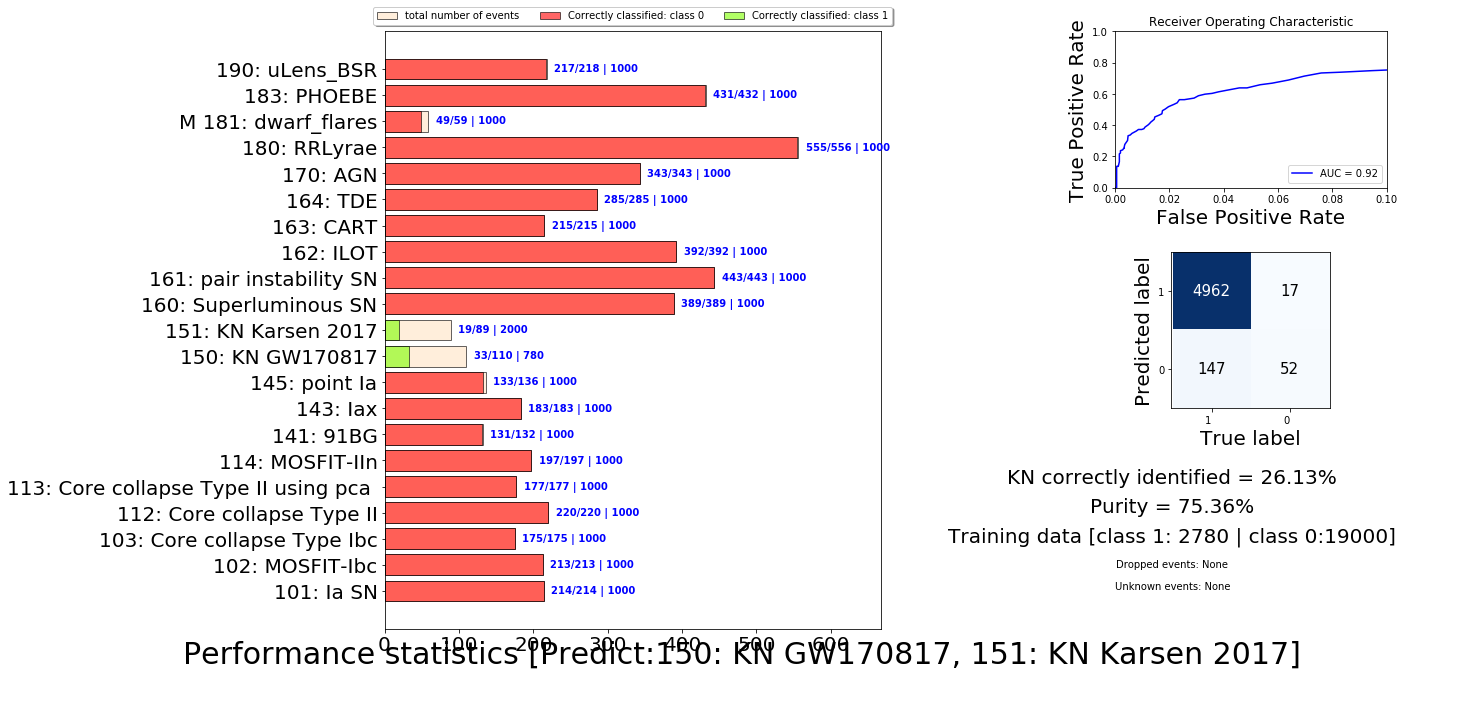

In [33]:
fig = pe.plot_performance_statistics(y_score=y_score)
fig.savefig(save_fig_base_path+"performance_stat"+save_fig_postfix_path)
#fig.savefig("randomplt")
plt.show()
plt.close('all')
#pe.plot_performance_statistics(y_score=y_score, save_fig_path=save_fig_base_path+"performance_stat"+save_fig_postfix_path)

NameError: name 'save_fig_base_path' is not defined

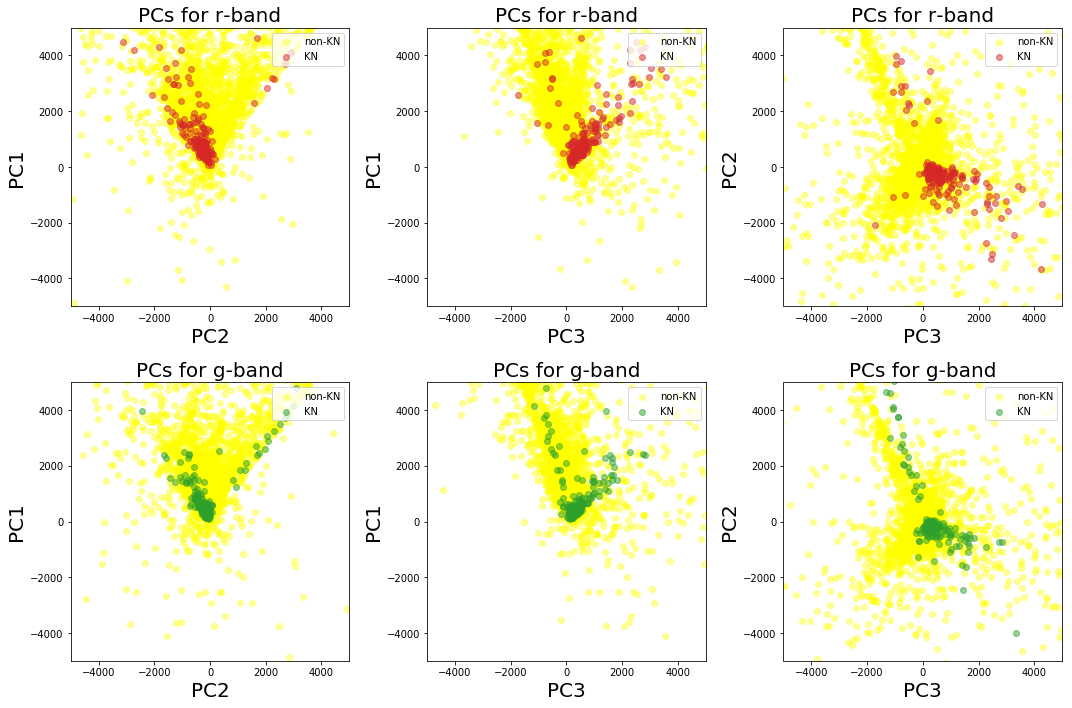

In [35]:
x_limits = (-5000,5000)
y_limits = (-5000,5000)
fig = train_ob.plot_features_correlation(color_band_dict=color_band_dict, x_limits=x_limits, y_limits=y_limits)
fig.savefig(save_fig_base_path+"pc_correlation"+save_fig_postfix_path)
plt.show()

NameError: name 'save_fig_base_path' is not defined

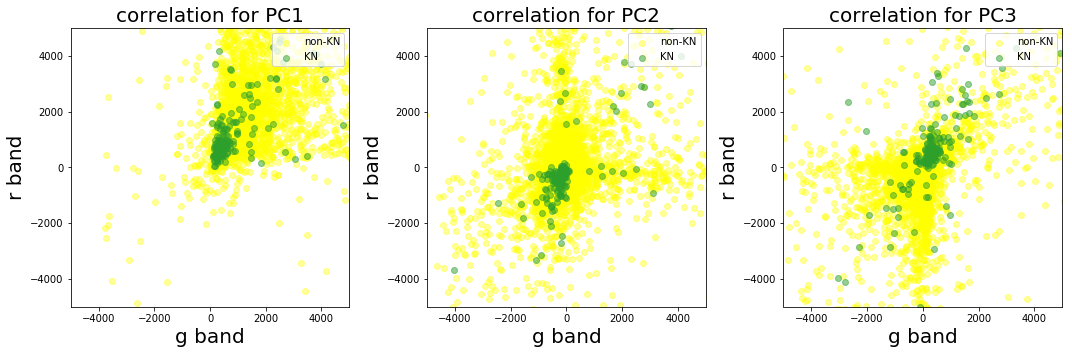

In [38]:
#print(train_df)
x_limits = (-5000,5000)
y_limits = (-5000,5000)
fig = test_ob.plot_band_correlation(color_band_dict=color_band_dict, x_limits=x_limits, y_limits=y_limits)
fig.savefig(save_fig_base_path+"band_correlation"+save_fig_postfix_path)
plt.show()